In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
# Imports
import pandas as pd
import numpy as np
import sys
import warnings
#import gc
#warnings.filterwarnings('ignore')
#gc.disable()
from copy import deepcopy,copy
#from ipywidgets import IntProgress
#from itertools import chain
from IPython.display import display
from datetime import datetime
import pickle
import os
#from sympy import sympify,latex,Float
import random
from math import ceil,sqrt
#import seaborn as sbrn
from scipy.optimize import curve_fit
from scipy.stats import bootstrap
# Catch stout
#from io import StringIO 
import sys
import pynumdiff
import matplotlib.pyplot as plt
import traceback
import gc
# Import Machine Scientist ODEint
from importlib.machinery import SourceFileLoader
path = '/export/home/oriolca/BMS_ODE/Lotka_Volterra/rguimera-machine-scientist/machinescientist_ode.py'
ms_ode = SourceFileLoader('ms_ode', path).load_module()

# Import Machine Scientist (fit)
path = '/export/home/oriolca/BMS_ODE/Lotka_Volterra/rguimera-machine-scientist/machinescientist_fit.py'
ms_fit = SourceFileLoader('ms_fit', path).load_module()
pd.__version__
pickle.format_version
#Import font
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths='./Plots/', fontext="ttf")
font_manager.findSystemFonts(fontpaths='./Plots/', fontext="ttf")
font_manager.fontManager.addfont('./Plots/arial.ttf')
prop = font_manager.FontProperties(fname='./Plots/arial.ttf')

plt.rcParams['font.family'] = 'arial'

2025-02-14 11:56:49,033 [INFO] 
Limited Total Variation Regularization Support Detected! 
---> CVXPY is not installed. 
---> Many Total Variation Methods require CVXPY including: 
---> velocity, acceleration, jerk, jerk_sliding, smooth_acceleration
---> Please install CVXPY to use these methods.
---> Recommended to also install MOSEK and obtain a MOSEK license.
You can still use: total_variation_regularization.iterative_velocity



2025-02-14 11:56:49,034 [INFO] 
Limited Linear Model Support Detected! 
---> PYCHEBFUN is not installed. 
---> Install pychebfun to use chebfun derivatives (https://github.com/pychebfun/pychebfun/) 
You can still use other methods 



2025-02-14 11:56:49,035 [INFO] 
Limited Linear Model Support Detected! 
---> CVXPY is not installed. 
---> Install CVXPY to use lineardiff derivatives 
You can still use other methods 



In [2]:
#INTEGRATOR ODE
def ode(y,model_x,model_y):
    #k1
    input_x=pd.DataFrame(data=[y],columns=['x','y'])
    input_y=pd.DataFrame(data=[y[::-1]],columns=['x','y'])
    k1 = np.array([h*model_x.predict({'A0':input_x})['A0'].iloc[0],h*model_y.predict({'A0':input_y})['A0'].iloc[0]])
    #k2
    input_x=pd.DataFrame(data=[y+k1/2.],columns=['x','y'])
    input_y=pd.DataFrame(data=[(y+k1/2.)[::-1]],columns=['x','y'])
    k2 = np.array([h*model_x.predict({'A0':input_x})['A0'].iloc[0],h*model_y.predict({'A0':input_y})['A0'].iloc[0]])
    #k3
    input_x=pd.DataFrame(data=[y+k2/2.],columns=['x','y'])
    input_y=pd.DataFrame(data=[(y+k2/2.)[::-1]],columns=['x','y'])
    k3 = np.array([h*model_x.predict({'A0':input_x})['A0'].iloc[0],h*model_y.predict({'A0':input_y})['A0'].iloc[0]])
    #k4
    input_x=pd.DataFrame(data=[y+k3],columns=['x','y'])
    input_y=pd.DataFrame(data=[(y+k3)[::-1]],columns=['x','y'])
    k4 = np.array([h*model_x.predict({'A0':input_x})['A0'].iloc[0],h*model_y.predict({'A0':input_y})['A0'].iloc[0]])
    return [1./6.*(k1[0]+2.*k2[0]+2.*k3[0]+k4[0]),1./6.*(k1[1]+2.*k2[1]+2.*k3[1]+k4[1])]
def RK45(y0,h,t_eval,model_x,model_y):
    x=y0[0]
    y=y0[1]

    t_x=[y0[0]]
    t_y=[y0[1]]
    for i in range(len(t_eval)-1):
        diff=ode([x,y],model_x,model_y)
        x=x+diff[0]
        y=y+diff[1]
        t_x.append(x)
        t_y.append(y)
    return [t_x,t_y]

#def initial_values(x,x0):
#    sol=RK45()
##################################################################################
#INTEGRATOR FIT
def ode_fit(y,model_x,model_y):
    #k1
    input_x=pd.DataFrame(data=[y],columns=['x','y'])
    input_y=pd.DataFrame(data=[y],columns=['x','y'])
    k1 = np.array([h*model_x.predict({'A0':input_x})['A0'].iloc[0],h*model_y.predict({'A0':input_y})['A0'].iloc[0]])
    #k2
    input_x=pd.DataFrame(data=[y+k1/2.],columns=['x','y'])
    input_y=pd.DataFrame(data=[(y+k1/2.)],columns=['x','y'])
    k2 = np.array([h*model_x.predict({'A0':input_x})['A0'].iloc[0],h*model_y.predict({'A0':input_y})['A0'].iloc[0]])
    #k3
    input_x=pd.DataFrame(data=[y+k2/2.],columns=['x','y'])
    input_y=pd.DataFrame(data=[(y+k2/2.)],columns=['x','y'])
    k3 = np.array([h*model_x.predict({'A0':input_x})['A0'].iloc[0],h*model_y.predict({'A0':input_y})['A0'].iloc[0]])
    #k4
    input_x=pd.DataFrame(data=[y+k3],columns=['x','y'])
    input_y=pd.DataFrame(data=[(y+k3)],columns=['x','y'])
    k4 = np.array([h*model_x.predict({'A0':input_x})['A0'].iloc[0],h*model_y.predict({'A0':input_y})['A0'].iloc[0]])
    return [1./6.*(k1[0]+2.*k2[0]+2.*k3[0]+k4[0]),1./6.*(k1[1]+2.*k2[1]+2.*k3[1]+k4[1])]
def RK45_fit(y0,h,t_eval,model_x,model_y):
    x=y0[0]
    y=y0[1]

    t_x=[y0[0]]
    t_y=[y0[1]]
    for i in range(len(t_eval)-1):
        diff=ode_fit([x,y],model_x,model_y)
        x=x+diff[0]
        y=y+diff[1]
        t_x.append(x)
        t_y.append(y)
    return [t_x,t_y]
def func(x,x0,y0):
    sol=RK45_fit([x0,y0],h,t_eval,model_to_fit_x,model_to_fit_y)
    return np.concatenate(sol)

#h=(time[1]-time[0])
#sol=Euler(ode,y0=[x0,y0], h=h ,t_eval=time)

0.1
0.1_0.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_0.csv


ODE***********************
ODE 0.1_0.csv
Best: -217.476679018501 ((_a1_ + (x * (_a5_ + (y ** _a4_)))) * _a6_) (((_a3_ * y) + _a6_) * x)
Best: {'A0': {'_a1_': -0.6116526767938265, '_a4_': 0.9712837434749824, '_a5_': -4.699871180503532, '_a6_': -0.021635215358048947, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.020027502395598192, '_a6_': -0.4008306983081238, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: -217.280737027797 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.020076120462280807, '_a3_': 0.10059074920217018}} {'A0': {'_a6_': 50.2798024179388, '_a5_': -20.035397643197893}}
**************************


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -114.631293247332 ((((_a3_ * ((_a4_ * (_a3_ + y)) / (_a6_ + ((_a1_ ** x) ** y)))) + x) * _a5_) + _a0_) ((((((((_a3_ + _a2_) / x) + _a0_) ** _a4_) / _a2_) ** y) * -(_a5_)) + _a3_)
Best: {'A0': {'_a0_': -9.286783120472595, '_a1_': 1.0066561813456067, '_a3_': 114.17828762722705, '_a4_': 0.015813444830404033, '_a5_': 0.11356409582373785, '_a6_': 1.5841835521304968, '_a2_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.18629621419596717, '_a2_': 0.9528848872575382, '_a3_': 6.310506263689399, '_a4_': 0.02882215817139635, '_a5_': 6.327813380720942, '_a1_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -114.970043346113 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10163833128101805, '_a1_': -0.020362798030718488}} {'A0': {'_a0_': -0.40473477157418447, '_a1_': 0.020225290981613527}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -435.250776843145 ((((_a3_ * ((_a4_ * (_a3_ + y)) / (_a6_ + ((_a1_ ** x) *

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_1.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -130.255049741509 (((y / ((y + _a5_) + ((x ** 2) * ((x + -(_a6_)) * (_a3_ * x))))) + _a4_) * x) (((x + _a5_) * ((_a6_ * y) ** ((_a4_ ** x) * (((x ** _a3_) * (_a6_ * (_a2_ + y))) + (_a7_ ** y))))) + _a0_)
Best: {'A0': {'_a3_': 5.424478953159075e-05, '_a4_': 0.0969658699534254, '_a5_': -57.501556256781186, '_a6_': 33.53749874547291, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.0249782153310851, '_a2_': -20.58449243350812, '_a3_': 0.49461634578693037, '_a4_': 1.0311029976327784, '_a5_': -19.459676706134424, '_a6_': 0.006081706307145017, '_a7_': 0.9483549312353791, '_a1_': 1.0}}
True: -130.593799840290 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10175987059825307, '_a1_': -0.020325975229001675}} {'A0': {'_a0_': -0.40600952370274573, '_a1_': 0.020233137534977026}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -440.736519652139 (((y / ((y + _a5_) + ((x **

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_2.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -123.860195273753 (((((y * _a4_) + ((_a1_ + x) * (_a3_ ** y))) * (_a0_ + (y * y))) * _a2_) + _a5_) ((((_a2_ + (_a4_ + (_a7_ ** x))) * _a1_) / (_a6_ * (x + (_a1_ * (y ** _a0_))))) + _a2_)
Best: {'A0': {'_a0_': -21.376274700325304, '_a1_': -3.5465893268202326, '_a2_': -0.005062214200028251, '_a3_': 0.8644918106936064, '_a4_': 0.157935055921449, '_a5_': 0.13778151707934477, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -1.3659903434866374, '_a1_': 549.5887151345358, '_a2_': -0.026672751197069845, '_a4_': -1.6417178945099866, '_a6_': 2.781184950648782, '_a7_': 1.0264814469843209, '_a3_': 1.0, '_a5_': 1.0}}
True: -124.198945372534 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10161293325408573, '_a1_': -0.020268098579979885}} {'A0': {'_a0_': -0.4056201923981121, '_a1_': 0.02020048379411275}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -416.708669853325 (((((y * _a4_) + ((_a1_ + x) * 

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_3.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -112.894674087593 (_a5_ + (((y ** _a1_) + _a2_) / ((((_a7_ ** 2) * x) ** ((y + _a6_) * _a0_)) * (_a3_ / x)))) (((x + _a6_) / (((x ** (y ** _a0_)) ** _a5_) / ((_a7_ * (_a5_ * (y * x))) * y))) + _a1_)
Best: {'A0': {'_a0_': 0.041056602433561365, '_a1_': -1.134891740221932, '_a2_': -19.80436753160097, '_a3_': -11.50611779998703, '_a5_': -10.648473381383868, '_a6_': 19.733669838352082, '_a7_': -0.3980931331965038, '_a4_': 1.0}} {'A0': {'_a0_': 0.3425204234412176, '_a1_': -0.04357067335156547, '_a5_': 0.5650580660917994, '_a6_': -19.358826690333025, '_a7_': 0.007307972603382515, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0}}
True: -113.233424186374 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10151002455029855, '_a1_': -0.02029411421817623}} {'A0': {'_a0_': -0.40501763751281683, '_a1_': 0.0201896758384067}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -491.968371484321 (_a5_ + (((y ** _a1

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_4.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -90.6838872476166 ((((x ** _a7_) * _a4_) + y) * ((x * _a0_) * (_a6_ + ((y + _a3_) * ((((_a2_ + _a3_) ** 2) * _a4_) + x))))) (((((_a5_ ** x) * _a4_) ** y) + (_a7_ + (_a1_ * (x * (_a2_ + y))))) * _a0_)
Best: {'A0': {'_a0_': 4.186795250031916e-05, '_a2_': 4.844429181520432, '_a3_': -6.609362796506545, '_a4_': -6.381027271238675, '_a6_': -491.4708842251637, '_a7_': -0.0843955549731466, '_a1_': 1.0, '_a5_': 1.0}} {'A0': {'_a0_': -38.61352536996165, '_a1_': 0.0006862591586663842, '_a2_': 0.6849290827147638, '_a4_': 1.0140499009188357, '_a5_': 0.9985166659347395, '_a7_': -1.0067806680740037, '_a3_': 1.0, '_a6_': 1.0}}
True: -91.0226373463975 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10162571592298757, '_a1_': -0.02039099032276418}} {'A0': {'_a0_': -0.40619148752160394, '_a1_': 0.020294658088709408}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -428.658588007980 ((((x ** _a7_) * _

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_5.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -95.4015539205475 (((_a7_ + y) * (((_a4_ + (_a3_ * (x * (y ** _a1_)))) ** _a0_) * (((_a2_ + y) * _a0_) + x))) + _a1_) ((((_a7_ + (x * x)) * ((((_a7_ * y) + _a6_) * _a4_) / (_a0_ + ((y ** (x ** _a5_)) * _a5_)))) + _a5_) * y)
Best: {'A0': {'_a0_': 1.5743508503120058, '_a1_': 0.15391934665950038, '_a2_': -39.395155628127185, '_a3_': 0.0030315732403335006, '_a4_': -0.006844482765076775, '_a7_': -4.566497760490495, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 6.359828178770043, '_a4_': -3.7826557684364747e-07, '_a5_': 0.16702804877520497, '_a6_': -6524.895788193123, '_a7_': -845.64609347185, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0}}
True: -95.7403040193284 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10183874235468736, '_a1_': -0.020319402846546247}} {'A0': {'_a0_': -0.40548736922614853, '_a1_': 0.02020954248409395}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -439.013289691288 (((_a

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_6.csv


SMTH*******************
SMOOTH 0.1
Best: -435.878275865269 (((_a2_ * (_a7_ + x)) / ((-((_a6_ + x)) * _a4_) + (_a5_ / (_a0_ + y)))) + _a4_) (((((x + ((_a4_ ** y) + _a7_)) * (_a2_ / (_a6_ + (x * y)))) + (_a5_ + x)) * (_a0_ + y)) + (_a3_ * _a0_))
Best: {'A0': {'_a0_': -4.5351399006839905, '_a2_': 1.532516893068094, '_a4_': 0.13723021034003136, '_a5_': -68.35024853400249, '_a6_': -18.16618821933518, '_a7_': -1.382128392102308, '_a1_': 1.0, '_a3_': 1.0}} {'A0': {'_a0_': -0.5773120794948216, '_a2_': 28879.49414792402, '_a3_': -0.2198561429154916, '_a4_': 0.31363633106522704, '_a5_': -17.902644923434686, '_a6_': -29754.443539127682, '_a7_': -17.85782492049108, '_a1_': 1.0}}
True: -287.897676695643 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10110992176039578, '_a1_': -0.020252357524912043}} {'A0': {'_a0_': -0.40852587759243825, '_a1_': 0.02038579823801432}}
***********************
0.1_7.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_7.csv


SMTH*******************
SMOOTH 0.1
Best: -424.587450663453 (((_a5_ + (y ** ((y ** _a4_) + _a3_))) * ((x + _a2_) + y)) + _a0_) ((((((_a5_ * (x ** _a5_)) ** ((_a4_ + y) * _a7_)) + _a2_) * y) / _a3_) + _a1_)
Best: {'A0': {'_a0_': 0.18514801984498688, '_a2_': -5.818782338917634, '_a3_': -1.0195766669895543, '_a4_': -0.031264676426636606, '_a5_': -0.9065578926318165, '_a1_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.14770452947163756, '_a2_': -0.49139349826471407, '_a3_': 1.8750450496382298, '_a4_': -25.05802315348972, '_a5_': 0.3216306203184412, '_a7_': -0.377614429112121, '_a0_': 1.0, '_a6_': 1.0}}
True: -269.604239306690 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10123560752652697, '_a1_': -0.02024481228243563}} {'A0': {'_a0_': -0.40461629674351834, '_a1_': 0.02017762428108616}}
***********************
0.1_8.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_8.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -113.810513376787 (((((_a2_ + ((((_a2_ + _a4_) + ((x + _a6_) ** _a6_)) * y) ** _a5_)) * _a3_) * _a4_) * (x + y)) + _a1_) ((((((_a6_ + x) * _a0_) ** (_a7_ * y)) + _a4_) * (_a3_ + (_a2_ / x))) + _a1_)
Best: {'A0': {'_a1_': -0.3211566548474679, '_a2_': -228156984.00466317, '_a3_': -1.9124744749971578e-19, '_a4_': 2707893099.2694345, '_a5_': 0.8173644029825202, '_a6_': 5.512900032632199, '_a0_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.0497993577620044, '_a1_': -0.2158680449505403, '_a2_': -61.45558024533805, '_a3_': -3.3852782732084647, '_a4_': -1.0282694350629944, '_a6_': -39.54342380840068, '_a7_': 0.05752248973559845, '_a5_': 1.0}}
True: -114.149263475568 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10179666883094846, '_a1_': -0.020319062247892178}} {'A0': {'_a0_': -0.4040637627204147, '_a1_': 0.02015120704202172}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -390.839771414116 (

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_9.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -82.0821925705792 ((((y ** (_a2_ * (_a6_ + x))) * (y + _a7_)) * (((_a7_ + x) / (_a6_ + (y * _a7_))) * _a0_)) + _a5_) (((_a6_ / x) + (_a0_ ** ((y * (x + _a1_)) ** _a3_))) * ((_a4_ / x) + (_a1_ * _a7_)))
Best: {'A0': {'_a0_': 1.390415174151154, '_a2_': -0.010121985036585446, '_a5_': 0.13315255404943688, '_a6_': -46.70640263006813, '_a7_': -4.505948564333749, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0}} {'A0': {'_a0_': 2.215093810962078e-19, '_a1_': -1.038852189377728, '_a3_': -0.6909985762319477, '_a4_': -244.57636367014968, '_a6_': 0.41043072369294864, '_a7_': -12.070270603707476, '_a2_': 1.0, '_a5_': 1.0}}
True: -82.4209426693601 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10146188997053164, '_a1_': -0.020308067951176692}} {'A0': {'_a0_': -0.40871364282388833, '_a1_': 0.020399798738471895}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -418.772936458033 ((((y ** (_a2_ * (_a6_ + x)

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_10.csv


SMTH*******************
SMOOTH 0.1
Best: -432.813537432393 (_a2_ + ((_a1_ + ((_a5_ * _a6_) / (((_a4_ / y) + _a3_) ** (_a7_ * (-(_a3_) ** x))))) * ((x ** _a2_) + _a0_))) ((((y * _a7_) + ((x ** 2) * _a3_)) + _a4_) / ((y ** _a0_) + ((x + _a5_) * _a7_)))
Best: {'A0': {'_a0_': -1.764021375274602, '_a1_': 2.563833382056511, '_a2_': 0.2746919747660466, '_a3_': 0.9929877476229414, '_a4_': 0.015193615410546224, '_a5_': -0.011815148173794815, '_a6_': 43.251603050119506, '_a7_': -581.2544558296825}} {'A0': {'_a0_': -1.2313797934853767, '_a3_': 0.00042606291797765884, '_a4_': -0.19838485127128858, '_a5_': -9.072469865478011, '_a7_': 0.0025311495543510086, '_a1_': 1.0, '_a2_': 1.0, '_a6_': 1.0}}
True: -295.051324903789 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10168010574158251, '_a1_': -0.020338768690497746}} {'A0': {'_a0_': -0.4032856094447329, '_a1_': 0.020136579621433837}}
***********************
0.1_11.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_11.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -104.923704269726 ((x * ((_a1_ + (((x + _a4_) + (x * y)) * ((x ** 2) * (y * (_a3_ ** 2))))) * (y + _a7_))) + _a5_) ((((_a7_ + x) / ((x ** _a5_) * (((_a0_ * y) ** _a1_) + x))) * _a2_) + -(_a4_))
Best: {'A0': {'_a1_': -0.020309304114532873, '_a3_': 6.068176310697434e-05, '_a4_': -313.563449294759, '_a5_': 0.0821442790440094, '_a7_': -4.715171604642027, '_a0_': 1.0, '_a2_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.011506062803291181, '_a1_': -1.39447324281759, '_a2_': 3.7225815050721494, '_a4_': 0.02822561532123158, '_a5_': -0.26777267856759396, '_a7_': -19.4137791691558, '_a3_': 1.0, '_a6_': 1.0}}
True: -105.262454368507 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10153846103427627, '_a1_': -0.02037258694373279}} {'A0': {'_a0_': -0.4046919083302408, '_a1_': 0.02023989477532233}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -409.726619742486 ((x * ((_a1_ + (((x + _a4_) + (x * y)) *

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_12.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -146.338208083380 (((((y + (_a7_ * _a6_)) * (y * ((_a5_ * (x ** 2)) + _a4_))) * _a0_) * ((-((y ** _a2_)) / x) + _a7_)) + _a5_) (((((_a7_ + (x * (y + _a1_))) * (x + _a4_)) * _a0_) * (y * (y ** _a5_))) + _a3_)
Best: {'A0': {'_a0_': 0.2083200592847451, '_a2_': -0.8535793041457684, '_a4_': -4.052789692952699, '_a5_': 0.11421055697600374, '_a6_': -2492.560078068578, '_a7_': 0.001860613521457414, '_a1_': 1.0, '_a3_': 1.0}} {'A0': {'_a0_': -2.836164494348962e-05, '_a1_': -5.279855573064874, '_a3_': -0.029021880425815803, '_a4_': -19.392112100402027, '_a5_': 0.24189857235942913, '_a7_': -507.8787694907923, '_a2_': 1.0, '_a6_': 1.0}}
True: -146.676958182161 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10209799032878537, '_a1_': -0.020360572566524883}} {'A0': {'_a0_': -0.4016970339172696, '_a1_': 0.020035295332975468}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -447.800797694650 ((((

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_13.csv


SMTH*******************
SMOOTH 0.1
Best: -425.857049004360 (((x + _a7_) * (_a2_ ** 2)) * -((((_a0_ * y) ** ((x + ((y ** _a5_) * _a6_)) ** _a1_)) + _a4_))) (((_a1_ + (((y * _a3_) + x) * (_a4_ * x))) * (y ** _a6_)) * ((_a2_ + (x * y)) ** 3))
Best: {'A0': {'_a0_': 0.17695351631025197, '_a1_': -1.1626242161027047, '_a2_': 3.8431116334423328, '_a4_': -0.9984563917539248, '_a5_': -0.6721649312715916, '_a6_': 69.34505169074092, '_a7_': -6.0458471615277265, '_a3_': 1.0}} {'A0': {'_a1_': 9.476617823538698e-11, '_a2_': -1281.2112011360111, '_a3_': 0.3773927918010762, '_a4_': -1.9776385450124957e-13, '_a6_': 1.275759660644885, '_a0_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: -292.756399700454 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10136897500072095, '_a1_': -0.020312823351783138}} {'A0': {'_a0_': -0.4051538154200234, '_a1_': 0.020246041748073595}}
***********************
0.1_14.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_14.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -123.164559253026 (((((y + (_a1_ / (y + _a6_))) + _a5_) * (x + _a7_)) + (-(_a3_) ** y)) + _a2_) (((((x * _a2_) ** _a7_) + _a4_) / (((y ** _a5_) + _a4_) + (_a1_ / (_a0_ + x)))) + _a3_)
Best: {'A0': {'_a1_': 1097322.1529167246, '_a2_': 1.739111890903669, '_a3_': 1.1051050175135761, '_a5_': -1064.1336251496766, '_a6_': 1031.0656833626283, '_a7_': -9.213488977370787, '_a0_': 1.0, '_a4_': 1.0}} {'A0': {'_a0_': -147.9031410997568, '_a1_': -29.84388862989827, '_a2_': 0.017753049016941243, '_a3_': -0.032411562398463864, '_a4_': -0.19443103262516892, '_a5_': -1.4351812018402301, '_a7_': 1.5379961765259718, '_a6_': 1.0}}
True: -123.503309351807 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10233337028340321, '_a1_': -0.02042468208260592}} {'A0': {'_a0_': -0.4034561562303384, '_a1_': 0.0201507834553977}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -455.719524537574 (((((y + (_a1_ / (y +

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_15.csv


SMTH*******************
SMOOTH 0.1
Best: -417.523770956189 (((((((_a7_ + x) / _a5_) ** 2) * _a3_) + (_a1_ * (_a3_ ** x))) * y) + (_a2_ * x)) (((_a6_ + (((_a4_ + (_a3_ * x)) + _a3_) * y)) * ((_a5_ + x) * _a5_)) * (y ** ((y * (_a7_ * x)) + _a0_)))
Best: {'A0': {'_a1_': -0.10391770642820622, '_a2_': 0.10304442663202022, '_a3_': 1.0783979471292409, '_a5_': 26.237171614149577, '_a7_': -13.949390988012246, '_a0_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.2415724128159584, '_a3_': 1.2555649590840627e-06, '_a4_': -2.573931922831596e-05, '_a5_': 105.03159199801128, '_a6_': -1.81494896789706e-06, '_a7_': -0.0007461093671629226, '_a1_': 1.0, '_a2_': 1.0}}
True: -282.488413649437 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10169012220958593, '_a1_': -0.02036347649210547}} {'A0': {'_a0_': -0.4042227335002492, '_a1_': 0.020198193839126865}}
***********************
0.1_16.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_16.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -111.683477261876 (((-((_a1_ / y)) + _a2_) * ((((x * _a0_) + x) ** (_a5_ + (_a1_ * y))) * _a3_)) + _a4_) ((((x * x) + _a2_) / ((((_a2_ / (_a0_ * y)) * _a1_) + (x + _a3_)) ** _a1_)) + _a4_)
Best: {'A0': {'_a0_': -0.8388728257553014, '_a1_': -0.04514424634357301, '_a2_': -0.670816356536918, '_a3_': -15.090098877975302, '_a4_': -9.844992596404893, '_a5_': 0.20826941521692816, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -2.621609222085576, '_a1_': 1.4419670804658509, '_a2_': -376.2673743968421, '_a3_': -1.7874821047727645, '_a4_': -0.04201337326443764, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -112.022227360657 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1021943395966875, '_a1_': -0.020408514542920628}} {'A0': {'_a0_': -0.4026204196670298, '_a1_': 0.020078134036199864}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -494.442301923894 (((-((_a1_ / y)) + _a2_) * ((((x * _a0_) + x

0.1_17.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_17.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -111.790845341842 (((((_a4_ + (-(_a1_) ** y)) ** 2) ** ((x + _a2_) * _a5_)) * _a6_) + _a7_) ((((y * (_a2_ ** ((y + _a1_) * (x + (_a6_ / y))))) * ((_a1_ + _a0_) * (_a4_ + x))) / (_a7_ ** y)) + _a3_)
Best: {'A0': {'_a1_': 1.0320991605245304, '_a2_': -1.5912871368091328, '_a4_': 2.1547699329244696, '_a5_': 0.05025808195543588, '_a6_': 6.247663154701614, '_a7_': -6.108374070719706, '_a0_': 1.0, '_a3_': 1.0}} {'A0': {'_a0_': 5.326465899488567, '_a1_': -5.305400464303328, '_a2_': 0.9977686163908316, '_a3_': -0.02946303927099137, '_a4_': -19.476192259091274, '_a6_': -73.66772673074681, '_a7_': 0.9899930305006904, '_a5_': 1.0}}
True: -112.129595440622 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1013899054687674, '_a1_': -0.02032394691586716}} {'A0': {'_a0_': -0.4087474042167715, '_a1_': 0.02037780161914098}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -453.452934558063 (((((_a4_ + 

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_18.csv


SMTH*******************
SMOOTH 0.1
Best: -409.655097593806 (((((_a2_ + y) + x) * (((_a5_ * _a3_) + (_a1_ ** y)) + (y * (y ** _a5_)))) * _a7_) + (_a0_ * (_a6_ + (_a2_ / y)))) (((((((y * (_a7_ + (_a4_ / x))) + _a1_) * x) * _a6_) ** 3) + ((((_a5_ * _a1_) + y) * _a7_) / x)) * y)
Best: {'A0': {'_a0_': -0.054629778162897005, '_a1_': 0.19385174067014824, '_a2_': -6.784957753334606, '_a3_': 2.090987909926776, '_a5_': -0.7250618477282732, '_a6_': -1.2125278891120816, '_a7_': -0.24995733297368394, '_a4_': 1.0}} {'A0': {'_a1_': 2.8465188948400293, '_a4_': 3.20648013888543, '_a5_': 6.425204342885351, '_a6_': 0.007521257196831138, '_a7_': -0.10101305466937462, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0}}
True: -292.550468680625 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10128758349075954, '_a1_': -0.0202229449517099}} {'A0': {'_a0_': -0.4073906424331181, '_a1_': 0.02029060175410301}}
***********************
0.1_19.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_19.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -130.060540377926 (((-((_a1_ + (((_a7_ + x) * ((_a0_ ** x) ** y)) * _a5_))) ** 2) + (_a6_ * (y + _a3_))) + ((y ** 2) * _a2_)) (((_a2_ * ((x / ((y + _a6_) * _a0_)) + ((_a7_ ** y) + _a5_))) * (-(_a3_) + y)) + _a4_)
Best: {'A0': {'_a0_': 0.994094918993048, '_a1_': 1.7478666326572545, '_a2_': 0.010065786109246064, '_a3_': -5.685922746784626, '_a5_': 0.03753959102985466, '_a6_': -0.5183270090618931, '_a7_': -99.7983610928783, '_a4_': 1.0}} {'A0': {'_a0_': 0.0973315951113848, '_a2_': 0.06187380372660917, '_a3_': 0.5845858837429975, '_a4_': -0.06910617637062418, '_a5_': -9.229586382708721, '_a6_': 20.526326280222264, '_a7_': 1.0934342786210245, '_a1_': 1.0}}
True: -130.399290476707 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10139653586819612, '_a1_': -0.020270913327017612}} {'A0': {'_a0_': -0.4049176449172296, '_a1_': 0.020195389797430387}}
***********************
SMTH*******************
SMOOTH 0.1
B

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_20.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -124.366865190482 ((y + (_a1_ + x)) * ((exp((((y + _a6_) / y) + ((y ** _a5_) * _a0_))) * ((x ** 2) ** _a7_)) + _a4_)) ((((_a0_ + x) * _a6_) / ((_a7_ * y) ** ((y ** (((x * _a3_) + _a3_) * _a3_)) + _a5_))) + _a4_)
Best: {'A0': {'_a0_': -0.12292132259919732, '_a1_': -4.930526898280371, '_a4_': -2.195842572429605, '_a5_': 0.2777872783261267, '_a6_': -0.032317180163543124, '_a7_': -0.002419993568749169, '_a2_': 1.0, '_a3_': 1.0}} {'A0': {'_a0_': -19.471005350445115, '_a3_': -0.07792508124538934, '_a4_': -0.02835501998354291, '_a5_': -2.224628297158278, '_a6_': 0.12550211664543795, '_a7_': 0.17335824468060743, '_a1_': 1.0, '_a2_': 1.0}}
True: -124.705615289263 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10128736354377442, '_a1_': -0.020279809216625762}} {'A0': {'_a0_': -0.4051479852768708, '_a1_': 0.020224873549482422}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -413.02260500044

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_0.1_21.csv


Error in SMOOTH: Optimal parameters not found: Number of calls to function has reached maxfev = 600.
Traceback (most recent call last):
  File "/tmp/ipykernel_143367/3028478755.py", line 391, in <module>
    popt,pcov=curve_fit(func, [0.], int_data, p0=[5.,10.])
  File "/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py", line 1019, in curve_fit
    raise RuntimeError("Optimal parameters not found: " + errmsg)
RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

0.1_22.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_22.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -115.424853633985 (((_a3_ * (x * _a1_)) + _a3_) + ((_a4_ + (y * (_a6_ * x))) * ((y * x) ** _a7_))) ((((_a3_ + (_a6_ * (x ** _a1_))) * (y + _a4_)) * (_a5_ ** y)) + (_a1_ * (_a6_ / (exp(x) / _a2_))))
Best: {'A0': {'_a1_': -0.5313194805526608, '_a3_': -0.19223656817386978, '_a4_': -0.00435006209692033, '_a6_': 5.318780342701012e-06, '_a7_': 1.3438241595015608, '_a0_': 1.0, '_a2_': 1.0, '_a5_': 1.0}} {'A0': {'_a1_': 0.5790838637472436, '_a2_': 70326.99993337778, '_a3_': -1.256704077182442, '_a4_': -0.6497523441096064, '_a5_': 0.9502252266836866, '_a6_': 0.22319782509822025, '_a0_': 1.0, '_a7_': 1.0}}
True: -115.763603732766 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10125866508212285, '_a1_': -0.020249088224074945}} {'A0': {'_a0_': -0.40635713992120165, '_a1_': 0.02022618483241331}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -413.519678676456 (((_a3_ * (x * _a1_)) + _a3_) + (

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_23.csv


Check BMS model SMTH: 0.1_23.csv {'x': ((-(((_a6_ + ((_a1_ * y) ** (((((_a2_ / y) * _a7_) ** ((_a0_ / (_a7_ / x)) + _a0_)) ** 2) * _a7_))) * x)) / _a5_) + -(_a2_)), 'y': ((((_a4_ * y) ** ((y * (_a0_ * x)) + _a7_)) / _a0_) * (_a3_ + (_a2_ * x)))}
SMTH*******************
SMOOTH 0.1
Best: -136.370089508724 ((-(((_a6_ + ((_a1_ * y) ** (((((_a2_ / y) * _a7_) ** ((_a0_ / (_a7_ / x)) + _a0_)) ** 2) * _a7_))) * x)) / _a5_) + -(_a2_)) ((((_a4_ * y) ** ((y * (_a0_ * x)) + _a7_)) / _a0_) * (_a3_ + (_a2_ * x)))
Best: {'A0': {'_a0_': 0.005302053505657099, '_a1_': 0.09423094265551435, '_a2_': 0.23902752803875552, '_a5_': 5.037051610640882, '_a6_': -0.4875897854709312, '_a7_': 1.7298895554246156, '_a3_': 1.0, '_a4_': 1.0}} {'A0': {'_a0_': -0.000983474186962095, '_a2_': -6.546757063517141e-05, '_a3_': 0.0012782636778225786, '_a4_': 0.31561883258642204, '_a7_': 1.1783702771417537, '_a1_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: -136.708839607504 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_24.csv


ODE***********************
ODE 0.1_24.csv
Best: -197.231973777395 (((y * _a5_) + _a6_) * x) (((y + _a3_) * ((y * _a5_) + x)) * _a4_)
Best: {'A0': {'_a5_': -0.019884472039269695, '_a6_': 0.09945228111299016, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -20.08008565344344, '_a4_': 0.01977895582973032, '_a5_': 0.0035140334335398873, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -196.762118885272 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.020000698221835082, '_a3_': 0.10009094234612637}} {'A0': {'_a6_': 49.94502640984549, '_a5_': -20.024508066619152}}
**************************


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -120.049725217400 (((((_a6_ + (_a1_ + y)) / ((_a2_ / (_a5_ + x)) + y)) * (y ** _a0_)) + _a6_) * _a7_) (((((_a3_ ** ((_a1_ + x) * (_a4_ * (y + _a6_)))) * _a5_) + (_a4_ * y)) + _a0_) + (x * _a7_))
Best: {'A0': {'_a0_': 0.22714855352352004, '_a1_': -4.492802908574773, '_a2_': 217.15978358638904, '_a5_': -5.187240071155365, '_a6_': -0.02493875691366367, '_a7_': -6.401422540200707, '_a3_': 1.0, '_a4_': 1.0}} {'A0': {'_a0_': 3.112072980230047, '_a1_': -14.523225527511682, '_a3_': 1.0604223701994864, '_a4_': -0.10426119135250579, '_a5_': -4.022773708873146, '_a6_': -2.883318648475757, '_a7_': 0.06271479169035808, '_a2_': 1.0}}
True: -120.388475316180 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1011774409510008, '_a1_': -0.020294679892016467}} {'A0': {'_a0_': -0.4038636740684255, '_a1_': 0.020195420465299995}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -429.209879656551 (((((_a6_ 

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_25.csv


SMTH*******************
SMOOTH 0.1
Best: -469.857888663186 ((((_a5_ ** y) * (y + _a7_)) * (((_a3_ / x) ** (_a1_ * ((_a2_ + y) * (x + _a7_)))) + _a6_)) + _a4_) ((((((x * ((y + y) + _a3_)) * _a6_) + _a1_) * (_a2_ + x)) * (_a5_ + y)) + _a4_)
Best: {'A0': {'_a1_': 0.007579050978728694, '_a2_': 1.5369837044347177, '_a3_': 6.923365649672269, '_a4_': 0.0980585137300915, '_a5_': 0.9355758042116524, '_a6_': -1.1767110572186448, '_a7_': -4.605861525113029, '_a0_': 1.0}} {'A0': {'_a1_': 0.0253543984201721, '_a2_': -19.528412355897096, '_a3_': -7.730388381640225, '_a4_': -0.017135295980471813, '_a5_': -0.5348294233744739, '_a6_': -1.57545051948192e-05, '_a0_': 1.0, '_a7_': 1.0}}
True: -294.548862561950 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10170320348864953, '_a1_': -0.020396184664537846}} {'A0': {'_a0_': -0.4060776506018055, '_a1_': 0.020270277400629363}}
***********************
0.1_26.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_26.csv


Check BMS model SMTH: 0.1_26.csv {'x': ((((x * _a1_) ** ((_a4_ + y) * _a5_)) * _a6_) * -((((x * _a7_) + y) + _a3_))), 'y': (((y ** ((_a5_ + (((x + x) * _a2_) * (_a1_ + (y / _a3_)))) * _a1_)) * (x + _a5_)) * _a0_)}
SMTH*******************
SMOOTH 0.1
Best: -126.986064859516 ((((x * _a1_) ** ((_a4_ + y) * _a5_)) * _a6_) * -((((x * _a7_) + y) + _a3_))) (((y ** ((_a5_ + (((x + x) * _a2_) * (_a1_ + (y / _a3_)))) * _a1_)) * (x + _a5_)) * _a0_)
Best: {'A0': {'_a1_': 0.04561123584948501, '_a3_': -5.597442440221264, '_a4_': -27.81079425905724, '_a5_': -0.047655990529482814, '_a6_': 0.4445933303372655, '_a7_': 0.022920290671840038, '_a0_': 1.0, '_a2_': 1.0}} {'A0': {'_a0_': 0.01718426376203658, '_a1_': -0.05942558055828362, '_a2_': 0.43168802210776686, '_a3_': 67.5384485073904, '_a5_': -19.58611448053916, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -127.324814958297 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10183124820482382, '_a1_': -0.02032610574300696}} {'A0

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_27.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -146.111544627748 ((-((((x * -(((y * _a1_) * x))) ** (_a6_ ** y)) + (x / ((x ** _a3_) * _a5_)))) + _a7_) * _a4_) (((((_a2_ + (x / (_a0_ + (x * _a7_)))) ** (y * _a4_)) + _a5_) * x) * _a6_)
Best: {'A0': {'_a1_': -3.1094109197711465e-05, '_a3_': 0.37909157562816587, '_a4_': 11.37569789623322, '_a5_': -21.132323186967213, '_a6_': 0.9391947302484238, '_a7_': -0.14380767780263798, '_a0_': 1.0, '_a2_': 1.0}} {'A0': {'_a0_': 21.203059294439992, '_a2_': -0.4377887521630824, '_a4_': -0.04765145446702695, '_a5_': -0.9862919525180782, '_a6_': -0.1700708833271073, '_a7_': -0.39164615442923734, '_a1_': 1.0, '_a3_': 1.0}}
True: -146.450294726529 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10200794055211636, '_a1_': -0.020337875701331526}} {'A0': {'_a0_': -0.4020219125430931, '_a1_': 0.020052751721753654}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -428.219107567115 ((-((((x * -(((y * _a1

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_28.csv


SMTH*******************
SMOOTH 0.1
Best: -420.024679426679 ((_a6_ + -((((_a1_ * (x ** _a0_)) ** ((_a5_ ** x) / _a7_)) * y))) * (_a2_ + x)) ((((((_a7_ * (y ** (_a3_ / -((_a7_ ** 2))))) + (x ** 2)) ** _a0_) * (_a1_ + x)) + (_a4_ * y)) * _a6_)
Best: {'A0': {'_a0_': 2.9253476406526078, '_a1_': 7.100913407317804e-06, '_a2_': -0.6967284820291056, '_a5_': 1.0508809020793328, '_a6_': 0.10656851141061054, '_a7_': 2.16919062347104, '_a3_': 1.0, '_a4_': 1.0}} {'A0': {'_a0_': -0.4916994583614103, '_a1_': -15.561904063676874, '_a3_': 120226269596.95424, '_a4_': -0.011270691051493796, '_a6_': 7.1713676625880325, '_a7_': 220354.61428646598, '_a2_': 1.0, '_a5_': 1.0}}
True: -293.294094527728 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10212045834250706, '_a1_': -0.020309358263867237}} {'A0': {'_a0_': -0.40555988078921323, '_a1_': 0.02018005828798681}}
***********************
0.1_29.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_29.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -98.4321950019014 (((((_a2_ * x) ** ((y * _a7_) + _a5_)) * ((y / _a0_) + _a2_)) + _a4_) * x) ((((_a1_ + (y ** _a4_)) * (((y * x) / _a2_) + _a5_)) * ((x ** _a6_) + _a3_)) + _a7_)
Best: {'A0': {'_a0_': -49.00873589023259, '_a2_': 0.04882304012787186, '_a4_': 0.053566869815927176, '_a5_': 0.36157381202276234, '_a7_': -0.04082978579922262, '_a1_': 1.0, '_a3_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -0.33150329084107416, '_a2_': -132748.42335552248, '_a3_': -59.011406389913795, '_a4_': 1.1376038064611034, '_a5_': 0.005228782644778965, '_a6_': 1.3762320083904758, '_a7_': -0.03245021025611103, '_a0_': 1.0}}
True: -98.7709451006823 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10171771427563236, '_a1_': -0.020323899469664185}} {'A0': {'_a0_': -0.4042455368157422, '_a1_': 0.02019371072204797}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -420.046367619525 (((((_a2_ * x) ** ((y * _a7_) + _a

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_30.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -112.857452006578 (((((((((_a0_ + (x + y)) * (y + _a5_)) + _a2_) ** 2) * y) + _a4_) * _a2_) * (x / _a7_)) + (_a1_ / x)) (((_a5_ + (((_a6_ ** x) + x) * _a2_)) * (y ** (((x + _a3_) * _a0_) ** _a3_))) + _a7_)
Best: {'A0': {'_a0_': -36.6180358196126, '_a1_': -3.5232356926158355, '_a2_': -650.8775380725154, '_a4_': -2216770.625222444, '_a5_': -11.340347752625489, '_a7_': 14239312373.450422, '_a3_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.04849393439839175, '_a2_': 0.010019467189667739, '_a3_': -0.2789765567496152, '_a5_': -0.2651324218877318, '_a6_': 1.1056516571966033, '_a7_': -0.03905810174531212, '_a1_': 1.0, '_a4_': 1.0}}
True: -113.196202105358 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1016585680456353, '_a1_': -0.0203487420467137}} {'A0': {'_a0_': -0.40484297389240015, '_a1_': 0.020236767937961135}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -368.371597611051 (((((((((_a0_

0.1_31.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_31.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -125.496628794193 ((((-((((_a1_ * y) + -(_a1_)) + (x ** _a0_))) * (_a6_ + (y ** _a2_))) * _a7_) * (x ** 3)) + _a4_) ((_a2_ + x) / ((x ** _a5_) + (_a4_ / ((y + (_a7_ / exp(x))) ** _a6_))))
Best: {'A0': {'_a0_': -1.7716803670392411, '_a1_': -8.687081266731967e-05, '_a2_': 1.206341986120845, '_a4_': 0.13248965700930557, '_a6_': -6.277720819228166, '_a7_': 0.007102616036065641, '_a3_': 1.0, '_a5_': 1.0}} {'A0': {'_a2_': -19.77219559776146, '_a4_': 53.27024649247405, '_a5_': 0.3309068323898925, '_a6_': 1.3664209053636551, '_a7_': -19103.955381314066, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0}}
True: -125.835378892974 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10148973956490404, '_a1_': -0.020219413859671905}} {'A0': {'_a0_': -0.4040466669276365, '_a1_': 0.020125234673309834}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -410.383530489864 ((((-((((_a1_ * y) + -(_a1_)) + (x ** _a0_)))

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_32.csv


Check BMS model SMTH: 0.1_32.csv {'x': (((((((x + ((_a1_ / (_a6_ + x)) + (y * _a4_))) + _a5_) ** 2) * _a4_) + _a2_) * x) * ((_a2_ / _a2_) ** 2)), 'y': ((((x + _a3_) / ((((_a0_ / y) / ((x * y) + _a6_)) + x) * _a6_)) * _a4_) + _a7_)}
SMTH*******************
SMOOTH 0.1
Best: -126.038121624752 (((((((x + ((_a1_ / (_a6_ + x)) + (y * _a4_))) + _a5_) ** 2) * _a4_) + _a2_) * x) * ((_a2_ / _a2_) ** 2)) ((((x + _a3_) / ((((_a0_ / y) / ((x * y) + _a6_)) + x) * _a6_)) * _a4_) + _a7_)
Best: {'A0': {'_a1_': 348687.6847505955, '_a2_': 0.08539914229646979, '_a4_': -0.10626152864594646, '_a5_': 568.3161482724777, '_a6_': -612.5770915718026, '_a0_': 1.0, '_a3_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 46953.92232614613, '_a3_': -19.373896060096143, '_a4_': 774.6226350476804, '_a6_': 102.05270121820837, '_a7_': -0.031792187129325584, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0}}
True: -126.376871723533 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10147033897066628, '_a1_': -0.02024050

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_0.1_33.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -92.4347018739840 ((((y + (x + _a3_)) * ((_a3_ + (x * _a4_)) + y)) * _a5_) * ((y + (_a1_ / y)) ** _a2_)) (((_a3_ + x) / _a4_) * ((y + ((((x ** _a0_) * _a3_) + (_a7_ * ((_a5_ ** x) ** y))) ** 2)) + _a6_))
Best: {'A0': {'_a1_': 2.6674283988433998, '_a2_': -0.4096490494049378, '_a3_': -5.578920426210388, '_a4_': 0.024763742826816426, '_a5_': -0.04295014121980745, '_a0_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.437825578807633, '_a3_': -19.61118354074157, '_a4_': 168.03340504577466, '_a5_': 0.9879122644243389, '_a6_': 2.9118977229618865, '_a7_': 7.1872719085606995, '_a1_': 1.0, '_a2_': 1.0}}
True: -92.7734519727649 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10181045263982136, '_a1_': -0.020315813113862366}} {'A0': {'_a0_': -0.4053175289227808, '_a1_': 0.02022568467732228}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -410.465924241221 ((((y + (x + _a3_)) * ((_a3_ + (

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_34.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -123.318852155466 (_a3_ + (((_a4_ * _a0_) + (y ** _a1_)) * ((((y + _a6_) * (x + _a0_)) + _a7_) * (y + (_a5_ + (_a2_ / x)))))) (((((((_a5_ ** y) * x) ** _a0_) + _a7_) * (_a4_ + y)) + (x * (x * _a1_))) * y)
Best: {'A0': {'_a0_': -7.394555224463541, '_a1_': 8.534070764155604e-05, '_a2_': -468.423772163609, '_a3_': -5.634182340969661, '_a4_': 0.13510385149471346, '_a5_': -3.033492896148557, '_a6_': -17.93922941346037, '_a7_': -80.87582362931965}} {'A0': {'_a0_': -0.0023603976792841656, '_a1_': 0.0005018550374943214, '_a4_': 5.682997121034904, '_a5_': 0.4772028872576023, '_a7_': -1.0271408200325507, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0}}
True: -123.657602254246 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10172022063087996, '_a1_': -0.020350039985607585}} {'A0': {'_a0_': -0.4037768282362782, '_a1_': 0.020147418758686336}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -442.61078819

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_35.csv


ODE***********************
ODE 0.1_35.csv
Best: -206.004441984606 (((y + _a3_) * x) * _a1_) ((y + _a1_) * ((_a0_ * y) + (x * _a2_)))
Best: {'A0': {'_a1_': -0.019842503564824858, '_a3_': -5.013818955203624, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 9.101633947207377e-05, '_a1_': -20.115174546594456, '_a2_': 0.01962878561471014, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -205.405663128505 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.019992943677510703, '_a3_': 0.1003145916941951}} {'A0': {'_a6_': 50.12973102386064, '_a5_': -20.042414698463702}}
**************************


SMTH*******************
SMOOTH 0.1
Best: -463.324028653889 ((((((_a1_ + x) ** 3) * _a0_) + ((_a3_ / y) * x)) * y) + (y / (x ** _a4_))) -(((-(((_a1_ * (_a0_ + x)) * (_a6_ ** x))) / (_a6_ * ((x / _a7_) + (y ** _a2_)))) + _a3_))
Best: {'A0': {'_a0_': -0.9995098732675204, '_a1_': 0.0014660799590943986, '_a3_': 0.1022458777196078, '_a4_': -2.9998925538919354, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.64560348247023, '_a1_': 0.013064889154258658, '_a2_': -1.328516549155017, '_a3_': 0.022095250820712724, '_a6_': 1.0128005395116062, '_a7_': 541.8871242412044, '_a4_': 1.0, '_a5_': 1.0}}
True: -295.630660178502 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1013492072604692, '_a1_': -0.020198726773845245}} {'A0': {'_a0_': -0.4059507302203224, '_a1_': 0.020194851898967518}}
***********************
0.1_36.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_36.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -142.094956474585 (((x + ((x * x) * (_a7_ * (_a0_ / (_a7_ ** x))))) * (x * (_a3_ * y))) + (_a1_ * x)) ((((x ** 2) + -(_a5_)) / (x + (((y * (_a1_ / (((_a0_ * y) * x) + _a2_))) ** 2) ** _a4_))) + _a1_)
Best: {'A0': {'_a0_': -0.0622803533927103, '_a1_': 0.10200889306938883, '_a3_': -0.0038115853438923327, '_a7_': 1.0284954863096105, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -0.029533969627112668, '_a1_': -0.042769231746169485, '_a2_': -7.180154581110624, '_a4_': -0.7538212851434355, '_a5_': 378.03380690801436, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -142.433706573366 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10088365664917026, '_a1_': -0.020241958340551546}} {'A0': {'_a0_': -0.40879626150264475, '_a1_': 0.020398027018453977}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -428.963724702644 (((x + ((x * x) * (_a7_ * (_a0_ / (_a7_ ** x))))) * (x *

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_37.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -116.345593437794 (((_a1_ + y) / ((_a3_ / ((x ** _a2_) * (y + _a6_))) + _a0_)) + _a5_) ((y + (_a7_ * x)) * (((x + _a1_) * ((_a0_ + x) * (((x * _a6_) ** y) ** _a2_))) / _a4_))
Best: {'A0': {'_a0_': -2.471959760013938, '_a1_': 15.907002594084194, '_a2_': 1.0756997831294954, '_a3_': -1246.4893999172593, '_a5_': 0.17524897307045026, '_a6_': -4.488562198404456, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.58426956592031, '_a1_': 38.84989381684777, '_a2_': -0.05036067118803621, '_a4_': 2280.6789344548365, '_a6_': 0.08083018261872385, '_a7_': -0.01891688039173965, '_a3_': 1.0, '_a5_': 1.0}}
True: -116.684343536575 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1015196215324599, '_a1_': -0.020305617191105733}} {'A0': {'_a0_': -0.40409090700341344, '_a1_': 0.020181097823884327}}
***********************
Check BMS model SMTH: 0.1_37.csv {'x': (((_a1_ + y) / ((_a3_ / ((x ** _a2_) * (y + _a6_))) + _a0_)) + _

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_38.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -98.3505158581806 ((((x * (_a6_ * y)) + _a5_) * (((y ** _a4_) + _a7_) * (x + _a3_))) + _a0_) (((_a5_ + (_a6_ * y)) * (_a0_ + (((x ** 2) + _a1_) / (_a2_ + ((_a7_ + y) ** 2))))) * y)
Best: {'A0': {'_a0_': 0.12830560065712956, '_a3_': -3.570516466832413, '_a4_': 1.327159561914114, '_a5_': -0.014179784668249325, '_a6_': 1.806621090707315e-05, '_a7_': -7.605925461438276, '_a1_': 1.0, '_a2_': 1.0}} {'A0': {'_a0_': 3.100035585268094, '_a1_': -6163.656675916904, '_a2_': 1813.610431786092, '_a5_': 0.877996335282676, '_a6_': -0.0038008769455319088, '_a7_': -6.804804646303627, '_a3_': 1.0, '_a4_': 1.0}}
True: -98.6892659569614 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10153956701362273, '_a1_': -0.020328603524588047}} {'A0': {'_a0_': -0.40441066224047195, '_a1_': 0.020200282835482485}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -427.340014366028 ((((x * (_a6_ * y)) + _a5_) * (((y *

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.1_39.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 0.1
Best: -119.577814510648 (((((_a7_ * ((y * ((_a6_ + (_a5_ * x)) + (y ** (x * _a4_)))) + _a1_)) * y) + (_a6_ * _a2_)) * x) + _a2_) ((((x ** _a6_) + _a1_) * (((x + (_a0_ / y)) * ((_a2_ + x) * _a4_)) + y)) * _a0_)
Best: {'A0': {'_a1_': -14.7149347415551, '_a2_': -0.08352579410513664, '_a4_': 0.012631277311668193, '_a5_': -0.053957055976662956, '_a6_': -1.2205367056222245, '_a7_': 0.0010319039028281174, '_a0_': 1.0, '_a3_': 1.0}} {'A0': {'_a0_': -18.42240945690823, '_a1_': -0.9280180290935001, '_a2_': -29.74006576183645, '_a4_': 0.011039367510081947, '_a6_': -0.025107623269679292, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: -119.916564609429 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1013068409921555, '_a1_': -0.020186156228964327}} {'A0': {'_a0_': -0.40534576282408885, '_a1_': 0.020210675970519804}}
***********************
SMTH*******************
SMOOTH 0.1
Best: -419.163011919208 (((((_a7_ * ((y * ((

0.5
0.5_0.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_0.csv


0.5_1.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_0.5_1.csv


0.5_2.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_2.csv


Check BMS model SMTH: 0.5_2.csv {'x': ((_a0_ * ((y ** (_a7_ * -(y))) + _a5_)) * x), 'y': (((_a4_ + x) * _a3_) * y)}
SMTH*******************
SMOOTH 0.5
Best: 397.462464922175 ((_a0_ * ((y ** (_a7_ * -(y))) + _a5_)) * x) (((_a4_ + x) * _a3_) * y)
Best: {'A0': {'_a0_': 0.3898337392650882, '_a5_': -0.7966695140729155, '_a7_': 0.02827809802374492, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': 0.020174820255815032, '_a4_': -19.96384210493745, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 397.123714823394 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10110393655117533, '_a1_': -0.020228365900043913}} {'A0': {'_a0_': -0.4027669260277853, '_a1_': 0.0201748202526213}}
***********************
SMTH*******************
SMOOTH 0.5
Best: -51.6260855047764 ((_a0_ * ((y ** (_a7_ * -(y))) + _a5_)) * x) (((_a4_ + x) * _a3_) * y)
Best: {'A0': {'_a0_': 0.3898337392650882, '_a5_': -0.7966695140729155, '_a

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_3.csv


Check BMS model SMTH: 0.5_3.csv {'x': ((_a3_ + (y * _a7_)) * (y + (_a2_ * x))), 'y': (((x * _a0_) + _a3_) * ((_a2_ + y) * y))}
SMTH*******************
SMOOTH 0.5
Best: 415.917443072651 ((_a3_ + (y * _a7_)) * (y + (_a2_ * x))) (((x * _a0_) + _a3_) * ((_a2_ + y) * y))
Best: {'A0': {'_a2_': 2.5072302420602655, '_a3_': 0.03777814075648983, '_a7_': -0.007042418112812937, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -0.0006964141625440155, '_a2_': -35.27056571131761, '_a3_': 0.014015659374962856, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 415.578692973870 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10252621902513524, '_a1_': -0.020180832674146398}} {'A0': {'_a0_': -0.37808243064110986, '_a1_': 0.01868329928929511}}
***********************
SMTH*******************
SMOOTH 0.5
Best: -35.5032291601036 ((_a3_ + (y * _a7_)) * (y + (_a2_ * x))) (((x * _a0_) + _a3_) * ((_a2_ + y) * y))
Best: {'A0': {'_a2

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_4.csv


Check BMS model SMTH: 0.5_4.csv {'x': (_a0_ * ((x + (x + y)) * (y + _a3_))), 'y': ((_a6_ + x) / (((y ** _a4_) * _a1_) + _a3_))}
SMTH*******************
SMOOTH 0.5
Best: 386.696979493849 (_a0_ * ((x + (x + y)) * (y + _a3_))) ((_a6_ + x) / (((y ** _a4_) * _a1_) + _a3_))
Best: {'A0': {'_a0_': -0.008298308761935965, '_a3_': -5.473991902069123, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 70.82625702674679, '_a3_': 3.4432463946268914, '_a4_': -1.586189141237002, '_a6_': -20.155160086703347, '_a0_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 386.358229395068 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10066356698685383, '_a1_': -0.019709514558843066}} {'A0': {'_a0_': -0.3956271605920627, '_a1_': 0.019563937758343343}}
***********************
SMTH*******************
SMOOTH 0.5
Best: -18.0145691363251 (_a0_ * ((x + (x + y)) * (y + _a3_))) ((_a6_ + x) / (((y ** _a4_) * _a1_) + _a3_))
Best: {'A0': {'_a0_': 

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_0.5_5.csv


SMTH*******************
SMOOTH 0.5
Best: -37.0564557708945 (((_a2_ * y) + _a5_) * x) ((_a2_ + (x ** _a3_)) / (x + ((y * _a4_) ** (_a2_ * _a4_))))
Best: {'A0': {'_a2_': -0.019968921770635494, '_a5_': 0.10073058661584675, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -90.21248561871658, '_a3_': 1.5189793788256791, '_a4_': 0.017036380623255055, '_a0_': 1.0, '_a1_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -26.7503906584646 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10073058664921582, '_a1_': -0.019968921775289177}} {'A0': {'_a0_': -0.39806794655601857, '_a1_': 0.019889417250834616}}
***********************
0.5_6.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_6.csv


SMTH*******************
SMOOTH 0.5
Best: -41.7494901599011 ((y + _a4_) * (_a3_ * x)) ((y / (y + _a7_)) * (_a3_ + x))
Best: {'A0': {'_a3_': -0.020040274450991227, '_a4_': -5.066924765973111, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -20.120565262995356, '_a7_': 41.747806976601254, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: -41.3727224517591 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10154256292840096, '_a1_': -0.020040274448615714}} {'A0': {'_a0_': -0.40464980329903066, '_a1_': 0.020083251844829113}}
***********************
0.5_7.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_7.csv


0.5_8.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_8.csv


SMTH*******************
SMOOTH 0.5
Best: -49.1346914174448 ((_a5_ * x) * (y + _a1_)) (((_a0_ * x) + _a4_) * (_a1_ ** (_a3_ ** y)))
Best: {'A0': {'_a1_': -5.09068077569277, '_a5_': -0.02003069010118555, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.23994967331225098, '_a1_': 0.04236864320229486, '_a3_': 0.7614026937313721, '_a4_': -4.8408420767532485, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -44.2128354683009 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10196984919965242, '_a1_': -0.02003069010396984}} {'A0': {'_a0_': -0.3999634892857578, '_a1_': 0.01981201690911378}}
***********************
0.5_9.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_0.5_9.csv


SMTH*******************
SMOOTH 0.5
Best: -83.1812580129849 ((((_a4_ ** (y ** _a1_)) + (_a3_ / _a7_)) * ((_a7_ * (_a6_ ** x)) + x)) * _a0_) ((_a3_ + x) * (_a5_ ** (y ** -(_a4_))))
Best: {'A0': {'_a0_': -1.0517803195765603, '_a1_': -1.5935285296389106, '_a3_': 1.1466908678287935, '_a4_': 1.1370399809844598e-08, '_a6_': 1.0525106177841497, '_a7_': -4.812466500187871, '_a2_': 1.0, '_a5_': 1.0}} {'A0': {'_a3_': -20.181092731626364, '_a4_': 0.40534975813827984, '_a5_': 0.01420711377064023, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -58.3412675663789 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10175346914527156, '_a1_': -0.020171543977007062}} {'A0': {'_a0_': -0.3971050655486025, '_a1_': 0.0196492857841553}}
***********************
0.5_10.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_10.csv


0.5_11.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_11.csv


0.5_12.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_12.csv


ODE***********************
ODE 0.5_12.csv
Best: 270.273125857121 (((_a7_ ** y) + _a4_) * x) (_a6_ * ((y + _a0_) * x))
Best: {'A0': {'_a4_': -0.8951933841985193, '_a7_': 0.9770711872573535, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -20.03798723841656, '_a6_': 0.020201939663800222, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 272.283434643548 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.020348066592242402, '_a3_': 0.10213484363532764}} {'A0': {'_a6_': 51.10914130197702, '_a5_': -20.02300465619975}}
**************************


SMTH*******************
SMOOTH 0.5
Best: -15.1901681035901 (((y + _a5_) * _a3_) * x) ((_a1_ * (_a0_ ** (_a4_ ** y))) * (x + _a6_))
Best: {'A0': {'_a3_': -0.020101983755367214, '_a5_': -4.919476638524366, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.04816010902787673, '_a1_': 0.25099921531076586, '_a4_': 0.7735386046316464, '_a6_': -19.941834562523848, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: -14.1219531341623 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09889123944733189, '_a1_': -0.020101983752211536}} {'A0': {'_a0_': -0.40375014939701453, '_a1_': 0.020233822239263965}}
***********************
0.5_13.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_13.csv


0.5_14.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_14.csv


SMTH*******************
SMOOTH 0.5
Best: -50.3941884660786 (x * (_a4_ + (_a7_ ** y))) (((x * _a0_) + _a2_) * y)
Best: {'A0': {'_a4_': -0.8926690124448858, '_a7_': 0.9766662517021727, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.020799798479885598, '_a2_': -0.41604104176818446, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -46.5344764281193 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10081038185090524, '_a1_': -0.02011278040387174}} {'A0': {'_a0_': -0.41604104183992674, '_a1_': 0.020799798483656998}}
***********************
0.5_15.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_15.csv


0.5_16.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_0.5_16.csv


ODE***********************
ODE 0.5_16.csv
Best: 264.020047421192 (x * ((_a7_ * y) + _a5_)) (((_a7_ ** y) + _a6_) * x)
Best: {'A0': {'_a5_': 0.09901987306400034, '_a7_': -0.01980835700634487, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a6_': -1.3527752958753518, '_a7_': 1.0147746605849155, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 264.577801922678 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.01993113370645646, '_a3_': 0.09967263890368344}} {'A0': {'_a6_': 49.672077020492885, '_a5_': -20.052171415440146}}
**************************


0.5_17.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_17.csv


SMTH*******************
SMOOTH 0.5
Best: -22.2963853154636 (((y * _a6_) + _a7_) * x) ((y * (_a1_ + x)) / (y + _a0_))
Best: {'A0': {'_a6_': -0.020245875339198954, '_a7_': 0.1011954282534402, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a0_': 43.7579161910983, '_a1_': -19.910136390185794, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -17.7224888713314 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10119542825838944, '_a1_': -0.02024587534092602}} {'A0': {'_a0_': -0.3836318161315436, '_a1_': 0.019236358279057737}}
***********************
0.5_18.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_18.csv


0.5_19.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_19.csv


0.5_20.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_20.csv


0.5_21.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_21.csv


SMTH*******************
SMOOTH 0.5
Best: -26.3203237929117 (((_a7_ * y) + _a3_) * x) ((y * (_a5_ + x)) / (y + _a2_))
Best: {'A0': {'_a3_': 0.10015905796270025, '_a7_': -0.020122723812718384, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 42.37265145752396, '_a5_': -19.7557271900056, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -25.2543615389440 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10015905797713391, '_a1_': -0.020122723815413884}} {'A0': {'_a0_': -0.3925102120079429, '_a1_': 0.01983504581633188}}
***********************
0.5_22.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_22.csv


SMTH*******************
SMOOTH 0.5
Best: 2.56504835932039 (((_a6_ * y) + _a7_) * x) (((_a0_ + x) * y) / (y + _a2_))
Best: {'A0': {'_a6_': -0.020261018796261028, '_a7_': 0.0996270279143149, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a0_': -19.82555673809652, '_a2_': 41.75761096673317, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 3.49669466151531 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09962702793793053, '_a1_': -0.020261018797951284}} {'A0': {'_a0_': -0.39901695543402704, '_a1_': 0.02010202433000037}}
***********************
0.5_23.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_23.csv


SMTH*******************
SMOOTH 0.5
Best: -19.5134206087295 ((_a1_ * x) * (y + _a4_)) ((_a7_ + x) * (y / (y + _a5_)))
Best: {'A0': {'_a1_': -0.02025516376813473, '_a4_': -4.913268498531365, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 41.22481265841549, '_a7_': -19.819678389843986, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: -18.1728788925689 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09951905809622151, '_a1_': -0.020255163772231875}} {'A0': {'_a0_': -0.4013783841482258, '_a1_': 0.02027431453327716}}
***********************
0.5_24.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_24.csv


SMTH*******************
SMOOTH 0.5
Best: -14.8561853155746 (((_a5_ + y) * x) * _a2_) ((_a3_ + x) * (y / (y + _a0_)))
Best: {'A0': {'_a2_': -0.01990598834287015, '_a5_': -5.051307563191072, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 41.14157066523629, '_a3_': -20.00364381438851, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -10.5099066165010 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10055126947046283, '_a1_': -0.019905988342534448}} {'A0': {'_a0_': -0.40572330777173393, '_a1_': 0.020249303254047096}}
***********************
0.5_25.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_25.csv


0.5_26.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_26.csv


SMTH*******************
SMOOTH 0.5
Best: -17.4145669189705 (((_a6_ * (_a3_ ** y)) + _a4_) * (((_a0_ + y) * x) + (y ** 2))) ((_a7_ + (_a6_ ** x)) * y)
Best: {'A0': {'_a0_': 1.6004628006326607, '_a3_': 0.6686395296271878, '_a4_': -0.007046043981131531, '_a6_': 0.05355458126385398, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 1.0147132915751047, '_a7_': -1.3550783128966788, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: -4.21943872496112 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09762561751587633, '_a1_': -0.019142336535474414}} {'A0': {'_a0_': -0.40855721777375953, '_a1_': 0.0200659447994997}}
***********************
0.5_27.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_27.csv


0.5_28.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_28.csv


SMTH*******************
SMOOTH 0.5
Best: -42.6042362751192 (((_a1_ * y) + _a2_) * x) ((_a4_ + x) * ((_a2_ + ((y * _a6_) * x)) * y))
Best: {'A0': {'_a1_': -0.019882806759165584, '_a2_': 0.09770907713932171, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.02467619606612137, '_a4_': -19.307263177473654, '_a6_': -2.2944303868007534e-05, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: -31.1980009435856 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09770907715402925, '_a1_': -0.019882806761188164}} {'A0': {'_a0_': -0.4004618605666515, '_a1_': 0.020124145875290513}}
***********************
0.5_29.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_29.csv


0.5_30.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_30.csv


SMTH*******************
SMOOTH 0.5
Best: -45.6041232065394 ((x * (y + _a7_)) * _a2_) (((_a6_ + x) * (((_a3_ * x) * y) + _a7_)) * y)
Best: {'A0': {'_a2_': -0.020257191178335084, '_a7_': -4.98036239285144, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -2.0331754940239313e-05, '_a6_': -19.37368755607628, '_a7_': 0.023805770643956087, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: -42.6352092710245 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10088815322814865, '_a1_': -0.0202571911812177}} {'A0': {'_a0_': -0.39524678809632224, '_a1_': 0.019868821360178607}}
***********************
0.5_31.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_31.csv


SMTH*******************
SMOOTH 0.5
Best: -45.8177167258066 ((x * (y + _a4_)) * _a1_) ((_a1_ ** (y ** _a2_)) * (_a0_ + x))
Best: {'A0': {'_a1_': -0.019757142767496603, '_a4_': -4.96427455797962, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.091173901496038, '_a1_': 0.01418167060000359, '_a2_': -0.41863885040811327, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -26.2587790659270 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09807988120017144, '_a1_': -0.01975714277185896}} {'A0': {'_a0_': -0.41323574193987206, '_a1_': 0.02050784283944947}}
***********************
0.5_32.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_0.5_32.csv


SMTH*******************
SMOOTH 0.5
Best: -42.3167923239347 ((_a7_ * (_a4_ + y)) * x) (((_a2_ * x) + _a7_) * (_a5_ ** (_a0_ ** y)))
Best: {'A0': {'_a4_': -5.032896602708374, '_a7_': -0.02000003536793477, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.7772627114332714, '_a2_': 0.25067965935554554, '_a5_': 0.049271193847797046, '_a7_': -5.072339418700056, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: -37.4880420895791 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10065811004886353, '_a1_': -0.020000035365561823}} {'A0': {'_a0_': -0.4028895648897918, '_a1_': 0.019936158049085433}}
***********************
0.5_33.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_33.csv


Check BMS model SMTH: 0.5_33.csv {'x': ((((y * -(((y / exp(y)) + _a1_))) * _a7_) + _a4_) * x), 'y': (((x * _a5_) + _a6_) * y)}
SMTH*******************
SMOOTH 0.5
Best: 414.409484878093 ((((y * -(((y / exp(y)) + _a1_))) * _a7_) + _a4_) * x) (((x * _a5_) + _a6_) * y)
Best: {'A0': {'_a1_': -0.32055033373151126, '_a4_': 0.07559159089067287, '_a7_': -0.05526869572186583, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': 0.020166432529989547, '_a6_': -0.40508874687654567, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 414.070734779312 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10222317850457846, '_a1_': -0.02005242043012135}} {'A0': {'_a0_': -0.40508874690504254, '_a1_': 0.020166432531475414}}
***********************
SMTH*******************
SMOOTH 0.5
Best: -38.8321162890017 ((((y * -(((y / exp(y)) + _a1_))) * _a7_) + _a4_) * x) (((x * _a5_) + _a6_) * y)
Best: {'A0': {'_a1_': -0.32055033373

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_34.csv


SMTH*******************
SMOOTH 0.5
Best: -12.9064037526595 ((_a6_ + (y * _a2_)) * x) ((((x * _a1_) * y) + _a7_) * ((x + _a2_) * y))
Best: {'A0': {'_a2_': -0.019771999787938765, '_a6_': 0.09794153899787597, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -2.529511508232956e-05, '_a2_': -19.47542864077092, '_a7_': 0.0254070607623659, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: -8.91899452554557 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09794153900417947, '_a1_': -0.01977199978939066}} {'A0': {'_a0_': -0.41005585964790514, '_a1_': 0.02036239499120449}}
***********************
0.5_35.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_35.csv


SMTH*******************
SMOOTH 0.5
Best: 0.755435457838431 (((_a2_ * y) + _a1_) * x) (((x + _a7_) * _a3_) * (y ** _a4_))
Best: {'A0': {'_a1_': 0.1010345357296047, '_a2_': -0.019883497000169295, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.025474265406403566, '_a4_': 0.8731653646078134, '_a7_': -20.220465936073655, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1.20844038227315 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10103453575884773, '_a1_': -0.019883497004321956}} {'A0': {'_a0_': -0.3983650138165135, '_a1_': 0.019681412431494072}}
***********************
0.5_36.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_36.csv


0.5_37.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_37.csv


SMTH*******************
SMOOTH 0.5
Best: -10.7660131536968 ((_a5_ + (y * _a6_)) * x) (((_a3_ ** x) + _a0_) / (x / y))
Best: {'A0': {'_a5_': 0.10234477094720512, '_a6_': -0.020613432838618637, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -4.432019381225337, '_a3_': 1.080729282390665, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -9.41534762226379 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10234477089411162, '_a1_': -0.02061343283082595}} {'A0': {'_a0_': -0.3986470621978641, '_a1_': 0.02010947204201967}}
***********************
0.5_38.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_38.csv


SMTH*******************
SMOOTH 0.5
Best: -50.8801398305669 ((x * _a1_) * (y + _a2_)) ((_a3_ + x) * ((y * _a4_) ** _a0_))
Best: {'A0': {'_a1_': -0.020432822797969298, '_a2_': -4.949968854697648, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.875676386410025, '_a3_': -20.107083409182938, '_a4_': 0.014950149843195523, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: -46.0788250820392 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1011418364793739, '_a1_': -0.02043282279880571}} {'A0': {'_a0_': -0.39567429403215176, '_a1_': 0.019675020804646805}}
***********************
0.5_39.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_0.5_39.csv


1.0
1.0_0.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_0.csv


1.0_1.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.0_1.csv


Check BMS model SMTH: 1.0_1.csv {'x': ((_a4_ + (_a7_ * y)) * (y + x)), 'y': ((_a7_ + (_a5_ ** x)) * (y + _a5_))}
SMTH*******************
SMOOTH 1.0
Best: 608.871072519814 ((_a4_ + (_a7_ * y)) * (y + x)) ((_a7_ + (_a5_ ** x)) * (y + _a5_))
Best: {'A0': {'_a4_': 0.08236173093230184, '_a7_': -0.013857733277140728, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': 1.0120233871745286, '_a7_': -1.2788511237648723, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 608.532322421033 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09877112132766928, '_a1_': -0.018742788139030506}} {'A0': {'_a0_': -0.3565460152087672, '_a1_': 0.01761510948506822}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 175.064522027561 ((_a4_ + (_a7_ * y)) * (y + x)) ((_a7_ + (_a5_ ** x)) * (y + _a5_))
Best: {'A0': {'_a4_': 0.08236173093230184, '_a7_': -0.013857733277140728, '_a0_': 1.0, '_a1_': 1.

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_2.csv


1.0_3.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_3.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 1.0
Best: 597.676779200396 (x * ((y + _a6_) * _a2_)) ((_a4_ + (x * _a6_)) / (y ** _a4_))
Best: {'A0': {'_a2_': -0.019141085501806588, '_a6_': -4.9860409152424205, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.704443885853562, '_a6_': 0.03507791077487228, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 597.338029101615 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09543823548305091, '_a1_': -0.019141085507699603}} {'A0': {'_a0_': -0.3874081618860814, '_a1_': 0.01924829262402441}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 159.286685488761 (x * ((y + _a6_) * _a2_)) ((_a4_ + (x * _a6_)) / (y ** _a4_))
Best: {'A0': {'_a2_': -0.019141085501806588, '_a6_': -4.9860409152424205, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.704443885853562, '_a6_': 0.035

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_4.csv


1.0_5.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_5.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 1.0
Best: 596.909163106288 ((((_a6_ ** (_a0_ / y)) / _a1_) + _a7_) * ((_a3_ + x) ** _a7_)) (((_a4_ * x) + _a0_) * y)
Best: {'A0': {'_a0_': 0.44041086597695844, '_a1_': -0.2754060487783399, '_a3_': -7.792164990845989, '_a6_': 2.4226082968586755e-12, '_a7_': 0.4709549312451461, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a0_': -0.37890144954658556, '_a4_': 0.018329746999113827, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 596.717468551091 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10371353813048308, '_a1_': -0.019266332391891378}} {'A0': {'_a0_': -0.37890144908220347, '_a1_': 0.018329746945603513}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 137.746553367068 ((((_a6_ ** (_a0_ / y)) / _a1_) + _a7_) * ((_a3_ + x) ** _a7_)) (((_a4_ * x) + _a0_) * y)
Best: {'A0': {'_a0_': 0.44041086597695844, '_a1_': -0.2754060487783399, '_a3_': -7.79216499084

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_6.csv


Check BMS model SMTH: 1.0_6.csv {'x': (-((_a7_ + (_a5_ / x))) * (y + _a5_)), 'y': (((_a2_ ** x) + _a0_) * (_a1_ + (_a1_ * y)))}
SMTH*******************
SMOOTH 1.0
Best: 597.957361973572 (-((_a7_ + (_a5_ / x))) * (y + _a5_)) (((_a2_ ** x) + _a0_) * (_a1_ + (_a1_ * y)))
Best: {'A0': {'_a5_': -4.863977885261487, '_a7_': 0.6797592006470586, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -2.1147605122901107, '_a1_': 0.20152933164687994, '_a2_': 1.0363523979161857, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 597.618611874791 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09643914780727568, '_a1_': -0.019775405300676726}} {'A0': {'_a0_': -0.3560809212314021, '_a1_': 0.017991933436365577}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 148.800915055932 (-((_a7_ + (_a5_ / x))) * (y + _a5_)) (((_a2_ ** x) + _a0_) * (_a1_ + (_a1_ * y)))
Best: {'A0': {'_a5_': -4.86397788526148

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_7.csv


1.0_8.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_8.csv


SMTH*******************
SMOOTH 1.0
Best: 151.291063964943 (((y + _a0_) * _a6_) * x) ((_a5_ + (x ** _a4_)) * y)
Best: {'A0': {'_a0_': -5.052668753485605, '_a6_': -0.019661257962258788, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.20554418334581256, '_a5_': -1.8271746124795734, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 151.709119934187 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09934182377805624, '_a1_': -0.01966125796351283}} {'A0': {'_a0_': -0.37961650313630974, '_a1_': 0.019006209509697856}}
***********************
1.0_9.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_9.csv


Check BMS model SMTH: 1.0_9.csv {'x': (((_a1_ ** (y ** 2)) + _a0_) * (x * _a6_)), 'y': (((x * _a0_) + _a5_) * y)}
SMTH*******************
SMOOTH 1.0
Best: 626.034502802161 (((_a1_ ** (y ** 2)) + _a0_) * (x * _a6_)) (((x * _a0_) + _a5_) * y)
Best: {'A0': {'_a0_': -0.7346658104675688, '_a1_': 0.9897337245746591, '_a6_': 0.29385067182601143, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.018693863657671138, '_a5_': -0.3676380564952018, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 625.695752703380 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10199305299248412, '_a1_': -0.020151891394045423}} {'A0': {'_a0_': -0.367638056518379, '_a1_': 0.018693863658335547}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 118.869921961489 (((_a1_ ** (y ** 2)) + _a0_) * (x * _a6_)) (((x * _a0_) + _a5_) * y)
Best: {'A0': {'_a0_': -0.7346658104675688, '_a1_': 0.9897337245746591, '_a6_': 

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_10.csv


ODE***********************
ODE 1.0_10.csv
Best: 488.683446645542 (x * (_a7_ * (_a3_ + y))) ((_a4_ + (_a6_ ** y)) * x)
Best: {'A0': {'_a3_': -5.092372787693242, '_a7_': -0.01954938721263832, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -1.3474045899328186, '_a6_': 1.0146333218604011, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 489.259886131975 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.019685363885196018, '_a3_': 0.1003296878783702}} {'A0': {'_a6_': 50.47706371352974, '_a5_': -19.99524249775858}}
**************************


SMTH*******************
SMOOTH 1.0
Best: 152.851752117532 ((y + _a1_) * (_a0_ * x)) (((_a5_ ** x) + _a3_) * y)
Best: {'A0': {'_a0_': -0.018861450620620255, '_a1_': -5.114773477472157, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -1.3315251922802138, '_a5_': 1.0141076515274206, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 157.588050400563 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09647204751851182, '_a1_': -0.018861450629082385}} {'A0': {'_a0_': -0.3786650961245455, '_a1_': 0.018915958696325046}}
***********************
1.0_11.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_11.csv


1.0_12.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_12.csv


1.0_13.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_13.csv


1.0_14.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_14.csv


Check BMS model SMTH: 1.0_14.csv {'x': ((((_a2_ + y) * ((_a6_ ** (y + x)) * (x * (y + _a1_)))) * (x ** 3)) * -(_a5_)), 'y': ((_a4_ + (x * _a1_)) * y)}
SMTH*******************
SMOOTH 1.0
Best: 615.293255720224 ((((_a2_ + y) * ((_a6_ ** (y + x)) * (x * (y + _a1_)))) * (x ** 3)) * -(_a5_)) ((_a4_ + (x * _a1_)) * y)
Best: {'A0': {'_a1_': -5.073982116486556, '_a2_': 1.3090715786351173, '_a5_': 2.8652400229372795e-05, '_a6_': 0.8599078794999852, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.020180549967444495, '_a4_': -0.4018515791821113, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 614.954505621443 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09636646838733302, '_a1_': -0.01926447741136966}} {'A0': {'_a0_': -0.4018515772545832, '_a1_': 0.02018054983845439}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 123.907834035355 ((((_a2_ + y) * ((_a6_ ** (y + x)) * (x * (y + _a1_)))) * (

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_15.csv


SMTH*******************
SMOOTH 1.0
Best: 149.767630063968 (((_a4_ * y) + _a1_) * x) (((y ** _a1_) * _a4_) * (_a2_ + x))
Best: {'A0': {'_a1_': 0.0916119998814375, '_a4_': -0.018651699994883048, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.7983085329354008, '_a2_': -19.477354716718686, '_a4_': 0.029547861783152236, '_a0_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 152.742331205600 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0916119999031468, '_a1_': -0.018651700000271273}} {'A0': {'_a0_': -0.38140344544012816, '_a1_': 0.019513169492672337}}
***********************
1.0_16.csv


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.0_16.csv


Check BMS model SMTH: 1.0_16.csv {'x': (((_a5_ + (_a4_ / (_a7_ + (y ** _a1_)))) / (_a6_ ** (_a5_ * x))) * ((x ** 2) ** 2)), 'y': ((_a1_ * (((_a5_ + x) * (_a0_ + y)) + y)) * y)}
SMTH*******************
SMOOTH 1.0
Best: 603.055943761520 (((_a5_ + (_a4_ / (_a7_ + (y ** _a1_)))) / (_a6_ ** (_a5_ * x))) * ((x ** 2) ** 2)) ((_a1_ * (((_a5_ + x) * (_a0_ + y)) + y)) * y)
Best: {'A0': {'_a1_': 3.588216664610653, '_a4_': 0.9616503566956821, '_a5_': -0.0005714633834952035, '_a6_': 1.431797495399688e-118, '_a7_': 1190.8413242144957, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0}} {'A0': {'_a0_': -27.397610906465168, '_a1_': -0.000996862558050441, '_a5_': -19.68244347061892, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 602.717193662740 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09644599059126226, '_a1_': -0.018675953113416816}} {'A0': {'_a0_': -0.37907663250292195, '_a1_': 0.01848291745143644}}
***********************
SMTH*******************
SMOOT

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_17.csv


ODE***********************
ODE 1.0_17.csv
Best: 503.701115414698 ((_a1_ + y) * (x * _a6_)) (x * (_a1_ + (_a0_ ** y)))
Best: {'A0': {'_a1_': -4.962685034206093, '_a6_': -0.02015798497884749, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 1.0146211012333737, '_a1_': -1.3480763337556787, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 503.965941719454 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.02028348376808544, '_a3_': 0.10074919632556664}} {'A0': {'_a6_': 50.416423850175974, '_a5_': -20.034335547627446}}
**************************


Check BMS model SMTH: 1.0_17.csv {'x': (((_a4_ ** (y * y)) + _a7_) * (_a0_ * x)), 'y': (((_a1_ * x) + _a5_) * y)}
SMTH*******************
SMOOTH 1.0
Best: 627.019703994561 (((_a4_ ** (y * y)) + _a7_) * (_a0_ * x)) (((_a1_ * x) + _a5_) * y)
Best: {'A0': {'_a0_': 0.2731351581124965, '_a4_': 0.9883306751922237, '_a7_': -0.7152630117326931, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.018936486630196935, '_a5_': -0.37960034274144405, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 626.680953895780 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10010535452476825, '_a1_': -0.0198211289373784}} {'A0': {'_a0_': -0.379600342726533, '_a1_': 0.018936486628724023}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 206.499470417082 (((_a4_ ** (y * y)) + _a7_) * (_a0_ * x)) (((_a1_ * x) + _a5_) * y)
Best: {'A0': {'_a0_': 0.2731351581124965, '_a4_': 0.9883306751922237, '_a7_': -0.71

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_18.csv


SMTH*******************
SMOOTH 1.0
Best: 180.438693588646 ((_a5_ + y) * (x * _a0_)) ((_a3_ + (x ** _a1_)) * y)
Best: {'A0': {'_a0_': -0.019347313951047055, '_a5_': -5.023943348166552, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.19865897445570846, '_a3_': -1.7851183377589734, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 181.060935442393 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09719980924172063, '_a1_': -0.01934731395234141}} {'A0': {'_a0_': -0.3538249811059925, '_a1_': 0.01798889791002764}}
***********************
1.0_19.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_19.csv


Check BMS model SMTH: 1.0_19.csv {'x': ((((_a6_ ** exp(((_a2_ * -(_a0_)) / y))) + _a5_) * (_a7_ + (x * _a2_))) * (x * x)), 'y': (((x * _a4_) + _a3_) * y)}
SMTH*******************
SMOOTH 1.0
Best: 644.076894460641 ((((_a6_ ** exp(((_a2_ * -(_a0_)) / y))) + _a5_) * (_a7_ + (x * _a2_))) * (x * x)) (((x * _a4_) + _a3_) * y)
Best: {'A0': {'_a0_': -11481.846095403389, '_a2_': 0.00095853995018793, '_a5_': -0.20697108660944172, '_a6_': 0.8344090310313941, '_a7_': -0.03831106693791733, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0}} {'A0': {'_a3_': -0.3758398237784885, '_a4_': 0.01895204621801267, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 643.738144361861 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09515389023453219, '_a1_': -0.019129201670293774}} {'A0': {'_a0_': -0.37583982404325533, '_a1_': 0.018952046231139913}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 193.609826973278 ((((_a6_ ** exp(((_a2_ * -(_a0_)

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_20.csv


1.0_21.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_21.csv


RMSE error in SMTH:
SMTH*******************
SMOOTH 1.0
Best: 623.737510444658 ((((x ** _a2_) + _a5_) * ((_a0_ ** (y ** 2)) + _a2_)) * _a6_) (((x * _a1_) + _a3_) * y)
Best: {'A0': {'_a0_': 0.9889283567912237, '_a2_': -0.7193778665942999, '_a5_': -0.22437269534630544, '_a6_': -56.821210745741716, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.01748692925585911, '_a3_': -0.35159444200355316, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 623.398760345878 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10249070867824443, '_a1_': -0.019978352916098112}} {'A0': {'_a0_': -0.3515944412665297, '_a1_': 0.017486929228630977}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 153.782172796392 ((((x ** _a2_) + _a5_) * ((_a0_ ** (y ** 2)) + _a2_)) * _a6_) (((x * _a1_) + _a3_) * y)
Best: {'A0': {'_a0_': 0.9889283567912237, '_a2_': -0.7193778665942999, '_a5_': -0.22437269534630544, '_a6_': -56.8212

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_22.csv


1.0_23.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_23.csv


1.0_24.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_24.csv


1.0_25.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_25.csv


1.0_26.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_26.csv


1.0_27.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_27.csv


Check BMS model SMTH: 1.0_27.csv {'x': ((((_a0_ ** (y * y)) + _a1_) * x) * _a2_), 'y': ((_a1_ + (x * _a3_)) * y)}
SMTH*******************
SMOOTH 1.0
Best: 591.748392201646 ((((_a0_ ** (y * y)) + _a1_) * x) * _a2_) ((_a1_ + (x * _a3_)) * y)
Best: {'A0': {'_a0_': 0.9871868445285014, '_a1_': -0.6974824092064733, '_a2_': 0.25660686051125053, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.38789862006493936, '_a3_': 0.019232205742425807, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 591.409642102865 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09854489976410781, '_a1_': -0.01928225123939037}} {'A0': {'_a0_': -0.38789862006014686, '_a1_': 0.019232205742523465}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 127.532685898189 ((((_a0_ ** (y * y)) + _a1_) * x) * _a2_) ((_a1_ + (x * _a3_)) * y)
Best: {'A0': {'_a0_': 0.9871868445285014, '_a1_': -0.6974824092064733, '_a2_': 

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.0_28.csv


ODE***********************
ODE 1.0_28.csv
Best: 444.004320295962 (((_a4_ ** y) + _a3_) * x) ((_a0_ + y) * (x * _a1_))
Best: {'A0': {'_a3_': -0.9005403881196495, '_a4_': 0.9784267349086626, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.000793467383026, '_a1_': 0.02164634088573292, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 444.218589740755 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.01919770136490557, '_a3_': 0.09710621064176246}} {'A0': {'_a6_': 47.64943966333493, '_a5_': -19.98648826857091}}
**************************


1.0_29.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_29.csv


SMTH*******************
SMOOTH 1.0
Best: 158.343615200082 ((_a7_ + ((_a6_ * _a6_) / ((_a5_ ** (y ** 2)) ** 2))) * x) (((x * _a6_) + _a4_) * y)
Best: {'A0': {'_a5_': 1.0065695138435138, '_a6_': 0.5155144087524753, '_a7_': -0.18877712204551497, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0}} {'A0': {'_a4_': -0.40591769803059874, '_a6_': 0.020524737346383028, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 163.531135216264 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09525770265605432, '_a1_': -0.01959818403531819}} {'A0': {'_a0_': -0.40591769806706973, '_a1_': 0.020524737348460078}}
***********************
1.0_30.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_30.csv


Check BMS model SMTH: 1.0_30.csv {'x': (((y ** (y * _a5_)) + _a1_) * x), 'y': (_a5_ * (((_a4_ + (x * y)) * y) * (x + _a7_)))}
SMTH*******************
SMOOTH 1.0
Best: 588.325326809784 (((y ** (y * _a5_)) + _a1_) * x) (_a5_ * (((_a4_ + (x * y)) * y) * (x + _a7_)))
Best: {'A0': {'_a1_': -0.9252231602667546, '_a5_': -0.00849960048755148, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -712.9092585678854, '_a5_': -3.603845623233371e-05, '_a7_': -18.883688681163694, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0}}
True: 587.986576711003 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10026472265493691, '_a1_': -0.020194801315169437}} {'A0': {'_a0_': -0.3621336337600679, '_a1_': 0.01810806410005899}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 143.030789963959 (((y ** (y * _a5_)) + _a1_) * x) (_a5_ * (((_a4_ + (x * y)) * y) * (x + _a7_)))
Best: {'A0': {'_a1_': -0.9252231602667546,

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_31.csv


SMTH*******************
SMOOTH 1.0
Best: 145.692635296604 ((x ** 2) * ((_a5_ + ((_a7_ + (_a5_ ** (y ** 3))) * _a3_)) * (_a6_ + x))) (y * ((_a7_ * x) + _a0_))
Best: {'A0': {'_a3_': -0.0006272327838790153, '_a5_': 0.997741362854293, '_a6_': -40.53216702224536, '_a7_': 1590.027753245615, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0}} {'A0': {'_a0_': -0.36670169066297054, '_a7_': 0.01826315759285107, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 154.698111842955 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10128405124411255, '_a1_': -0.01991124291574691}} {'A0': {'_a0_': -0.3667016906710109, '_a1_': 0.01826315759364481}}
***********************
1.0_32.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_32.csv


1.0_33.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_33.csv


1.0_34.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_34.csv


Error in SMOOTH: [Errno 2] No such file or directory: './noise_data_fit_smooth/1.0_34.pkl'
Traceback (most recent call last):
  File "/tmp/ipykernel_143367/3028478755.py", line 341, in <module>
    with open(f'./noise_data_fit_smooth/{file[:-4]}.pkl', 'rb') as f:
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 310, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: './noise_data_fit_smooth/1.0_34.pkl'

1.0_35.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_35.csv


SMTH*******************
SMOOTH 1.0
Best: 174.789917489280 (((_a7_ + y) * _a1_) * x) ((_a4_ + (_a4_ * y)) * (_a0_ + x))
Best: {'A0': {'_a1_': -0.019620465144280456, '_a7_': -4.857913030704191, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -19.47968984568169, '_a4_': 0.01654847744367891, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 175.564228932677 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09531451329025055, '_a1_': -0.01962046514231546}} {'A0': {'_a0_': -0.369519924653297, '_a1_': 0.018954135721976517}}
***********************
1.0_36.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_36.csv


Check BMS model SMTH: 1.0_36.csv {'x': (((_a1_ * (_a4_ ** (y ** _a1_))) + _a0_) * x), 'y': ((y * _a6_) * (x + _a5_))}
SMTH*******************
SMOOTH 1.0
Best: 613.443796831170 (((_a1_ * (_a4_ ** (y ** _a1_))) + _a0_) * x) ((y * _a6_) * (x + _a5_))
Best: {'A0': {'_a0_': 0.07589886870367225, '_a1_': -0.7329742785828602, '_a4_': 0.0005322796833821536, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -20.024224163769848, '_a6_': 0.019575544096955333, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 613.105046732389 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09887870139709987, '_a1_': -0.019546495904447084}} {'A0': {'_a0_': -0.39198508306107427, '_a1_': 0.019575544094345157}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 164.051629322664 (((_a1_ * (_a4_ ** (y ** _a1_))) + _a0_) * x) ((y * _a6_) * (x + _a5_))
Best: {'A0': {'_a0_': 0.07589886870367225, '_a1_': -0.7329742785

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_37.csv


Check BMS model SMTH: 1.0_37.csv {'x': ((_a1_ + (_a3_ * (_a0_ ** (y ** 2)))) * x), 'y': (((_a0_ * x) + _a3_) * y)}
SMTH*******************
SMOOTH 1.0
Best: 561.437090911789 ((_a1_ + (_a3_ * (_a0_ ** (y ** 2)))) * x) (((_a0_ * x) + _a3_) * y)
Best: {'A0': {'_a0_': 0.9868604558322264, '_a1_': -0.1816530808030567, '_a3_': 0.2626832058957556, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.019394796088845756, '_a3_': -0.3917043586799556, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 561.098340813008 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10249134700130878, '_a1_': -0.019972729145183256}} {'A0': {'_a0_': -0.39170435876488996, '_a1_': 0.01939479609328661}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 142.687518254481 ((_a1_ + (_a3_ * (_a0_ ** (y ** 2)))) * x) (((_a0_ * x) + _a3_) * y)
Best: {'A0': {'_a0_': 0.9868604558322264, '_a1_': -0.1816530808030567, '_a3_':

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_38.csv


SMTH*******************
SMOOTH 1.0
Best: 160.079357448343 ((_a6_ + y) * (x * _a0_)) (((_a0_ + x) * (y + _a7_)) * _a1_)
Best: {'A0': {'_a0_': -0.019008765315270106, '_a6_': -4.909480715075375, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.045984399229816, '_a1_': 0.016725342055128198, '_a7_': 1.253751514140425, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 164.395458647972 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09332316671621763, '_a1_': -0.01900876531241289}} {'A0': {'_a0_': -0.397627970830067, '_a1_': 0.019777742246355423}}
***********************
1.0_39.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.0_39.csv


Check BMS model SMTH: 1.0_39.csv {'x': ((_a5_ + (_a0_ ** ((y + _a5_) ** 2))) * (_a2_ + (_a6_ / x))), 'y': (((_a3_ ** x) + _a7_) * (y + _a3_))}
SMTH*******************
SMOOTH 1.0
Best: 591.784078253094 ((_a5_ + (_a0_ ** ((y + _a5_) ** 2))) * (_a2_ + (_a6_ / x))) (((_a3_ ** x) + _a7_) * (y + _a3_))
Best: {'A0': {'_a0_': 0.9859808033839274, '_a2_': 9.217596367645504, '_a5_': -0.7310906628562096, '_a6_': -70.10405417300395, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 1.0127562691052259, '_a7_': -1.2946354720458526, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 591.445328154314 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0966295434012365, '_a1_': -0.01935179561591663}} {'A0': {'_a0_': -0.37988843183185733, '_a1_': 0.018987395632255946}}
***********************
SMTH*******************
SMOOTH 1.0
Best: 151.255200683997 ((_a5_ + (_a0_ ** ((y + _a5_) ** 2))) * (_a2_ + (_a6_ / x))) (((_a3_ ** x) + _a7

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_0.csv


FIT***************
Best: 718.860641636747 ((x * (y + _a0_)) * _a6_) _a5_
Best: {'A0': {'_a0_': -5.585548517098749, '_a6_': -0.018621615943126946, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.029545299010608636, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 723.558157104278 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10401193920589281, '_a1_': -0.018621615914768564}} {'A0': {'_a0_': -0.29667644381895414, '_a1_': 0.014749013151611952}}
***********************


1.5_1.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_1.csv


FIT***************
Best: 713.222677349157 ((_a0_ * y) + _a1_) _a3_
Best: {'A0': {'_a0_': -0.3562461459606927, '_a1_': 1.8154783132570276, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.023326961252184253, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 716.428480408581 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09579821318666941, '_a1_': -0.018080581328945872}} {'A0': {'_a0_': -0.3429665799615921, '_a1_': 0.016854171533772028}}
***********************
RMSE error in SMTH:
SMTH*******************
SMOOTH 1.5
Best: 713.222677349157 ((y + _a6_) * (x * _a3_)) ((_a5_ * (y ** _a0_)) * (_a1_ + x))
Best: {'A0': {'_a3_': -0.018273521740528712, '_a6_': -5.241492763261148, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.6923485484838002, '_a1_': -20.306922713904388, '_a5_': 0.033158168253704594, '_a2_': 1.0, '_a3_': 1.

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.5_2.csv


FIT***************
Best: 733.972162662527 ((_a2_ * y) + _a6_) _a2_
Best: {'A0': {'_a2_': -0.37938418087484616, '_a6_': 1.9690853769127072, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.060837467956873725, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 737.930243996285 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09874694566114336, '_a1_': -0.01852393949666326}} {'A0': {'_a0_': -0.37167066789929876, '_a1_': 0.018300705731715747}}
***********************


Check BMS model SMTH: 1.5_2.csv {'x': ((y + _a4_) * (_a3_ * x)), 'y': (((_a6_ * (x ** 2)) + _a2_) * y)}
SMTH*******************
SMOOTH 1.5
Best: 733.972162662527 ((y + _a4_) * (_a3_ * x)) (((_a6_ * (x ** 2)) + _a2_) * y)
Best: {'A0': {'_a3_': -0.01866720026947305, '_a4_': -5.233635587878283, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.19587679696120575, '_a6_': 0.0004167848845871048, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 737.930243996285 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09769732356748019, '_a1_': -0.018667200257620607}} {'A0': {'_a0_': -0.3629825305906785, '_a1_': 0.017996513514871547}}
***********************
SMTH*******************
SMOOTH 1.5
Best: 240.476014004001 ((y + _a4_) * (_a3_ * x)) (((_a6_ * (x ** 2)) + _a2_) * y)
Best: {'A0': {'_a3_': -0.01866720026947305, '_a4_': -5.233635587878283, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_3.csv


FIT***************
Best: 726.008941296152 (_a2_ * ((y + _a5_) * x)) _a7_
Best: {'A0': {'_a2_': -0.01745015336667453, '_a5_': -4.867912735028296, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.07852467112722405, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 730.144718627873 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0849458243013408, '_a1_': -0.017450153400476676}} {'A0': {'_a0_': -0.38901563690140817, '_a1_': 0.01924382659347244}}
***********************


1.5_4.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.5_4.csv


FIT***************
Best: 740.468293701869 (_a2_ * (y + _a3_)) _a5_
Best: {'A0': {'_a2_': -0.37948207323784, '_a3_': -5.103913969576926, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.08004857146754008, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 748.459380108264 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09601340232531297, '_a1_': -0.017520738538007716}} {'A0': {'_a0_': -0.3732387380058876, '_a1_': 0.017382113653740282}}
***********************


SMTH*******************
SMOOTH 1.5
Best: 283.308948723063 ((((_a3_ ** (y ** 2)) * _a3_) + _a6_) * (x ** _a5_)) ((y * _a1_) * (_a4_ + x))
Best: {'A0': {'_a3_': 0.987837505594473, '_a5_': 0.5531140622030946, '_a6_': -0.6802455764001805, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.01672996736288234, '_a4_': -21.409378061437483, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 287.802001055509 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09485611402212946, '_a1_': -0.017270401992666915}} {'A0': {'_a0_': -0.35817819644313803, '_a1_': 0.01672996737329356}}
***********************
1.5_5.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_5.csv


Check BMS model FIT: 1.5_5.csv {'x': ((x * (_a3_ + y)) * _a6_), 'y': _a7_}
FIT***************
Best: 606.292031244956 ((x * (_a3_ + y)) * _a6_) _a7_
Best: {'A0': {'_a3_': -5.324210477188154, '_a6_': -0.018943186621012624, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.10380154871276157, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 606.292030690194 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10085751316733858, '_a1_': -0.018943186670290053}} {'A0': {'_a0_': -0.4123506947771333, '_a1_': 0.019450040645030368}}
***********************
FIT***************
Best: 717.557391167839 ((x * (_a3_ + y)) * _a6_) _a7_
Best: {'A0': {'_a3_': -5.324210477188154, '_a6_': -0.018943186621012624, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.10380154871276157, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, 

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.5_6.csv


FIT***************
Best: 739.381134510026 (_a2_ + (_a3_ * y)) _a6_
Best: {'A0': {'_a2_': 1.6976533193984826, '_a3_': -0.34472557243256124, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.053750065440864914, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 744.780553387139 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08085710986230955, '_a1_': -0.016280725806667583}} {'A0': {'_a0_': -0.381753682518987, '_a1_': 0.019004569717476678}}
***********************


1.5_7.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_7.csv


FIT***************
Best: 768.752907276568 ((y + _a0_) * _a4_) _a0_
Best: {'A0': {'_a0_': -4.887575769958489, '_a4_': -0.3125494261549403, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.023658474833718746, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 778.356811750444 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0796497912608803, '_a1_': -0.01568988027670845}} {'A0': {'_a0_': -0.33582257834785323, '_a1_': 0.0166405623892952}}
***********************


1.5_8.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_8.csv


FIT***************
Best: 742.928598023351 ((x * (y + _a7_)) * _a5_) _a1_
Best: {'A0': {'_a5_': -0.018075960180956478, '_a7_': -5.191244039181104, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -0.030937420059285327, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 747.672148085974 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09383672018519025, '_a1_': -0.01807596014495311}} {'A0': {'_a0_': -0.33213836154942955, '_a1_': 0.01652655067562953}}
***********************
1.5_9.csv


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.5_9.csv


1.5_10.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.5_10.csv


FIT***************
Best: 737.387257094471 (_a1_ + (_a0_ * y)) _a5_
Best: {'A0': {'_a0_': -0.34657332320516515, '_a1_': 1.7262947437423468, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.06705165090339715, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 742.017287804992 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08785805193848305, '_a1_': -0.017791429128876445}} {'A0': {'_a0_': -0.33424282920333376, '_a1_': 0.017103507647066273}}
***********************


1.5_11.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_11.csv


FIT***************
Best: 745.922987979397 ((y + _a3_) * _a0_) _a2_
Best: {'A0': {'_a0_': -0.34690867697354194, '_a3_': -5.191588745243077, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.09168117037878187, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 751.242988104514 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09390348607837169, '_a1_': -0.017588364660968324}} {'A0': {'_a0_': -0.35494820377711694, '_a1_': 0.017496452417696096}}
***********************


Check BMS model SMTH: 1.5_11.csv {'x': ((((_a3_ ** exp(y)) + _a4_) * -(((x * (_a0_ + x)) * _a5_))) * (x ** _a7_)), 'y': (((_a6_ * x) + _a3_) * y)}
SMTH*******************
SMOOTH 1.5
Best: 745.922987979397 ((((_a3_ ** exp(y)) + _a4_) * -(((x * (_a0_ + x)) * _a5_))) * (x ** _a7_)) (((_a6_ * x) + _a3_) * y)
Best: {'A0': {'_a0_': -36.00399120650508, '_a3_': 0.9996848419042649, '_a4_': -0.6833694814656289, '_a5_': 0.000145664005614884, '_a7_': 1.563847425460235, '_a1_': 1.0, '_a2_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -0.34499059851775854, '_a6_': 0.01717453217507767, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 751.242988104514 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09467310087290035, '_a1_': -0.017663773136699847}} {'A0': {'_a0_': -0.3449905980074323, '_a1_': 0.01717453214947232}}
***********************
SMTH*******************
SMOOTH 1.5
Best: 243.740935933753 ((((_a3_ ** exp(y)) + _a4_) * -(((x * (_a0_ + x)) * _

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_12.csv


FIT***************
Best: 708.156051552215 ((_a0_ * y) + _a7_) _a4_
Best: {'A0': {'_a0_': -0.33102764431847065, '_a7_': 1.702837589934464, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.05298787271306438, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 711.049617393297 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08237249550964405, '_a1_': -0.016010583325362697}} {'A0': {'_a0_': -0.35010488082151403, '_a1_': 0.017487904465649788}}
***********************


SMTH*******************
SMOOTH 1.5
Best: 258.601228939006 ((_a1_ + (y * _a3_)) * (x ** _a2_)) ((_a1_ + x) * (y * _a7_))
Best: {'A0': {'_a1_': 0.31308887509141153, '_a2_': 0.6013418656816187, '_a3_': -0.06070143924895264, '_a0_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -20.0498276521958, '_a7_': 0.019015883895075154, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 258.960530204263 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08967336379944806, '_a1_': -0.017417129355186318}} {'A0': {'_a0_': -0.38126519480566284, '_a1_': 0.01901588389857352}}
***********************
1.5_13.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.5_13.csv


FIT***************
Best: 710.740335366685 ((x * (y + _a5_)) * _a0_) _a5_
Best: {'A0': {'_a0_': -0.019498469223805832, '_a5_': -5.1418200690357745, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.004253284739845542, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 718.595278821488 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10025762020749104, '_a1_': -0.019498469199594193}} {'A0': {'_a0_': -0.2850850400361534, '_a1_': 0.014953961623330158}}
***********************
RMSE error in SMTH:
SMTH*******************
SMOOTH 1.5
Best: 710.740335366685 (((_a3_ + (_a7_ / (_a5_ + (y ** _a6_)))) * (x + ((_a3_ ** x) / (_a3_ / _a6_)))) * _a2_) (((x * _a2_) + _a0_) * y)
Best: {'A0': {'_a2_': 0.3530364782403638, '_a3_': 1.0511307377939683, '_a5_': 1.5809098170870844e-05, '_a6_': -5.841571901145288, '_a7_': -5.249388334035421e-05, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0}} {'A0': {

1.5_14.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_14.csv


FIT***************
Best: 750.634895463664 ((y * _a1_) + _a5_) _a7_
Best: {'A0': {'_a1_': -0.33576301174310097, '_a5_': 1.7889591370157838, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.0244211965862553, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 759.077090463057 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09628035696815462, '_a1_': -0.01738470984464112}} {'A0': {'_a0_': -0.2982908395229182, '_a1_': 0.014829998891983765}}
***********************


SMTH*******************
SMOOTH 1.5
Best: 276.948354895356 (((y + _a0_) * _a2_) * x) (((_a0_ * y) + _a0_) * (x + _a3_))
Best: {'A0': {'_a0_': -5.396132166579683, '_a2_': -0.018469080549867237, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.015240614116054601, '_a3_': -20.33092076888614, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 278.455098854722 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09966159965908919, '_a1_': -0.018469080553013436}} {'A0': {'_a0_': -0.349182307562379, '_a1_': 0.017175624279207543}}
***********************
1.5_15.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_15.csv


FIT***************
Best: 719.905900907079 (_a7_ * (y + _a2_)) (_a6_ + (x * _a5_))
Best: {'A0': {'_a2_': -5.014439692391918, '_a7_': -0.34892555532236474, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': 0.09947898392116378, '_a6_': -1.9682436025207446, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 724.512494354284 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08857293912479036, '_a1_': -0.016609814797108418}} {'A0': {'_a0_': -0.3617165341210466, '_a1_': 0.01733084209911277}}
***********************


Check BMS model SMTH: 1.5_15.csv {'x': ((_a5_ + (_a3_ / x)) * (_a1_ + y)), 'y': ((((x + _a1_) * _a3_) * (y + _a1_)) * y)}
SMTH*******************
SMOOTH 1.5
Best: 719.905900907079 ((_a5_ + (_a3_ / x)) * (_a1_ + y)) ((((x + _a1_) * _a3_) * (y + _a1_)) * y)
Best: {'A0': {'_a1_': -5.267995792544114, '_a3_': 5.064217210618788, '_a5_': -0.6478576571711295, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -20.436133813649292, '_a3_': -0.0016706373314251625, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 724.512494354284 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09322725179950395, '_a1_': -0.017459503932300235}} {'A0': {'_a0_': -0.3774218704415254, '_a1_': 0.018113036272865216}}
***********************
SMTH*******************
SMOOTH 1.5
Best: 254.552272529761 ((_a5_ + (_a3_ / x)) * (_a1_ + y)) ((((x + _a1_) * _a3_) * (y + _a1_)) * y)
Best: {'A0': {'_a1_': -5.267995792544114, '_a3_': 5.0642

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_16.csv


FIT***************
Best: 738.688459586998 (_a7_ + (y * _a5_)) _a0_
Best: {'A0': {'_a5_': -0.34018229355728435, '_a7_': 1.7583350298620828, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -0.023251774451464646, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 740.681961878660 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09329558217978967, '_a1_': -0.017679981645239796}} {'A0': {'_a0_': -0.3649825867075492, '_a1_': 0.018300082561895983}}
***********************


1.5_17.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_17.csv


FIT***************
Best: 741.748059583536 ((y * _a0_) + _a1_) _a4_
Best: {'A0': {'_a0_': -0.3503244570982421, '_a1_': 1.6492514015943247, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.01799489240291077, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 748.608185522356 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08479663317118301, '_a1_': -0.016923189836744325}} {'A0': {'_a0_': -0.32953309227630556, '_a1_': 0.016299026681008754}}
***********************
Check BMS model SMTH: 1.5_17.csv {'x': ((_a2_ + y) * (_a6_ + (_a3_ / x))), 'y': ((y * _a3_) * (x + _a1_))}
SMTH*******************
SMOOTH 1.5
Best: 741.748059583536 ((_a2_ + y) * (_a6_ + (_a3_ / x))) ((y * _a3_) * (x + _a1_))
Best: {'A0': {'_a2_': -5.029513692078113, '_a3_': 3.930198252564562, '_a6_': -0.6044177195461916, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -20.

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_18.csv


FIT***************
Best: 737.349105679599 ((y * _a1_) + _a3_) _a7_
Best: {'A0': {'_a1_': -0.3361850698569011, '_a3_': 1.6493871176213726, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.03275367644871796, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 742.776791889947 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08780309043187041, '_a1_': -0.01698857755508805}} {'A0': {'_a0_': -0.34546250193467737, '_a1_': 0.016832836592622354}}
***********************


Check BMS model SMTH: 1.5_18.csv {'x': (((-(_a1_) + ((x ** (exp(y) * _a7_)) * _a2_)) * (_a5_ + x)) * -((x ** 2))), 'y': (((x + _a3_) * _a5_) * y)}
SMTH*******************
SMOOTH 1.5
Best: 737.349105679599 (((-(_a1_) + ((x ** (exp(y) * _a7_)) * _a2_)) * (_a5_ + x)) * -((x ** 2))) (((x + _a3_) * _a5_) * y)
Best: {'A0': {'_a1_': 0.00042343469364760516, '_a2_': 0.0006259272856430575, '_a5_': -39.12640277917424, '_a7_': -0.00030018204665195895, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -20.52858661513065, '_a5_': 0.01790063697978788, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 742.776791889947 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09291090148389784, '_a1_': -0.01812193534236368}} {'A0': {'_a0_': -0.36747477654450494, '_a1_': 0.017900636972252533}}
***********************
SMTH*******************
SMOOTH 1.5
Best: 258.359128579160 (((-(_a1_) + ((x ** (exp(y) * _a7_)) * _a2_)) * (_a5_ + x))

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_19.csv


FIT***************
Best: 736.756151644962 ((y * _a7_) + _a3_) _a3_
Best: {'A0': {'_a3_': 1.8335908670522074, '_a7_': -0.3601958351017732, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -0.012574349599375534, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 740.262295486388 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09621634490602025, '_a1_': -0.01869550537305026}} {'A0': {'_a0_': -0.32346234659318596, '_a1_': 0.016291743125668952}}
***********************


1.5_20.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_20.csv


FIT***************
Best: 731.992263722927 ((y * _a2_) + _a0_) _a4_
Best: {'A0': {'_a0_': 1.937029825058487, '_a2_': -0.38082817813816133, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.05198832995104108, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 737.229009525407 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09787408642157816, '_a1_': -0.01898081828713452}} {'A0': {'_a0_': -0.34743084054204576, '_a1_': 0.017420593116925315}}
***********************


Check BMS model SMTH: 1.5_20.csv {'x': ((x + y) * (_a5_ + (_a3_ * y))), 'y': (y * ((x + _a2_) * _a7_))}
SMTH*******************
SMOOTH 1.5
Best: 731.992263722927 ((x + y) * (_a5_ + (_a3_ * y))) (y * ((x + _a2_) * _a7_))
Best: {'A0': {'_a3_': -0.013975454172247471, '_a5_': 0.08035969643389528, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -19.991229397469564, '_a7_': 0.01763574824971018, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 737.229009525407 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09583994960046797, '_a1_': -0.018779848614795813}} {'A0': {'_a0_': -0.35256028881933005, '_a1_': 0.017635748247800072}}
***********************
SMTH*******************
SMOOTH 1.5
Best: 219.497061016103 ((x + y) * (_a5_ + (_a3_ * y))) (y * ((x + _a2_) * _a7_))
Best: {'A0': {'_a3_': -0.013975454172247471, '_a5_': 0.08035969643389528, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_21.csv


ODE***********************
ODE 1.5_21.csv
Best: 611.376257904559 (x * ((y * _a6_) + _a4_)) ((x * ((_a5_ * y) + _a4_)) + _a5_)
Best: {'A0': {'_a4_': 0.10495372202605466, '_a6_': -0.020226838011585695, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.38700311760233996, '_a5_': 0.01908722351490914, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 611.544037936886 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.020264836132852956, '_a3_': 0.10350129384075686}} {'A0': {'_a6_': 51.591358745757546, '_a5_': -20.063753140266282}}
**************************


FIT***************
Best: 736.377086758619 ((_a0_ * y) + _a4_) ((x + _a6_) * (y * _a7_))
Best: {'A0': {'_a0_': -0.4051452033331375, '_a4_': 2.1343105381572878, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -20.537785806482727, '_a7_': 0.019535364791467436, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 736.497299443083 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10826505606463531, '_a1_': -0.02003610986390162}} {'A0': {'_a0_': -0.4012131341085662, '_a1_': 0.019535364623761483}}
***********************


1.5_22.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_22.csv


FIT***************
Best: 731.318086908442 ((y * _a0_) + _a3_) _a0_
Best: {'A0': {'_a0_': -0.3684847566610248, '_a3_': 1.8841146224909067, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.0009725103412809855, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 734.150344556127 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09639331631920214, '_a1_': -0.01825468423438686}} {'A0': {'_a0_': -0.3491029418384502, '_a1_': 0.0173823341055912}}
***********************
1.5_23.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_23.csv


FIT***************
Best: 751.669123193958 (_a2_ + (y * _a1_)) _a6_
Best: {'A0': {'_a1_': -0.31391699136131807, '_a2_': 1.6210944204668212, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.03826381910680188, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 753.025390125542 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0832160718030256, '_a1_': -0.016144073991239138}} {'A0': {'_a0_': -0.3515554685108448, '_a1_': 0.01773435505450812}}
***********************


1.5_24.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_24.csv


FIT***************
Best: 736.502502371351 ((_a1_ * y) + _a6_) _a3_
Best: {'A0': {'_a1_': -0.36462459040546064, '_a6_': 1.933015775209313, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.04655415723351597, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 742.273521543051 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09646630309754997, '_a1_': -0.018592499275103758}} {'A0': {'_a0_': -0.3344516556327266, '_a1_': 0.0168644819199714}}
***********************


1.5_25.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.5_25.csv


FIT***************
Best: 733.886413989448 ((_a2_ * y) + _a6_) _a4_
Best: {'A0': {'_a2_': -0.3451373714253405, '_a6_': 1.7561867053835514, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.053000022744696285, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 736.877624988300 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08713601681920276, '_a1_': -0.017022379271046665}} {'A0': {'_a0_': -0.39925493002411383, '_a1_': 0.019651121595605683}}
***********************


1.5_26.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_26.csv


FIT***************
Best: 727.250781064928 (((y + _a7_) * x) * _a3_) _a5_
Best: {'A0': {'_a3_': -0.01884560738335406, '_a7_': -5.419417936906116, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': -0.07272837719348954, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 729.738381531260 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10213222258800343, '_a1_': -0.018845607363659613}} {'A0': {'_a0_': -0.3828444486502171, '_a1_': 0.01863005548762123}}
***********************


1.5_27.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_27.csv


FIT***************
Best: 728.962962679067 ((_a7_ * y) + _a0_) _a0_
Best: {'A0': {'_a0_': 1.9184660330397934, '_a7_': -0.38468835040505317, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -0.07057116552670473, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 734.394995831656 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09219653014727343, '_a1_': -0.01868378630505682}} {'A0': {'_a0_': -0.36240439004621205, '_a1_': 0.01831591802566364}}
***********************


SMTH*******************
SMOOTH 1.5
Best: 265.514479710871 ((x * (_a1_ + y)) * _a5_) (((x ** 2) + _a0_) * (y * _a3_))
Best: {'A0': {'_a1_': -4.854056412147092, '_a5_': -0.0191349790655104, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -451.2598046614005, '_a3_': 0.0004461614468764764, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 266.268708492657 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.092882267946079, '_a1_': -0.01913497906063875}} {'A0': {'_a0_': -0.3746212328807029, '_a1_': 0.0189164301105589}}
***********************
1.5_28.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_28.csv


FIT***************
Best: 716.728913017864 (((y + _a4_) * x) * _a1_) _a2_
Best: {'A0': {'_a1_': -0.018684113664565377, '_a4_': -5.038615671089152, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.055273445769735696, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 718.797848827809 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0941420679599047, '_a1_': -0.0186841136734952}} {'A0': {'_a0_': -0.3311949127669888, '_a1_': 0.01705829394477201}}
***********************


1.5_29.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_29.csv


FIT***************
Best: 716.569280774114 ((_a0_ * y) + _a3_) (y * ((x * _a3_) + _a0_))
Best: {'A0': {'_a0_': -0.3674979234330949, '_a3_': 1.8688838863622088, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.3497055968952886, '_a3_': 0.01785993114747244, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 719.702890156398 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09388697555076177, '_a1_': -0.01815898294038677}} {'A0': {'_a0_': -0.34970559649810207, '_a1_': 0.017859931128822434}}
***********************


SMTH*******************
SMOOTH 1.5
Best: 250.050290853038 (((y * _a5_) + _a1_) * x) ((y / (y + _a7_)) * (_a0_ + x))
Best: {'A0': {'_a1_': 0.09536151400956773, '_a5_': -0.018462160130835233, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.6344061533337, '_a7_': 46.64068016361401, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 251.175085465492 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09536151405392874, '_a1_': -0.01846216013909841}} {'A0': {'_a0_': -0.35280935714580736, '_a1_': 0.017931625176258247}}
***********************
1.5_30.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_30.csv


FIT***************
Best: 728.704753282982 ((y * _a1_) + _a6_) _a2_
Best: {'A0': {'_a1_': -0.35710400190828384, '_a6_': 1.8078456766424618, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.014517790635189654, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 734.970559881759 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08952215360916357, '_a1_': -0.017221101791728054}} {'A0': {'_a0_': -0.34700331789490374, '_a1_': 0.01706880672776727}}
***********************


Check BMS model SMTH: 1.5_30.csv {'x': (((-((_a4_ ** (y ** 2))) * _a1_) + _a0_) * (y + x)), 'y': ((x + _a2_) * (_a7_ * y))}
SMTH*******************
SMOOTH 1.5
Best: 728.704753282982 (((-((_a4_ ** (y ** 2))) * _a1_) + _a0_) * (y + x)) ((x + _a2_) * (_a7_ * y))
Best: {'A0': {'_a0_': -0.09361529526810998, '_a1_': -0.16665135238947865, '_a4_': 0.978623552872308, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -20.330674223564078, '_a7_': 0.018458024236109268, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 734.970559881759 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0932221221271405, '_a1_': -0.018145910273769113}} {'A0': {'_a0_': -0.3752640778685116, '_a1_': 0.01845802425081156}}
***********************
SMTH*******************
SMOOTH 1.5
Best: 296.917159110232 (((-((_a4_ ** (y ** 2))) * _a1_) + _a0_) * (y + x)) ((x + _a2_) * (_a7_ * y))
Best: {'A0': {'_a0_': -0.09361529526810998, '_a1_':

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_31.csv


FIT***************
Best: 737.681782491435 ((y * _a1_) + _a6_) _a0_
Best: {'A0': {'_a1_': -0.3720783175123054, '_a6_': 1.8434386020170797, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.001811719455557359, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 742.332472950817 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09655857531712841, '_a1_': -0.0188943529359591}} {'A0': {'_a0_': -0.3269534412894605, '_a1_': 0.01631461823788598}}
***********************


Error in SMOOTH: Optimal parameters not found: Number of calls to function has reached maxfev = 600.
Traceback (most recent call last):
  File "/tmp/ipykernel_143367/3028478755.py", line 391, in <module>
    popt,pcov=curve_fit(func, [0.], int_data, p0=[5.,10.])
  File "/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py", line 1019, in curve_fit
    raise RuntimeError("Optimal parameters not found: " + errmsg)
RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

1.5_32.csv


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.5_32.csv


FIT***************
Best: 725.118841902840 (((_a7_ + y) * _a0_) * x) _a4_
Best: {'A0': {'_a0_': -0.018917538052221145, '_a7_': -5.464147763368568, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.033830379401206034, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 731.486306400666 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10336822163430126, '_a1_': -0.018917537941314278}} {'A0': {'_a0_': -0.3126546219399722, '_a1_': 0.01537259666601331}}
***********************


Check BMS model SMTH: 1.5_32.csv {'x': (((x * (((_a6_ ** (_a3_ + (_a5_ / (y * y)))) + _a3_) / _a5_)) * (_a7_ + x)) * x), 'y': (((_a4_ ** x) + _a5_) * y)}
SMTH*******************
SMOOTH 1.5
Best: 725.118841902840 (((x * (((_a6_ ** (_a3_ + (_a5_ / (y * y)))) + _a3_) / _a5_)) * (_a7_ + x)) * x) (((_a4_ ** x) + _a5_) * y)
Best: {'A0': {'_a3_': -0.23566841585994608, '_a5_': 1236.2328905217641, '_a6_': 0.9589124855106338, '_a7_': -41.11389959659783, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0}} {'A0': {'_a4_': 1.0125586746448283, '_a5_': -1.2942196204646195, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 731.486306400666 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10260632300190886, '_a1_': -0.018786561998453313}} {'A0': {'_a0_': -0.3330993735940039, '_a1_': 0.016447514411081346}}
***********************
SMTH*******************
SMOOTH 1.5
Best: 259.410083362272 (((x * (((_a6_ ** (_a3_ + (_a5_ / (y * y)))) + _a3_) / 

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.5_33.csv


FIT***************
Best: 728.396285414981 ((_a4_ * y) + _a2_) _a4_
Best: {'A0': {'_a2_': 1.8929097223922238, '_a4_': -0.37160372276170317, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.06585189468952657, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 734.031156800162 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09883345874056434, '_a1_': -0.01938910748186522}} {'A0': {'_a0_': -0.3358149045306002, '_a1_': 0.017146682890780432}}
***********************


1.5_34.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_34.csv


FIT***************
Best: 709.307921222459 (_a3_ + (_a7_ * y)) _a5_
Best: {'A0': {'_a3_': 1.9575721586163586, '_a7_': -0.3730970127195886, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': -0.057268697413667094, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 714.163181206019 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09934058683404424, '_a1_': -0.018522530546250943}} {'A0': {'_a0_': -0.33879122845683685, '_a1_': 0.016897759842161273}}
***********************


Check BMS model SMTH: 1.5_34.csv {'x': (((-((_a5_ ** (y ** _a3_))) + _a4_) * _a2_) * (x ** ((x + _a0_) / _a1_))), 'y': ((y * _a6_) * (x + _a3_))}
SMTH*******************
SMOOTH 1.5
Best: 709.307921222459 (((-((_a5_ ** (y ** _a3_))) + _a4_) * _a2_) * (x ** ((x + _a0_) / _a1_))) ((y * _a6_) * (x + _a3_))
Best: {'A0': {'_a0_': -96.85381020337931, '_a1_': -18.71993154335334, '_a2_': 2.6666785492794173e-05, '_a3_': -3.585665948785311, '_a4_': 0.32901038392179593, '_a5_': 7.621767776082256e-221, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -19.91103925300713, '_a6_': 0.016478281685989946, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 714.163181206019 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09911208017182206, '_a1_': -0.01849769272472994}} {'A0': {'_a0_': -0.32809971340827065, '_a1_': 0.01647828168242898}}
***********************
SMTH*******************
SMOOTH 1.5
Best: 251.886961210084 (((-((_a5_ ** (y ** _a3_))) + _a4_

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_1.5_35.csv


FIT***************
Best: 723.556317530496 (_a7_ * (_a0_ + y)) (y * (_a3_ + (_a0_ * x)))
Best: {'A0': {'_a0_': -4.73997368327772, '_a7_': -0.37144950510068825, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.019308764421198294, '_a3_': -0.3779846356906517, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 727.797976081924 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08891878045348363, '_a1_': -0.018278702066864022}} {'A0': {'_a0_': -0.37798463268258436, '_a1_': 0.01930876431528116}}
***********************


1.5_36.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_36.csv


FIT***************
Best: 727.753608724315 (_a1_ + (y * _a0_)) _a5_
Best: {'A0': {'_a0_': -0.3583238471107356, '_a1_': 1.8770784755464693, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.042588952235344646, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 732.856455795071 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10046159918311715, '_a1_': -0.0182258206752665}} {'A0': {'_a0_': -0.34554011988165784, '_a1_': 0.017007778267802098}}
***********************


Check BMS model SMTH: 1.5_36.csv {'x': (((y ** (_a5_ * y)) + _a4_) * x), 'y': (((_a3_ * x) + _a4_) * y)}
SMTH*******************
SMOOTH 1.5
Best: 727.753608724315 (((y ** (_a5_ * y)) + _a4_) * x) (((_a3_ * x) + _a4_) * y)
Best: {'A0': {'_a4_': -0.9248393353673251, '_a5_': -0.007452251423126513, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.01689719447527851, '_a4_': -0.3442740899682576, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 732.856455795071 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09881480766426474, '_a1_': -0.018090883056019892}} {'A0': {'_a0_': -0.344274090084572, '_a1_': 0.016897194480686484}}
***********************
SMTH*******************
SMOOTH 1.5
Best: 273.434904744127 (((y ** (_a5_ * y)) + _a4_) * x) (((_a3_ * x) + _a4_) * y)
Best: {'A0': {'_a4_': -0.9248393353673251, '_a5_': -0.007452251423126513, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_1.5_37.csv


Check BMS model SMTH: 1.5_37.csv {'x': ((((_a2_ ** (y ** 2)) + _a6_) * x) * _a3_), 'y': ((_a6_ + (_a7_ * x)) * y)}
SMTH*******************
SMOOTH 1.5
Best: 701.848605544716 ((((_a2_ ** (y ** 2)) + _a6_) * x) * _a3_) ((_a6_ + (_a7_ * x)) * y)
Best: {'A0': {'_a2_': 0.9898474604891582, '_a3_': 0.2730134910423056, '_a6_': -0.720661638640409, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.36698838014865465, '_a7_': 0.018013906281467703, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 701.509855445935 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09685657599015211, '_a1_': -0.018520175770893887}} {'A0': {'_a0_': -0.3669883802337202, '_a1_': 0.018013906286340343}}
***********************
SMTH*******************
SMOOTH 1.5
Best: 271.317605515884 ((((_a2_ ** (y ** 2)) + _a6_) * x) * _a3_) ((_a6_ + (_a7_ * x)) * y)
Best: {'A0': {'_a2_': 0.9898474604891582, '_a3_': 0.2730134910423056, '_a6_': 

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_38.csv


FIT***************
Best: 720.080071568077 ((_a7_ + y) * _a4_) (y * ((x * _a6_) + _a5_))
Best: {'A0': {'_a4_': -0.38164360846403755, '_a7_': -5.034280030875502, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': -0.38213605716875554, '_a6_': 0.019085965911297593, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 724.685749202468 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09315970823587838, '_a1_': -0.018053542575846026}} {'A0': {'_a0_': -0.3821360561101657, '_a1_': 0.019085965860284562}}
***********************


SMTH*******************
SMOOTH 1.5
Best: 260.772433129741 ((((_a1_ / x) + _a1_) + _a5_) * (_a5_ + y)) (y * (_a1_ + (_a3_ * x)))
Best: {'A0': {'_a1_': 4.561620550958999, '_a5_': -5.194611293535596, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.3776078494547581, '_a3_': 0.018772202974843496, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 261.190358166931 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09462817001924925, '_a1_': -0.01821733782812222}} {'A0': {'_a0_': -0.3776078472988542, '_a1_': 0.018772202898573648}}
***********************
1.5_39.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_1.5_39.csv


FIT***************
Best: 728.876553323770 ((y * _a1_) + _a6_) _a6_
Best: {'A0': {'_a1_': -0.3541022099685308, '_a6_': 1.7824962933717092, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.002286030238476733, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 731.486732149658 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09341017409507382, '_a1_': -0.01833372296492632}} {'A0': {'_a0_': -0.358644611877757, '_a1_': 0.018406132816233173}}
***********************


2.0
2.0_0.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_0.csv


FIT***************
Best: 828.540684110052 ((_a5_ * y) + _a6_) _a7_
Best: {'A0': {'_a5_': -0.3651448540245518, '_a6_': 1.9316397304197885, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.018612732224267958, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 841.147054229777 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09311769197091366, '_a1_': -0.01744058443884429}} {'A0': {'_a0_': -0.3386639211799569, '_a1_': 0.017005695779974267}}
***********************


2.0_1.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.0_1.csv


FIT***************
Best: 788.120178465653 (_a7_ * (_a3_ + y)) _a2_
Best: {'A0': {'_a3_': -5.0550438021183, '_a7_': -0.398864407640116, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': -0.0021127706917529743, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 794.680486277806 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10238174799347409, '_a1_': -0.020918941884698537}} {'A0': {'_a0_': -0.3668755840351182, '_a1_': 0.019569241986091716}}
***********************


2.0_2.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_2.csv


ODE***********************
ODE 2.0_2.csv
Best: 685.026577439081 (_a2_ * ((_a1_ + y) * x)) (((_a3_ ** y) + _a0_) * x)
Best: {'A0': {'_a1_': -5.1922483793413114, '_a2_': -0.019569758165333413, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -1.3423440352094558, '_a3_': 1.0143578529456176, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 685.033792322874 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.019724973869242636, '_a3_': 0.10252300417799597}} {'A0': {'_a6_': 51.69122467608117, '_a5_': -20.116670699393726}}
**************************
FIT***************
Best: 782.704775403576 ((y * _a2_) + _a7_) _a0_
Best: {'A0': {'_a2_': -0.3580446294941165, '_a7_': 1.898206893829547, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -0.043676619485487844, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0

RMSE error in SMTH:
SMTH*******************
SMOOTH 2.0
Best: 782.704775403576 (-((_a0_ + (_a1_ ** (_a5_ ** y)))) * ((((x + _a7_) * x) + _a2_) * (_a4_ ** x))) (((_a2_ * (x ** 2)) + _a6_) * y)
Best: {'A0': {'_a0_': -0.303425325340175, '_a1_': 3.950067499924461e-39, '_a2_': 90.80716421685183, '_a4_': 0.862650433142087, '_a5_': 0.5221691405447819, '_a7_': -18.753350971518408, '_a3_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 0.00038258976590865287, '_a6_': -0.1833312055632834, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 793.189469590223 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09156964079757608, '_a1_': -0.017025110665119587}} {'A0': {'_a0_': -0.342628946435167, '_a1_': 0.01685447886866818}}
***********************
Check BMS model SMTH: 2.0_2.csv {'x': (-((_a0_ + (_a1_ ** (_a5_ ** y)))) * ((((x + _a7_) * x) + _a2_) * (_a4_ ** x))), 'y': (((_a2_ * (x ** 2)) + _a6_) * y)}
SMTH*******************
SMOOTH 2.0
Best: 782.7047754

2.0_3.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_3.csv


FIT***************
Best: 801.525751226127 ((_a5_ * y) + _a6_) _a1_
Best: {'A0': {'_a5_': -0.32327943911680246, '_a6_': 1.5961910254587266, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.08385758787948516, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 811.862142579166 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08347028306274908, '_a1_': -0.016198477348441428}} {'A0': {'_a0_': -0.3929605715614771, '_a1_': 0.019002010995017596}}
***********************


SMTH*******************
SMOOTH 2.0
Best: 404.289244177630 (((y * _a7_) + _a5_) * x) (((x ** _a7_) + _a6_) * y)
Best: {'A0': {'_a5_': 0.08510592942929278, '_a7_': -0.016140579455313064, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a6_': -1.8345567638885838, '_a7_': 0.20492649546465933, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 409.346709042832 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0851059294323849, '_a1_': -0.016140579457370473}} {'A0': {'_a0_': -0.3742992263435213, '_a1_': 0.018285697610982716}}
***********************
2.0_4.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_4.csv


FIT***************
Best: 771.969676554815 (_a4_ + (_a3_ * y)) _a1_
Best: {'A0': {'_a3_': -0.3508369590550772, '_a4_': 1.817788799901795, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.07284489461702792, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 783.231900335143 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08896613618920444, '_a1_': -0.016254680604366814}} {'A0': {'_a0_': -0.3216431840006617, '_a1_': 0.015553584015942448}}
***********************


RMSE error in SMTH:
SMTH*******************
SMOOTH 2.0
Best: 771.969676554815 ((((x + _a0_) * x) * (y + _a2_)) * _a6_) ((y ** _a2_) * (_a5_ + (_a0_ ** x)))
Best: {'A0': {'_a0_': -51.9047755339066, '_a2_': -5.200780352250021, '_a6_': 0.0006242445968164663, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 1.0237553691608643, '_a2_': 0.5866480193622179, '_a5_': -1.6370220036937606, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 783.231900335143 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09165282977716702, '_a1_': -0.01675129662006298}} {'A0': {'_a0_': -0.32780021404259313, '_a1_': 0.015914542544715447}}
***********************
SMTH*******************
SMOOTH 2.0
Best: 305.353007003008 ((((x + _a0_) * x) * (y + _a2_)) * _a6_) ((y ** _a2_) * (_a5_ + (_a0_ ** x)))
Best: {'A0': {'_a0_': -51.9047755339066, '_a2_': -5.200780352250021, '_a6_': 0.0006242445968164663, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_5.csv


FIT***************
Best: 795.617432347497 (_a4_ * (_a1_ + y)) _a1_
Best: {'A0': {'_a1_': -5.003563886486734, '_a4_': -0.3392756857556255, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.04590800348061552, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 806.803082919973 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0809791271505774, '_a1_': -0.01613401614899536}} {'A0': {'_a0_': -0.32384136838629723, '_a1_': 0.016483411854066717}}
***********************


SMTH*******************
SMOOTH 2.0
Best: 358.579297587348 ((y + _a0_) * ((_a3_ / x) + _a6_)) (((_a3_ * x) + _a6_) * y)
Best: {'A0': {'_a0_': -5.077645768276357, '_a3_': 3.5084403840348406, '_a6_': -0.5586446945978004, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.01746148837158357, '_a6_': -0.3448592167615353, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 361.656278955280 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0862696318099369, '_a1_': -0.016985653855581567}} {'A0': {'_a0_': -0.34485921740200487, '_a1_': 0.017461488402311136}}
***********************
2.0_6.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_6.csv


FIT***************
Best: 830.093481178738 (_a5_ + (_a6_ * y)) _a3_
Best: {'A0': {'_a5_': 2.0809618784969426, '_a6_': -0.40054713748226084, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.02303720275237975, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 842.817211922165 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10116150556477166, '_a1_': -0.01979221938372815}} {'A0': {'_a0_': -0.3401749708482351, '_a1_': 0.017367248998629112}}
***********************


2.0_7.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_7.csv


FIT***************
Best: 823.389753096561 (_a4_ * (_a0_ + y)) _a2_
Best: {'A0': {'_a0_': -5.359198134639192, '_a4_': -0.3721666544138465, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.04838361920242518, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 835.158519195816 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.102153647345361, '_a1_': -0.01863515998527367}} {'A0': {'_a0_': -0.3868508955854124, '_a1_': 0.019183602786209668}}
***********************


2.0_8.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.0_8.csv


FIT***************
Best: 796.942702199003 ((_a1_ + y) * _a6_) _a7_
Best: {'A0': {'_a1_': -5.589734538806406, '_a6_': -0.3892250608023104, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.07579933511221906, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 807.653820126480 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1125920829671242, '_a1_': -0.019286410313512786}} {'A0': {'_a0_': -0.34629409449001064, '_a1_': 0.016860928952953335}}
***********************


2.0_9.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_9.csv


FIT***************
Best: 800.209136696923 ((y * _a2_) + _a1_) _a2_
Best: {'A0': {'_a1_': 1.9933793940853193, '_a2_': -0.3723534386356625, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.0863974574879065, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 810.102266997126 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10313375880960603, '_a1_': -0.018025404435859285}} {'A0': {'_a0_': -0.3620204484414929, '_a1_': 0.017401839640438805}}
***********************


SMTH*******************
SMOOTH 2.0
Best: 323.139580684405 (((_a1_ ** (y ** 2)) + _a2_) * (x ** _a4_)) (((_a0_ + x) * y) * _a1_)
Best: {'A0': {'_a1_': 0.9904172154235557, '_a2_': -0.7145015194845603, '_a4_': 0.5668287343588954, '_a0_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.689126511234427, '_a1_': 0.01731584326416546, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 323.895644299325 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09380730307546356, '_a1_': -0.016398861809773197}} {'A0': {'_a0_': -0.3582496740539266, '_a1_': 0.017315843315975233}}
***********************
2.0_10.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_10.csv


FIT***************
Best: 814.730701485574 (_a6_ * (_a0_ + y)) _a5_
Best: {'A0': {'_a0_': -5.243378834400905, '_a6_': -0.40472152853748616, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.00015435909478545007, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 827.408804282579 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10504204689796463, '_a1_': -0.018812399310626723}} {'A0': {'_a0_': -0.33158298716908724, '_a1_': 0.01609634449873685}}
***********************


SMTH*******************
SMOOTH 2.0
Best: 337.935069441489 (((_a2_ / (_a2_ + (_a7_ ** y))) + _a3_) * (x * (x * (_a4_ + (x * _a6_))))) (((_a6_ * x) + _a4_) * y)
Best: {'A0': {'_a2_': 992.5663165837923, '_a3_': -0.7019707951528606, '_a4_': 0.024828057709580634, '_a6_': -0.000608400907808554, '_a7_': 2.3140482702065186, '_a0_': 1.0, '_a1_': 1.0, '_a5_': 1.0}} {'A0': {'_a4_': -0.30996085650931954, '_a6_': 0.014933583035267406, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 344.795845111222 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09706120873558247, '_a1_': -0.017003184101702425}} {'A0': {'_a0_': -0.3099608566127859, '_a1_': 0.014933583039253233}}
***********************
2.0_11.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_11.csv


FIT***************
Best: 808.774663574462 ((_a4_ + y) * _a1_) _a6_
Best: {'A0': {'_a1_': -0.3301076107798915, '_a4_': -5.269680313233003, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.03647468677747469, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 819.058910168408 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09790188581760635, '_a1_': -0.01790401968557019}} {'A0': {'_a0_': -0.2949459501506394, '_a1_': 0.01495134600180431}}
***********************


Check BMS model SMTH: 2.0_11.csv {'x': (_a7_ * ((y + _a0_) * (((x + _a5_) * x) * x))), 'y': ((x + _a4_) * (y * _a7_))}
SMTH*******************
SMOOTH 2.0
Best: 808.774663574462 (_a7_ * ((y + _a0_) * (((x + _a5_) * x) * x))) ((x + _a4_) * (y * _a7_))
Best: {'A0': {'_a0_': -5.477483839728976, '_a5_': -39.6782691739169, '_a7_': 5.404246309893803e-05, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -19.65919666540951, '_a7_': 0.014220277298473902, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 819.058910168408 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09726923792250457, '_a1_': -0.017385685741161987}} {'A0': {'_a0_': -0.27955922828026625, '_a1_': 0.014220277312329978}}
***********************
SMTH*******************
SMOOTH 2.0
Best: 354.283746836762 (_a7_ * ((y + _a0_) * (((x + _a5_) * x) * x))) ((x + _a4_) * (y * _a7_))
Best: {'A0': {'_a0_': -5.477483839728976, '_a5_': -39.67826917391

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.0_12.csv


FIT***************
Best: 817.299018594699 _a3_ _a5_
Best: {'A0': {'_a3_': 0.10272908162091354, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.08201721409230522, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 832.651569992949 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06900215883728598, '_a1_': -0.015225897949732331}} {'A0': {'_a0_': -0.3108505797420673, '_a1_': 0.01597895637214772}}
***********************


2.0_13.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.0_13.csv


FIT***************
Best: 815.810214865642 ((y * _a6_) + _a5_) _a0_
Best: {'A0': {'_a5_': 1.8790413403685045, '_a6_': -0.35875878733354816, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.06773845251032418, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 825.237433779776 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09930598071015827, '_a1_': -0.017691928177754387}} {'A0': {'_a0_': -0.38154971252593967, '_a1_': 0.018367111126360157}}
***********************


2.0_14.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.0_14.csv


FIT***************
Best: 811.065007908359 (_a0_ * (y + _a4_)) _a3_
Best: {'A0': {'_a0_': -0.3468327222042183, '_a4_': -5.162260345320744, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.07021463908901682, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 823.058619398435 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08898907458059586, '_a1_': -0.016225761183962108}} {'A0': {'_a0_': -0.39295305762971877, '_a1_': 0.01872270576148301}}
***********************
RMSE error in SMTH:
SMTH*******************
SMOOTH 2.0
Best: 811.065007908359 (((_a1_ / ((y ** _a7_) + _a6_)) + _a5_) * ((_a4_ + x) * (_a7_ + x))) (((_a7_ + x) * y) * _a6_)
Best: {'A0': {'_a1_': 1.9680506567662467e-09, '_a4_': -39.95253949851944, '_a5_': -0.008791011858219913, '_a6_': 8.204580044571011e-08, '_a7_': -9.200404559166646, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0}} {'A0': {'_a6_': 0.0197682444442871

2.0_15.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_15.csv


FIT***************
Best: 790.304732899864 (((y + _a4_) * x) * _a0_) _a2_
Best: {'A0': {'_a0_': -0.01839366861698632, '_a4_': -5.559678221587461, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.042068692636921146, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 799.050325460392 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1022628787676354, '_a1_': -0.018393668615020314}} {'A0': {'_a0_': -0.28264335492576564, '_a1_': 0.014569879089555279}}
***********************


SMTH*******************
SMOOTH 2.0
Best: 335.472337927755 (((exp((_a4_ * (y ** _a6_))) + _a7_) * _a3_) / ((((x + _a3_) / _a6_) ** 2) + _a1_)) ((y * (x + _a6_)) * _a4_)
Best: {'A0': {'_a1_': 3.843117853380489, '_a3_': -27.084292794234972, '_a4_': -17298.53617758397, '_a6_': -5.297178202413526, '_a7_': -0.3194168787638083, '_a0_': 1.0, '_a2_': 1.0, '_a5_': 1.0}} {'A0': {'_a4_': 0.014803546571443513, '_a6_': -19.652573662988914, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 357.225587577009 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.106076717605568, '_a1_': -0.019233008843995668}} {'A0': {'_a0_': -0.29092778940149094, '_a1_': 0.014803546568586635}}
***********************


2.0_16.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_16.csv


Check BMS model FIT: 2.0_16.csv {'x': ((_a2_ * y) + _a7_), 'y': _a1_}
FIT***************
Best: 677.268337136642 ((_a2_ * y) + _a7_) _a1_
Best: {'A0': {'_a2_': -0.31979655280354113, '_a7_': 1.6514988462826194, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -0.12415102157863367, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 677.268338733397 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08199699010305928, '_a1_': -0.016575111645195942}} {'A0': {'_a0_': -0.3334198822752313, '_a1_': 0.017373850000357138}}
***********************
FIT***************
Best: 795.581972340552 ((_a2_ * y) + _a7_) _a1_
Best: {'A0': {'_a2_': -0.31979655280354113, '_a7_': 1.6514988462826194, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -0.12415102157863367, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_'

2.0_17.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_17.csv


FIT***************
Best: 814.289483740860 ((_a3_ + y) * _a0_) _a5_
Best: {'A0': {'_a0_': -0.298199143635282, '_a3_': -5.368255348178017, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.08767021584731327, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 823.190054827985 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08060019962863253, '_a1_': -0.015095992538323718}} {'A0': {'_a0_': -0.39618824674872105, '_a1_': 0.01907436292444229}}
***********************


2.0_18.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_18.csv


FIT***************
Best: 774.954527366816 ((_a4_ * y) + _a6_) _a2_
Best: {'A0': {'_a4_': -0.36886792305165095, '_a6_': 1.7805038243721285, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.046449817831118345, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 782.640803273068 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09622191141347025, '_a1_': -0.01871917781278903}} {'A0': {'_a0_': -0.33867656190903866, '_a1_': 0.016469925716163934}}
***********************
RMSE error in SMTH:
SMTH*******************
SMOOTH 2.0
Best: 774.954527366816 ((_a7_ + (_a0_ / x)) * (_a3_ + (y ** _a0_))) (((x + _a5_) * _a3_) * (y + _a2_))
Best: {'A0': {'_a0_': 1.498869405867243, '_a3_': -14.897384857518674, '_a7_': -0.18092293300710252, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 2.4598293443139734, '_a3_': 0.01203848479507396, '_a5_': -20.68464218

2.0_19.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_19.csv


FIT***************
Best: 823.127022123691 ((y * _a3_) + _a7_) _a6_
Best: {'A0': {'_a3_': -0.3805568578549689, '_a7_': 2.14251153145021, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a6_': -0.01674716826725242, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 830.709107610059 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10744974936421223, '_a1_': -0.018052676398593683}} {'A0': {'_a0_': -0.3932220725350092, '_a1_': 0.018970242110507515}}
***********************


SMTH*******************
SMOOTH 2.0
Best: 363.843082933666 ((y * _a3_) + _a1_) ((x + _a0_) * (y * _a3_))
Best: {'A0': {'_a1_': 1.8203530469226146, '_a3_': -0.333982087168115, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.861612804262673, '_a3_': 0.017137102633385637, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 364.620061668032 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09060191735341556, '_a1_': -0.0156530853225624}} {'A0': {'_a0_': -0.3575075997735926, '_a1_': 0.017137102635312235}}
***********************
2.0_20.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_20.csv


Check BMS model FIT: 2.0_20.csv {'x': ((y * _a7_) + _a2_), 'y': _a4_}
FIT***************
Best: 705.636885725258 ((y * _a7_) + _a2_) _a4_
Best: {'A0': {'_a2_': 1.8569031704728365, '_a7_': -0.36387486636520355, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.16368061334898742, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 705.636888496321 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10408604106435948, '_a1_': -0.01979819606191775}} {'A0': {'_a0_': -0.40753062519248623, '_a1_': 0.019552826466038984}}
***********************
FIT***************
Best: 833.806184022610 ((y * _a7_) + _a2_) _a4_
Best: {'A0': {'_a2_': 1.8569031704728365, '_a7_': -0.36387486636520355, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.16368061334898742, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_'

2.0_21.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_21.csv


FIT***************
Best: 808.748068511884 ((_a3_ * y) + _a2_) _a3_
Best: {'A0': {'_a2_': 1.6307728182344887, '_a3_': -0.32695375444846864, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.07849692237969266, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 819.291310257960 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08292927117156745, '_a1_': -0.016680717252193347}} {'A0': {'_a0_': -0.30932177679701045, '_a1_': 0.01560484240620105}}
***********************


Check BMS model SMTH: 2.0_21.csv {'x': (((_a1_ + y) * x) * _a5_), 'y': (((_a0_ * (_a3_ + x)) * y) * (_a3_ + y))}
SMTH*******************
SMOOTH 2.0
Best: 808.748068511884 (((_a1_ + y) * x) * _a5_) (((_a0_ * (_a3_ + x)) * y) * (_a3_ + y))
Best: {'A0': {'_a1_': -5.0684599614166315, '_a5_': -0.01698421870559552, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.0015438795327816677, '_a3_': -19.346503212572436, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 819.291310257960 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08608383192725082, '_a1_': -0.01698421861857601}} {'A0': {'_a0_': -0.2964984673808378, '_a1_': 0.015143416053155676}}
***********************
SMTH*******************
SMOOTH 2.0
Best: 356.507840030969 (((_a1_ + y) * x) * _a5_) (((_a0_ * (_a3_ + x)) * y) * (_a3_ + y))
Best: {'A0': {'_a1_': -5.0684599614166315, '_a5_': -0.01698421870559552, '_a0_': 1.0, '_a2_': 1.

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_22.csv


Check BMS model FIT: 2.0_22.csv {'x': (_a3_ * (_a7_ + y)), 'y': _a7_}
FIT***************
Best: 683.549461209278 (_a3_ * (_a7_ + y)) _a7_
Best: {'A0': {'_a3_': -0.35037806827603, '_a7_': -5.077385395114825, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a7_': -0.11690920687076489, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 683.549439580733 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09176060392919456, '_a1_': -0.016725330275669633}} {'A0': {'_a0_': -0.3955309945801493, '_a1_': 0.018458097515125896}}
***********************
FIT***************
Best: 803.264659596565 (_a3_ * (_a7_ + y)) _a7_
Best: {'A0': {'_a3_': -0.35037806827603, '_a7_': -5.077385395114825, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a7_': -0.11690920687076489, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}

Check BMS model SMTH: 2.0_22.csv {'x': ((_a3_ * (y + _a0_)) * x), 'y': ((((x ** 2) / _a2_) + _a7_) * y)}
SMTH*******************
SMOOTH 2.0
Best: 803.264659596565 ((_a3_ * (y + _a0_)) * x) ((((x ** 2) / _a2_) + _a7_) * y)
Best: {'A0': {'_a0_': -5.488982471288698, '_a3_': -0.016744517136497283, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 2376.842783016959, '_a7_': -0.21242074409842288, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 811.871897768382 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09191036119369403, '_a1_': -0.01674451715498951}} {'A0': {'_a0_': -0.392445155845683, '_a1_': 0.018616445248876814}}
***********************
SMTH*******************
SMOOTH 2.0
Best: 369.909245431998 ((_a3_ * (y + _a0_)) * x) ((((x ** 2) / _a2_) + _a7_) * y)
Best: {'A0': {'_a0_': -5.488982471288698, '_a3_': -0.016744517136497283, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, 

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_23.csv


FIT***************
Best: 791.744778696299 ((y * _a7_) + _a0_) _a3_
Best: {'A0': {'_a0_': 1.7744668796614558, '_a7_': -0.37698684194056087, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -0.08709093544575697, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 800.163399517930 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09449437151306761, '_a1_': -0.01971193290202101}} {'A0': {'_a0_': -0.3352196221848458, '_a1_': 0.01699579242767671}}
***********************


Check BMS model SMTH: 2.0_23.csv {'x': ((_a2_ + (_a0_ ** (y ** 2))) * x), 'y': ((_a4_ + x) * (_a0_ * y))}
SMTH*******************
SMOOTH 2.0
Best: 791.744778696299 ((_a2_ + (_a0_ ** (y ** 2))) * x) ((_a4_ + x) * (_a0_ * y))
Best: {'A0': {'_a0_': 0.9982789256121246, '_a2_': -0.9374660225687075, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.01607678866861258, '_a4_': -19.386518049165115, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 800.163399517930 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09597251727762016, '_a1_': -0.019544957564757624}} {'A0': {'_a0_': -0.3116729535393651, '_a1_': 0.016076788658592595}}
***********************
SMTH*******************
SMOOTH 2.0
Best: 351.738551154726 ((_a2_ + (_a0_ ** (y ** 2))) * x) ((_a4_ + x) * (_a0_ * y))
Best: {'A0': {'_a0_': 0.9982789256121246, '_a2_': -0.9374660225687075, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_24.csv


FIT***************
Best: 775.746505996156 (_a6_ * (_a5_ + y)) _a0_
Best: {'A0': {'_a5_': -5.031290993859197, '_a6_': -0.31830137745060805, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.006365716680300393, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 783.573336856595 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08081490448049297, '_a1_': -0.015684153888500186}} {'A0': {'_a0_': -0.37170914425173596, '_a1_': 0.018419190032075823}}
***********************


2.0_25.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_25.csv


FIT***************
Best: 802.325029675472 (_a7_ + (_a1_ * y)) _a6_
Best: {'A0': {'_a1_': -0.3216070346241609, '_a7_': 1.681310994638557, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a6_': 0.005985657082595686, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 811.810358023918 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08542623850192982, '_a1_': -0.016190787143060877}} {'A0': {'_a0_': -0.31408877477741065, '_a1_': 0.015706504804425866}}
***********************


2.0_26.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_26.csv


FIT***************
Best: 793.952971501658 ((_a1_ * y) + _a0_) _a2_
Best: {'A0': {'_a0_': 1.745754145891919, '_a1_': -0.3325467201782731, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.04059470897913631, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 806.006489400726 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08475452086922905, '_a1_': -0.015704895944507902}} {'A0': {'_a0_': -0.342182529702664, '_a1_': 0.016765593373171704}}
***********************
RMSE error in SMTH:
SMTH*******************
SMOOTH 2.0
Best: 793.952971501658 ((((y + _a4_) * (_a1_ * ((x + _a7_) * x))) * (_a6_ + (y ** _a2_))) * x) (((x + _a0_) * _a2_) * y)
Best: {'A0': {'_a1_': -1.9157825476218108e-08, '_a2_': 3.453562058383514, '_a4_': -17.629692772805374, '_a6_': -704.3299070196988, '_a7_': -38.48775418748938, '_a0_': 1.0, '_a3_': 1.0, '_a5_': 1.0}} {'A0': {'_a0_': -20.203214447318075, '

2.0_27.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_27.csv


FIT***************
Best: 791.577182317836 ((y + _a5_) / _a5_) _a3_
Best: {'A0': {'_a5_': -4.185143759618787, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.05869806702298641, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 802.672411275918 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07209241064914859, '_a1_': -0.014638645010112599}} {'A0': {'_a0_': -0.36711303030067544, '_a1_': 0.018377399726363538}}
***********************


2.0_28.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_28.csv


FIT***************
Best: 813.887574691498 ((_a7_ + y) * _a6_) _a2_
Best: {'A0': {'_a6_': -0.315967771426771, '_a7_': -5.2410553964147, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a2_': 0.0682701181863744, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 826.722313501094 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08965499669646129, '_a1_': -0.016710627765437986}} {'A0': {'_a0_': -0.28451525366695696, '_a1_': 0.014764174458251202}}
***********************


2.0_29.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_29.csv


FIT***************
Best: 821.827692863736 ((y * _a2_) + _a6_) _a2_
Best: {'A0': {'_a2_': -0.29730269004772353, '_a6_': 1.5440346096790172, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.028772691986842958, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 837.963275559144 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07858772355119664, '_a1_': -0.014457511057531984}} {'A0': {'_a0_': -0.25250284338603757, '_a1_': 0.012401414795668452}}
***********************


2.0_30.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_30.csv


FIT***************
Best: 798.360376396934 (_a1_ * (_a0_ + y)) _a7_
Best: {'A0': {'_a0_': -5.271945523394089, '_a1_': -0.3345664933479435, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.0011394150349341992, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 810.831859726709 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08552374013936846, '_a1_': -0.016115050925483577}} {'A0': {'_a0_': -0.3254947574751778, '_a1_': 0.016424999864623684}}
***********************
Check BMS model SMTH: 2.0_30.csv {'x': ((_a0_ + y) * (_a1_ + (_a2_ / x))), 'y': (y * ((x * _a7_) + _a3_))}
SMTH*******************
SMOOTH 2.0
Best: 798.360376396934 ((_a0_ + y) * (_a1_ + (_a2_ / x))) (y * ((x * _a7_) + _a3_))
Best: {'A0': {'_a0_': -5.42000952420811, '_a1_': -0.5904216940555764, '_a2_': 4.391858525485525, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.3

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_31.csv


FIT***************
Best: 782.727200583224 ((_a2_ * y) + _a4_) _a1_
Best: {'A0': {'_a2_': -0.3370767373309514, '_a4_': 1.8285931519620662, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.016366945899629615, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 793.903407575466 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09573455640185947, '_a1_': -0.016805116645547975}} {'A0': {'_a0_': -0.2968166484903032, '_a1_': 0.014874192820243128}}
***********************


RMSE error in SMTH:
SMTH*******************
SMOOTH 2.0
Best: 782.727200583224 (((_a4_ + (_a6_ / x)) * (_a7_ + y)) * ((((y + _a1_) ** 2) + _a0_) * (x ** 3))) (((x * _a4_) + _a5_) * y)
Best: {'A0': {'_a0_': -38.34631911652756, '_a1_': -12.50547824562555, '_a4_': -8.463380089683934e-07, '_a6_': 3.3705113978310124e-05, '_a7_': 1.7864036427312282, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0}} {'A0': {'_a4_': 0.015272740568110416, '_a5_': -0.30583046908727235, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 793.903407575466 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10334911489143637, '_a1_': -0.01770472788295855}} {'A0': {'_a0_': -0.3058304697714462, '_a1_': 0.015272740601436774}}
***********************
Check BMS model SMTH: 2.0_31.csv {'x': (((_a4_ + (_a6_ / x)) * (_a7_ + y)) * ((((y + _a1_) ** 2) + _a0_) * (x ** 3))), 'y': (((x * _a4_) + _a5_) * y)}
SMTH*******************
SMOOTH 2.0
Best: 782.727200583224 (((_a4_ + (_a6_ / 

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_32.csv


FIT***************
Best: 803.925599956924 ((y * _a4_) + _a3_) _a4_
Best: {'A0': {'_a3_': 2.0005631419758836, '_a4_': -0.3647433184070951, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.06539691123983313, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 812.234522132176 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10656114387538852, '_a1_': -0.018840392210807348}} {'A0': {'_a0_': -0.34083233497316723, '_a1_': 0.016632178855458615}}
***********************


2.0_33.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_33.csv


Check BMS model FIT: 2.0_33.csv {'x': ((y * _a2_) + _a5_), 'y': _a4_}
FIT***************
Best: 705.962151703373 ((y * _a2_) + _a5_) _a4_
Best: {'A0': {'_a2_': -0.37729340108227877, '_a5_': 1.9557693609299038, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.09376644530448819, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 705.962154257459 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09481239754084336, '_a1_': -0.017616789203917183}} {'A0': {'_a0_': -0.320666750151345, '_a1_': 0.015860933290941664}}
***********************
FIT***************
Best: 813.792724429784 ((y * _a2_) + _a5_) _a4_
Best: {'A0': {'_a2_': -0.37729340108227877, '_a5_': 1.9557693609299038, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.09376644530448819, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_':

SMTH*******************
SMOOTH 2.0
Best: 399.437196664397 ((_a3_ + y) * (_a0_ * x)) ((_a2_ + (x ** _a3_)) * y)
Best: {'A0': {'_a0_': -0.018118177762163155, '_a3_': -5.470612672798914, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -1.7479202795758884, '_a3_': 0.1896468085306117, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 401.224231407225 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09911753280169663, '_a1_': -0.01811817776155562}} {'A0': {'_a0_': -0.3405401601954361, '_a1_': 0.01674182832706444}}
***********************
2.0_34.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_34.csv


Check BMS model FIT: 2.0_34.csv {'x': ((_a2_ + y) * _a5_), 'y': _a1_}
FIT***************
Best: 709.742149365549 ((_a2_ + y) * _a5_) _a1_
Best: {'A0': {'_a2_': -5.361719773505193, '_a5_': -0.3320618273780954, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.1349677835843468, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 704.033506564080 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08502864994381354, '_a1_': -0.01587968032765458}} {'A0': {'_a0_': -0.37279569496152953, '_a1_': 0.018239374283499157}}
***********************
FIT***************
Best: 838.580354169646 ((_a2_ + y) * _a5_) _a1_
Best: {'A0': {'_a2_': -5.361719773505193, '_a5_': -0.3320618273780954, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.1349677835843468, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.

2.0_35.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.0_35.csv


Check BMS model FIT: 2.0_35.csv {'x': (_a5_ * (y + _a1_)), 'y': _a2_}
FIT***************
Best: 694.188332109089 (_a5_ * (y + _a1_)) _a2_
Best: {'A0': {'_a1_': -5.258723751422399, '_a5_': -0.3702464900514573, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.09109149520537918, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 694.188330483659 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10199467407311585, '_a1_': -0.018063397961939443}} {'A0': {'_a0_': -0.3657031886622282, '_a1_': 0.017586355898786467}}
***********************
FIT***************
Best: 795.624939144828 (_a5_ * (y + _a1_)) _a2_
Best: {'A0': {'_a1_': -5.258723751422399, '_a5_': -0.3702464900514573, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.09109149520537918, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 

2.0_36.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_36.csv


FIT***************
Best: 807.759382516675 ((y * _a3_) + _a7_) _a1_
Best: {'A0': {'_a3_': -0.35156112122598365, '_a7_': 1.754057042020635, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.007079193340994938, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 820.942566292322 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0889074154196491, '_a1_': -0.01703326990679798}} {'A0': {'_a0_': -0.306667056915171, '_a1_': 0.015102928359964622}}
***********************
Check BMS model SMTH: 2.0_36.csv {'x': ((y + _a1_) * (_a4_ + (_a5_ / x))), 'y': ((((_a3_ * x) ** 2) + _a5_) * y)}
SMTH*******************
SMOOTH 2.0
Best: 807.759382516675 ((y + _a1_) * (_a4_ + (_a5_ / x))) ((((_a3_ * x) ** 2) + _a5_) * y)
Best: {'A0': {'_a1_': -5.331383360730342, '_a4_': -0.6467402646525564, '_a5_': 4.711637783886196, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_

2.0_37.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.0_37.csv


Check BMS model FIT: 2.0_37.csv {'x': ((_a4_ * y) + _a0_), 'y': _a2_}
FIT***************
Best: 701.486905218866 ((_a4_ * y) + _a0_) _a2_
Best: {'A0': {'_a0_': 1.8082504635849124, '_a4_': -0.3209051237143202, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.1061867317133826, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 701.486906291036 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09648250795451797, '_a1_': -0.017093635944971396}} {'A0': {'_a0_': -0.3256960491017213, '_a1_': 0.016134612758353383}}
***********************
FIT***************
Best: 807.180038521052 ((_a4_ * y) + _a0_) _a2_
Best: {'A0': {'_a0_': 1.8082504635849124, '_a4_': -0.3209051237143202, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.1061867317133826, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.

2.0_38.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_38.csv


FIT***************
Best: 786.549004409411 (_a2_ * (_a3_ + y)) _a5_
Best: {'A0': {'_a2_': -0.34967317865104997, '_a3_': -5.511701426447274, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.07190158872505403, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 797.413383462536 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09921986890377651, '_a1_': -0.017210013715070388}} {'A0': {'_a0_': -0.27841536194898425, '_a1_': 0.01429328635943317}}
***********************


RMSE error in SMTH:
SMTH*******************
SMOOTH 2.0
Best: 786.549004409411 (((_a5_ + y) * _a0_) * (x + y)) ((_a7_ + (_a2_ * x)) / (y ** _a7_))
Best: {'A0': {'_a0_': -0.013283787416418447, '_a5_': -6.352485528230258, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.03236983558986474, '_a7_': -0.6529718301364372, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 797.413383462536 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09973314733248728, '_a1_': -0.017599639947889992}} {'A0': {'_a0_': -0.3116943649895046, '_a1_': 0.015323680635742043}}
***********************
SMTH*******************
SMOOTH 2.0
Best: 366.661610897471 (((_a5_ + y) * _a0_) * (x + y)) ((_a7_ + (_a2_ * x)) / (y ** _a7_))
Best: {'A0': {'_a0_': -0.013283787416418447, '_a5_': -6.352485528230258, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.03236983558986474, 

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.0_39.csv


FIT***************
Best: 803.024726461918 ((y * _a2_) + _a6_) _a2_
Best: {'A0': {'_a2_': -0.31401556642655404, '_a6_': 1.6418678982934858, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.08104251992785438, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 816.256827762615 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07610096435966125, '_a1_': -0.014654886790184058}} {'A0': {'_a0_': -0.33806073031371364, '_a1_': 0.016479139109454453}}
***********************


Check BMS model SMTH: 2.0_39.csv {'x': ((((_a5_ + x) * _a6_) * (x * (((_a7_ ** x) ** (y ** _a1_)) + _a0_))) * x), 'y': ((y * _a2_) * (_a3_ + (x ** 2)))}
SMTH*******************
SMOOTH 2.0
Best: 803.024726461918 ((((_a5_ + x) * _a6_) * (x * (((_a7_ ** x) ** (y ** _a1_)) + _a0_))) * x) ((y * _a2_) * (_a3_ + (x ** 2)))
Best: {'A0': {'_a0_': -0.6692951864838307, '_a1_': 5.404034976196483, '_a5_': -37.47472529106856, '_a6_': -0.0007133941248346813, '_a7_': 0.9999992313334607, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0}} {'A0': {'_a2_': 0.0004044408784407265, '_a3_': -464.5597575934045, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 816.256827762615 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0896156384951889, '_a1_': -0.016840791912579502}} {'A0': {'_a0_': -0.3373087485856713, '_a1_': 0.016807532375490153}}
***********************
SMTH*******************
SMOOTH 2.0
Best: 333.364246849323 ((((_a5_ + x) * _a6_) * (x * (((_a7_ **

Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_0.csv


FIT***************
Best: 862.266953676653 (_a0_ * (_a4_ + y)) _a5_
Best: {'A0': {'_a0_': -0.3707537283187684, '_a4_': -5.536304287854557, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.06422038295009203, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 872.293190155276 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10877495310176964, '_a1_': -0.020682164096108156}} {'A0': {'_a0_': -0.32632415260843173, '_a1_': 0.01694470272393683}}
***********************


2.5_1.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_1.csv


FIT***************
Best: 871.927668207828 _a6_ _a3_
Best: {'A0': {'_a6_': 0.09155433514893363, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.07706261690013902, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 894.806407459154 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07150231118929738, '_a1_': -0.01330016890403888}} {'A0': {'_a0_': -0.28118699298808053, '_a1_': 0.014016066315126391}}
***********************


Check BMS model SMTH: 2.5_1.csv {'x': (((y * _a7_) + _a3_) * x), 'y': ((((x * _a2_) * x) + _a4_) * y)}
SMTH*******************
SMOOTH 2.5
Best: 871.927668207828 (((y * _a7_) + _a3_) * x) ((((x * _a2_) * x) + _a4_) * y)
Best: {'A0': {'_a3_': 0.08897960541983338, '_a7_': -0.01652687901902525, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 0.0003754160154968171, '_a4_': -0.16781249681364802, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 894.806407459154 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08897960548346309, '_a1_': -0.016526879028193393}} {'A0': {'_a0_': -0.3145572424002723, '_a1_': 0.015942925833127775}}
***********************
SMTH*******************
SMOOTH 2.5
Best: 391.920375827878 (((y * _a7_) + _a3_) * x) ((((x * _a2_) * x) + _a4_) * y)
Best: {'A0': {'_a3_': 0.08897960541983338, '_a7_': -0.01652687901902525, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.5_2.csv


FIT***************
Best: 877.969493679325 _a4_ _a2_
Best: {'A0': {'_a4_': 0.13327051255313993, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.047506914562103875, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 901.157299619720 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07553892524118123, '_a1_': -0.013514589278455497}} {'A0': {'_a0_': -0.23021921026581732, '_a1_': 0.011467268266782252}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 409.332233839851 (_a3_ + (_a7_ * y)) (y * ((_a3_ * x) + _a4_))
Best: {'A0': {'_a3_': 1.839147381347258, '_a7_': -0.33745700884480434, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': 0.015138214209717104, '_a4_': -0.30490106155944463, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 420.765824432642 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08096147617063525, '_a1_': -0.014828113035877182}} {'A0': {'_a0_': -0.30490106174177944, '_a1_': 0.015138214219189547}}
***********************
2.5_3.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_3.csv


Check BMS model FIT: 2.5_3.csv {'x': (_a7_ + (_a4_ * y)), 'y': _a2_}
FIT***************
Best: 752.057319323841 (_a7_ + (_a4_ * y)) _a2_
Best: {'A0': {'_a4_': -0.3466565266432485, '_a7_': 1.837806248818749, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': -0.09991765952376364, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 752.057319788756 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09635610426135667, '_a1_': -0.017748986202943868}} {'A0': {'_a0_': -0.3880079131148694, '_a1_': 0.01954636552500012}}
***********************
FIT***************
Best: 848.886077231107 (_a7_ + (_a4_ * y)) _a2_
Best: {'A0': {'_a4_': -0.3466565266432485, '_a7_': 1.837806248818749, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': -0.09991765952376364, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}

2.5_4.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_4.csv


FIT***************
Best: 831.385104263820 _a4_ _a2_
Best: {'A0': {'_a4_': 0.17273493542123564, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.0342356114978937, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 847.272236734039 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08234630200774994, '_a1_': -0.01505707548468747}} {'A0': {'_a0_': -0.29140053566307483, '_a1_': 0.015002954356136567}}
***********************


2.5_5.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_5.csv


FIT***************
Best: 870.128606314586 ((_a0_ * y) + _a2_) _a6_
Best: {'A0': {'_a0_': -0.34094231152856036, '_a2_': 1.8267479444631094, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.0019387297567790007, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 884.050359686856 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09244675792243909, '_a1_': -0.016175731585873158}} {'A0': {'_a0_': -0.3475956555040381, '_a1_': 0.016603724988897808}}
***********************


2.5_6.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_6.csv


FIT***************
Best: 872.599867701769 _a2_ _a0_
Best: {'A0': {'_a2_': 0.08069654482736555, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.1584298707293097, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 892.469897310544 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07922166237318692, '_a1_': -0.014658207924629884}} {'A0': {'_a0_': -0.32120511819030884, '_a1_': 0.0157988273416613}}
***********************


Check BMS model SMTH: 2.5_6.csv {'x': ((((_a0_ ** ((y ** 2) ** 2)) + _a4_) * _a3_) * x), 'y': (((_a1_ * x) + _a3_) * y)}
SMTH*******************
SMOOTH 2.5
Best: 872.599867701769 ((((_a0_ ** ((y ** 2) ** 2)) + _a4_) * _a3_) * x) (((_a1_ * x) + _a3_) * y)
Best: {'A0': {'_a0_': 0.9998578396100198, '_a3_': 0.21426025032357277, '_a4_': -0.734433822510108, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.015697940472124854, '_a3_': -0.30552421162011517, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 892.469897310544 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09208206553862909, '_a1_': -0.01677063370530885}} {'A0': {'_a0_': -0.305524214402364, '_a1_': 0.01569794053471392}}
***********************
SMTH*******************
SMOOTH 2.5
Best: 446.249402137753 ((((_a0_ ** ((y ** 2) ** 2)) + _a4_) * _a3_) * x) (((_a1_ * x) + _a3_) * y)
Best: {'A0': {'_a0_': 0.9998578396100198, '_a3_': 0.21426025

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_7.csv


FIT***************
Best: 857.955429714889 _a7_ _a6_
Best: {'A0': {'_a7_': 0.14435418712196724, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a6_': 0.03878639915091198, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 874.162139064345 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08712571200523957, '_a1_': -0.015119802540373185}} {'A0': {'_a0_': -0.3160753123634628, '_a1_': 0.015531181847306673}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 376.882074736048 (((_a1_ ** exp(y)) + _a7_) * (x ** _a3_)) (((x + _a3_) * _a1_) * y)
Best: {'A0': {'_a1_': 0.9997366145231045, '_a3_': 0.4440071545791515, '_a7_': -0.6894757156961216, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.015004189122724897, '_a3_': -20.485480303983564, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 393.075645357018 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08939663832650746, '_a1_': -0.015249966980746205}} {'A0': {'_a0_': -0.30736802087587295, '_a1_': 0.015004189130021507}}
***********************
2.5_8.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_8.csv


FIT***************
Best: 857.463052380369 (y * _a2_) _a5_
Best: {'A0': {'_a2_': -0.1527115372228754, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.07272670104197165, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 871.934554611613 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09012585280945325, '_a1_': -0.017687246265522493}} {'A0': {'_a0_': -0.28441064640088015, '_a1_': 0.014696605248948114}}
***********************


Check BMS model SMTH: 2.5_8.csv {'x': (x * ((_a4_ * y) + _a1_)), 'y': ((_a5_ + x) * (_a2_ * y))}
SMTH*******************
SMOOTH 2.5
Best: 857.463052380369 (x * ((_a4_ * y) + _a1_)) ((_a5_ + x) * (_a2_ * y))
Best: {'A0': {'_a1_': 0.08889942324180596, '_a4_': -0.016949718562723967, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.014444893550966745, '_a5_': -19.212496062259834, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 871.934554611613 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08889942329840737, '_a1_': -0.016949718572707845}} {'A0': {'_a0_': -0.27752246043070183, '_a1_': 0.014444893549554517}}
***********************
2.5_9.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.5_9.csv


FIT***************
Best: 857.836954292145 (_a7_ + (_a5_ * y)) _a3_
Best: {'A0': {'_a5_': -0.37452573415574286, '_a7_': 1.9325575102373946, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -0.06336324335904946, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 872.037292167082 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09844231896570481, '_a1_': -0.01788827130150928}} {'A0': {'_a0_': -0.3262593528602015, '_a1_': 0.015829935220408823}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 392.571139766181 ((_a4_ + y) * _a5_) ((x + _a4_) * (y * _a2_))
Best: {'A0': {'_a4_': -5.180019859667089, '_a5_': -0.33065547951146446, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.014295569004932973, '_a4_': -20.61851165351146, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 393.989944694583 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08575816905503578, '_a1_': -0.015584837606120365}} {'A0': {'_a0_': -0.29475335535469727, '_a1_': 0.014295568984929013}}
***********************
2.5_10.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.5_10.csv


FIT***************
Best: 843.677902301510 (_a5_ * (y + _a1_)) _a0_
Best: {'A0': {'_a1_': -5.231745628311725, '_a5_': -0.3876767038429942, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.02633892415230432, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 855.170136481160 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09422046360071175, '_a1_': -0.017740459252344718}} {'A0': {'_a0_': -0.3869766686550978, '_a1_': 0.019087517189000206}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 403.174776985702 (x * (_a3_ + (y * _a2_))) ((((_a2_ * x) ** 2) + _a0_) * y)
Best: {'A0': {'_a2_': -0.016533447124361306, '_a3_': 0.08835353391898473, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.2026371353733617, '_a2_': 0.020597269936473924, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 406.889889945111 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08835353390985463, '_a1_': -0.016533447119599864}} {'A0': {'_a0_': -0.37052375778742136, '_a1_': 0.018175695970360898}}
***********************
2.5_11.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_11.csv


FIT***************
Best: 891.375457577122 _a1_ _a4_
Best: {'A0': {'_a1_': 0.19161700424632552, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.09240854908548526, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 910.864509477211 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09418583344939817, '_a1_': -0.016890190059063614}} {'A0': {'_a0_': -0.28723235886534776, '_a1_': 0.014589292854618451}}
***********************


2.5_12.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_12.csv


FIT***************
Best: 893.793051957680 _a4_ _a7_
Best: {'A0': {'_a4_': 0.15860624216081146, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.0050073167874638, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 918.086237248250 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08548964721273401, '_a1_': -0.015621724995486667}} {'A0': {'_a0_': -0.25867878611208317, '_a1_': 0.013400354149736454}}
***********************


2.5_13.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_13.csv


FIT***************
Best: 861.302159126890 _a2_ _a1_
Best: {'A0': {'_a2_': 0.12613254257015805, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.024393272390443643, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 883.224187175316 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0754126704037529, '_a1_': -0.012961991949728947}} {'A0': {'_a0_': -0.23683531989499082, '_a1_': 0.011746238722814372}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 410.077572743882 (_a1_ * (_a4_ + y)) ((_a3_ * y) * (x + _a7_))
Best: {'A0': {'_a1_': -0.3277810483801776, '_a4_': -5.712909574149137, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.013816818477941552, '_a7_': -20.086413577241675, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 415.623484668849 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08927786157959398, '_a1_': -0.015309131972612052}} {'A0': {'_a0_': -0.2775303305728526, '_a1_': 0.013816818493309055}}
***********************
2.5_14.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_14.csv


FIT***************
Best: 855.182090653775 _a4_ _a6_
Best: {'A0': {'_a4_': 0.17788839423298297, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.010832354137929379, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 873.207641434750 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10829806392980205, '_a1_': -0.01820952976578778}} {'A0': {'_a0_': -0.27453760158629265, '_a1_': 0.013206432420263209}}
***********************


2.5_15.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.5_15.csv


FIT***************
Best: 869.549790646751 _a0_ _a5_
Best: {'A0': {'_a0_': 0.08552956125749955, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.0011900383773918444, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 887.083469903909 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07551708174222979, '_a1_': -0.014303561818659438}} {'A0': {'_a0_': -0.26819465877231097, '_a1_': 0.01356699859939048}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 407.735457451120 (_a7_ * (_a1_ + y)) ((((_a7_ + (x ** 2)) * (y + _a2_)) * y) * _a6_)
Best: {'A0': {'_a1_': -5.477281247272682, '_a7_': -0.31794565474512776, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': -23.224060530441058, '_a6_': -2.6908000027695542e-05, '_a7_': -456.4543386550963, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 412.798590139523 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07775884106931515, '_a1_': -0.014481457761090435}} {'A0': {'_a0_': -0.28683087184174677, '_a1_': 0.014273494043703646}}
***********************
2.5_16.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_16.csv


FIT***************
Best: 887.142978607111 (_a3_ * (_a5_ + y)) _a0_
Best: {'A0': {'_a3_': -0.3721607793323404, '_a5_': -5.874456055613416, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.07480362781448413, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 903.134567713840 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0962044536978978, '_a1_': -0.016526679570637335}} {'A0': {'_a0_': -0.3399990040723234, '_a1_': 0.01772349410241516}}
***********************
2.5_17.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.5_17.csv


Check BMS model FIT: 2.5_17.csv {'x': (_a1_ * (y + _a0_)), 'y': _a3_}
FIT***************
Best: 738.781665619152 (_a1_ * (y + _a0_)) _a3_
Best: {'A0': {'_a0_': -5.369800464530116, '_a1_': -0.35699824167814204, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.10024175199300896, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 738.781665578065 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09208288517568024, '_a1_': -0.016819104386491417}} {'A0': {'_a0_': -0.274716918570429, '_a1_': 0.013906057803858486}}
***********************
FIT***************
Best: 846.572117364132 (_a1_ * (y + _a0_)) _a3_
Best: {'A0': {'_a0_': -5.369800464530116, '_a1_': -0.35699824167814204, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.10024175199300896, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_':

2.5_18.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_18.csv


FIT***************
Best: 861.064151320487 _a3_ _a7_
Best: {'A0': {'_a3_': 0.0974409847995431, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.014827412343627009, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 877.630505208773 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0968700407038716, '_a1_': -0.0173942563508475}} {'A0': {'_a0_': -0.3088289902307239, '_a1_': 0.015365563238922453}}
***********************


2.5_19.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_19.csv


FIT***************
Best: 868.735504941826 ((_a4_ * y) + _a3_) (_a0_ / y)
Best: {'A0': {'_a3_': 1.9603899795958875, '_a4_': -0.348122894720644, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.4368839966106792, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 887.290375785627 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09455486482813152, '_a1_': -0.016431526576450313}} {'A0': {'_a0_': -0.28804944569631796, '_a1_': 0.014411959586134124}}
***********************


Check BMS model SMTH: 2.5_19.csv {'x': (((((_a4_ / (exp(y) + _a0_)) + _a6_) * x) * (x ** 3)) * (_a3_ ** x)), 'y': ((x + _a1_) * (y * _a3_))}
SMTH*******************
SMOOTH 2.5
Best: 868.735504941826 (((((_a4_ / (exp(y) + _a0_)) + _a6_) * x) * (x ** 3)) * (_a3_ ** x)) ((x + _a1_) * (y * _a3_))
Best: {'A0': {'_a0_': 2976.8310859208646, '_a3_': 0.8506028919968298, '_a4_': 2.487759209632227, '_a6_': -0.0005826248182542665, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -20.034330592245553, '_a3_': 0.01314965462382868, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 887.290375785627 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09431238349974841, '_a1_': -0.016348523411531802}} {'A0': {'_a0_': -0.2634445275193565, '_a1_': 0.01314965460431472}}
***********************
SMTH*******************
SMOOTH 2.5
Best: 384.459351057224 (((((_a4_ / (exp(y) + _a0_)) + _a6_) * x) * (x ** 3)) * (_a3_ ** x)) ((x + _a1_)

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_20.csv


FIT***************
Best: 873.072057065829 _a0_ _a6_
Best: {'A0': {'_a0_': 0.10861125873369248, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.0008652748358783935, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 889.632204916688 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09557198865425581, '_a1_': -0.016111711035041516}} {'A0': {'_a0_': -0.25783498524671317, '_a1_': 0.012241028558444486}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 394.235028452170 ((y + _a4_) * _a1_) ((x + _a6_) * (_a1_ * y))
Best: {'A0': {'_a1_': -0.36424508027883773, '_a4_': -5.600100660116258, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.0133523036782136, '_a6_': -20.9965452390252, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 396.019186603723 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09818076451569088, '_a1_': -0.016396243040556556}} {'A0': {'_a0_': -0.2803522479806273, '_a1_': 0.013352303667754414}}
***********************
2.5_21.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_21.csv


FIT***************
Best: 874.892323703716 (y * _a1_) _a7_
Best: {'A0': {'_a1_': -0.13902268762355874, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.046974049956704685, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 893.980761476722 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07985031943203608, '_a1_': -0.014488616918270412}} {'A0': {'_a0_': -0.3005393758319689, '_a1_': 0.015060028878401138}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 432.429006795129 ((_a4_ * y) + _a0_) ((_a3_ * (x + _a0_)) * y)
Best: {'A0': {'_a0_': 1.7010658335213475, '_a4_': -0.30823433694275787, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.3469979627447, '_a3_': 0.014889570800727718, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 434.086976836010 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0824487129866283, '_a1_': -0.014508904974438635}} {'A0': {'_a0_': -0.30295806698873023, '_a1_': 0.014889570813883833}}
***********************
2.5_22.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_22.csv


FIT***************
Best: 857.673728410091 _a4_ _a4_
Best: {'A0': {'_a4_': 0.17944993755881677, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.17745270511236666, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 873.135374449504 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08384802350082156, '_a1_': -0.015183066641039055}} {'A0': {'_a0_': -0.37215816423801995, '_a1_': 0.017800201335043606}}
***********************


2.5_23.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_23.csv


FIT***************
Best: 843.255323087781 _a6_ _a5_
Best: {'A0': {'_a6_': 0.10186795901735979, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.08445550273743409, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 858.183092600885 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08628573225768885, '_a1_': -0.015638868617755007}} {'A0': {'_a0_': -0.3197926646665114, '_a1_': 0.01650277564766435}}
***********************


2.5_24.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_24.csv


FIT***************
Best: 833.265161540691 ((_a0_ + y) * _a4_) _a0_
Best: {'A0': {'_a0_': -5.492125383333861, '_a4_': -0.3585128846151342, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.027048964222195937, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 845.930621211137 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09907793782168592, '_a1_': -0.018686164304212983}} {'A0': {'_a0_': -0.28996667570555573, '_a1_': 0.015640245458563948}}
***********************


Check BMS model SMTH: 2.5_24.csv {'x': ((_a4_ * (((_a2_ + x) * x) * (y + _a0_))) * x), 'y': (y * (_a7_ + (_a2_ * x)))}
SMTH*******************
SMOOTH 2.5
Best: 833.265161540691 ((_a4_ * (((_a2_ + x) * x) * (y + _a0_))) * x) (y * (_a7_ + (_a2_ * x)))
Best: {'A0': {'_a0_': -5.3751475198815974, '_a2_': -39.386787259743556, '_a4_': 5.7466838783333075e-05, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.01557557631996022, '_a7_': -0.2937053270705623, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 845.930621211137 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09396418323638615, '_a1_': -0.017762654242079918}} {'A0': {'_a0_': -0.29370532728323423, '_a1_': 0.015575576328324845}}
***********************
SMTH*******************
SMOOTH 2.5
Best: 394.597375542813 ((_a4_ * (((_a2_ + x) * x) * (y + _a0_))) * x) (y * (_a7_ + (_a2_ * x)))
Best: {'A0': {'_a0_': -5.3751475198815974, '_a2_': -39.386787

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_25.csv


FIT***************
Best: 862.506376943447 _a2_ _a7_
Best: {'A0': {'_a2_': 0.11751704630985638, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.06676281930403682, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 876.967513355239 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08670402670543123, '_a1_': -0.016568804553541316}} {'A0': {'_a0_': -0.3147777553448071, '_a1_': 0.016348723538422007}}
***********************


Check BMS model SMTH: 2.5_25.csv {'x': ((_a6_ + (_a0_ ** (y ** 3))) * (x * _a5_)), 'y': (((_a3_ * x) + _a2_) * y)}
SMTH*******************
SMOOTH 2.5
Best: 862.506376943447 ((_a6_ + (_a0_ ** (y ** 3))) * (x * _a5_)) (((_a3_ * x) + _a2_) * y)
Best: {'A0': {'_a0_': 0.9988400502448249, '_a5_': 0.2328248546820817, '_a6_': -0.7498403917706267, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.3057694149584891, '_a3_': 0.015979183081664804, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 876.967513355239 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08644178878818792, '_a1_': -0.01653587529759104}} {'A0': {'_a0_': -0.30576941632712024, '_a1_': 0.015979183098866045}}
***********************
SMTH*******************
SMOOTH 2.5
Best: 411.512969033426 ((_a6_ + (_a0_ ** (y ** 3))) * (x * _a5_)) (((_a3_ * x) + _a2_) * y)
Best: {'A0': {'_a0_': 0.9988400502448249, '_a5_': 0.2328248546820817, '_a6_': 

2.5_26.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.5_26.csv


FIT***************
Best: 866.930852369315 _a5_ _a6_
Best: {'A0': {'_a5_': 0.1781670533371417, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.0027715952304117053, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 889.203413845896 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07605889440879011, '_a1_': -0.014058416365788124}} {'A0': {'_a0_': -0.24502202669606843, '_a1_': 0.013142084675101166}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 419.664105638231 (_a2_ * (_a6_ + y)) (((_a5_ + x) * _a4_) * y)
Best: {'A0': {'_a2_': -0.3154300105178707, '_a6_': -5.746673352370935, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.015490227503215314, '_a5_': -18.70212035097867, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 421.103280711899 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08423148120621621, '_a1_': -0.015867681701662376}} {'A0': {'_a0_': -0.28970009900325533, '_a1_': 0.015490227550897491}}
***********************
2.5_27.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_27.csv


FIT***************
Best: 861.058230644010 _a4_ _a1_
Best: {'A0': {'_a4_': 0.13821815228615453, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.014580122459001199, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 880.974453882766 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08102720444364385, '_a1_': -0.014837795150468007}} {'A0': {'_a0_': -0.24686342851196028, '_a1_': 0.012223200524415547}}
***********************


2.5_28.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_28.csv


FIT***************
Best: 866.379205575545 ((y ** 2) * _a5_) _a2_
Best: {'A0': {'_a5_': -0.016375382472989208, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.002081490849106027, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 879.135640982863 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09755541176738768, '_a1_': -0.01906454492246259}} {'A0': {'_a0_': -0.33015471355000764, '_a1_': 0.01713896909607465}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 417.026980333461 ((((_a6_ ** ((y ** 3) * _a6_)) + _a2_) * (x / (_a3_ / (_a0_ + x)))) * x) ((_a3_ + (_a6_ * x)) * y)
Best: {'A0': {'_a0_': -37.8075039257877, '_a2_': -0.6773376065510343, '_a3_': -1351.613609789102, '_a6_': 0.9982178206878167, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.26444110411673744, '_a6_': 0.013695816725714656, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 423.522881649105 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08430541123431536, '_a1_': -0.01599090742329296}} {'A0': {'_a0_': -0.2644411018610657, '_a1_': 0.013695816725750163}}
***********************
2.5_29.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_29.csv


FIT***************
Best: 866.333889901531 _a0_ _a4_
Best: {'A0': {'_a0_': 0.12857226870372307, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.07928339992738587, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 888.025548673013 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08793102363066765, '_a1_': -0.016447225643916232}} {'A0': {'_a0_': -0.22391962245914165, '_a1_': 0.01182820447051878}}
***********************


2.5_30.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.5_30.csv


FIT***************
Best: 858.911785685806 _a3_ _a7_
Best: {'A0': {'_a3_': 0.06474035291019953, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.04076445567652609, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 877.681837209128 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07934508679894171, '_a1_': -0.015650240407272906}} {'A0': {'_a0_': -0.26185294867029096, '_a1_': 0.013528647066277509}}
***********************
Check BMS model SMTH: 2.5_30.csv {'x': (((y + _a4_) * (_a5_ + (x * _a7_))) * (x ** 3)), 'y': ((_a2_ * y) * (x + _a6_))}
SMTH*******************
SMOOTH 2.5
Best: 858.911785685806 (((y + _a4_) * (_a5_ + (x * _a7_))) * (x ** 3)) ((_a2_ * y) * (x + _a6_))
Best: {'A0': {'_a4_': -5.33446722457494, '_a5_': -0.00012546685118063972, '_a7_': 3.574591008200884e-06, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 0.

2.5_31.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_31.csv


FIT***************
Best: 871.029380685431 _a4_ _a1_
Best: {'A0': {'_a4_': 0.18977201975629499, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.07504561044487423, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 891.064457911807 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08276556785001449, '_a1_': -0.013638351849516808}} {'A0': {'_a0_': -0.25650311382148105, '_a1_': 0.012101530379722178}}
***********************


2.5_32.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_32.csv


FIT***************
Best: 873.653018869997 _a7_ _a2_
Best: {'A0': {'_a7_': 0.13558801434875667, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': -0.005599610170236913, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 896.879797102949 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06737211627443873, '_a1_': -0.01253791756722858}} {'A0': {'_a0_': -0.29420097128500644, '_a1_': 0.015049069687744616}}
***********************


2.5_33.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_33.csv


FIT***************
Best: 859.379828793555 _a3_ _a2_
Best: {'A0': {'_a3_': 0.14897914014695512, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.026336420249832848, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 878.992967320363 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07772922190761035, '_a1_': -0.014525762448868664}} {'A0': {'_a0_': -0.26128225192950794, '_a1_': 0.013414889326978213}}
***********************
SMTH*******************
SMOOTH 2.5
Best: 369.919626533861 ((_a0_ * x) * (y + _a5_)) (((x * _a0_) + y) * (_a6_ + (x * _a7_)))
Best: {'A0': {'_a0_': -0.01577028021531864, '_a5_': -5.320001340985605, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.16298265080762978, '_a6_': -0.2189096813275637, '_a7_': 0.010565917257180025, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
Tr

2.5_34.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_34.csv


FIT***************
Best: 864.506860205169 _a4_ _a1_
Best: {'A0': {'_a4_': 0.03938718144415617, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.045285796756447505, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 890.422662770371 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0635489978813498, '_a1_': -0.012233701057213161}} {'A0': {'_a0_': -0.22127956963916964, '_a1_': 0.01138046577383852}}
***********************


2.5_35.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_35.csv


FIT***************
Best: 883.424115242264 _a2_ _a5_
Best: {'A0': {'_a2_': 0.1838227639453926, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.039662923637482805, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 906.212831273338 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08061500131532938, '_a1_': -0.013841350989947782}} {'A0': {'_a0_': -0.2877096350332308, '_a1_': 0.013962588748581715}}
***********************


Check BMS model SMTH: 2.5_35.csv {'x': ((_a4_ + (_a3_ * y)) * x), 'y': ((_a1_ + (x ** 2)) * (_a2_ * y))}
SMTH*******************
SMOOTH 2.5
Best: 883.424115242264 ((_a4_ + (_a3_ * y)) * x) ((_a1_ + (x ** 2)) * (_a2_ * y))
Best: {'A0': {'_a3_': -0.016019851858990432, '_a4_': 0.08936488314577606, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -490.181968238822, '_a2_': 0.0003474863299990332, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 906.212831273338 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08936488335034888, '_a1_': -0.01601985183776238}} {'A0': {'_a0_': -0.3100802972163085, '_a1_': 0.015035310564891024}}
***********************
SMTH*******************
SMOOTH 2.5
Best: 413.973665102563 ((_a4_ + (_a3_ * y)) * x) ((_a1_ + (x ** 2)) * (_a2_ * y))
Best: {'A0': {'_a3_': -0.016019851858990432, '_a4_': 0.08936488314577606, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_2.5_36.csv


FIT***************
Best: 868.918644463531 _a1_ _a4_
Best: {'A0': {'_a1_': 0.089395708605707, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.11460755072882158, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 885.977779351901 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08119758711093289, '_a1_': -0.015447033142464641}} {'A0': {'_a0_': -0.31359974853249095, '_a1_': 0.015032504480997343}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 418.442395032420 (_a7_ * (y + _a0_)) ((_a4_ + (_a0_ * x)) * y)
Best: {'A0': {'_a0_': -5.0905016221556245, '_a7_': -0.34443822090775555, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.015092749878621445, '_a4_': -0.3091091239580293, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 419.242112278633 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08413995986777421, '_a1_': -0.016156577545497677}} {'A0': {'_a0_': -0.30910912406354646, '_a1_': 0.015092749883325318}}
***********************
2.5_37.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_37.csv


FIT***************
Best: 878.342050063885 (_a1_ / (x ** 2)) _a1_
Best: {'A0': {'_a1_': 86.98920755097606, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.02274504137354061, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 899.526408227323 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.12410040309808261, '_a1_': -0.02022517402241426}} {'A0': {'_a0_': -0.32835473593174547, '_a1_': 0.015507010769311571}}
***********************


2.5_38.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_2.5_38.csv


FIT***************
Best: 885.748438321987 _a7_ _a3_
Best: {'A0': {'_a7_': 0.1416038909036209, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -0.09827602107861955, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 906.587834261424 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08510100962612867, '_a1_': -0.014187864896539578}} {'A0': {'_a0_': -0.2571784368842054, '_a1_': 0.012478721335655182}}
***********************


2.5_39.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_2.5_39.csv


FIT***************
Best: 855.106026444596 ((y * _a1_) + _a6_) _a3_
Best: {'A0': {'_a1_': -0.32893463714130905, '_a6_': 1.8657848894381932, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.02394042194330881, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 869.623683054185 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0903820296399983, '_a1_': -0.015772664221901298}} {'A0': {'_a0_': -0.30886256977591814, '_a1_': 0.015294771336448883}}
***********************


SMTH*******************
SMOOTH 2.5
Best: 373.951418720830 ((_a3_ + (_a4_ * y)) * x) (((x + _a4_) * _a6_) * (y + (_a2_ * x)))
Best: {'A0': {'_a3_': 0.09186384426070045, '_a4_': -0.016132798323855817, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.13182942356700592, '_a4_': -20.91741803284661, '_a6_': 0.011348130369411364, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 376.407408070261 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09186384429136905, '_a1_': -0.01613279832579569}} {'A0': {'_a0_': -0.3098873252518565, '_a1_': 0.015333318921034251}}
***********************
3.0
3.0_0.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_0.csv


FIT***************
Best: 903.656269907507 _a3_ _a5_
Best: {'A0': {'_a3_': 0.20880578353611773, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.08824390696667539, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 923.281692625232 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09801518939733526, '_a1_': -0.016673681796031743}} {'A0': {'_a0_': -0.36389889373335377, '_a1_': 0.018096711286715222}}
***********************


SMTH*******************
SMOOTH 3.0
Best: 487.528333634458 (_a3_ + (y * _a4_)) (((x ** _a2_) + _a3_) * y)
Best: {'A0': {'_a3_': 1.6336308120569525, '_a4_': -0.2793589086990216, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.18354524917354878, '_a3_': -1.7155650403784544, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 491.583490308829 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08143023921925008, '_a1_': -0.013943585437043859}} {'A0': {'_a0_': -0.32821018659830303, '_a1_': 0.016312975746727115}}
***********************
3.0_1.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_1.csv


FIT***************
Best: 913.955303555788 (_a4_ + (_a7_ * y)) _a0_
Best: {'A0': {'_a4_': 2.480406674899087, '_a7_': -0.42741344208732546, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -0.024454318785816387, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 932.907151480427 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10700341763091901, '_a1_': -0.018718613185227575}} {'A0': {'_a0_': -0.2805888105545029, '_a1_': 0.014380166672212702}}
***********************
SMTH*******************
SMOOTH 3.0
Best: 456.891914762641 (_a4_ + (_a2_ * y)) (((x * _a4_) + _a5_) * y)
Best: {'A0': {'_a2_': -0.31808783494560156, '_a4_': 1.8637501006401742, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.011044261868190651, '_a5_': -0.21889231533131234, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 46

3.0_2.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_2.csv


FIT***************
Best: 925.056817417500 _a4_ _a0_
Best: {'A0': {'_a4_': 0.2917267208065484, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.16292087301580271, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 948.491109761917 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09269784842598022, '_a1_': -0.015076950828067554}} {'A0': {'_a0_': -0.2996599656653164, '_a1_': 0.014987626000340622}}
***********************


3.0_3.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_3.csv


FIT***************
Best: 907.312195119906 _a6_ _a1_
Best: {'A0': {'_a6_': 0.1457118334397791, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.017117844533057647, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 931.460922694413 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08630756042388801, '_a1_': -0.01374277107801211}} {'A0': {'_a0_': -0.2762847110164201, '_a1_': 0.013587953988880125}}
***********************


3.0_4.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_4.csv


FIT***************
Best: 914.444303441159 _a2_ _a4_
Best: {'A0': {'_a2_': 0.20059354038678057, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.15051689485981212, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 942.014653775944 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06452665139540559, '_a1_': -0.011945042998157145}} {'A0': {'_a0_': -0.23510197668357075, '_a1_': 0.012687578926613857}}
***********************


SMTH*******************
SMOOTH 3.0
Best: 453.342446925886 ((_a7_ * y) + _a1_) ((x + _a7_) * (_a1_ * y))
Best: {'A0': {'_a1_': 1.6177541145025354, '_a7_': -0.302288611292742, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.014156256582719635, '_a7_': -19.175312462616507, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 458.714491776281 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07397546696638813, '_a1_': -0.01436432434793289}} {'A0': {'_a0_': -0.27145064269521274, '_a1_': 0.01415625655509076}}
***********************
3.0_5.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_5.csv


FIT***************
Best: 924.109356313111 _a0_ _a0_
Best: {'A0': {'_a0_': 0.11469906748713088, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.024653903053493655, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 943.210759032222 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.11344577668937005, '_a1_': -0.01927611562500396}} {'A0': {'_a0_': -0.2573061979289402, '_a1_': 0.012933259974069808}}
***********************


3.0_6.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_6.csv


FIT***************
Best: 934.981800805573 _a6_ _a1_
Best: {'A0': {'_a6_': -0.01008556950549, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.004200294225670476, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 959.582647483095 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08089583650332584, '_a1_': -0.015509429160885763}} {'A0': {'_a0_': -0.2796804867789364, '_a1_': 0.014700399192102098}}
***********************


3.0_7.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_7.csv


FIT***************
Best: 885.345873410597 _a7_ _a3_
Best: {'A0': {'_a7_': 0.1318185186350157, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -0.043644788027119574, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 905.140684546923 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08261676204187372, '_a1_': -0.014501759404518361}} {'A0': {'_a0_': -0.31767778647914535, '_a1_': 0.014951430892632811}}
***********************


SMTH*******************
SMOOTH 3.0
Best: 420.517447064922 ((_a1_ * y) + _a2_) (((_a6_ + x) * _a2_) * y)
Best: {'A0': {'_a1_': -0.33910066935635214, '_a2_': 1.9195347143756363, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.0150457109823678, '_a6_': -21.137047330280748, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 420.618252753164 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08936047255624238, '_a1_': -0.015511634106868536}} {'A0': {'_a0_': -0.3180219052754944, '_a1_': 0.015045710986818076}}
***********************
3.0_8.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.0_8.csv


FIT***************
Best: 911.227839082293 _a3_ _a1_
Best: {'A0': {'_a3_': 0.11650592936889692, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.01536835030232675, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 930.894405678032 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10179722312191411, '_a1_': -0.017630838603163484}} {'A0': {'_a0_': -0.27833496388588447, '_a1_': 0.014343069855292384}}
***********************


3.0_9.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_9.csv


FIT***************
Best: 897.647275297232 _a1_ _a1_
Best: {'A0': {'_a1_': 0.3783195260641203, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.010678305656530274, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 919.681458187672 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09581366859853487, '_a1_': -0.01823949384979388}} {'A0': {'_a0_': -0.2888229601309915, '_a1_': 0.014631531642393978}}
***********************


3.0_10.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.0_10.csv


FIT***************
Best: 902.031485682907 _a7_ _a7_
Best: {'A0': {'_a7_': 0.06156732385934477, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a7_': -0.05671653900140502, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 927.754412811814 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06614999030590657, '_a1_': -0.012495089841441584}} {'A0': {'_a0_': -0.2619281373625947, '_a1_': 0.012840850435708779}}
***********************


SMTH*******************
SMOOTH 3.0
Best: 454.486772907127 (((x + y) * _a7_) * (y + _a2_)) (y * (_a1_ * (x + _a4_)))
Best: {'A0': {'_a2_': -6.082397565379119, '_a7_': -0.013282244673359696, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.01306696788349615, '_a4_': -20.27591456076883, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 456.855717505557 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09482651948068181, '_a1_': -0.017422251298866508}} {'A0': {'_a0_': -0.2649447223646818, '_a1_': 0.013066967772197827}}
***********************
3.0_11.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_11.csv


FIT***************
Best: 911.414213129746 _a5_ _a3_
Best: {'A0': {'_a5_': 0.18583550360589773, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.13887784134270809, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 936.887897767722 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.083816462226545, '_a1_': -0.015254443121562542}} {'A0': {'_a0_': -0.20433733740779128, '_a1_': 0.011762341714379567}}
***********************


3.0_12.csv
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.0_12.csv


FIT***************
Best: 915.334869519666 _a0_ _a1_
Best: {'A0': {'_a0_': 0.1557263564295669, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.153046856781786, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 936.438355157240 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09894447633544655, '_a1_': -0.016720449631057985}} {'A0': {'_a0_': -0.33297034534933934, '_a1_': 0.015716478718810656}}
***********************


3.0_13.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_13.csv


FIT***************
Best: 919.138811864379 _a5_ _a4_
Best: {'A0': {'_a5_': 0.23322046606339342, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.01009614853031171, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 946.995991483606 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07762761496868906, '_a1_': -0.014141892048678112}} {'A0': {'_a0_': -0.22601933096450036, '_a1_': 0.011452435393061441}}
***********************


SMTH*******************
SMOOTH 3.0
Best: 445.173168164442 ((y * _a0_) + _a7_) (((_a5_ * (x ** 2)) + _a3_) * y)
Best: {'A0': {'_a0_': -0.34368943757157333, '_a7_': 1.8041296403953353, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -0.16643223231757723, '_a5_': 0.00035556393246666257, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 446.580560206500 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0852675219093514, '_a1_': -0.01650251175305175}} {'A0': {'_a0_': -0.29124058040626705, '_a1_': 0.014465680925745}}
***********************
3.0_14.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.0_14.csv


FIT***************
Best: 901.954773901212 _a4_ _a1_
Best: {'A0': {'_a4_': 0.13324453099561973, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.06677508286138045, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 919.927805288992 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08975692565283036, '_a1_': -0.017086127065481536}} {'A0': {'_a0_': -0.37811111986992474, '_a1_': 0.018863005819744018}}
***********************


3.0_15.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_15.csv


FIT***************
Best: 919.771466532122 _a4_ _a6_
Best: {'A0': {'_a4_': 0.10174260180289463, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.005892492694559159, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 942.950942143487 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08428934778175966, '_a1_': -0.015446601496712219}} {'A0': {'_a0_': -0.25570133301647063, '_a1_': 0.01318901893680847}}
***********************


3.0_16.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_16.csv


FIT***************
Best: 920.974229976116 _a7_ _a4_
Best: {'A0': {'_a7_': 0.18528265560315083, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.043921317839792584, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 941.398702420986 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09804187652595872, '_a1_': -0.017444356453558598}} {'A0': {'_a0_': -0.269091540634875, '_a1_': 0.013804788492648074}}
***********************


3.0_17.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_17.csv


FIT***************
Best: 928.359714122211 _a3_ _a4_
Best: {'A0': {'_a3_': 0.17147535783899415, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.010994878796479757, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 954.214340611689 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09360767112324975, '_a1_': -0.015975993499973903}} {'A0': {'_a0_': -0.23258634140371542, '_a1_': 0.011764461653505665}}
***********************
SMTH*******************
SMOOTH 3.0
Best: 482.224624336494 ((_a7_ * y) + _a6_) ((x + _a2_) * (y * _a1_))
Best: {'A0': {'_a6_': 1.5064829570277378, '_a7_': -0.27224270957502883, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a1_': 0.013001666087359802, '_a2_': -19.997041361052013, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 484.445744479727 (x * (_a0_ + (_

3.0_18.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.0_18.csv


FIT***************
Best: 898.916456774977 _a2_ _a0_
Best: {'A0': {'_a2_': 0.1613531469205931, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.04253287347680201, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 924.050086131125 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09406617640298368, '_a1_': -0.015462946488177707}} {'A0': {'_a0_': -0.20128890603121238, '_a1_': 0.009899571854842169}}
***********************


3.0_19.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_3.0_19.csv


FIT***************
Best: 938.042067136902 _a6_ _a0_
Best: {'A0': {'_a6_': 0.14683840326036376, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.11628880862775692, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 965.757530894473 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07181956375841267, '_a1_': -0.013138533552793742}} {'A0': {'_a0_': -0.199133648629073, '_a1_': 0.010671290454647207}}
***********************
Check BMS model SMTH: 3.0_19.csv {'x': ((((_a4_ ** 2) ** (y ** y)) + _a3_) * (x ** _a7_)), 'y': ((y * _a2_) * (_a0_ + x))}
SMTH*******************
SMOOTH 3.0
Best: 938.042067136902 ((((_a4_ ** 2) ** (y ** y)) + _a3_) * (x ** _a7_)) ((y * _a2_) * (_a0_ + x))
Best: {'A0': {'_a3_': -0.7215049449727894, '_a4_': -0.9999998839301, '_a7_': 0.43235361210846374, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -19.4

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.0_20.csv


FIT***************
Best: 921.124341616545 _a1_ _a7_
Best: {'A0': {'_a1_': 0.040130186908281185, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.13460195941422404, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 943.299200138333 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07945147054017317, '_a1_': -0.014700686394541978}} {'A0': {'_a0_': -0.3764336581028745, '_a1_': 0.018345031715177554}}
***********************


3.0_21.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.0_21.csv


FIT***************
Best: 912.248642545966 _a4_ _a1_
Best: {'A0': {'_a4_': 0.2172419645540027, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.13698606682479486, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 932.085817812365 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09974857364219533, '_a1_': -0.018050974971720285}} {'A0': {'_a0_': -0.37377126657511056, '_a1_': 0.018803085266003435}}
***********************


Check BMS model SMTH: 3.0_21.csv {'x': (((_a7_ * y) + _a6_) * x), 'y': (((_a1_ * x) + _a5_) * y)}
SMTH*******************
SMOOTH 3.0
Best: 912.248642545966 (((_a7_ * y) + _a6_) * x) (((_a1_ * x) + _a5_) * y)
Best: {'A0': {'_a6_': 0.08493835390548087, '_a7_': -0.01601805454239957, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a1_': 0.014768373174281294, '_a5_': -0.2866215797170398, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 932.085817812365 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08493835386450328, '_a1_': -0.016018054547073137}} {'A0': {'_a0_': -0.2866215854314646, '_a1_': 0.014768373429284873}}
***********************
3.0_22.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_22.csv


FIT***************
Best: 918.814227799547 _a4_ _a7_
Best: {'A0': {'_a4_': 0.04873551332564737, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.120097766808555, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 943.773844265408 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07214895907104502, '_a1_': -0.013947653592162407}} {'A0': {'_a0_': -0.26749847610257427, '_a1_': 0.013180252578886477}}
***********************
SMTH*******************
SMOOTH 3.0
Best: 446.773135754178 (_a6_ + (y * _a4_)) (((_a7_ * x) + _a1_) * y)
Best: {'A0': {'_a4_': -0.3098509950772772, '_a6_': 1.6588716190807558, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.2627709278551964, '_a7_': 0.013456648826390659, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 450.077193712285 (x * (_a0_ + (_a1_ 

3.0_23.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_23.csv


ODE***********************
ODE 3.0_23.csv
Best: 808.650545283143 ((y * _a7_) + _a4_) ((y * ((y * _a4_) + _a7_)) * x)
Best: {'A0': {'_a4_': 2.399417141951522, '_a7_': -0.43884912623950706, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': 0.0008670731735255442, '_a7_': -0.02065449140751784, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 813.878407772718 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.021422942575046247, '_a3_': 0.11698787155742026}} {'A0': {'_a6_': 62.06366738013116, '_a5_': -20.213730238995367}}
**************************
FIT***************
Best: 903.643164102860 _a0_ _a0_
Best: {'A0': {'_a0_': 0.14865832710425253, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.030645685560117486, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 928.449996630910 (x 

SMTH*******************
SMOOTH 3.0
Best: 469.626821658627 ((_a7_ * y) + _a5_) ((_a4_ + (_a3_ * x)) * y)
Best: {'A0': {'_a5_': 1.859496023002629, '_a7_': -0.31655408410159985, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': 0.01306668039651194, '_a4_': -0.2649861108375215, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 477.182761366900 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08160337675596964, '_a1_': -0.014074360077487703}} {'A0': {'_a0_': -0.26498610975601494, '_a1_': 0.013066680343968844}}
***********************
3.0_24.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_24.csv


FIT***************
Best: 934.524294343891 _a2_ _a3_
Best: {'A0': {'_a2_': 0.14085295877489673, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.07073122783506945, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 959.678595649191 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07085504650584867, '_a1_': -0.012249528591996793}} {'A0': {'_a0_': -0.26782761706489433, '_a1_': 0.013240438794431382}}
***********************


SMTH*******************
SMOOTH 3.0
Best: 460.098634652733 ((_a6_ + y) * _a0_) (((_a3_ * x) + _a6_) * y)
Best: {'A0': {'_a0_': -0.2963974750379303, '_a6_': -5.857622747427892, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.013174478628827606, '_a6_': -0.26090187801413695, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 467.803761354339 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07387133190330647, '_a1_': -0.013076376621443812}} {'A0': {'_a0_': -0.2609018765355304, '_a1_': 0.013174478568974395}}
***********************
3.0_25.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_25.csv


FIT***************
Best: 900.114681808825 _a3_ _a6_
Best: {'A0': {'_a3_': 0.18727931067705172, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.02988865166256849, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 926.372022201787 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07877817699164624, '_a1_': -0.012605460243533166}} {'A0': {'_a0_': -0.21244978865625366, '_a1_': 0.010512113688078865}}
***********************


SMTH*******************
SMOOTH 3.0
Best: 428.774982519411 ((_a1_ * y) + _a5_) (y * ((x * _a3_) + _a5_))
Best: {'A0': {'_a1_': -0.29993390988542573, '_a5_': 1.7625993182047017, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.011845604121461035, '_a5_': -0.2376642168981745, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 432.082755170625 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08371081489962014, '_a1_': -0.014166988681072808}} {'A0': {'_a0_': -0.2376642175788033, '_a1_': 0.011845604154302003}}
***********************
3.0_26.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_26.csv


FIT***************
Best: 907.748344453428 _a5_ _a1_
Best: {'A0': {'_a5_': 0.12933586913871664, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.08123448875872752, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 930.492201396145 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08368089806459994, '_a1_': -0.014879020975467899}} {'A0': {'_a0_': -0.2563179623020121, '_a1_': 0.012826239614202492}}
***********************


Check BMS model SMTH: 3.0_26.csv {'x': (((x + _a0_) * ((_a5_ * y) + _a6_)) * (x ** 2)), 'y': (((x * _a7_) + _a5_) * (x + y))}
SMTH*******************
SMOOTH 3.0
Best: 907.748344453428 (((x + _a0_) * ((_a5_ * y) + _a6_)) * (x ** 2)) (((x * _a7_) + _a5_) * (x + y))
Best: {'A0': {'_a0_': -38.74765595345595, '_a5_': 5.922959786988793e-05, '_a6_': -0.00032801154387603407, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.0705089853271693, '_a7_': 0.003097836290953907, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 930.492201396145 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08894862702070985, '_a1_': -0.01569410374328508}} {'A0': {'_a0_': -0.22497862433008356, '_a1_': 0.011536617317276}}
***********************
SMTH*******************
SMOOTH 3.0
Best: 453.003058361575 (((x + _a0_) * ((_a5_ * y) + _a6_)) * (x ** 2)) (((x * _a7_) + _a5_) * (x + y))
Best: {'A0': {'_a0_': -38.74765595345595,

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_27.csv


FIT***************
Best: 900.009435114062 _a6_ _a5_
Best: {'A0': {'_a6_': 0.23966884846388897, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.007659614513924939, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 920.593692708140 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09738729927013691, '_a1_': -0.016806246874273484}} {'A0': {'_a0_': -0.2586276418526287, '_a1_': 0.013684035899909852}}
***********************


3.0_28.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_28.csv


ODE***********************
ODE 3.0_28.csv
Best: 837.516763141212 (((_a7_ * y) + _a6_) * x) (((_a4_ * y) + _a1_) * (_a3_ + x))
Best: {'A0': {'_a6_': 0.12873098495286464, '_a7_': -0.022422564258962996, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a1_': -0.4343962730439255, '_a3_': -1.5473237733687024, '_a4_': 0.022048954952249535, '_a0_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 839.353975104122 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.003774267194788687, '_a3_': 0.006484433052785383}} {'A0': {'_a6_': 9.341630474812137, '_a5_': -18.790436918930514}}
**************************


FIT***************
Best: 920.750731258684 _a1_ _a3_
Best: {'A0': {'_a1_': 0.18939311802832326, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.05837975032959619, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 944.690338885892 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08444986498783547, '_a1_': -0.014458379979033889}} {'A0': {'_a0_': -0.23565841477927177, '_a1_': 0.012567048848607178}}
***********************


SMTH*******************
SMOOTH 3.0
Best: 511.167230432760 (_a7_ * (y + _a4_)) (((x + _a4_) * _a3_) * y)
Best: {'A0': {'_a4_': -5.792354340514465, '_a7_': -0.2931192395399862, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': 0.013132856154996436, '_a4_': -18.66930116960105, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 516.168822338203 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08030119876333745, '_a1_': -0.014084861089305782}} {'A0': {'_a0_': -0.24518124738431155, '_a1_': 0.0131328561874538}}
***********************
3.0_29.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_29.csv


FIT***************
Best: 911.535424812404 _a5_ _a4_
Best: {'A0': {'_a5_': 0.03205861222889839, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.01150857340050826, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 935.024227971955 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07515987169423322, '_a1_': -0.014270946176951894}} {'A0': {'_a0_': -0.3178137867750442, '_a1_': 0.015861553703508335}}
***********************


3.0_30.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.0_30.csv


FIT***************
Best: 910.816465135167 _a6_ _a5_
Best: {'A0': {'_a6_': 0.14470861788946476, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.020995556372890967, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 936.890091994471 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08125742450926893, '_a1_': -0.013526536135152997}} {'A0': {'_a0_': -0.21840954524395453, '_a1_': 0.011334561076533705}}
***********************


3.0_31.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_31.csv


FIT***************
Best: 923.748159372342 _a5_ _a3_
Best: {'A0': {'_a5_': 0.13736305345423738, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.06282776649938648, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 952.233562854215 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06839282481413302, '_a1_': -0.01218095284208563}} {'A0': {'_a0_': -0.17918604761859155, '_a1_': 0.009196011899063876}}
***********************


Check BMS model SMTH: 3.0_31.csv {'x': ((y + _a3_) * (x * _a6_)), 'y': (((_a0_ * x) + _a4_) * ((x * _a7_) + y))}
SMTH*******************
SMOOTH 3.0
Best: 923.748159372342 ((y + _a3_) * (x * _a6_)) (((_a0_ * x) + _a4_) * ((x * _a7_) + y))
Best: {'A0': {'_a3_': -5.556544065458186, '_a6_': -0.014710853637107986, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.007599611679917434, '_a4_': -0.165056201488516, '_a7_': 0.2303355368102948, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 952.233562854215 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08174150647834731, '_a1_': -0.014710853640776289}} {'A0': {'_a0_': -0.2503742059767607, '_a1_': 0.01219864652096883}}
***********************
SMTH*******************
SMOOTH 3.0
Best: 423.778105802803 ((y + _a3_) * (x * _a6_)) (((_a0_ * x) + _a4_) * ((x * _a7_) + y))
Best: {'A0': {'_a3_': -5.556544065458186, '_a6_': -0.014710853637107986, '_a0_': 1.0

Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.0_32.csv


FIT***************
Best: 925.671205387559 _a3_ _a3_
Best: {'A0': {'_a3_': 0.11285682855306345, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.07626097557200129, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 952.662477925578 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0793040726498418, '_a1_': -0.013870273121229472}} {'A0': {'_a0_': -0.2114998851880517, '_a1_': 0.011152372162565401}}
***********************


3.0_33.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_33.csv


FIT***************
Best: 925.493737124926 _a5_ _a6_
Best: {'A0': {'_a5_': 0.1466225400552495, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.0238691889131184, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 949.849399274428 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08600087691381822, '_a1_': -0.014783023962835639}} {'A0': {'_a0_': -0.2411998887928696, '_a1_': 0.012007856367168236}}
***********************


Check BMS model SMTH: 3.0_33.csv {'x': ((_a4_ * x) * (y + _a2_)), 'y': ((((_a4_ * x) ** 2) + _a6_) * y)}
SMTH*******************
SMOOTH 3.0
Best: 925.493737124926 ((_a4_ * x) * (y + _a2_)) ((((_a4_ * x) ** 2) + _a6_) * y)
Best: {'A0': {'_a2_': -5.610701164550501, '_a4_': -0.013728684193094634, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.01855535417131415, '_a6_': -0.1627970032679574, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 949.849399274428 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0770275443512992, '_a1_': -0.013728684188603126}} {'A0': {'_a0_': -0.30212288954277045, '_a1_': 0.014836207501192779}}
***********************
SMTH*******************
SMOOTH 3.0
Best: 448.449718312764 ((_a4_ * x) * (y + _a2_)) ((((_a4_ * x) ** 2) + _a6_) * y)
Best: {'A0': {'_a2_': -5.610701164550501, '_a4_': -0.013728684193094634, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_34.csv


FIT***************
Best: 895.763406374325 _a1_ _a4_
Best: {'A0': {'_a1_': 0.05306880792480351, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.017422480089965164, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 919.687629134274 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08797304538084086, '_a1_': -0.015622167445294493}} {'A0': {'_a0_': -0.2549307548219917, '_a1_': 0.013159609675740444}}
***********************


3.0_35.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.0_35.csv


FIT***************
Best: 927.571819547063 _a7_ _a2_
Best: {'A0': {'_a7_': 0.05551325729294738, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': -0.0024093155713871273, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 945.858705909184 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08938450785359298, '_a1_': -0.01660552202891486}} {'A0': {'_a0_': -0.32903346160476643, '_a1_': 0.0171102475847389}}
***********************


SMTH*******************
SMOOTH 3.0
Best: 435.253716979534 ((_a3_ * y) + _a0_) ((x + _a0_) * (_a3_ * y))
Best: {'A0': {'_a0_': 1.66308325073361, '_a3_': -0.295741199291233, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.44384931173805, '_a3_': 0.013840755167400935, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 439.109259812116 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07671952773131063, '_a1_': -0.013975351523409403}} {'A0': {'_a0_': -0.2691175607450923, '_a1_': 0.01384075532941026}}
***********************
3.0_36.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_36.csv


FIT***************
Best: 921.103514142825 _a6_ _a4_
Best: {'A0': {'_a6_': 0.1526017359111388, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.11384821546303003, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 949.002901947036 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06296514480922447, '_a1_': -0.011101080116000497}} {'A0': {'_a0_': -0.20104285126553093, '_a1_': 0.010098051492744701}}
***********************
SMTH*******************
SMOOTH 3.0
Best: 451.156596156801 ((y * _a7_) + _a5_) ((_a0_ + x) * (_a3_ * y))
Best: {'A0': {'_a5_': 1.848634262480486, '_a7_': -0.30808415644672665, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -19.21907607204154, '_a3_': 0.011552557824019927, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 459.579613799717 (x * (_a0_ + (_a1_ 

3.0_37.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.0_37.csv


FIT***************
Best: 913.254538784873 _a2_ _a2_
Best: {'A0': {'_a2_': 0.16147266859657627, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.028088238341942073, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 929.859678679347 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.11059578227893671, '_a1_': -0.019060868358196665}} {'A0': {'_a0_': -0.3080787518644266, '_a1_': 0.015683096110647617}}
***********************


3.0_38.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.0_38.csv


FIT***************
Best: 914.834212373257 _a4_ _a6_
Best: {'A0': {'_a4_': 0.1976443546088071, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.14466226184287856, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 940.144754373859 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08101197987698816, '_a1_': -0.014053735677926988}} {'A0': {'_a0_': -0.27355408633128203, '_a1_': 0.013977520779687632}}
***********************


3.0_39.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.0_39.csv


FIT***************
Best: 921.927760608218 _a5_ _a7_
Best: {'A0': {'_a5_': 0.11010608063329175, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.04959690970427777, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 939.706394505727 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09313317262136667, '_a1_': -0.017600104278719615}} {'A0': {'_a0_': -0.3854599216676686, '_a1_': 0.020602146893588198}}
***********************


Check BMS model SMTH: 3.0_39.csv {'x': ((_a5_ + (_a2_ * y)) * x), 'y': ((_a7_ * y) * (_a0_ + x))}
SMTH*******************
SMOOTH 3.0
Best: 921.927760608218 ((_a5_ + (_a2_ * y)) * x) ((_a7_ * y) * (_a0_ + x))
Best: {'A0': {'_a2_': -0.014774759153305667, '_a5_': 0.0774435827462005, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -18.80238355633954, '_a7_': 0.016258385023668765, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 939.706394505727 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07744358293790457, '_a1_': -0.014774759177749593}} {'A0': {'_a0_': -0.30569639122709996, '_a1_': 0.01625838502922829}}
***********************
3.5
3.5_0.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_0.csv


FIT***************
Best: 921.250249481067 _a0_ _a0_
Best: {'A0': {'_a0_': 0.14575044830526307, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.010545276356707212, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 947.572882664665 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07526494434134723, '_a1_': -0.01452364939005013}} {'A0': {'_a0_': -0.18994267322916727, '_a1_': 0.009814314912946681}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 475.552841322439 ((_a3_ * y) + _a2_) ((y * _a6_) * (_a2_ + (x ** 2)))
Best: {'A0': {'_a2_': 1.7728021606802105, '_a3_': -0.3278061739061235, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -459.21947709938655, '_a6_': 0.0002894113860961146, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 479.989319631517 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0808953676485124, '_a1_': -0.015372661575169966}} {'A0': {'_a0_': -0.2284763469449608, '_a1_': 0.011698682507348967}}
***********************
3.5_1.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_3.5_1.csv


FIT***************
Best: 952.914257307534 _a3_ _a1_
Best: {'A0': {'_a3_': 0.1462898442636621, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.11499303699976182, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 976.074523166841 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08584642285752866, '_a1_': -0.017083091850528878}} {'A0': {'_a0_': -0.33468821498602785, '_a1_': 0.016636955937478836}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 505.690639938375 ((y * _a0_) + _a2_) ((y * _a7_) * (x + _a0_))
Best: {'A0': {'_a0_': -0.2902225467642736, '_a2_': 1.6650080216339993, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.40575377705759, '_a7_': 0.01293867427720838, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 508.042121376597 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07505890646427504, '_a1_': -0.01420749618601677}} {'A0': {'_a0_': -0.25108472714642593, '_a1_': 0.012938674273356793}}
***********************
3.5_2.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_2.csv


FIT***************
Best: 928.438448823731 _a4_ _a2_
Best: {'A0': {'_a4_': 0.2058925284087908, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.01336849802311828, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 955.948988748264 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07476572074648771, '_a1_': -0.012668135988220159}} {'A0': {'_a0_': -0.1913943024337279, '_a1_': 0.01001030432682083}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 516.348717876216 ((_a7_ * y) + _a1_) (((x + _a5_) * _a7_) * y)
Best: {'A0': {'_a1_': 1.7388285280466302, '_a7_': -0.28927947864090675, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': -19.212508128945437, '_a7_': 0.011468614554023012, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 518.001725542129 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08060128868409662, '_a1_': -0.013945414746875004}} {'A0': {'_a0_': -0.22034084946809365, '_a1_': 0.011468614505632739}}
***********************
3.5_3.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_3.csv


ODE***********************
ODE 3.5_3.csv
Best: 867.427995887161 ((x * _a7_) * (y + _a3_)) ((x * _a7_) * (y + _a5_))
Best: {'A0': {'_a3_': -5.675003373944609, '_a7_': -0.020691160789671956, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': -20.125438727620555, '_a7_': 0.01618962512442049, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 868.423677488614 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.020691207935561503, '_a3_': 0.1174226933644723}} {'A0': {'_a6_': 61.76812060033019, '_a5_': -20.12543775323986}}
**************************


FIT***************
Best: 951.770968266171 _a5_ _a7_
Best: {'A0': {'_a5_': 0.05821237594580808, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.006509472999577937, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 973.968786589434 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09204522686891776, '_a1_': -0.01616015543113646}} {'A0': {'_a0_': -0.29100742252514705, '_a1_': 0.014802611728200913}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 512.204793394887 ((_a5_ + y) * _a2_) ((((x ** 2) + _a0_) * _a4_) * y)
Best: {'A0': {'_a2_': -0.27970769210492447, '_a5_': -5.966075447313432, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -462.04843246785373, '_a4_': 0.00028128569562008745, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 514.717364096606 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0775539382662449, '_a1_': -0.013167982776623116}} {'A0': {'_a0_': -0.2335632269520987, '_a1_': 0.01179443156363108}}
***********************
3.5_4.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.5_4.csv


FIT***************
Best: 936.009064075264 _a5_ _a7_
Best: {'A0': {'_a5_': 0.2621106263326862, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.1089551866294991, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 960.450348857581 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.11292156432188077, '_a1_': -0.01840645731715159}} {'A0': {'_a0_': -0.18322885986284204, '_a1_': 0.009172580383518486}}
***********************


3.5_5.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_3.5_5.csv


FIT***************
Best: 952.504683189163 _a3_ _a2_
Best: {'A0': {'_a3_': 0.10414379559842157, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.04471898871607127, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 978.641568374638 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07404036856365931, '_a1_': -0.01219930335649203}} {'A0': {'_a0_': -0.2325745613299533, '_a1_': 0.011296748397613975}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 516.597104759763 (_a7_ * (_a5_ + y)) (((_a0_ * x) + _a1_) * y)
Best: {'A0': {'_a5_': -5.782973158045987, '_a7_': -0.2533992600265104, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.011658197957232691, '_a1_': -0.24622561923481245, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 517.009905310446 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07088016728275999, '_a1_': -0.011742556252167177}} {'A0': {'_a0_': -0.2462256177375583, '_a1_': 0.011658197850467754}}
***********************
3.5_6.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_6.csv


FIT***************
Best: 955.414671681723 _a2_ _a1_
Best: {'A0': {'_a2_': 0.043282786662609984, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.05707249724301522, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 977.577370258568 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0950699269367323, '_a1_': -0.0176954947377442}} {'A0': {'_a0_': -0.2792186436241851, '_a1_': 0.014887853470350534}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 501.212294522599 (((y ** 2) + _a5_) / _a5_) ((_a0_ + x) * (y * _a7_))
Best: {'A0': {'_a5_': -51.76883718546106, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.067018245478287, '_a7_': 0.012599620001822057, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 504.908537364244 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08077187504621085, '_a1_': -0.014633325362536876}} {'A0': {'_a0_': -0.24023718579035533, '_a1_': 0.012599620043124959}}
***********************
3.5_7.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_7.csv


FIT***************
Best: 944.852800148080 _a5_ _a1_
Best: {'A0': {'_a5_': 0.26674856436726835, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.0987734713837014, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 966.938222345635 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09531811649866631, '_a1_': -0.016255188950310064}} {'A0': {'_a0_': -0.3636996858175821, '_a1_': 0.01822091066246588}}
***********************


Check BMS model SMTH: 3.5_7.csv {'x': ((_a4_ + (y * _a7_)) * x), 'y': ((_a5_ * y) * (_a3_ + x))}
SMTH*******************
SMOOTH 3.5
Best: 944.852800148080 ((_a4_ + (y * _a7_)) * x) ((_a5_ * y) * (_a3_ + x))
Best: {'A0': {'_a4_': 0.08220870042056165, '_a7_': -0.014218328949419086, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -19.69451577236622, '_a5_': 0.014656429911429937, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 966.938222345635 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08220870040405726, '_a1_': -0.014218328951997093}} {'A0': {'_a0_': -0.28865128770684967, '_a1_': 0.014656429812288487}}
***********************
3.5_8.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_8.csv


FIT***************
Best: 951.922937802726 _a4_ _a7_
Best: {'A0': {'_a4_': 0.13319142741699752, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.01904281658852791, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 982.915020900266 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05363096653332087, '_a1_': -0.00871908905346964}} {'A0': {'_a0_': -0.161334081125658, '_a1_': 0.008185680571343066}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 517.025335819877 ((_a7_ * y) + _a6_) ((_a5_ * (x + _a0_)) * y)
Best: {'A0': {'_a6_': 1.6795047148717737, '_a7_': -0.27012117828890037, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a0_': -19.08241564356663, '_a5_': 0.010113032095831843, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 523.448427408254 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07286547581057275, '_a1_': -0.012173753461926317}} {'A0': {'_a0_': -0.19298108188582738, '_a1_': 0.010113032086141631}}
***********************


3.5_9.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.5_9.csv


FIT***************
Best: 956.660777903398 _a6_ _a0_
Best: {'A0': {'_a6_': -0.0326820136772632, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.13015040711117687, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 988.589197618601 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04180561086711418, '_a1_': -0.007018069682273735}} {'A0': {'_a0_': -0.1577740178976804, '_a1_': 0.008154045421014194}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 497.950274092394 ((y * _a2_) + _a3_) (((x * _a1_) + _a3_) * y)
Best: {'A0': {'_a2_': -0.30732081587209825, '_a3_': 1.84810219375452, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.012481623495251436, '_a3_': -0.24580359695739545, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 500.534471047312 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09080882886028507, '_a1_': -0.014275989921395569}} {'A0': {'_a0_': -0.2458035975410749, '_a1_': 0.012481623521739888}}
***********************
3.5_10.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_10.csv


FIT***************
Best: 980.006541729910 _a1_ _a6_
Best: {'A0': {'_a1_': 0.23185781159803132, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.2134514241912251, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1003.88007481800 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10475124089192085, '_a1_': -0.016395928619881994}} {'A0': {'_a0_': -0.3195989862971226, '_a1_': 0.015573452880191858}}
***********************


3.5_11.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_11.csv


FIT***************
Best: 978.662850091964 _a6_ _a3_
Best: {'A0': {'_a6_': 0.12191520323211813, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.03318927746787548, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1005.41471033764 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07570208421492766, '_a1_': -0.013015802154776242}} {'A0': {'_a0_': -0.23440941355883735, '_a1_': 0.012014603184436784}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 512.714388363806 ((y * _a2_) + _a3_) ((_a0_ + x) * (y * _a6_))
Best: {'A0': {'_a2_': -0.3001602059102516, '_a3_': 1.883509940381321, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.74541497766717, '_a6_': 0.01249140442816989, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 514.213148721775 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08317856514957163, '_a1_': -0.014035942167029263}} {'A0': {'_a0_': -0.24664796378488346, '_a1_': 0.012491404410942101}}
***********************
3.5_12.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_12.csv


FIT***************
Best: 960.484275782231 _a6_ _a5_
Best: {'A0': {'_a6_': 0.023932098796289658, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.027292124123254435, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 986.681427139096 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08213793857208178, '_a1_': -0.013867426486887251}} {'A0': {'_a0_': -0.22988894864471157, '_a1_': 0.011255797204577896}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 462.618390859384 ((_a0_ * y) + _a2_) (((_a0_ + x) * _a5_) * y)
Best: {'A0': {'_a0_': -0.2861786988504125, '_a2_': 1.748187653684635, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.05920960932096, '_a5_': 0.009877728622528292, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 466.540090542291 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08312145853247327, '_a1_': -0.013242478924102416}} {'A0': {'_a0_': -0.19813942908198248, '_a1_': 0.00987772863368741}}
***********************
3.5_13.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_3.5_13.csv


FIT***************
Best: 973.623369339628 _a4_ _a3_
Best: {'A0': {'_a4_': 0.17001113749676933, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.03050166089025267, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 993.580099268729 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.12547983953072875, '_a1_': -0.021206591908372378}} {'A0': {'_a0_': -0.36270268449849435, '_a1_': 0.017607572328000344}}
***********************


3.5_14.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_14.csv


FIT***************
Best: 949.854994965665 _a0_ _a0_
Best: {'A0': {'_a0_': 0.025325143176140652, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.09074705320430065, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 980.866778053964 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05765860789433711, '_a1_': -0.009710182561027925}} {'A0': {'_a0_': -0.14457761819351483, '_a1_': 0.00715088343344752}}
***********************
SMTH*******************
SMOOTH 3.5
Best: 484.326428019880 ((_a6_ * y) + _a2_) (_a6_ + (x * _a5_))
Best: {'A0': {'_a2_': 1.501851915510956, '_a6_': -0.25423888050038834, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.07420440239323123, '_a6_': -1.4788415523786467, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 496.129297144960 (x * (_a0_ + (_a1_ * y))

Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


./noise_data_ode/llac_3.5_15.csv


FIT***************
Best: 933.938756303450 _a0_ _a7_
Best: {'A0': {'_a0_': 0.18714339423413906, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.0633082149492844, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 960.002801953917 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07590400190474005, '_a1_': -0.013146209885394413}} {'A0': {'_a0_': -0.21174185855588995, '_a1_': 0.011176001209137665}}
***********************
SMTH*******************
SMOOTH 3.5
Best: 478.992361726756 (_a3_ + (y * _a2_)) ((x + _a4_) * (_a5_ * y))
Best: {'A0': {'_a2_': -0.2959452802842094, '_a3_': 1.7629014536870573, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -18.89909709057412, '_a5_': 0.012839062582994757, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 481.641120250480 (x * (_a0_ + (_a1_ *

3.5_16.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_16.csv


FIT***************
Best: 962.559662767928 _a0_ _a6_
Best: {'A0': {'_a0_': 0.14380710434315752, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.005111149279781513, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 983.417905453512 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.11448294881292713, '_a1_': -0.01773271858884947}} {'A0': {'_a0_': -0.29555961493661975, '_a1_': 0.014373456516915014}}
***********************
SMTH*******************
SMOOTH 3.5
Best: 450.015721084047 ((_a7_ * y) + _a6_) (((_a5_ * x) + _a6_) * y)
Best: {'A0': {'_a6_': 1.6093764670780437, '_a7_': -0.268906733519289, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a5_': 0.009068173645496277, '_a6_': -0.18668458893414994, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 454.829559347605 (x * (_a0_ + (_a1_

3.5_17.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.5_17.csv


FIT***************
Best: 962.146130526981 _a5_ _a4_
Best: {'A0': {'_a5_': 0.15051105094570794, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.008124315516380487, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 988.802810116760 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07760808060238794, '_a1_': -0.012527919140152487}} {'A0': {'_a0_': -0.2537295217971731, '_a1_': 0.01270619731563044}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 509.102689983031 ((_a6_ * y) + _a4_) ((y * (_a1_ + x)) * _a6_)
Best: {'A0': {'_a4_': 1.6608653859043065, '_a6_': -0.2834136842705418, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -19.80450948615965, '_a6_': 0.012419971080598896, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 515.827026232112 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07930592470716816, '_a1_': -0.01312553812020955}} {'A0': {'_a0_': -0.2459714350047283, '_a1_': 0.01241997108432346}}
***********************
3.5_18.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.5_18.csv


FIT***************
Best: 971.139858613289 _a4_ _a3_
Best: {'A0': {'_a4_': -0.0029190042540327738, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.036964940054639905, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 997.619032980729 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09097548922522572, '_a1_': -0.01631829049178161}} {'A0': {'_a0_': -0.24359278694960224, '_a1_': 0.012707271528144463}}
***********************


3.5_19.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_19.csv


FIT***************
Best: 980.288619358833 _a6_ _a4_
Best: {'A0': {'_a6_': 0.28848711138716177, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.12503205632643205, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1006.98095075584 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0878869807982302, '_a1_': -0.013709186711054998}} {'A0': {'_a0_': -0.28320319394647675, '_a1_': 0.01329334711462938}}
***********************


3.5_20.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.5_20.csv


ODE***********************
ODE 3.5_20.csv
Best: 871.174382900787 (((y * _a4_) + _a7_) * x) (((y + _a4_) / _a2_) * (x ** 2))
Best: {'A0': {'_a4_': -0.02611629025803708, '_a7_': 0.15301376163872502, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 463.233540261456, '_a4_': -20.013215950969762, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 872.794944437823 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.02148968202100478, '_a3_': 0.1187249771552004}} {'A0': {'_a6_': 59.28524281635454, '_a5_': -20.069515158409562}}
**************************


FIT***************
Best: 959.621119311426 _a4_ _a6_
Best: {'A0': {'_a4_': 0.032297711594702405, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.0012042071399720466, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 988.303386350539 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07632383010278833, '_a1_': -0.013061070773819813}} {'A0': {'_a0_': -0.19682046058034627, '_a1_': 0.009800993472036919}}
***********************
SMTH*******************
SMOOTH 3.5
Best: 494.069804368112 ((_a3_ * y) + _a6_) ((_a5_ + (_a2_ * x)) * y)
Best: {'A0': {'_a3_': -0.31431521313356137, '_a6_': 1.9235866189441313, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.01119896996623362, '_a5_': -0.2249372555909552, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 495.494270801296 (x * (_a0_ + (_

3.5_21.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_21.csv


ODE***********************
ODE 3.5_21.csv
Best: 860.447379687740 (_a4_ + (y * _a6_)) (((_a3_ * y) + _a4_) * (_a7_ + x))
Best: {'A0': {'_a4_': 2.5088700183528254, '_a6_': -0.4335782744690308, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.025652489697160052, '_a4_': -0.5160932676089361, '_a7_': -2.14288257108454, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 861.295310403383 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.01929522298305181, '_a3_': 0.10715894214430224}} {'A0': {'_a6_': 57.43140143894857, '_a5_': -20.25825415805055}}
**************************
FIT***************
Best: 942.727943935415 _a2_ _a1_
Best: {'A0': {'_a2_': 0.08909073929801804, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.018145525028314347, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 965.217

SMTH*******************
SMOOTH 3.5
Best: 453.663194273208 ((_a6_ * y) + _a7_) (((_a6_ * x) + _a7_) * y)
Best: {'A0': {'_a6_': -0.292908961077067, '_a7_': 1.7383794480764867, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a6_': 0.012228689816340153, '_a7_': -0.2347382221828269, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 460.768942160717 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08260023291035429, '_a1_': -0.014372071880433157}} {'A0': {'_a0_': -0.23473822231037972, '_a1_': 0.012228689822857783}}
***********************
3.5_22.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.5_22.csv


FIT***************
Best: 954.902123704178 _a2_ _a2_
Best: {'A0': {'_a2_': -0.012401541113501094, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.19258870948338852, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 982.286361517272 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06610516883630298, '_a1_': -0.012244600150037692}} {'A0': {'_a0_': -0.27118103722125075, '_a1_': 0.011463561886644776}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 479.422406120699 ((y * _a7_) + _a5_) ((_a3_ * (_a7_ + x)) * y)
Best: {'A0': {'_a5_': 1.7630883628008165, '_a7_': -0.3097896475826207, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': 0.01192613135801531, '_a7_': -21.627013445233587, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 491.174670869966 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07529826952595697, '_a1_': -0.013110121425208914}} {'A0': {'_a0_': -0.2579266039790629, '_a1_': 0.011926131383333725}}
***********************
3.5_23.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_23.csv


FIT***************
Best: 966.843739685123 _a6_ _a4_
Best: {'A0': {'_a6_': 0.13634948182459394, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.009506201485808718, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 996.095995102671 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05819087856720233, '_a1_': -0.009346711815394699}} {'A0': {'_a0_': -0.2620823594014417, '_a1_': 0.013656503650440402}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 506.620238431759 (_a5_ * (_a6_ + y)) (((_a6_ * x) + _a5_) * y)
Best: {'A0': {'_a5_': -0.26951005406971723, '_a6_': -5.992150512210518, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.21519026362741966, '_a6_': 0.011217446677411197, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 506.987446074851 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08296054406082044, '_a1_': -0.01385223970121185}} {'A0': {'_a0_': -0.2151902631801445, '_a1_': 0.011217446661471831}}
***********************
3.5_24.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_24.csv


FIT***************
Best: 956.794254938987 _a4_ _a5_
Best: {'A0': {'_a4_': 0.04821431310577806, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.020070175434147686, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 982.550453444518 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08981517674594626, '_a1_': -0.015171294227400236}} {'A0': {'_a0_': -0.21701142710312218, '_a1_': 0.01075308013174856}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 470.556395409990 (_a4_ + (y * _a2_)) ((_a1_ + (x * _a6_)) * y)
Best: {'A0': {'_a2_': -0.3032619030021595, '_a4_': 1.8524644997837476, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.22110228396411055, '_a6_': 0.010956752294102201, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 471.049174515831 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0877817924135815, '_a1_': -0.01423733751501548}} {'A0': {'_a0_': -0.22110228714729024, '_a1_': 0.010956752308219561}}
***********************
3.5_25.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_3.5_25.csv


ODE***********************
ODE 3.5_25.csv
Best: 877.634724153126 ((_a4_ + y) * _a6_) ((((_a1_ * y) ** 2) + _a7_) * x)
Best: {'A0': {'_a4_': -5.734166913372311, '_a6_': -0.39141510608550667, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.020749247862632422, '_a7_': -0.19296995933174896, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 877.647603145132 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004286654731249323, '_a3_': 0.02161534805958927}} {'A0': {'_a6_': 101.92478361897426, '_a5_': -18.18513832577827}}
**************************


FIT***************
Best: 963.375935876289 _a2_ _a4_
Best: {'A0': {'_a2_': -0.017694321414739145, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.02043361328178306, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 986.374131941038 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08988284974747507, '_a1_': -0.017419140781284367}} {'A0': {'_a0_': -0.2962916435238056, '_a1_': 0.016458888704916744}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 456.923465814716 ((_a4_ * y) + _a5_) ((x + _a2_) * (y * _a6_))
Best: {'A0': {'_a4_': -0.27398077536339027, '_a5_': 1.6082068412357935, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -18.513534511628837, '_a6_': 0.012563286721975653, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 460.851956435617 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0747618441227354, '_a1_': -0.013669922032817973}} {'A0': {'_a0_': -0.23259084396690888, '_a1_': 0.012563286891395131}}
***********************
3.5_26.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_26.csv


FIT***************
Best: 948.690737590792 _a4_ _a7_
Best: {'A0': {'_a4_': 0.05043817490534608, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.1253801697408412, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 979.707480842102 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04955375440107193, '_a1_': -0.008496496559197732}} {'A0': {'_a0_': -0.19691592098663574, '_a1_': 0.0091708767607927}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 468.484522352089 (_a0_ * (y + _a4_)) ((x * _a0_) + _a7_)
Best: {'A0': {'_a0_': -0.2997011274133018, '_a4_': -5.852224764824749, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.06904242283267527, '_a7_': -1.356108211654655, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 474.710305782206 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07997960157694982, '_a1_': -0.01358188594716118}} {'A0': {'_a0_': -0.21439327383531978, '_a1_': 0.010410246678119175}}
***********************
3.5_27.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_27.csv


FIT***************
Best: 948.388018816503 _a4_ _a6_
Best: {'A0': {'_a4_': -0.08030055095317667, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.006771296319524334, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 969.939272534740 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1003403102377003, '_a1_': -0.01866464778647503}} {'A0': {'_a0_': -0.2726721371531796, '_a1_': 0.014417792016944363}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 456.993568955292 (x * (_a7_ + (_a3_ * y))) ((_a2_ * x) + _a4_)
Best: {'A0': {'_a3_': -0.014218742205922088, '_a7_': 0.07965137600292134, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 0.07318911168089369, '_a4_': -1.3788732691176038, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 459.220172510440 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07965137628708358, '_a1_': -0.014218742252658982}} {'A0': {'_a0_': -0.20955396263530718, '_a1_': 0.011071844310309043}}
***********************
3.5_28.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_3.5_28.csv


FIT***************
Best: 981.483965918881 _a6_ _a3_
Best: {'A0': {'_a6_': 0.13005157793632272, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.09644843315665473, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1013.39125595675 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05905740812918086, '_a1_': -0.009047381096891497}} {'A0': {'_a0_': -0.13229973366105816, '_a1_': 0.006347166766322806}}
***********************
SMTH*******************
SMOOTH 3.5
Best: 496.654902568116 ((y * _a7_) + _a0_) ((_a7_ + x) * (_a6_ * y))
Best: {'A0': {'_a0_': 1.677616785737997, '_a7_': -0.2751935498639201, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a6_': 0.009311994308336995, '_a7_': -19.556767441691317, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 501.475476986297 (x * (_a0_ + (_a1_

3.5_29.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_29.csv


ODE***********************
ODE 3.5_29.csv
Best: 875.738808473818 ((y + _a4_) * (x * _a0_)) ((_a1_ + y) * (_a6_ + (_a3_ * x)))
Best: {'A0': {'_a0_': -0.025955853916577735, '_a4_': -6.179906890500968, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -20.02095598963228, '_a3_': 0.02805325349036915, '_a6_': -0.08709288737647175, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 883.353195888115 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.022106208114188623, '_a3_': 0.1297106507127632}} {'A0': {'_a6_': 67.74376398961252, '_a5_': -20.14146242304155}}
**************************


FIT***************
Best: 976.165512469839 _a4_ _a6_
Best: {'A0': {'_a4_': 0.14376397333306357, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.06357631684639309, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1001.10799652236 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09438098913336174, '_a1_': -0.014855708871360729}} {'A0': {'_a0_': -0.2712942152835593, '_a1_': 0.01353353565249654}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 527.462151679608 (((y ** 2) + _a3_) / _a3_) ((x + _a2_) * (y * _a4_))
Best: {'A0': {'_a3_': -59.276993979188305, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -20.219610340685858, '_a4_': 0.011994329637052525, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 536.363787144245 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08460836259348575, '_a1_': -0.013266657387640171}} {'A0': {'_a0_': -0.24252067117183493, '_a1_': 0.011994329642623359}}
***********************
3.5_30.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.5_30.csv


FIT***************
Best: 937.966541144646 _a7_ _a6_
Best: {'A0': {'_a7_': 0.18735056353398932, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a6_': 0.010102826172038228, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 960.292435955849 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10110726808710001, '_a1_': -0.016516747010127408}} {'A0': {'_a0_': -0.2579694012820284, '_a1_': 0.013323757068952771}}
***********************
SMTH*******************
SMOOTH 3.5
Best: 483.752324943964 (_a3_ * (y + _a5_)) ((y * (x + _a5_)) * _a1_)
Best: {'A0': {'_a3_': -0.30875733239215236, '_a5_': -6.096511399504914, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.011555541751513217, '_a5_': -19.78322710322258, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 484.376270067053 (x * (_a0_ + (_a1_

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_3.5_31.csv


FIT***************
Best: 967.704818580966 _a0_ _a1_
Best: {'A0': {'_a0_': -0.005794610541223433, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.01391376670549111, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 996.013878853536 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0784301996495763, '_a1_': -0.01304073292043444}} {'A0': {'_a0_': -0.22940392482822647, '_a1_': 0.011407803461546412}}
***********************


3.5_32.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_32.csv


FIT***************
Best: 960.355037627080 _a6_ _a0_
Best: {'A0': {'_a6_': 0.06304844181512526, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.12563204997363228, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 992.110963086051 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.046254326143939484, '_a1_': -0.008183826270874862}} {'A0': {'_a0_': -0.1870199190979461, '_a1_': 0.009310130038250802}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 489.024462796898 (((y ** 2) + _a1_) / _a1_) ((_a6_ + (x * _a4_)) * y)
Best: {'A0': {'_a1_': -54.11494273712402, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.011286013800062602, '_a6_': -0.21979937348484185, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 502.943932846513 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07777395393640925, '_a1_': -0.013354867376050397}} {'A0': {'_a0_': -0.21979937182739312, '_a1_': 0.011286013705184889}}
***********************
3.5_33.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_33.csv


ODE***********************
ODE 3.5_33.csv
Best: 869.141690619303 ((_a2_ ** x) + ((x * _a3_) * y)) (((_a2_ + y) * x) * _a1_)
Best: {'A0': {'_a2_': 1.0500085855256092, '_a3_': -0.02597907965463865, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.013017362741238013, '_a2_': -19.878933325068047, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 870.829743837024 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.02245277122322682, '_a3_': 0.12061713422637266}} {'A0': {'_a6_': 65.05286032659735, '_a5_': -20.022049839244886}}
**************************
FIT***************
Best: 963.781063962170 _a7_ _a1_
Best: {'A0': {'_a7_': 0.13818666680030084, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.04524863325797779, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 997.237623995337

SMTH*******************
SMOOTH 3.5
Best: 449.581642889686 ((_a6_ + y) * _a4_) ((_a4_ + (x * _a6_)) * y)
Best: {'A0': {'_a4_': -0.2645406756072909, '_a6_': -5.874653232012153, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.17444243835021478, '_a6_': 0.009445199241033776, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 451.574088466597 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07582753810938701, '_a1_': -0.013577948378049333}} {'A0': {'_a0_': -0.17444243789639505, '_a1_': 0.00944519921571836}}
***********************
3.5_34.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_34.csv


FIT***************
Best: 970.498357205889 _a0_ _a1_
Best: {'A0': {'_a0_': 0.13919148094644934, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.003920103347178516, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 999.439279450702 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07045192814940758, '_a1_': -0.012754059047451817}} {'A0': {'_a0_': -0.20837747046901087, '_a1_': 0.010859291029023643}}
***********************


Check BMS model SMTH: 3.5_34.csv {'x': ((y + _a7_) * (x * _a0_)), 'y': ((((x * _a1_) ** 2) + _a6_) * y)}
SMTH*******************
SMOOTH 3.5
Best: 970.498357205889 ((y + _a7_) * (x * _a0_)) ((((x * _a1_) ** 2) + _a6_) * y)
Best: {'A0': {'_a0_': -0.013901275296091163, '_a7_': -5.479028042521197, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.017807370975748082, '_a6_': -0.14601506161358171, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 999.439279450702 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0761654772870767, '_a1_': -0.01390127533495467}} {'A0': {'_a0_': -0.2515205228897223, '_a1_': 0.012834388158978395}}
***********************
3.5_35.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_3.5_35.csv


ODE***********************
ODE 3.5_35.csv
Best: 872.514257591574 (_a5_ + (y * _a6_)) (((x * _a3_) * ((y ** 2) + _a1_)) * x)
Best: {'A0': {'_a5_': 3.306242354916336, '_a6_': -0.5648660751905206, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -477.4084492482854, '_a3_': 4.47838063898785e-05, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 878.490282968203 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.006514309268096454, '_a3_': 0.0341841743230988}} {'A0': {'_a6_': 208.18890556573007, '_a5_': -18.138983531855924}}
**************************


FIT***************
Best: 948.924563378311 _a5_ _a3_
Best: {'A0': {'_a5_': 0.03749312154508322, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.04575231618102449, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 977.661290421040 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07306714595174926, '_a1_': -0.013449840108227952}} {'A0': {'_a0_': -0.16620973618282103, '_a1_': 0.009026588969607733}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 458.011358245688 ((_a7_ * y) + _a5_) ((y * _a4_) * (_a1_ + x))
Best: {'A0': {'_a5_': 1.6455090321012056, '_a7_': -0.27365612181719196, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -18.761756454607276, '_a4_': 0.009590753357820083, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 465.728090060012 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0732113000509594, '_a1_': -0.012877258877863654}} {'A0': {'_a0_': -0.17993937818645883, '_a1_': 0.009590753330448669}}
***********************
3.5_36.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_3.5_36.csv


FIT***************
Best: 950.399618377174 _a3_ _a2_
Best: {'A0': {'_a3_': 0.21235562710507008, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.08330137086208356, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 982.625264959453 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04359741085833467, '_a1_': -0.006935246577762136}} {'A0': {'_a0_': -0.16504127862747714, '_a1_': 0.00839962067315155}}
***********************


3.5_37.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_37.csv


FIT***************
Best: 961.188024690921 _a2_ _a3_
Best: {'A0': {'_a2_': 0.14621764071275767, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.06697229400173388, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 992.131521129874 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05412420302306174, '_a1_': -0.009652332059662103}} {'A0': {'_a0_': -0.16550012579961573, '_a1_': 0.00881923111766357}}
***********************
Error in SMOOTH: [Errno 2] No such file or directory: './noise_data_fit_smooth/3.5_37.pkl'
Traceback (most recent call last):
  File "/tmp/ipykernel_143367/3028478755.py", line 341, in <module>
    with open(f'./noise_data_fit_smooth/{file[:-4]}.pkl', 'rb') as f:
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 310, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errn

Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_38.csv


ODE***********************
ODE 3.5_38.csv
Best: 857.343698286524 ((x * (_a1_ + y)) * _a3_) (((_a4_ * y) + _a0_) * (x + _a2_))
Best: {'A0': {'_a1_': -5.553208690665301, '_a3_': -0.027486946096276204, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.4669135505088853, '_a2_': -2.250425969870098, '_a4_': 0.02405068946559134, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 860.489680321232 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.023863048074080743, '_a3_': 0.1263436360515388}} {'A0': {'_a6_': 63.837067830082844, '_a5_': -19.484554185546223}}
**************************


FIT***************
Best: 951.993949191551 _a7_ _a3_
Best: {'A0': {'_a7_': 0.04264766561406874, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -0.046133661966791584, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 981.500862178180 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06553091464673241, '_a1_': -0.01207677708740376}} {'A0': {'_a0_': -0.21489038353306492, '_a1_': 0.01102282143014598}}
***********************


SMTH*******************
SMOOTH 3.5
Best: 483.739192129200 ((y + _a0_) * _a4_) ((x + _a7_) * (y * _a4_))
Best: {'A0': {'_a0_': -5.583367887165639, '_a4_': -0.3067097904092567, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.011816651516721574, '_a7_': -19.273916750779172, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 487.867160133362 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07971093721675213, '_a1_': -0.014492817719197575}} {'A0': {'_a0_': -0.22775315807038493, '_a1_': 0.011816651542504516}}
***********************
3.5_39.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_3.5_39.csv


FIT***************
Best: 967.257027831636 _a3_ _a1_
Best: {'A0': {'_a3_': 0.12939228733934638, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.09341095015833621, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 992.776535618146 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0827012375540077, '_a1_': -0.015399030219911122}} {'A0': {'_a0_': -0.3220245059895313, '_a1_': 0.016712921979924692}}
***********************


4.0
4.0_0.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_0.csv


FIT***************
Best: 1018.98050667448 _a0_ _a4_
Best: {'A0': {'_a0_': 0.09570567424500631, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.15430675671225025, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1047.89842785857 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09478593766949549, '_a1_': -0.014625662264880475}} {'A0': {'_a0_': -0.21384996602428374, '_a1_': 0.009805439897916877}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 517.213663646215 ((y + _a0_) * _a3_) (((_a7_ * x) + _a1_) * y)
Best: {'A0': {'_a0_': -5.919248237069754, '_a3_': -0.27871512599625015, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.2135119289802252, '_a7_': 0.010576429272178172, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 521.121998560167 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08243356365736935, '_a1_': -0.013187824711652385}} {'A0': {'_a0_': -0.21351192964165205, '_a1_': 0.010576429298080748}}
***********************
4.0_1.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_1.csv


FIT***************
Best: 992.937256203030 _a1_ _a4_
Best: {'A0': {'_a1_': -0.00661262456366396, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.034445872672302945, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1021.63383841436 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06989394165770522, '_a1_': -0.011776193591556076}} {'A0': {'_a0_': -0.2086362200221043, '_a1_': 0.010433495977678576}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 558.155816670642 ((y + _a3_) / _a3_) (((_a4_ * x) + _a2_) * y)
Best: {'A0': {'_a3_': -5.016854987249473, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.2321736842115889, '_a4_': 0.011200429372196103, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 561.087907070322 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06377777709358198, '_a1_': -0.010766963049630698}} {'A0': {'_a0_': -0.2321736844661909, '_a1_': 0.011200429384153816}}
***********************
4.0_2.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_2.csv


FIT***************
Best: 982.712137011042 _a7_ _a6_
Best: {'A0': {'_a7_': 0.18704290220413156, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a6_': -0.15402872409229085, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1006.66885460450 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1092120765617451, '_a1_': -0.016877619359106037}} {'A0': {'_a0_': -0.321316644906236, '_a1_': 0.014713402668996808}}
***********************
SMTH*******************
SMOOTH 4.0
Best: 488.916179560257 ((_a7_ * y) + _a4_) ((_a6_ * x) + _a3_)
Best: {'A0': {'_a4_': 1.760536786232875, '_a7_': -0.2803633134496421, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -1.2971934634691054, '_a6_': 0.06598293402779053, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 498.303562365762 (x * (_a0_ + (_a1_ * y))) (y

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_3.csv


ODE***********************
ODE 4.0_3.csv
Best: 922.578602045598 (x + ((_a1_ + y) * (_a6_ * x))) (((_a7_ + y) * (x * _a0_)) * x)
Best: {'A0': {'_a1_': 29.146519782029646, '_a6_': -0.028456119125094863, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.0017587473891637739, '_a7_': -20.461061652134614, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 924.414868966514 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.05880029517542377, '_a3_': 0.32697287177518125}} {'A0': {'_a6_': 808784873.1278241, '_a5_': 1511642.2127333833}}
**************************
FIT***************
Best: 1003.69005698068 _a3_ _a0_
Best: {'A0': {'_a3_': 0.18913829266407667, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.08087958166698539, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1033.387270

SMTH*******************
SMOOTH 4.0
Best: 536.608157857207 (_a3_ + (_a6_ * y)) (((_a2_ * x) + _a1_) * y)
Best: {'A0': {'_a3_': 1.5199182656880417, '_a6_': -0.251104697874165, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.18704381948679683, '_a2_': 0.009409676777513943, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 543.503346488301 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0712186690807132, '_a1_': -0.011701362650734858}} {'A0': {'_a0_': -0.18704381962979433, '_a1_': 0.009409676786804986}}
***********************
4.0_4.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_4.csv


ODE***********************
ODE 4.0_4.csv
Best: 906.108787260141 (_a3_ + (_a7_ * y)) (((_a3_ + x) * _a5_) * (y + _a4_))
Best: {'A0': {'_a3_': 2.765832447509205, '_a7_': -0.4430370839972351, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -2.6988983454922084, '_a4_': -20.35761474518958, '_a5_': 0.025599671419628465, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 908.051486974848 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': 0.0032443166574826396, '_a3_': -0.021405809763553784}} {'A0': {'_a6_': 46.46667758468462, '_a5_': -19.642015860090986}}
**************************
FIT***************
Best: 987.134134116675 _a2_ _a6_
Best: {'A0': {'_a2_': -0.004611895567280477, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.08546616449900835, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 101

SMTH*******************
SMOOTH 4.0
Best: 507.408722293025 ((y * _a1_) + _a3_) ((_a4_ * (x + _a6_)) * y)
Best: {'A0': {'_a1_': -0.23146111078055842, '_a3_': 1.430658672424826, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.010667335809141998, '_a6_': -19.826964566577097, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 513.171079436683 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0656971648014171, '_a1_': -0.010777967517302317}} {'A0': {'_a0_': -0.21150088884577958, '_a1_': 0.010667335723434352}}
***********************
4.0_5.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_5.csv


ODE***********************
ODE 4.0_5.csv
Best: 918.178179807397 (_a6_ * ((x * y) * (y + _a7_))) (((y + _a3_) / _a7_) * x)
Best: {'A0': {'_a6_': -0.0046234344425628475, '_a7_': -7.367540960930521, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a3_': -19.92816812757442, '_a7_': 98.48698710681083, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 920.688290425484 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.00637208023194452, '_a3_': 0.03496377856705537}} {'A0': {'_a6_': 188.06981483604005, '_a5_': -18.17183198468969}}
**************************
FIT***************
Best: 994.816607397738 _a6_ _a7_
Best: {'A0': {'_a6_': 0.2636242968787469, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.004593480811150075, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1022.05066582363 (x 

SMTH*******************
SMOOTH 4.0
Best: 522.433534137014 ((_a2_ + y) * _a0_) (y * ((_a3_ * x) + _a5_))
Best: {'A0': {'_a0_': -0.24438053915050875, '_a2_': -6.415800691990835, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.009470597696942478, '_a5_': -0.18603887120651072, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 525.307572116055 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07198951479048274, '_a1_': -0.011577486809490299}} {'A0': {'_a0_': -0.18603886575747844, '_a1_': 0.00947059745916233}}
***********************
4.0_6.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_6.csv


ODE***********************
ODE 4.0_6.csv
Best: 936.498216034798 (((_a5_ * x) * -((_a2_ + y))) + x) ((x ** 2) * ((y * _a1_) + _a5_))
Best: {'A0': {'_a2_': 36.13145133109028, '_a5_': 0.023605673140284576, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.002053767070704106, '_a5_': -0.04023549582168882, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 939.645025094940 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0037709859121662337, '_a3_': 0.02095359946894209}} {'A0': {'_a6_': 93.45240524867248, '_a5_': -18.38201337892871}}
**************************


FIT***************
Best: 1011.33279546972 _a6_ _a4_
Best: {'A0': {'_a6_': 0.1952410194982469, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.10162155360138647, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1038.79619870338 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08290765012680212, '_a1_': -0.01236356953832901}} {'A0': {'_a0_': -0.3544964484157957, '_a1_': 0.01766872580593897}}
***********************
SMTH*******************
SMOOTH 4.0
Best: 590.885745666819 ((y + _a7_) * _a5_) (y * ((x ** _a6_) + _a1_))
Best: {'A0': {'_a5_': -0.18758611127301508, '_a7_': -7.001906688825907, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -1.544651859355684, '_a6_': 0.14848109623131497, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 593.542502404593 (x * (_a0_ + (_a1_ * 

Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_7.csv


FIT***************
Best: 1009.49345054791 _a6_ _a6_
Best: {'A0': {'_a6_': 0.1500845754278034, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.08897309566159724, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1041.55088442887 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05322453287698665, '_a1_': -0.007674126474152608}} {'A0': {'_a0_': -0.1670442893886448, '_a1_': 0.008897689042671563}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 493.846762726646 ((y * _a4_) + _a0_) ((_a1_ + x) * (_a2_ * y))
Best: {'A0': {'_a0_': 1.6264452782285064, '_a4_': -0.23126996465616614, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -19.72372447431168, '_a2_': 0.010336775582283752, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 495.714600363265 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07642615901499705, '_a1_': -0.011083639936738662}} {'A0': {'_a0_': -0.20387971315696263, '_a1_': 0.010336775582827426}}
***********************
4.0_8.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.0_8.csv


ODE***********************
ODE 4.0_8.csv
Best: 904.047608143454 (((_a6_ * y) + _a2_) * x) (x * (_a0_ + (_a5_ * y)))
Best: {'A0': {'_a2_': 0.12574475254892228, '_a6_': -0.019812883931559448, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.30486973873922163, '_a5_': 0.015035466509734101, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 905.043307923355 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.019812868772594246, '_a3_': 0.12574456076653695}} {'A0': {'_a6_': 66.50929543478195, '_a5_': -20.276706215624035}}
**************************
FIT***************
Best: 983.552458024561 _a6_ _a7_
Best: {'A0': {'_a6_': 0.10013469325045521, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.04872536426462941, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1004.44099482780 (x

SMTH*******************
SMOOTH 4.0
Best: 491.813675943565 (_a7_ * (y + _a6_)) (((_a1_ * x) + _a7_) * y)
Best: {'A0': {'_a6_': -6.7815106347531335, '_a7_': -0.26393329792106274, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a1_': 0.00945326451561052, '_a7_': -0.19295742637370883, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 495.685728077123 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08658777435581366, '_a1_': -0.012509590236177443}} {'A0': {'_a0_': -0.19295742855706152, '_a1_': 0.009453264551527164}}
***********************
4.0_9.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_4.0_9.csv


FIT***************
Best: 984.616149255941 _a6_ _a0_
Best: {'A0': {'_a6_': 0.013407081188263392, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.07060467215183674, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1015.43551847459 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05434636545186493, '_a1_': -0.009083660480704872}} {'A0': {'_a0_': -0.18456657911877544, '_a1_': 0.0094786112726862}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 543.833005527427 ((y + _a4_) * _a0_) (((x ** _a1_) + _a3_) * y)
Best: {'A0': {'_a0_': -0.2744199643397595, '_a4_': -6.172769334716267, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.14036600931162593, '_a3_': -1.4960323340009254, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 548.024820066951 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07806757575134442, '_a1_': -0.012639290598016866}} {'A0': {'_a0_': -0.19952064046826232, '_a1_': 0.010387902123862548}}
***********************
4.0_10.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_10.csv


FIT***************
Best: 988.939721737450 _a6_ _a4_
Best: {'A0': {'_a6_': 0.14247961236285112, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.03496186260295297, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1022.91262657783 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.03542519582801085, '_a1_': -0.005412403964838882}} {'A0': {'_a0_': 0.02720973000314863, '_a1_': -0.0012601603853697222}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 467.821902425337 (_a1_ * (y + _a6_)) ((x * _a2_) + _a7_)
Best: {'A0': {'_a1_': -0.24036675900653967, '_a6_': -5.7895085264166415, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.05603570123058834, '_a7_': -1.0794960158822018, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 479.827215701766 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06717786735148212, '_a1_': -0.011168523558789282}} {'A0': {'_a0_': -0.15027626292207394, '_a1_': 0.007555760956466671}}
***********************
4.0_11.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.0_11.csv


FIT***************
Best: 973.721527809582 _a3_ _a1_
Best: {'A0': {'_a3_': -0.019787605892137128, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.04972200820798357, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1004.79805449733 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05965900271487251, '_a1_': -0.00963903545275685}} {'A0': {'_a0_': -0.1536389681428332, '_a1_': 0.007404218098724758}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 506.369351566007 ((y + _a3_) * ((y + x) * _a7_)) ((x + _a3_) * (y * _a5_))
Best: {'A0': {'_a3_': -7.045093820852222, '_a7_': -0.010751610065244699, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -20.613298903175096, '_a5_': 0.01050748563747503, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 506.411284021703 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09098363587648571, '_a1_': -0.014331388654143977}} {'A0': {'_a0_': -0.21659394211693553, '_a1_': 0.01050748562523619}}
***********************
4.0_12.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_12.csv


ODE***********************
ODE 4.0_12.csv
Best: 939.074334276479 (_a7_ * (x + (x * (_a3_ * y)))) ((_a2_ + y) * ((x + _a1_) / _a0_))
Best: {'A0': {'_a3_': -0.15568464151879235, '_a7_': 0.17622517795887457, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 37.929130745969246, '_a1_': -3.383983213372555, '_a2_': -20.125467098987635, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 942.594459481774 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004633613874760289, '_a3_': 0.02682963159215519}} {'A0': {'_a6_': 136.10251829978293, '_a5_': -18.45865939467413}}
**************************
FIT***************
Best: 1008.94795809219 _a0_ _a6_
Best: {'A0': {'_a0_': 0.14410660313637935, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.07852882422147656, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}

SMTH*******************
SMOOTH 4.0
Best: 524.054989376110 ((_a5_ * y) + _a2_) (y * (_a5_ + (_a6_ * x)))
Best: {'A0': {'_a2_': 1.621528367823083, '_a5_': -0.24076661403558586, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.17396611455997227, '_a6_': 0.008843654253259914, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 527.731916018774 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07807169871857282, '_a1_': -0.011826183217035569}} {'A0': {'_a0_': -0.17396611467651, '_a1_': 0.008843654260803241}}
***********************


4.0_13.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_13.csv


ODE***********************
ODE 4.0_13.csv
Best: 913.722795030903 (_a2_ + (y * _a5_)) (((y + _a4_) * (x + _a0_)) * (y / _a5_))
Best: {'A0': {'_a2_': 3.2146289021577594, '_a5_': -0.5014247132566009, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -2.8821604824609217, '_a4_': -23.204569400923095, '_a5_': 699.1920997744813, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 913.897630375854 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0043522644363889, '_a3_': 0.03039248731883473}} {'A0': {'_a6_': 20.71271252949175, '_a5_': -18.667688944724706}}
**************************


FIT***************
Best: 997.249408279727 _a1_ _a7_
Best: {'A0': {'_a1_': 0.1249656191823153, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.0061263697381701565, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1031.31112005104 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0280916696161269, '_a1_': -0.0038993353966832196}} {'A0': {'_a0_': -0.04164941091495423, '_a1_': 0.002232886615958974}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 499.293787871110 ((y * _a2_) + _a3_) (((_a0_ * x) + _a6_) * y)
Best: {'A0': {'_a2_': -0.25453877410594294, '_a3_': 1.622573897824858, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.011322753608885941, '_a6_': -0.22896541099643775, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 505.978595350738 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07704555034038071, '_a1_': -0.011862036357538727}} {'A0': {'_a0_': -0.2289654106274451, '_a1_': 0.011322753591966635}}
***********************
4.0_14.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.0_14.csv


FIT***************
Best: 996.268447174216 _a6_ _a3_
Best: {'A0': {'_a6_': 0.3610379499935311, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.015719542692708366, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1026.57024799539 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08942605534076185, '_a1_': -0.014668728506813401}} {'A0': {'_a0_': -0.15551419348043963, '_a1_': 0.00800576744998848}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 520.818396908856 ((y + _a5_) * _a4_) ((_a0_ * (_a6_ + x)) * y)
Best: {'A0': {'_a4_': -0.28556217011550694, '_a5_': -5.809165185969026, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.009518091116916757, '_a6_': -19.723788638738313, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 526.810788925109 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07368038448279277, '_a1_': -0.013152960718728679}} {'A0': {'_a0_': -0.1877328170037723, '_a1_': 0.009518091098200636}}
***********************
4.0_15.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_15.csv


ODE***********************
ODE 4.0_15.csv
Best: 911.264359032665 ((_a3_ * (_a2_ + y)) * x) (((y + _a4_) * x) / _a2_)
Best: {'A0': {'_a2_': -5.787502293180415, '_a3_': -0.024828688742212987, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 77.64237778523794, '_a4_': -20.31836020737765, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 914.915567604910 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0036221651809594715, '_a3_': 0.019208794537199918}} {'A0': {'_a6_': 103.83918242214745, '_a5_': -18.765588759576968}}
**************************


FIT***************
Best: 1009.53758093948 _a7_ _a5_
Best: {'A0': {'_a7_': -0.0778897994059744, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': 0.030886397518811393, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1039.84008079962 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06670291161384893, '_a1_': -0.012966672373762323}} {'A0': {'_a0_': -0.12191490854023108, '_a1_': 0.006583522641071588}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 495.029908866977 ((x * _a5_) * (y + _a0_)) ((((x ** 2) * _a1_) + _a2_) * y)
Best: {'A0': {'_a0_': -5.833886113147766, '_a5_': -0.012793130428541181, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.00020936277877858108, '_a2_': -0.08883621591447896, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 496.338195592966 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07463366327468973, '_a1_': -0.012793130152429612}} {'A0': {'_a0_': -0.15758739778832756, '_a1_': 0.008499447724798262}}
***********************
4.0_16.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_16.csv


ODE***********************
ODE 4.0_16.csv
Best: 934.105949419221 ((_a2_ + y) * _a4_) (y * (x * (_a4_ + (_a2_ * y))))
Best: {'A0': {'_a2_': -5.931693102776506, '_a4_': -0.4328874703384837, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.0008191822275334059, '_a4_': -0.018769167240527566, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 934.239979189183 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.00506424664879198, '_a3_': 0.02767038131762272}} {'A0': {'_a6_': 142.85067640151433, '_a5_': -17.785577708595525}}
**************************
FIT***************
Best: 1022.22126852154 _a6_ _a5_
Best: {'A0': {'_a6_': -0.08811151983515986, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.019192197068994332, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1050.94879504532 

4.0_17.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_17.csv


ODE***********************
ODE 4.0_17.csv
Best: 917.478943901555 (_a7_ + (_a2_ * y)) (((y * _a6_) + _a0_) * x)
Best: {'A0': {'_a2_': -0.42749835997162255, '_a7_': 2.5494270538801076, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -0.3011670263188808, '_a6_': 0.014757412237373986, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 918.038706383375 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.033835302925144105, '_a3_': 0.18922274445773601}} {'A0': {'_a6_': 1458628182.9232588, '_a5_': 3800361.3929364244}}
**************************


FIT***************
Best: 1010.53975695457 _a0_ _a3_
Best: {'A0': {'_a0_': 0.25399474958729984, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.12086131590880551, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1043.14035168757 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05473233336219717, '_a1_': -0.0074254382123638074}} {'A0': {'_a0_': -0.1388170536664036, '_a1_': 0.005974548969042205}}
***********************
SMTH*******************
SMOOTH 4.0
Best: 490.889576611933 ((y * _a3_) + _a0_) ((x * _a3_) + _a0_)
Best: {'A0': {'_a0_': 1.5058619301967981, '_a3_': -0.24030500734760438, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -1.3753973162880109, '_a3_': 0.0699918619597608, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 507.010934963414 (x * (_a0_ + (_a1_ * y))

4.0_18.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.0_18.csv


ODE***********************
ODE 4.0_18.csv
Best: 903.492652645556 (((_a7_ * y) + _a1_) * x) (((y + _a4_) * (x ** _a0_)) * _a3_)
Best: {'A0': {'_a1_': 0.1736688009314542, '_a7_': -0.029146655635288166, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 2.0704540142136083, '_a3_': 0.0016076979322448032, '_a4_': -19.985227347613726, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 904.485576956008 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.025282428281503174, '_a3_': 0.14534806796271563}} {'A0': {'_a6_': 75.31248418043468, '_a5_': -20.075978538938585}}
**************************


FIT***************
Best: 988.086786459146 _a3_ _a2_
Best: {'A0': {'_a3_': 0.1606472380384429, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.10777387272963634, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1016.96959850579 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0812376837927217, '_a1_': -0.013688981959612318}} {'A0': {'_a0_': -0.20143833756198556, '_a1_': 0.011393551868629986}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 513.729493837251 ((_a5_ + y) * _a1_) ((x + _a3_) * (y * _a5_))
Best: {'A0': {'_a1_': -0.2894031886529685, '_a5_': -6.227092314831473, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -18.665275608245363, '_a5_': 0.009579357870717092, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 517.903068380689 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08566853149574302, '_a1_': -0.014486340011026558}} {'A0': {'_a0_': -0.17880135537857478, '_a1_': 0.009579357936150296}}
***********************
4.0_19.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_4.0_19.csv


FIT***************
Best: 982.013854727698 _a1_ _a3_
Best: {'A0': {'_a1_': 0.006708994800664558, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.19754902543912967, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1008.41811888921 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0770999647844572, '_a1_': -0.014181596696569307}} {'A0': {'_a0_': -0.32711068962628215, '_a1_': 0.015026970226966595}}
***********************


4.0_20.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.0_20.csv


FIT***************
Best: 980.403548181842 _a7_ _a4_
Best: {'A0': {'_a7_': 0.2203683746565328, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': 0.03489926655941267, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1007.65418208758 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.11051185190670655, '_a1_': -0.017172716300165636}} {'A0': {'_a0_': -0.18184838011402915, '_a1_': 0.009488462604593208}}
***********************


4.0_21.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_21.csv


ODE***********************
ODE 4.0_21.csv
Best: 923.756060448225 (((y * ((y + _a4_) * x)) * _a7_) + _a6_) ((_a3_ + (_a6_ * y)) * x)
Best: {'A0': {'_a4_': -8.029488258184555, '_a6_': 0.011371740037438644, '_a7_': -0.003761145831394424, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0}} {'A0': {'_a3_': -0.2358379965339751, '_a6_': 0.011944365076839145, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 927.803639834522 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004630946298469277, '_a3_': 0.025205305010429297}} {'A0': {'_a6_': 152.36418829239153, '_a5_': -18.157212429178056}}
**************************


FIT***************
Best: 1009.13360644507 _a3_ _a0_
Best: {'A0': {'_a3_': 0.07851308673633006, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.07586448540312873, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1035.73294347460 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08494067573305869, '_a1_': -0.013535165317026608}} {'A0': {'_a0_': -0.3032238682428232, '_a1_': 0.014667543690887198}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 509.117868440119 (((y ** 2) + _a6_) / _a6_) (_a1_ * ((_a7_ + x) * y))
Best: {'A0': {'_a6_': -66.56763891857472, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.01089075690371435, '_a7_': -20.08934764218784, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 522.734165843809 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07147432295380993, '_a1_': -0.011106853859515892}} {'A0': {'_a0_': -0.21878820125754891, '_a1_': 0.010890756920307899}}
***********************
4.0_22.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_22.csv


ODE***********************
ODE 4.0_22.csv
Best: 931.022983702617 (_a1_ + (_a3_ * (x * (_a6_ + y)))) (((y / _a0_) + _a1_) * (x ** 2))
Best: {'A0': {'_a1_': -0.018350956468402013, '_a3_': -0.025401901773329766, '_a6_': -6.069013064742956, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 497.52756507681795, '_a1_': -0.0409804709395531, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 932.758354496996 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004275099133820642, '_a3_': 0.023047958381706812}} {'A0': {'_a6_': 111.30517904675582, '_a5_': -18.9209631871626}}
**************************


FIT***************
Best: 1012.93160695197 _a7_ _a0_
Best: {'A0': {'_a7_': 0.1603069530561676, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -0.038871038972472016, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1038.28717385229 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10023974433635059, '_a1_': -0.016676410267128065}} {'A0': {'_a0_': -0.29320927756598586, '_a1_': 0.01483109385984778}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 556.690634892810 ((_a1_ * y) + _a2_) ((y * _a3_) * (x + _a6_))
Best: {'A0': {'_a1_': -0.2533104291232824, '_a2_': 1.5776058456815114, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.010464711686740112, '_a6_': -19.614815561131902, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 563.181488864042 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07217141066391441, '_a1_': -0.01179311799960402}} {'A0': {'_a0_': -0.20526339224798826, '_a1_': 0.010464711913104878}}
***********************
4.0_23.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.0_23.csv


FIT***************
Best: 1015.87531164050 _a7_ _a6_
Best: {'A0': {'_a7_': 0.21853814131014404, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a6_': -0.07334228501440887, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1041.89182156214 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.11481233604227097, '_a1_': -0.018726287588661475}} {'A0': {'_a0_': -0.27441159326472914, '_a1_': 0.01448105921180054}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 536.620338350590 ((_a4_ * y) + _a1_) ((_a5_ + x) * (_a2_ * y))
Best: {'A0': {'_a1_': 1.759602812317449, '_a4_': -0.26237267936396824, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.009742045446340148, '_a5_': -18.61290724550528, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 537.745880001919 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08849418565345801, '_a1_': -0.014212929474146036}} {'A0': {'_a0_': -0.18132778984565262, '_a1_': 0.009742045452437646}}
***********************
4.0_24.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_24.csv


ODE***********************
ODE 4.0_24.csv
Best: 932.428825807536 (((_a3_ * y) + _a5_) * x) (((y ** _a5_) + _a7_) * x)
Best: {'A0': {'_a3_': -0.019960909288406135, '_a5_': 0.1266383467766321, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.17528058070808433, '_a7_': -1.6669874812003993, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 932.871805444805 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': 0.006859598723060569, '_a3_': -0.04156008279245272}} {'A0': {'_a6_': 80.50660671838378, '_a5_': -18.88298364031086}}
**************************


FIT***************
Best: 1019.14229373163 _a7_ _a4_
Best: {'A0': {'_a7_': -0.03224858527100749, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.11002714247287293, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1045.73744520083 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0884932852277826, '_a1_': -0.01331526594125684}} {'A0': {'_a0_': -0.31264841335845006, '_a1_': 0.014857044507907317}}
***********************
SMTH*******************
SMOOTH 4.0
Best: 529.332232348984 (_a0_ * (y + _a5_)) ((_a7_ + x) * _a0_)
Best: {'A0': {'_a0_': -0.21919216948502035, '_a5_': -6.185849410634856, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.07738501672865325, '_a7_': -19.72015164379873, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 536.377746277434 (x * (_a0_ + (_a1_ * y)))

4.0_25.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_25.csv


FIT***************
Best: 986.529498471255 _a0_ _a6_
Best: {'A0': {'_a0_': -0.08059765575937794, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.08662438188850996, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1012.41963529517 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09037400387536913, '_a1_': -0.017303056653810007}} {'A0': {'_a0_': -0.26580747495192886, '_a1_': 0.013648073246655068}}
***********************


4.0_26.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_26.csv


FIT***************
Best: 971.556777561022 _a5_ _a0_
Best: {'A0': {'_a5_': 0.29930125569500465, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.2303354762985417, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1003.02546225505 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.054776787596424806, '_a1_': -0.008331814666132763}} {'A0': {'_a0_': -0.19482382749266858, '_a1_': 0.00850540155858148}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 553.712369637269 ((_a2_ + y) * _a3_) ((_a1_ * (x + _a0_)) * y)
Best: {'A0': {'_a2_': -5.878189295762804, '_a3_': -0.24603065780895458, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.90057715332786, '_a1_': 0.012777144697288087, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 553.901047191307 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06805534926232325, '_a1_': -0.011960694178057951}} {'A0': {'_a0_': -0.2670496979544776, '_a1_': 0.012777144675163525}}
***********************
4.0_27.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_27.csv


ODE***********************
ODE 4.0_27.csv
Best: 914.631296454240 (_a1_ + (y * _a2_)) ((((_a5_ ** y) + _a1_) * x) / _a2_)
Best: {'A0': {'_a1_': 2.7735888526734023, '_a2_': -0.4720634049617111, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -147.46897557614867, '_a2_': 1534.3217317724734, '_a5_': 1.211095724565211, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 918.074960670247 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.01796789325586667, '_a3_': 0.10011310558041576}} {'A0': {'_a6_': 1330.6207227904333, '_a5_': -13.991000535801785}}
**************************


FIT***************
Best: 992.014071431017 _a7_ _a5_
Best: {'A0': {'_a7_': 0.1891306842664091, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': 0.048306154663941836, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1025.83527075668 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.03466570898049007, '_a1_': -0.005144016817907897}} {'A0': {'_a0_': -0.052796214893356376, '_a1_': 0.002973935468078253}}
***********************


4.0_28.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.0_28.csv


ODE***********************
ODE 4.0_28.csv
Best: 901.236153099352 ((y * _a5_) + _a0_) (x * (((y * _a2_) ** 2) + _a4_))
Best: {'A0': {'_a0_': 2.83669317074795, '_a5_': -0.44833981781490223, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.01759051123086983, '_a4_': -0.147336033132871, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 903.590273094585 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.022383904904633822, '_a3_': 0.14163793942493638}} {'A0': {'_a6_': 77.31937960045784, '_a5_': -19.963727003954332}}
**************************


FIT***************
Best: 985.521308351603 _a2_ _a1_
Best: {'A0': {'_a2_': 0.12802325238033974, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.020176489838381606, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1015.16226106630 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07456282227039285, '_a1_': -0.011701782502011586}} {'A0': {'_a0_': -0.17739269049221182, '_a1_': 0.009287656817224573}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 526.616779428580 ((_a4_ + y) * _a3_) ((y * _a7_) * (_a0_ + x))
Best: {'A0': {'_a3_': -0.26543656763739376, '_a4_': -6.87292142658196, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.484575464573442, '_a7_': 0.010989224470865944, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 534.788292864941 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08191619850934377, '_a1_': -0.012451858759665011}} {'A0': {'_a0_': -0.21412037386556934, '_a1_': 0.010989224484911696}}
***********************
4.0_29.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_29.csv


ODE***********************
ODE 4.0_29.csv
Best: 914.857712860190 (x * (_a2_ * (y + _a6_))) (((y + _a2_) * x) * _a3_)
Best: {'A0': {'_a2_': -0.022115088156212836, '_a6_': -5.990331887496703, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -20.295863558196235, '_a3_': 0.014133962339340606, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 917.745885099409 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0058558616712594104, '_a3_': 0.032742272038359485}} {'A0': {'_a6_': 178.26597847004527, '_a5_': -18.324804416729148}}
**************************


FIT***************
Best: 1019.74210863740 _a7_ _a4_
Best: {'A0': {'_a7_': -0.008286321623970583, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': 0.0694475626907175, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1054.08910613331 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.01220159670189161, '_a1_': -0.002019857565774271}} {'A0': {'_a0_': -0.03449042190050096, '_a1_': 0.002070856214739827}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 489.985139827800 (_a4_ + (y * _a5_)) ((_a1_ * (_a0_ + x)) * y)
Best: {'A0': {'_a4_': 1.4353796955912332, '_a5_': -0.23222545826612945, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.549347471282207, '_a1_': 0.008744499065058748, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 493.729237850896 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06969620012711274, '_a1_': -0.011296335440951023}} {'A0': {'_a0_': -0.17094924995633587, '_a1_': 0.00874449898680115}}
***********************
4.0_30.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_30.csv


ODE***********************
ODE 4.0_30.csv
Best: 919.623315794071 (((_a6_ * (y ** 2)) + _a0_) * x) (((y * _a4_) + _a0_) * x)
Best: {'A0': {'_a0_': 0.08386449123910868, '_a6_': -0.0016690086092900434, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.25819713234685554, '_a4_': 0.013216639852461558, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 921.935373515299 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0030768093076429235, '_a3_': 0.01690077186077045}} {'A0': {'_a6_': 90.87922209244536, '_a5_': -18.26544235462478}}
**************************


FIT***************
Best: 995.762625833885 _a7_ _a1_
Best: {'A0': {'_a7_': 0.1526858410530465, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -0.09143519356630701, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1027.13339820431 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06744150129985448, '_a1_': -0.009628283244767818}} {'A0': {'_a0_': -0.14533185966615503, '_a1_': 0.007233848866888788}}
***********************
SMTH*******************
SMOOTH 4.0
Best: 548.240132866987 (_a3_ * (_a5_ + y)) ((_a4_ ** x) + _a7_)
Best: {'A0': {'_a3_': -0.26092144053401767, '_a5_': -6.21579726838453, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 1.0341420529431922, '_a7_': -2.0386189289441936, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 555.406880265907 (x * (_a0_ + (_a1_ * y)))

4.0_31.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_31.csv


ODE***********************
ODE 4.0_31.csv
Best: 912.177444000115 ((y * ((_a5_ * y) + _a4_)) * x) ((_a5_ + (y * _a6_)) * x)
Best: {'A0': {'_a4_': 0.03619081754514148, '_a5_': -0.005147350912217149, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.2026386985412503, '_a6_': 0.009807713564048503, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 925.772939917056 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004268812249622196, '_a3_': 0.022903242316759803}} {'A0': {'_a6_': 117.74230791257101, '_a5_': -19.301257489670373}}
**************************


FIT***************
Best: 1012.70394414821 _a1_ _a6_
Best: {'A0': {'_a1_': 0.21946819233725567, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.09437171645512632, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1039.13677146970 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.13264391752447713, '_a1_': -0.021850766522944168}} {'A0': {'_a0_': -0.19776072934732827, '_a1_': 0.009912494622460476}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 510.638012286272 ((_a1_ * x) * (_a7_ + y)) ((x * _a3_) + _a1_)
Best: {'A0': {'_a1_': -0.015398185743591546, '_a7_': -5.856228464864881, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -1.0933736504981786, '_a3_': 0.055674949476652004, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 515.050443013579 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09017529499239356, '_a1_': -0.01539818590366448}} {'A0': {'_a0_': -0.1533041086272903, '_a1_': 0.008138440768386644}}
***********************
4.0_32.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.0_32.csv


FIT***************
Best: 1017.84495448024 _a7_ _a1_
Best: {'A0': {'_a7_': 0.26452621682820987, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -0.1354026752203259, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1049.22431137239 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.050452239364565034, '_a1_': -0.00794323753083735}} {'A0': {'_a0_': -0.2153104885297494, '_a1_': 0.010686836799123921}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 537.488065744217 (_a0_ * (y + _a3_)) ((x + _a7_) * _a5_)
Best: {'A0': {'_a0_': -0.23791447315565156, '_a3_': -6.359819495491841, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.08288496318396794, '_a7_': -20.103011184192486, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 539.059628493587 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07155254555706682, '_a1_': -0.011958057045868685}} {'A0': {'_a0_': -0.23246168499477074, '_a1_': 0.012036148462912203}}
***********************
4.0_33.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_33.csv


Check BMS model FIT: 4.0_33.csv {'x': _a3_, 'y': _a7_}
FIT***************
Best: 963.198314898319 _a3_ _a7_
Best: {'A0': {'_a3_': 0.3359767374457037, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.08022686233091325, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 957.506334155394 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.12025503290986696, '_a1_': -0.01849594070671899}} {'A0': {'_a0_': -0.23548150233572876, '_a1_': 0.011946983856656697}}
***********************
FIT***************
Best: 1037.32767936288 _a3_ _a7_
Best: {'A0': {'_a3_': 0.3359767374457037, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.08022686233091325, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1062.40783409663 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x

Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.0_34.csv


ODE***********************
ODE 4.0_34.csv
Best: 895.539938548212 ((_a1_ + (y * _a6_)) * x) (((y * _a1_) + _a0_) * (x + _a3_))
Best: {'A0': {'_a1_': 0.1485827289345732, '_a6_': -0.023815042203241665, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.5693460508664031, '_a1_': 0.02811728671140441, '_a3_': -2.9987707308376454, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 901.640220973373 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.020086629353574328, '_a3_': 0.1183179395782833}} {'A0': {'_a6_': 62.97881806011435, '_a5_': -20.35474228520915}}
**************************
FIT***************
Best: 977.850529793219 _a3_ _a7_
Best: {'A0': {'_a3_': 0.08993959455676345, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.0881547983772688, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True:

SMTH*******************
SMOOTH 4.0
Best: 529.856886485149 (((y ** 2) + _a5_) / _a5_) ((_a5_ + (_a1_ * x)) * y)
Best: {'A0': {'_a5_': -65.48160629920288, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.012576183225260237, '_a5_': -0.25699240653332567, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 536.050409220087 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07828452295300946, '_a1_': -0.012182076743507205}} {'A0': {'_a0_': -0.2569924054396799, '_a1_': 0.012576183175792498}}
***********************
4.0_35.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_35.csv


ODE***********************
ODE 4.0_35.csv
Best: 911.038138877277 ((y * _a1_) + _a0_) ((_a1_ + (x * _a4_)) * (y + _a5_))
Best: {'A0': {'_a0_': 2.942985921473035, '_a1_': -0.4655339052193692, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.06836533018350203, '_a4_': 0.024514992651813772, '_a5_': -19.909107102820744, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 911.213998810498 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.020778785039547262, '_a3_': 0.1256859710272544}} {'A0': {'_a6_': 67.68337524295774, '_a5_': -20.055485300764413}}
**************************
FIT***************
Best: 995.260022555386 _a7_ _a4_
Best: {'A0': {'_a7_': 0.07570833460364035, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.12767667640371827, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1026

SMTH*******************
SMOOTH 4.0
Best: 546.523150622499 (_a5_ * (_a2_ + y)) (_a6_ + (x * _a0_))
Best: {'A0': {'_a2_': -6.692223848871523, '_a5_': -0.23320611563999288, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.06210985308739721, '_a6_': -1.2344361329996527, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 549.726387324778 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07893870554413111, '_a1_': -0.0123248413292987}} {'A0': {'_a0_': -0.17117394122167442, '_a1_': 0.009148644071001796}}
***********************
4.0_36.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_36.csv


ODE***********************
ODE 4.0_36.csv
Best: 896.145244878608 (((y * _a6_) + _a7_) * x) ((((_a6_ + x) * (_a2_ + y)) * _a2_) / _a4_)
Best: {'A0': {'_a6_': -0.024229922877169758, '_a7_': 0.14693875492722125, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a2_': -20.257916581414165, '_a4_': -721.4330809724673, '_a6_': -2.8405436400052557, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 899.526754279712 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004585251815992816, '_a3_': 0.024881819249683433}} {'A0': {'_a6_': 120.83132513039197, '_a5_': -18.874553396579874}}
**************************
FIT***************
Best: 978.508850236317 _a1_ _a5_
Best: {'A0': {'_a1_': 0.02276116150855112, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.07204249060874335, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_

SMTH*******************
SMOOTH 4.0
Best: 524.488268190538 ((_a5_ * y) + _a3_) (y * ((x * _a0_) + _a4_))
Best: {'A0': {'_a3_': 1.467160760535215, '_a5_': -0.24010618433604095, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.010237581003836618, '_a4_': -0.20882742413221883, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 524.719280645788 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07410208123047651, '_a1_': -0.01182036626296589}} {'A0': {'_a0_': -0.2088274222757942, '_a1_': 0.010237580976515547}}
***********************
4.0_37.csv
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_4.0_37.csv


FIT***************
Best: 962.497430020590 _a2_ _a2_
Best: {'A0': {'_a2_': 0.276914693616264, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.053519357864694736, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 992.334960536632 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07676457264012476, '_a1_': -0.012076338278253903}} {'A0': {'_a0_': -0.16331889631871221, '_a1_': 0.008588515321707986}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 499.934002284802 (_a3_ * (y + _a5_)) ((x + _a4_) * (y * _a1_))
Best: {'A0': {'_a3_': -0.31506609863423113, '_a5_': -6.433679863503795, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.010801244325194954, '_a4_': -19.411943303680676, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 500.081704324960 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09642151800128852, '_a1_': -0.015647270856665074}} {'A0': {'_a0_': -0.2096731420826126, '_a1_': 0.010801244304730223}}
***********************
4.0_38.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_4.0_38.csv


FIT***************
Best: 1031.68680554246 _a0_ _a6_
Best: {'A0': {'_a0_': 0.11201501080389362, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.019515399914876497, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1059.22930189219 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08471185045668242, '_a1_': -0.013700900711419755}} {'A0': {'_a0_': -0.32310776694433835, '_a1_': 0.016386541563539296}}
***********************


SMTH*******************
SMOOTH 4.0
Best: 562.240343106701 ((_a5_ + y) * _a1_) ((x + _a4_) * (_a5_ * y))
Best: {'A0': {'_a1_': -0.22886842532708562, '_a5_': -6.518785845333824, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -19.870335625505717, '_a5_': 0.009899339028622525, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 567.141151977110 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06896593849629643, '_a1_': -0.01078541295559725}} {'A0': {'_a0_': -0.19670318958736416, '_a1_': 0.009899339061685133}}
***********************
4.0_39.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.0_39.csv


ODE***********************
ODE 4.0_39.csv
Best: 933.877961418999 (((y + _a7_) * -(x)) / _a1_) ((y + _a4_) / (_a7_ / x))
Best: {'A0': {'_a1_': 36.733778245853976, '_a7_': -5.6962341340684794, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -19.384888904279777, '_a7_': 81.17090344322591, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 935.055952217298 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.005167958257656076, '_a3_': 0.027346902297079152}} {'A0': {'_a6_': 125.79925595303895, '_a5_': -17.87834629799443}}
**************************
FIT***************
Best: 1018.73328475194 _a7_ _a5_
Best: {'A0': {'_a7_': 0.04930330787318438, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': -0.1779721184660361, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1051.28932137576 (x * 

SMTH*******************
SMOOTH 4.0
Best: 543.221478943242 ((_a4_ + y) / _a4_) (_a7_ + (_a6_ * x))
Best: {'A0': {'_a4_': -5.796752153096167, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.05619442183123696, '_a7_': -1.142049874179242, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 548.628384839914 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05886308867698291, '_a1_': -0.009694808182324356}} {'A0': {'_a0_': -0.1859387219968122, '_a1_': 0.009086245074318728}}
***********************
4.5
4.5_0.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_0.csv


ODE***********************
ODE 4.5_0.csv
Best: 965.429184553004 (_a2_ + (y * _a4_)) ((_a1_ + y) / (_a4_ * (x ** _a2_)))
Best: {'A0': {'_a2_': 3.568765831459418, '_a4_': -0.5952294213267155, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -19.83605762179619, '_a2_': -2.4954927497751913, '_a4_': 1412.0613194507014, '_a0_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 968.789728158487 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.006597612886057317, '_a3_': 0.03657738377932319}} {'A0': {'_a6_': 173.40961525538813, '_a5_': -18.434831637116606}}
**************************
FIT***************
Best: 1050.38710674692 _a0_ _a5_
Best: {'A0': {'_a0_': 0.26783305887580167, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.0635059989167358, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1084.577

SMTH*******************
SMOOTH 4.5
Best: 535.060469947095 ((_a5_ * y) + _a0_) ((_a1_ * x) + _a4_)
Best: {'A0': {'_a0_': 1.5660863003984824, '_a5_': -0.228813211819765, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.05746654923813405, '_a4_': -1.0803951600200323, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 544.701036530321 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07306512925734947, '_a1_': -0.0106779155859877}} {'A0': {'_a0_': -0.16689504733546212, '_a1_': 0.008362650475842963}}
***********************
4.5_1.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


./noise_data_ode/llac_4.5_1.csv


FIT***************
Best: 1035.33388018095 _a6_ _a6_
Best: {'A0': {'_a6_': 0.1136311140990588, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.0382760852101484, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1063.63600418998 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09569075811816177, '_a1_': -0.014855813556498176}} {'A0': {'_a0_': -0.23673298451586977, '_a1_': 0.011633602934296104}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 536.305660324071 (_a5_ * (_a3_ + y)) ((_a2_ + x) * (y * _a6_))
Best: {'A0': {'_a3_': -6.6155500207653235, '_a5_': -0.2373210707207841, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -20.727817865544218, '_a6_': 0.009624495768131177, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 537.187985674015 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07604841679240136, '_a1_': -0.011661917535592389}} {'A0': {'_a0_': -0.19949479558726785, '_a1_': 0.009624495785147489}}
***********************
4.5_2.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.5_2.csv


FIT***************
Best: 1043.63347135630 _a0_ _a0_
Best: {'A0': {'_a0_': 0.16139773574407268, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.0954496354940193, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1071.97989294921 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09735865026294223, '_a1_': -0.014000703790887909}} {'A0': {'_a0_': -0.23958383197254424, '_a1_': 0.012793211357013414}}
***********************


4.5_3.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
./noise_data_ode/llac_4.5_3.csv


FIT***************
Best: 1039.67307064015 _a0_ _a5_
Best: {'A0': {'_a0_': -0.11409679914272744, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.2225206147625982, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1071.90314101289 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06081833413664912, '_a1_': -0.010299336236467905}} {'A0': {'_a0_': -0.15907328730351145, '_a1_': 0.006945361174159011}}
***********************


4.5_4.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_4.csv


ODE***********************
ODE 4.5_4.csv
Best: 937.965833602406 (_a7_ * (_a0_ + y)) (((_a7_ + y) / _a4_) * x)
Best: {'A0': {'_a0_': -6.5654266653651625, '_a7_': -0.3958355180903715, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': 69.87396819337518, '_a7_': -19.615882171546367, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 939.241538177492 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.027467063581539313, '_a3_': 0.17173601190464965}} {'A0': {'_a6_': 516028579.33878386, '_a5_': 1840409.8806932915}}
**************************
FIT***************
Best: 1019.85165864574 _a2_ _a7_
Best: {'A0': {'_a2_': -0.008980127289883288, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.06264223076024678, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1046.39623429372 (x * (_a0_ + 

SMTH*******************
SMOOTH 4.5
Best: 530.470846230727 ((y * _a3_) + _a6_) (_a4_ * (x + _a2_))
Best: {'A0': {'_a3_': -0.2403038872124484, '_a6_': 1.5977520925681556, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -17.753200108507144, '_a4_': 0.0656812264498437, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 537.698640469704 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07610344641502959, '_a1_': -0.011514753896863588}} {'A0': {'_a0_': -0.14374228324110364, '_a1_': 0.00795911114362283}}
***********************
4.5_5.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.5_5.csv


FIT***************
Best: 1000.81621622150 _a1_ _a5_
Best: {'A0': {'_a1_': -0.049318623180812704, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.060015305707378674, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1034.47355965692 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.021144054090422092, '_a1_': -0.003543514207769054}} {'A0': {'_a0_': -0.12009422018182303, '_a1_': 0.00566055535292612}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 527.369693520954 ((_a0_ + (y ** 2)) / _a0_) ((_a1_ + (_a5_ * x)) * y)
Best: {'A0': {'_a0_': -66.02327548906005, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.21009774546382248, '_a5_': 0.01006605337446909, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 536.549598705106 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.077026352574345, '_a1_': -0.011336642585220718}} {'A0': {'_a0_': -0.2100977435281989, '_a1_': 0.010066053291745439}}
***********************
4.5_6.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_6.csv


ODE***********************
ODE 4.5_6.csv
Best: 946.866810059826 (_a3_ + (x * ((_a5_ + y) * _a7_))) (((_a0_ * x) * (_a2_ + y)) * x)
Best: {'A0': {'_a3_': 0.04740134142573436, '_a5_': -5.9784928830793955, '_a7_': -0.026197311199886223, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.001967084523103273, '_a2_': -19.74537267401124, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 951.856192925983 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.005456790494167711, '_a3_': 0.029176734119981836}} {'A0': {'_a6_': 181.05051441045003, '_a5_': -17.965761949700536}}
**************************
FIT***************
Best: 1030.55193983217 _a3_ _a4_
Best: {'A0': {'_a3_': -0.10913707024141146, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.09868167074393375, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_':

SMTH*******************
SMOOTH 4.5
Best: 601.168754641092 ((y + _a1_) / _a1_) (((_a4_ * x) + _a5_) * y)
Best: {'A0': {'_a1_': -5.271914038036317, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.009864820855034843, '_a5_': -0.19256897014179591, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 603.892213808451 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05833819308796419, '_a1_': -0.010291697441394326}} {'A0': {'_a0_': -0.19256897000780096, '_a1_': 0.009864820856692207}}
***********************
4.5_7.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_7.csv


Check BMS model FIT: 4.5_7.csv {'x': _a6_, 'y': _a7_}
FIT***************
Best: 934.276748456625 _a6_ _a7_
Best: {'A0': {'_a6_': 0.3984387161551767, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.051205406350534874, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 930.723602853438 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.11316715421584374, '_a1_': -0.015381346120588245}} {'A0': {'_a0_': -0.1280663338566282, '_a1_': 0.006613260232770199}}
***********************
FIT***************
Best: 1025.27030887252 _a6_ _a7_
Best: {'A0': {'_a6_': 0.3984387161551767, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.051205406350534874, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1055.58873349116 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)

4.5_8.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_8.csv


FIT***************
Best: 1043.08131418630 _a2_ _a5_
Best: {'A0': {'_a2_': -0.11843141355651121, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.04749787327375299, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1070.32326160455 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08468276139803876, '_a1_': -0.014276897546777722}} {'A0': {'_a0_': -0.2780773249831763, '_a1_': 0.014746272037892262}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 545.463726264273 (_a4_ + (_a0_ * y)) ((_a5_ * x) + _a6_)
Best: {'A0': {'_a0_': -0.20188960714558024, '_a4_': 1.3175213787443, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.06664085859741525, '_a6_': -1.3624506276000918, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 553.955117449419 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05941694091311942, '_a1_': -0.009422313626981194}} {'A0': {'_a0_': -0.1712685296812628, '_a1_': 0.008646446440960822}}
***********************
4.5_9.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_9.csv


FIT***************
Best: 1014.61621942640 _a5_ _a1_
Best: {'A0': {'_a5_': 0.01595581298914983, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.1938214809342349, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1041.14415569348 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08210437515133309, '_a1_': -0.012773875630704023}} {'A0': {'_a0_': -0.23217462529535243, '_a1_': 0.012692610090833582}}
***********************
SMTH*******************
SMOOTH 4.5
Best: 592.101231926172 (_a5_ + (_a7_ * y)) ((x * _a3_) + _a5_)
Best: {'A0': {'_a5_': 1.4877086007792384, '_a7_': -0.2290096322061146, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': 0.07146777125204373, '_a5_': -1.2745728321842091, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 599.881374479034 (x * (_a0_ + (_a1_ * y))) 

Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.5_10.csv


FIT***************
Best: 1016.71334791415 _a5_ _a2_
Best: {'A0': {'_a5_': 0.3199963897732946, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.10661943727518997, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1048.82602855743 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05886492716596711, '_a1_': -0.00800846142254788}} {'A0': {'_a0_': -0.17703929384731032, '_a1_': 0.010108124782512707}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 576.609558822689 ((y + _a1_) / _a1_) ((x + _a2_) * _a4_)
Best: {'A0': {'_a1_': -6.013606447512599, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -18.560848291199243, '_a4_': 0.06346719521434642, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 578.276631177053 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06824036414321015, '_a1_': -0.01062365183345248}} {'A0': {'_a0_': -0.1804978519197837, '_a1_': 0.00996963977481588}}
***********************
4.5_11.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_11.csv


ODE***********************
ODE 4.5_11.csv
Best: 929.572157020481 (x * ((y + _a4_) * _a1_)) (((_a1_ + y) * (x / _a6_)) + x)
Best: {'A0': {'_a1_': -0.02385836337333694, '_a4_': -6.494698701135292, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -101.81065852872291, '_a6_': 82.1861773926267, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 930.668774646097 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.00538563234760235, '_a3_': 0.032708574062349706}} {'A0': {'_a6_': 185.7116427932733, '_a5_': -17.802446931580057}}
**************************
FIT***************
Best: 993.147138693916 _a3_ _a7_
Best: {'A0': {'_a3_': 0.06271737392683052, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.04161208989178333, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1023.13482575779 (x

SMTH*******************
SMOOTH 4.5
Best: 511.341225822356 ((_a3_ * y) + _a5_) (_a5_ + (_a7_ ** x))
Best: {'A0': {'_a3_': -0.24974220156939136, '_a5_': 1.6763028382693967, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -1.726608456168493, '_a7_': 1.0284956971458363, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 518.349121917748 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08085144734417811, '_a1_': -0.012161108132300468}} {'A0': {'_a0_': -0.11749777774638989, '_a1_': 0.006292639753496784}}
***********************
4.5_12.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.5_12.csv


FIT***************
Best: 997.893141057426 _a3_ _a4_
Best: {'A0': {'_a3_': 0.12164703988459014, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.008409314383707955, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1030.98392352383 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04338618057548152, '_a1_': -0.006158879437121421}} {'A0': {'_a0_': -0.10872533096400055, '_a1_': 0.0055956434953686775}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 543.363508769672 ((_a2_ + y) * _a0_) ((_a1_ + (_a3_ * x)) * y)
Best: {'A0': {'_a0_': -0.24904301676819132, '_a2_': -7.03264529512323, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.1911260932671337, '_a3_': 0.009821925587129002, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 547.418809226311 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08728369456224408, '_a1_': -0.012583962332182083}} {'A0': {'_a0_': -0.19112609265012062, '_a1_': 0.009821925568782072}}
***********************


4.5_13.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_13.csv


FIT***************
Best: 1026.54916955453 _a7_ _a6_
Best: {'A0': {'_a7_': 0.103707610341411, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a6_': -0.18993161259368768, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1059.94535752824 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.017329946333016884, '_a1_': -0.0025565360776712317}} {'A0': {'_a0_': -0.17316188806121321, '_a1_': 0.007434144814401838}}
***********************


4.5_14.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_14.csv


FIT***************
Best: 1048.83879780851 _a7_ _a4_
Best: {'A0': {'_a7_': 0.1404959249137866, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.04528343433485027, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1081.14103760705 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06636395106631915, '_a1_': -0.010311841442861817}} {'A0': {'_a0_': -0.13195265713904322, '_a1_': 0.007231171850746969}}
***********************
SMTH*******************
SMOOTH 4.5
Best: 534.053092024991 (_a7_ + (_a4_ * y)) ((_a1_ * x) + _a4_)
Best: {'A0': {'_a4_': -0.21751230919611886, '_a7_': 1.4860723435210392, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.05381164535468343, '_a4_': -1.0412151460310886, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 546.721786716407 (x * (_a0_ + (_a1_ * y))

Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_15.csv


ODE***********************
ODE 4.5_15.csv
Best: 943.396737897764 ((_a5_ * y) + _a6_) (((_a1_ + y) * _a4_) * (x + _a3_))
Best: {'A0': {'_a5_': -0.5637697781672305, '_a6_': 3.5574409309641193, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -19.85442832711295, '_a3_': -3.3083995789853113, '_a4_': 0.024868019293376998, '_a0_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 952.822562412042 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.05650679683160113, '_a3_': 0.3355897303715314}} {'A0': {'_a6_': 923977656.0717951, '_a5_': 1447674.018766299}}
**************************


FIT***************
Best: 1038.29551873776 _a0_ _a5_
Best: {'A0': {'_a0_': 0.10314229177686418, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.22041212114668673, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1068.17290044223 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08042439178110813, '_a1_': -0.012415504006170428}} {'A0': {'_a0_': -0.23772563216871972, '_a1_': 0.01094480321078083}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 561.269215613608 ((_a6_ * y) + _a2_) (_a6_ + (x * _a5_))
Best: {'A0': {'_a2_': 1.7772952665136923, '_a6_': -0.26952984392516294, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.055483983269343576, '_a6_': -1.1061413141832612, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 573.602903642910 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08157153147818154, '_a1_': -0.012030311285135669}} {'A0': {'_a0_': -0.14739151902544362, '_a1_': 0.007359687174168228}}
***********************
4.5_16.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_16.csv


FIT***************
Best: 1038.75963002469 _a7_ _a0_
Best: {'A0': {'_a7_': 0.2291519294043628, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.02655816844929071, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1064.05865498342 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1256883187944479, '_a1_': -0.01821694436152162}} {'A0': {'_a0_': -0.26659878934585746, '_a1_': 0.01386042733062428}}
***********************


Error in SMOOTH: Optimal parameters not found: Number of calls to function has reached maxfev = 600.
Traceback (most recent call last):
  File "/tmp/ipykernel_143367/3028478755.py", line 391, in <module>
    popt,pcov=curve_fit(func, [0.], int_data, p0=[5.,10.])
  File "/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py", line 1019, in curve_fit
    raise RuntimeError("Optimal parameters not found: " + errmsg)
RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

4.5_17.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_17.csv


ODE***********************
ODE 4.5_17.csv
Best: 928.054499052652 (((_a2_ + y) * _a5_) * x) (((y * _a6_) + _a3_) * (x + _a5_))
Best: {'A0': {'_a2_': -6.075092128061545, '_a5_': -0.027861037983380788, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.4907666423013334, '_a5_': -3.0497555261509564, '_a6_': 0.024009232158090574, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 938.079450058465 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.007030865571045943, '_a3_': 0.03809724159724985}} {'A0': {'_a6_': 275.3208445213009, '_a5_': -17.79452811583112}}
**************************


FIT***************
Best: 1008.91831178198 _a2_ _a7_
Best: {'A0': {'_a2_': 0.0693878199414909, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.0975997293405414, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1034.67657355435 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.1022049869004435, '_a1_': -0.017970604199645347}} {'A0': {'_a0_': -0.2981085103033923, '_a1_': 0.01659335858694396}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 529.563800297836 (_a4_ * (_a6_ + y)) (((x * _a2_) + _a0_) * y)
Best: {'A0': {'_a4_': -0.23459641661247133, '_a6_': -6.306697735652594, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.16667596921919503, '_a2_': 0.008982876094363875, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 530.511108951759 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06882146702078837, '_a1_': -0.011732231917795896}} {'A0': {'_a0_': -0.1666759703221653, '_a1_': 0.008982876227934219}}
***********************
4.5_18.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.5_18.csv


FIT***************
Best: 1024.06429645764 _a2_ _a7_
Best: {'A0': {'_a2_': 0.037596719507040466, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.12052545226371625, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1053.32191859117 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08334869360914285, '_a1_': -0.014409530548397555}} {'A0': {'_a0_': -0.21278374512202688, '_a1_': 0.011097024456979947}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 547.993020306639 ((y * _a5_) + _a1_) (((_a5_ + (x ** 2)) * _a1_) * y)
Best: {'A0': {'_a1_': 1.6065246208596748, '_a5_': -0.2492296203501006, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.00024159177436369888, '_a5_': -413.335222223395, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 555.798510259820 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07395163642225527, '_a1_': -0.012059337388956447}} {'A0': {'_a0_': -0.17845303888741168, '_a1_': 0.009574402089258546}}
***********************
4.5_19.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.5_19.csv


FIT***************
Best: 1027.13357928310 _a4_ _a7_
Best: {'A0': {'_a4_': 0.18171486945855464, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.24348224134795982, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1059.12050599036 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0523229921485663, '_a1_': -0.00696394833956952}} {'A0': {'_a0_': -0.23114199980505526, '_a1_': 0.008895074675649123}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 540.562744770627 ((_a2_ * y) + _a7_) ((_a7_ + x) * (_a5_ * y))
Best: {'A0': {'_a2_': -0.23464918142448773, '_a7_': 1.5922488308987979, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': 0.010124991409636555, '_a7_': -22.0575606006682, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 541.279802904435 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07846423168015101, '_a1_': -0.011294021437490366}} {'A0': {'_a0_': -0.22333261202916063, '_a1_': 0.01012499143360197}}
***********************
4.5_20.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_20.csv


FIT***************
Best: 1060.94050149693 _a4_ _a6_
Best: {'A0': {'_a4_': 0.09000534506236835, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.03267968144501898, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1094.63004993117 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.035816999185281514, '_a1_': -0.005814446907668857}} {'A0': {'_a0_': -0.055339671624732835, '_a1_': 0.0028032641612817134}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 581.937996726344 ((_a2_ + y) / _a2_) _a4_
Best: {'A0': {'_a2_': -6.3275769232961805, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.03454993168267306, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 588.819045502678 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.048412223002688284, '_a1_': -0.007991418335191828}} {'A0': {'_a0_': -0.1624026205793907, '_a1_': 0.00861388099551818}}
***********************
4.5_21.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_21.csv


ODE***********************
ODE 4.5_21.csv
Best: 948.943171325031 ((y * _a7_) + _a5_) (((_a0_ * y) + _a1_) * x)
Best: {'A0': {'_a5_': 3.115989904399236, '_a7_': -0.504453512499531, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.011494075509726673, '_a1_': -0.23052482437986452, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 952.189904904989 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.005255177855183048, '_a3_': 0.029321646749266777}} {'A0': {'_a6_': 153.30160993766438, '_a5_': -18.291275852102338}}
**************************


FIT***************
Best: 1044.28357556469 _a1_ _a3_
Best: {'A0': {'_a1_': 0.11966301886138608, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.09179138409160603, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1077.46266850625 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.054340625663652956, '_a1_': -0.00854122961979248}} {'A0': {'_a0_': -0.05886125200188358, '_a1_': 0.002903268377517543}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 540.636007649004 ((y * _a5_) + _a3_) (((_a7_ * x) + _a5_) * y)
Best: {'A0': {'_a3_': 1.440592359022304, '_a5_': -0.2201668112127517, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.18819570891790893, '_a7_': 0.009596567822266705, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 542.058215466740 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0712009531620706, '_a1_': -0.011487911668569724}} {'A0': {'_a0_': -0.18819570914243286, '_a1_': 0.009596567835585205}}
***********************
4.5_22.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_22.csv


FIT***************
Best: 1038.96339669653 _a5_ _a7_
Best: {'A0': {'_a5_': 0.04229761254616028, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.06590756456310176, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1073.07668831845 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.024894620065667002, '_a1_': -0.0041960426870912785}} {'A0': {'_a0_': -0.02871973845489753, '_a1_': 0.0017263787080695966}}
***********************
RMSE error in SMTH:
SMTH*******************
SMOOTH 4.5
Best: 1038.96339669653 (_a6_ * (y ** 2)) ((_a3_ + x) * _a2_)
Best: {'A0': {'_a6_': -0.008052489102232151, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.04183999638305252, '_a3_': -18.089349772262633, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1073.07668831845 (x * (_a0_ + (_a1

4.5_23.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.5_23.csv


ODE***********************
ODE 4.5_23.csv
Best: 937.831110633031 ((_a4_ + (_a2_ * y)) * x) ((y + _a1_) / (_a5_ * (x ** _a0_)))
Best: {'A0': {'_a2_': -0.025797170252969206, '_a4_': 0.1616837375224645, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -2.1387532482066844, '_a1_': -20.102229437916684, '_a5_': 711.1800198686201, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 940.326688930558 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.02201711882139683, '_a3_': 0.13128726074818559}} {'A0': {'_a6_': 69.46558496943592, '_a5_': -20.190819408716063}}
**************************


FIT***************
Best: 1009.77754420173 _a6_ _a4_
Best: {'A0': {'_a6_': 0.10063502847351324, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.09580833202489925, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1036.31959708400 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09140528006597504, '_a1_': -0.013627262465355217}} {'A0': {'_a0_': -0.3425898793933033, '_a1_': 0.016318978701216968}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 533.073877637465 ((_a6_ * y) + _a3_) (((_a7_ + x) * _a1_) * y)
Best: {'A0': {'_a3_': 1.7077003143577365, '_a6_': -0.25150524640266614, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.010504589489069197, '_a7_': -20.924108544110563, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 536.890263955069 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08721636422352826, '_a1_': -0.012446131092311255}} {'A0': {'_a0_': -0.21979917068058827, '_a1_': 0.010504589492723836}}
***********************
4.5_24.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_24.csv


ODE***********************
ODE 4.5_24.csv
Best: 940.392688940818 ((y + _a4_) * (_a1_ * x)) ((y + _a2_) * ((x + _a7_) * _a0_))
Best: {'A0': {'_a1_': -0.022866819407711958, '_a4_': -6.185352654648014, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.021411155343591528, '_a2_': -20.62240528898672, '_a7_': -2.1799071620077064, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 945.826241454442 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004172101411919014, '_a3_': 0.02234229307741202}} {'A0': {'_a6_': 139.09415437329739, '_a5_': -18.90440376931954}}
**************************


FIT***************
Best: 1027.90646624960 _a6_ _a2_
Best: {'A0': {'_a6_': 0.13505356046806005, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.052341893850708865, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1061.17773784513 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04741925987465568, '_a1_': -0.007146641702162312}} {'A0': {'_a0_': -0.0584810014881721, '_a1_': 0.003030597083454344}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 534.625199338745 (_a2_ * (y + _a3_)) (((x * _a1_) + _a2_) * y)
Best: {'A0': {'_a2_': -0.24562783341237943, '_a3_': -6.155068066356099, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.008544952380674296, '_a2_': -0.1755427837020632, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 543.940774745453 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06346842968385814, '_a1_': -0.010171618430408749}} {'A0': {'_a0_': -0.17554278253828928, '_a1_': 0.008544952337728664}}
***********************
4.5_25.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_25.csv


ODE***********************
ODE 4.5_25.csv
Best: 971.376335215732 (((y + _a1_) * x) * _a3_) ((y / _a3_) + _a0_)
Best: {'A0': {'_a1_': -6.42290883725152, '_a3_': -0.02556081296480441, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -1.4197829569397475, '_a3_': 14.220321224355649, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 972.760318069075 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.008639360023229946, '_a3_': 0.05138485356696588}} {'A0': {'_a6_': 277.8527649117712, '_a5_': -18.235025104037565}}
**************************


FIT***************
Best: 1047.67174791066 _a5_ _a1_
Best: {'A0': {'_a5_': 0.15765894392265767, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.030086031444382155, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1080.92957049038 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05455619822052232, '_a1_': -0.007652106331336047}} {'A0': {'_a0_': -0.05662852725131723, '_a1_': 0.002993368891914353}}
***********************
SMTH*******************
SMOOTH 4.5
Best: 557.138297410513 ((y + _a7_) / _a7_) ((_a6_ + x) * _a5_)
Best: {'A0': {'_a7_': -6.137887526191341, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': 0.05690303830632706, '_a6_': -19.80905676427109, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 566.066526281787 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_

4.5_26.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_26.csv


FIT***************
Best: 1026.22153481764 _a4_ _a7_
Best: {'A0': {'_a4_': 0.2284280642349491, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.01993140801429394, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1058.61917605537 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06591080209347297, '_a1_': -0.009734772618269666}} {'A0': {'_a0_': -0.09431764484733435, '_a1_': 0.005097986555936412}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 558.644196610391 ((y * _a0_) + _a3_) ((y * _a2_) * (x + _a3_))
Best: {'A0': {'_a0_': -0.2535773998929185, '_a3_': 1.765074667615813, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.009173095896191703, '_a3_': -19.278212862605653, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 561.075674089493 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08265524347036385, '_a1_': -0.01244151702728501}} {'A0': {'_a0_': -0.1768408949691087, '_a1_': 0.009173095877393175}}
***********************
4.5_27.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_27.csv


FIT***************
Best: 1059.26975033762 _a2_ _a7_
Best: {'A0': {'_a2_': 0.01641968952775488, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.1080813059087723, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1089.28897091921 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08968666048021123, '_a1_': -0.014753976213337594}} {'A0': {'_a0_': -0.15383074453574072, '_a1_': 0.008290485966629435}}
***********************


4.5_28.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.5_28.csv


ODE***********************
ODE 4.5_28.csv
Best: 920.758584686488 ((_a3_ + (_a7_ * y)) * x) ((_a5_ * (y + _a7_)) * x)
Best: {'A0': {'_a3_': 0.12030389425232277, '_a7_': -0.020615550370398056, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': 0.01658019562939622, '_a7_': -19.84794841214931, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 921.754276268700 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.020615399002274156, '_a3_': 0.12030264787685438}} {'A0': {'_a6_': 60.31221687094077, '_a5_': -19.84794714577178}}
**************************
FIT***************
Best: 1006.64762281770 _a3_ _a6_
Best: {'A0': {'_a3_': 0.12544225071466034, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.014016534073901465, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1039.32286863982 (x * 

SMTH*******************
SMOOTH 4.5
Best: 513.266061454577 (_a1_ + (_a2_ * y)) (((_a2_ * x) + _a0_) * y)
Best: {'A0': {'_a1_': 1.522336186700919, '_a2_': -0.24742579132427633, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.19925782589886798, '_a2_': 0.010951229358220073, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 515.116296081777 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07626081983899119, '_a1_': -0.01292171472448248}} {'A0': {'_a0_': -0.19925782568395653, '_a1_': 0.010951229347073871}}
***********************
4.5_29.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_29.csv


ODE***********************
ODE 4.5_29.csv
Best: 926.690805601458 (((y + _a5_) * _a1_) * x) ((_a1_ + (y / _a3_)) * x)
Best: {'A0': {'_a1_': -0.024652526995892536, '_a5_': -5.627717307712145, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.2757252017318244, '_a3_': 71.53352897891733, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 932.388368973738 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.00770874166437293, '_a3_': 0.04046049362582178}} {'A0': {'_a6_': 251.0525431232376, '_a5_': -17.41723464429549}}
**************************


FIT***************
Best: 1007.50147861859 _a1_ _a1_
Best: {'A0': {'_a1_': 0.149709597254866, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.03785275867785286, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1040.50955691101 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05043510467032577, '_a1_': -0.008231093843623806}} {'A0': {'_a0_': -0.09959117510765875, '_a1_': 0.005401444979074317}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 564.276928883000 ((_a5_ + y) / _a5_) (y * ((x * _a6_) + _a5_))
Best: {'A0': {'_a5_': -5.2634141752573695, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.17199980683569693, '_a6_': 0.00931319208994194, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 568.951621233201 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.059048893417323306, '_a1_': -0.010698009036069519}} {'A0': {'_a0_': -0.17199980279107752, '_a1_': 0.009313191857350432}}
***********************
4.5_30.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_30.csv


ODE***********************
ODE 4.5_30.csv
Best: 947.266959169394 (((y ** _a0_) + _a0_) * x) ((_a1_ + y) * ((_a6_ * x) + _a0_))
Best: {'A0': {'_a0_': -0.45294178855393685, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.13305504454717917, '_a1_': -19.96493182497546, '_a6_': 0.034399336718889034, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 958.157567666871 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.02693669929800866, '_a3_': 0.17348692534469842}} {'A0': {'_a6_': 409058658.6684414, '_a5_': 1201256.1592151243}}
**************************


FIT***************
Best: 1033.50708296898 _a0_ _a3_
Best: {'A0': {'_a0_': -0.12174961955554742, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.02770882238650274, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1065.19926854946 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.050735010082388496, '_a1_': -0.008099839342916642}} {'A0': {'_a0_': -0.21104577209002146, '_a1_': 0.01074389757132264}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 558.553615786963 (((y ** 2) + _a0_) / _a0_) (((x + _a7_) * _a1_) * y)
Best: {'A0': {'_a0_': -75.78857681333834, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.00797273933921873, '_a7_': -19.44091258089113, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 563.204122046506 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07966324147860424, '_a1_': -0.011286643615938353}} {'A0': {'_a0_': -0.1549973285367315, '_a1_': 0.007972739333586448}}
***********************
4.5_31.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.5_31.csv


ODE***********************
ODE 4.5_31.csv
Best: 950.922797606127 (((x * _a1_) * (y + _a7_)) + _a0_) (((y + _a3_) * _a2_) * x)
Best: {'A0': {'_a0_': -0.07338190465449627, '_a1_': -0.025265257279820433, '_a7_': -6.321959270773951, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 0.011017149379583858, '_a3_': -20.94187861821881, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 952.531554524093 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': 0.023622260330847196, '_a3_': -0.13765521075616727}} {'A0': {'_a6_': 287.5119632455334, '_a5_': -19.734807368725765}}
**************************


FIT***************
Best: 1012.12783423886 _a4_ _a6_
Best: {'A0': {'_a4_': -0.012253850500778318, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.09669303009582797, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1044.48742557390 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.042850323738440374, '_a1_': -0.006763623130519788}} {'A0': {'_a0_': -0.15934048735077921, '_a1_': 0.008035076245975575}}
***********************
SMTH*******************
SMOOTH 4.5
Best: 532.337176479087 ((y * _a4_) + _a5_) (_a0_ + (_a4_ * x))
Best: {'A0': {'_a4_': -0.23482389499870376, '_a5_': 1.4414156912195009, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.9003678354041109, '_a4_': 0.049555624498294905, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 541.815517154581 (x * (_a0_ + (_a1_ *

Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_32.csv


ODE***********************
ODE 4.5_32.csv
Best: 943.485552782644 ((_a6_ + (y * _a7_)) * x) (((y / _a3_) + _a4_) * (_a7_ ** x))
Best: {'A0': {'_a6_': 0.15322231739811717, '_a7_': -0.023615713173149772, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a3_': 115.02034305048895, '_a4_': -0.1709852050319952, '_a7_': 1.36764012408361, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 954.559545777154 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.07689918164468412, '_a3_': 0.47183592254020507}} {'A0': {'_a6_': 1125874146.7796676, '_a5_': 1506037.9202059458}}
**************************


FIT***************
Best: 1028.34892552850 _a2_ _a7_
Best: {'A0': {'_a2_': 0.2862269517415555, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.01711450025255723, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1056.63536682268 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09745561300453617, '_a1_': -0.014267156496115466}} {'A0': {'_a0_': -0.24195889436572982, '_a1_': 0.012411710365142629}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 547.227682851252 (_a6_ + (y * _a2_)) (y * (_a2_ * (x + _a6_)))
Best: {'A0': {'_a2_': -0.22535721373164916, '_a6_': 1.5068202926347092, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.010438767494725337, '_a6_': -19.633222217752973, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 550.902100831820 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07202518402272706, '_a1_': -0.01085130264812426}} {'A0': {'_a0_': -0.20494664200185797, '_a1_': 0.010438767502923163}}
***********************
4.5_33.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_33.csv


FIT***************
Best: 1012.29255905859 _a2_ _a0_
Best: {'A0': {'_a2_': 0.17269450655066765, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.041895439164497894, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1039.31540568532 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08175135548421059, '_a1_': -0.014431322281814325}} {'A0': {'_a0_': -0.29149521169624965, '_a1_': 0.01575519553037751}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 532.110238703416 (_a5_ + (_a7_ * y)) ((_a3_ + x) * (_a5_ * y))
Best: {'A0': {'_a5_': 1.58405206623646, '_a7_': -0.2502896927064568, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -19.17396206741412, '_a5_': 0.012283418396699528, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 535.551097858661 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06958368789142756, '_a1_': -0.012189245427862802}} {'A0': {'_a0_': -0.23552179844972018, '_a1_': 0.01228341841812931}}
***********************
4.5_34.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_34.csv


ODE***********************
ODE 4.5_34.csv
Best: 924.493223984765 (_a7_ + (y * _a3_)) ((_a5_ + (_a7_ * y)) * x)
Best: {'A0': {'_a3_': -0.41293788200665393, '_a7_': 2.6715989785664807, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': -0.2698059016838466, '_a7_': 0.013422482662123683, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 929.424464353414 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.006780823347278606, '_a3_': 0.040138979063030523}} {'A0': {'_a6_': 245.68416011496936, '_a5_': -17.884353210255505}}
**************************
FIT***************
Best: 993.800739644786 _a2_ _a4_
Best: {'A0': {'_a2_': 0.11329974072288951, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.016712283518541815, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1024.81376680083 (x * (_a

4.5_35.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_35.csv


FIT***************
Best: 1044.73928407294 _a0_ _a6_
Best: {'A0': {'_a0_': 0.03247819056306452, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.10012984305258199, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1074.28187188442 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08735365679547313, '_a1_': -0.016040722872136502}} {'A0': {'_a0_': -0.1232456371931001, '_a1_': 0.007652408204935504}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 575.324619823720 (x * ((y * _a1_) + _a6_)) ((x ** 2) * _a0_)
Best: {'A0': {'_a1_': -0.01134858032198068, '_a6_': 0.0651110293032387, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.0006085430389950071, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 576.087415228093 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06511102963947507, '_a1_': -0.01134858049791372}} {'A0': {'_a0_': -0.15773613211044402, '_a1_': 0.008783249658379393}}
***********************
4.5_36.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_36.csv


FIT***************
Best: 987.974654785084 _a5_ _a4_
Best: {'A0': {'_a5_': 0.19683110837895257, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.06396706526262941, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1018.12782494629 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08606520982215747, '_a1_': -0.014104431659959088}} {'A0': {'_a0_': -0.1350410570368256, '_a1_': 0.007098223073004273}}
***********************
SMTH*******************
SMOOTH 4.5
Best: 498.109642458973 (_a5_ * (y + _a6_)) ((_a4_ * x) + _a2_)
Best: {'A0': {'_a5_': -0.3016315772193222, '_a6_': -6.140310437205509, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -1.1837904904366168, '_a4_': 0.060368913084250075, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 501.261523807610 (x * (_a0_ + (_a1_ * y))

4.5_37.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_37.csv


ODE***********************
ODE 4.5_37.csv
Best: 940.370212011279 ((_a6_ + y) * _a5_) ((_a7_ + (_a2_ * y)) * x)
Best: {'A0': {'_a5_': -0.4480987508275888, '_a6_': -6.161330580345789, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.012938512541858255, '_a7_': -0.2500228895821989, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 943.938673359425 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.028382400717237116, '_a3_': 0.16493157478065343}} {'A0': {'_a6_': 849144150.6801891, '_a5_': 3265692.9517825567}}
**************************


FIT***************
Best: 1031.93136493820 _a0_ _a7_
Best: {'A0': {'_a0_': 0.007518272504619117, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.028042816894076283, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1061.60393830886 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07832131041134736, '_a1_': -0.012753786146196659}} {'A0': {'_a0_': -0.18214815070497206, '_a1_': 0.00922479290526772}}
***********************
SMTH*******************
SMOOTH 4.5
Best: 487.970127099973 ((_a2_ * y) + _a0_) (_a5_ + (x * _a2_))
Best: {'A0': {'_a0_': 1.4849396616130508, '_a2_': -0.2320413339158017, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.056025403652045044, '_a5_': -0.9643620890528518, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 500.374332085941 (x * (_a0_ + (_a1_ * y

4.5_38.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_4.5_38.csv


FIT***************
Best: 1038.93532786758 (x ** _a2_) _a0_
Best: {'A0': {'_a2_': -29.23528230553521, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.03672216217809798, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1075.26387913968 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0865027211405113, '_a1_': -0.011290365068768087}} {'A0': {'_a0_': -0.13234453859720935, '_a1_': 0.006665501882144976}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 519.391716445724 ((_a1_ + (y * y)) / _a1_) (_a6_ * (y * (_a5_ + x)))
Best: {'A0': {'_a1_': -75.31610243420528, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -19.799007098096197, '_a6_': 0.010205567980223847, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 524.568857602805 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08059985047348128, '_a1_': -0.011313316277996562}} {'A0': {'_a0_': -0.202060113713877, '_a1_': 0.010205568021558746}}
***********************
4.5_39.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_4.5_39.csv


ODE***********************
ODE 4.5_39.csv
Best: 957.520139100871 (((y * _a3_) + _a0_) * x) (((y * (y * _a1_)) + _a2_) * x)
Best: {'A0': {'_a0_': 0.14605927695949195, '_a3_': -0.02560795829805746, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.0002820697515314861, '_a2_': -0.13995820180070123, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 963.843788228884 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004040231246621298, '_a3_': 0.021658221785489824}} {'A0': {'_a6_': 115.41875437893626, '_a5_': -18.777792811846357}}
**************************


FIT***************
Best: 1048.33864322998 _a4_ _a2_
Best: {'A0': {'_a4_': -0.1290924926971957, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.11035142220594452, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1081.56482304691 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.03515592866871185, '_a1_': -0.00678498230160197}} {'A0': {'_a0_': -0.12925249273916972, '_a1_': 0.006481000567851474}}
***********************


SMTH*******************
SMOOTH 4.5
Best: 589.301186487944 ((_a0_ + y) / _a0_) (((x + _a2_) * y) * _a1_)
Best: {'A0': {'_a0_': -5.373963639393834, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.00789786810104375, '_a2_': -19.270361652116602, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 590.047756784786 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05955566438247825, '_a1_': -0.010421733207279241}} {'A0': {'_a0_': -0.15219477414110488, '_a1_': 0.007897868074188776}}
***********************
5.0
5.0_0.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_0.csv


ODE***********************
ODE 5.0_0.csv
Best: 983.705110519519 ((y * _a2_) + _a1_) ((_a2_ + (_a7_ * y)) * (x + _a2_))
Best: {'A0': {'_a1_': 2.8280767339619577, '_a2_': -0.43910088134421255, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.2734950909863985, '_a7_': 0.013497195011695384, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 983.743678607937 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.00787633826329783, '_a3_': 0.047124787837436954}} {'A0': {'_a6_': 304.6023058092792, '_a5_': -17.785508986885443}}
**************************


FIT***************
Best: 1045.54231833054 _a2_ _a3_
Best: {'A0': {'_a2_': 0.15591373758031069, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.012363369961391868, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1076.26462214997 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06809625177226654, '_a1_': -0.009874743234856506}} {'A0': {'_a0_': -0.15925504983996774, '_a1_': 0.00817860364066687}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 581.524733428122 ((_a4_ + y) * _a3_) ((x * _a1_) + _a2_)
Best: {'A0': {'_a3_': -0.20876462995635048, '_a4_': -7.318185128072924, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.058897889079390406, '_a2_': -1.188300861398514, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 587.718772462669 (x * (_a0_ + (_a1_ * y)

5.0_1.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_1.csv


ODE***********************
ODE 5.0_1.csv
Best: 945.322883657776 ((y * _a4_) + _a0_) ((_a7_ + (y / _a3_)) * x)
Best: {'A0': {'_a0_': 2.6603100661878165, '_a4_': -0.46646725424057367, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 74.16416500051336, '_a7_': -0.2669585083999651, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 946.699345202734 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0074368226605908, '_a3_': 0.039745370417189174}} {'A0': {'_a6_': 322.0609059555996, '_a5_': -17.27941321831976}}
**************************
FIT***************
Best: 1025.68721959582 _a5_ _a7_
Best: {'A0': {'_a5_': 0.012300528636756125, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.19754485844293496, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1058.62139308472 (x * (_a0_ + (_a

SMTH*******************
SMOOTH 5.0
Best: 592.425537100599 ((y + _a7_) / _a7_) _a3_
Best: {'A0': {'_a7_': -6.124219051775815, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': 0.029417630994109434, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 601.959694898777 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05320948418032509, '_a1_': -0.008521168535678534}} {'A0': {'_a0_': -0.13173165192962025, '_a1_': 0.007337689002293992}}
***********************
5.0_2.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_5.0_2.csv


FIT***************
Best: 1034.83204614044 _a1_ _a3_
Best: {'A0': {'_a1_': -0.04778187820150581, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.036152837335449606, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1068.46503161981 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.040441897898714774, '_a1_': -0.006503662213962509}} {'A0': {'_a0_': -0.09697121810481221, '_a1_': 0.00428261117180495}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 588.038912786988 ((y + _a1_) / _a1_) (_a6_ / (_a3_ + x))
Best: {'A0': {'_a1_': -5.861605584215316, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -20.138549307973243, '_a6_': 6.157959552569657e-05, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 601.276689933718 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06235608947211583, '_a1_': -0.009320480237713114}} {'A0': {'_a0_': -0.13226372254152877, '_a1_': 0.006015196127107479}}
***********************
5.0_3.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_3.csv


FIT***************
Best: 1076.95757306422 _a0_ _a4_
Best: {'A0': {'_a0_': 0.10231110891506061, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.22236031676395984, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1104.98791811216 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0862699997830348, '_a1_': -0.012795090257229207}} {'A0': {'_a0_': -0.293731176360941, '_a1_': 0.014013582327172574}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 550.590122017334 (((y ** 2) + _a7_) / _a7_) (((x * _a7_) + _a4_) / (y ** _a4_))
Best: {'A0': {'_a7_': -76.07722467135716, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.56309671813302, '_a7_': 0.027520547473749928, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 561.571869901942 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.074419911161145, '_a1_': -0.01074499041532622}} {'A0': {'_a0_': -0.1878081774083352, '_a1_': 0.009096048813709637}}
***********************
5.0_4.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_4.csv


ODE***********************
ODE 5.0_4.csv
Best: 987.304649373523 ((y + _a3_) * _a1_) ((_a0_ ** y) + _a6_)
Best: {'A0': {'_a1_': -0.6459448149591056, '_a3_': -6.648139744026208, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 1.0291927101127332, '_a6_': -1.8531881951373539, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 991.304871408830 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.005848008597844238, '_a3_': 0.03555577711445565}} {'A0': {'_a6_': 252.61588205366044, '_a5_': -17.926196702071774}}
**************************


FIT***************
Best: 1063.90904010804 _a3_ _a2_
Best: {'A0': {'_a3_': 0.13837004516303752, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.0059687647551579515, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1095.20907046979 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08763301968587729, '_a1_': -0.01165469353424713}} {'A0': {'_a0_': -0.16115042272924945, '_a1_': 0.007821640572582517}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 571.144913547559 ((_a2_ + y) / _a2_) (_a6_ * (_a7_ + x))
Best: {'A0': {'_a2_': -6.008654557665431, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.04005630704104568, '_a7_': -19.154568067463714, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 577.572243603853 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0675750036803794, '_a1_': -0.009267021732016977}} {'A0': {'_a0_': -0.11108242542803656, '_a1_': 0.005345110041938307}}
***********************
5.0_5.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_5.csv


FIT***************
Best: 1034.62012092145 _a5_ _a2_
Best: {'A0': {'_a5_': 0.3331590254997432, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.01783870056296144, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1058.79072850011 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.12012693443897532, '_a1_': -0.018583347093421427}} {'A0': {'_a0_': -0.2968518618104945, '_a1_': 0.016047729538566355}}
***********************


5.0_6.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_6.csv


FIT***************
Best: 1034.20022204922 _a0_ _a5_
Best: {'A0': {'_a0_': 0.12465708493457317, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.11251364691732835, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1066.32354678044 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0609274953546387, '_a1_': -0.009865610419762071}} {'A0': {'_a0_': -0.13047696678287263, '_a1_': 0.006493578411699169}}
***********************
RMSE error in SMTH:
SMTH*******************
SMOOTH 5.0
Best: 1034.20022204922 (_a5_ + (y * _a1_)) (x * (_a5_ * (x + _a2_)))
Best: {'A0': {'_a1_': -0.19574584680231244, '_a5_': 1.21440420609248, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -24.16314147707263, '_a5_': 0.002094091967941927, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1066.32354678044 (

5.0_7.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_7.csv


ODE***********************
ODE 5.0_7.csv
Best: 967.678599554550 ((_a2_ * y) + _a5_) (((x ** 2) * (_a3_ + (y ** 2))) * _a4_)
Best: {'A0': {'_a2_': -0.5050638732362471, '_a5_': 3.214896533567876, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -481.2592595093828, '_a4_': 4.207500976320562e-05, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 976.874729303461 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.002627312766956267, '_a3_': 0.01475050945895831}} {'A0': {'_a6_': 111.08005964210678, '_a5_': -18.6060597846286}}
**************************
FIT***************
Best: 1050.62783829515 _a4_ _a5_
Best: {'A0': {'_a4_': -0.15335892007306162, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.0005859382106185862, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1082.419351867

SMTH*******************
SMOOTH 5.0
Best: 538.954745652185 ((y * _a7_) + _a1_) ((x + _a4_) * (y * _a6_))
Best: {'A0': {'_a1_': 1.449526285743864, '_a7_': -0.23255605992389422, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -21.14786869813129, '_a6_': 0.008976920485017798, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 547.005333071000 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06298547653573489, '_a1_': -0.009435892897444408}} {'A0': {'_a0_': -0.18984273482730296, '_a1_': 0.008976920484209077}}
***********************
5.0_8.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_8.csv


FIT***************
Best: 1036.89465241557 _a2_ _a3_
Best: {'A0': {'_a2_': 0.09226970035077153, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.014702896218550698, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1069.97470995569 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05681936836196328, '_a1_': -0.007648732932258798}} {'A0': {'_a0_': -0.10357206881525163, '_a1_': 0.005031920191556618}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 545.808691871870 (((y ** 2) + _a7_) / _a7_) ((_a0_ * x) + _a6_)
Best: {'A0': {'_a7_': -72.31454752093458, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 0.04689608186087773, '_a6_': -0.8670413194127925, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 551.611276838039 (x * (_a0_ + (_a1_ * y))) (y * (_

Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_9.csv


ODE***********************
ODE 5.0_9.csv
Best: 949.079662753362 (((_a1_ * y) + _a4_) * x) (((_a7_ + y) / _a3_) * x)
Best: {'A0': {'_a1_': -0.021345916849313154, '_a4_': 0.1305298582207222, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 68.63071775464466, '_a7_': -19.52564481376725, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 957.509840169204 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.019142848496011042, '_a3_': 0.10955085821375604}} {'A0': {'_a6_': 235757182.31722906, '_a5_': 1174202.591786833}}
**************************


FIT***************
Best: 1050.22470761426 _a6_ _a5_
Best: {'A0': {'_a6_': -0.0483374037624591, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.0072181471365792005, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1080.92183981932 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0585975974461719, '_a1_': -0.009961932289018668}} {'A0': {'_a0_': -0.2680825515509968, '_a1_': 0.013601011736041866}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 524.761012066927 ((y + _a3_) / _a3_) ((_a6_ * x) + _a7_)
Best: {'A0': {'_a3_': -5.7315358714045965, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.06373092308707906, '_a7_': -1.2479065755912424, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 540.349112559534 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (

5.0_10.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_10.csv


ODE***********************
ODE 5.0_10.csv
Best: 972.684170252893 (x * (_a1_ + (_a2_ * (y ** _a4_)))) ((_a2_ * y) + _a5_)
Best: {'A0': {'_a1_': 0.07152441104246066, '_a2_': -2.0502769085257218e-06, '_a4_': 5.04353214387101, '_a0_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.053438752382503125, '_a5_': -1.0565396486952126, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 982.571545339582 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.006135190313340832, '_a3_': 0.035554269060726146}} {'A0': {'_a6_': 188.01543323020886, '_a5_': -18.083024201936475}}
**************************
FIT***************
Best: 1048.91648972994 _a7_ _a1_
Best: {'A0': {'_a7_': 0.07524527155709126, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -0.033549513532983966, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
Tru

SMTH*******************
SMOOTH 5.0
Best: 543.527222379925 ((_a1_ + y) * _a2_) (_a7_ + (_a5_ * x))
Best: {'A0': {'_a1_': -6.692750115041092, '_a2_': -0.24184469251581026, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.04879127139402677, '_a7_': -0.920138151461532, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 544.416353888204 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07860382476318407, '_a1_': -0.011794875052753857}} {'A0': {'_a0_': -0.14024875619949032, '_a1_': 0.007171470032772428}}
***********************
5.0_11.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_5.0_11.csv


FIT***************
Best: 1045.32324576640 _a2_ _a3_
Best: {'A0': {'_a2_': 0.10560717300142859, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.13450713647768076, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1078.57924412273 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05075322249939507, '_a1_': -0.006844517708257215}} {'A0': {'_a0_': -0.1490264704156116, '_a1_': 0.006319812641115216}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 533.369399855863 ((y + _a2_) / _a2_) ((y * _a7_) * (x + _a1_))
Best: {'A0': {'_a2_': -5.710950064509469, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -21.85558660141715, '_a7_': 0.008493490206654034, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 536.066701728712 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07313776442535365, '_a1_': -0.010227925153504328}} {'A0': {'_a0_': -0.1856302107906142, '_a1_': 0.008493490204767718}}
***********************
5.0_12.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_12.csv


FIT***************
Best: 1078.28566415065 _a2_ _a0_
Best: {'A0': {'_a2_': -0.013020332147963387, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.28081685969200265, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1111.09415957689 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.046849988465720124, '_a1_': -0.006997043683479195}} {'A0': {'_a0_': -0.1473802024172625, '_a1_': 0.00607010426982095}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 564.651683079469 ((y + _a0_) / _a0_) (_a3_ + (_a4_ ** x))
Best: {'A0': {'_a0_': -6.4259531664842315, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -1.9977044172965521, '_a4_': 1.0325147654428242, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 568.480037549533 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05937310875987127, '_a1_': -0.0084782232397461}} {'A0': {'_a0_': -0.15025976426689097, '_a1_': 0.007410082163919174}}
***********************
5.0_13.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_13.csv


ODE***********************
ODE 5.0_13.csv
Best: 970.442841309327 (((_a1_ * x) * y) * (y + _a0_)) (((_a6_ * y) + _a0_) * x)
Best: {'A0': {'_a0_': -8.032033619616849, '_a1_': -0.004214769555499971, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.18167743186642207, '_a6_': 0.008657050387578987, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 973.606138826766 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0061975196317726085, '_a3_': 0.038709282719057186}} {'A0': {'_a6_': 190.8624980954768, '_a5_': -19.28026298939431}}
**************************
FIT***************
Best: 1061.81895104925 _a0_ _a5_
Best: {'A0': {'_a0_': 0.10746645982123566, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.28825460037648937, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1091.7571111

SMTH*******************
SMOOTH 5.0
Best: 566.451833635429 ((y * _a2_) + _a7_) (_a3_ + (_a4_ * x))
Best: {'A0': {'_a2_': -0.22016661244800953, '_a7_': 1.632005010667332, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -1.153636306260307, '_a4_': 0.05360496206939971, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 573.228108519225 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07294153022009715, '_a1_': -0.009806683233366907}} {'A0': {'_a0_': -0.14829349522325005, '_a1_': 0.006780304047076319}}
***********************
5.0_14.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_14.csv


Check BMS model FIT: 5.0_14.csv {'x': _a6_, 'y': _a7_}
FIT***************
Best: 974.949355686811 _a6_ _a7_
Best: {'A0': {'_a6_': 0.41611342497657666, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.11257832008070134, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 969.039327908180 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10898484506869167, '_a1_': -0.012372269279813823}} {'A0': {'_a0_': -0.10378488193852443, '_a1_': 0.0054652981113415215}}
***********************
FIT***************
Best: 1032.37540868340 _a6_ _a7_
Best: {'A0': {'_a6_': 0.41611342497657666, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.11257832008070134, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1063.72224147571 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ *

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_15.csv


ODE***********************
ODE 5.0_15.csv
Best: 986.274670693566 ((_a7_ ** 2) + (_a6_ * y)) (((y / _a2_) + _a4_) * x)
Best: {'A0': {'_a6_': -0.5149720501982751, '_a7_': 1.848202639593669, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a2_': 97.15496698321752, '_a4_': -0.2115753751705625, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 991.464180588325 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0057424935016103015, '_a3_': 0.03472361211970927}} {'A0': {'_a6_': 187.38854198706704, '_a5_': -18.756274302205828}}
**************************


FIT***************
Best: 1060.85830235694 _a6_ _a3_
Best: {'A0': {'_a6_': 0.28540414528649605, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.0604039185405123, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1091.51574779116 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08454423593622945, '_a1_': -0.012370955681461519}} {'A0': {'_a0_': -0.21332997542780127, '_a1_': 0.011162779557585517}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 586.478316001358 (_a6_ * (y + _a0_)) ((_a3_ + (x ** _a1_)) * y)
Best: {'A0': {'_a0_': -7.061568260376769, '_a6_': -0.21935349668328882, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.1027791502700255, '_a3_': -1.3447467467736898, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 594.589789901580 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06997911993314314, '_a1_': -0.01019117148861601}} {'A0': {'_a0_': -0.1435151150594005, '_a1_': 0.007215084023968136}}
***********************
5.0_16.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_16.csv


ODE***********************
ODE 5.0_16.csv
Best: 968.297180593348 (((x * _a5_) * y) + (_a6_ ** x)) (x * ((_a2_ * y) + _a7_))
Best: {'A0': {'_a5_': -0.02784602203590745, '_a6_': 1.0519879703926927, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.01291358040666466, '_a7_': -0.25956769290647774, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 971.610936057400 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.009440136370186581, '_a3_': 0.04859368815209747}} {'A0': {'_a6_': 319.2336034522387, '_a5_': -17.946073124702604}}
**************************
FIT***************
Best: 1050.81291901971 _a6_ _a5_
Best: {'A0': {'_a6_': 0.04965359066122854, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.012639599664895362, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1083.58611177

SMTH*******************
SMOOTH 5.0
Best: 543.839456121662 ((y + _a3_) / _a3_) ((_a2_ * x) + _a7_)
Best: {'A0': {'_a3_': -5.267109770218137, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.046457003044210854, '_a7_': -0.8840417516200796, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 550.660106358136 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05833468198600857, '_a1_': -0.009921047624643155}} {'A0': {'_a0_': -0.14513041547289177, '_a1_': 0.0072366954217584515}}
***********************
5.0_17.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_5.0_17.csv


FIT***************
Best: 1039.09216373492 _a3_ _a0_
Best: {'A0': {'_a3_': 0.19259462792426651, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.11895908541925415, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1071.04946740000 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05758025261400418, '_a1_': -0.009047476078570704}} {'A0': {'_a0_': -0.1645210275011731, '_a1_': 0.008426879423004546}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 545.347932133639 (_a7_ * (_a0_ + y)) (_a1_ * ((x + _a3_) * y))
Best: {'A0': {'_a0_': -7.039179136731034, '_a7_': -0.24091161994183208, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.008367708643664264, '_a3_': -18.990398753166648, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 548.895791839471 (x * (_a0_ + (_a1

Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
./noise_data_ode/llac_5.0_18.csv


ODE***********************
ODE 5.0_18.csv
Best: 974.984097452225 (x * (_a4_ * (_a0_ + y))) (((y + _a1_) * (x / _a0_)) * x)
Best: {'A0': {'_a0_': -6.661016336491369, '_a4_': -0.021410982900164393, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 497.8003505902205, '_a1_': -20.121734935592574, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 978.202377814315 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.018216040955214702, '_a3_': 0.11640088827138761}} {'A0': {'_a6_': 59.525475857316465, '_a5_': -20.1988960966071}}
**************************
FIT***************
Best: 1067.38651905777 _a1_ _a6_
Best: {'A0': {'_a1_': 0.2549430522769405, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.06130084782222445, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1094.50705304561 (x 

5.0_19.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_19.csv


FIT***************
Best: 1048.51698540264 _a4_ _a2_
Best: {'A0': {'_a4_': 0.14011684371853084, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.0624399712588255, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1080.37320213674 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07060271311034706, '_a1_': -0.010170780034485584}} {'A0': {'_a0_': -0.14509222612542316, '_a1_': 0.006906744040938617}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 605.016479095182 ((_a2_ * y) + _a6_) ((x * _a7_) + _a3_)
Best: {'A0': {'_a2_': -0.22521838982423426, '_a6_': 1.5485385381528796, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -1.2817706505530704, '_a7_': 0.05827196403248684, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 613.342577095662 (x * (_a0_ + (_a1_ * y))

5.0_20.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_20.csv


ODE***********************
ODE 5.0_20.csv
Best: 968.534558886234 ((_a7_ * y) + _a4_) ((((_a5_ ** y) + _a2_) / _a4_) * x)
Best: {'A0': {'_a4_': 3.1513365089688867, '_a7_': -0.48392054336829454, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': -1859.267540374397, '_a4_': 24068.931711287016, '_a5_': 1.3072332530084603, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 971.736760119575 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004917089271749924, '_a3_': 0.03022670507614156}} {'A0': {'_a6_': 132.97489397348642, '_a5_': -18.349348918892193}}
**************************
FIT***************
Best: 1029.59808051823 _a4_ _a3_
Best: {'A0': {'_a4_': 0.03200850682062473, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.09174925343280506, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1056

Check BMS model SMTH: 5.0_20.csv {'x': ((_a4_ * x) * (y + _a1_)), 'y': (x * ((x * _a2_) + _a1_))}
SMTH*******************
SMOOTH 5.0
Best: 1029.59808051823 ((_a4_ * x) * (y + _a1_)) (x * ((x * _a2_) + _a1_))
Best: {'A0': {'_a1_': -7.197258635176659, '_a4_': -0.01158529305045999, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.0759812654974727, '_a2_': 0.00309693625371567, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1056.60573513757 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08338235018337052, '_a1_': -0.01158529310008625}} {'A0': {'_a0_': -0.1575892151821031, '_a1_': 0.007864360501493244}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 544.844697497899 ((_a4_ * x) * (y + _a1_)) (x * ((x * _a2_) + _a1_))
Best: {'A0': {'_a1_': -7.197258635176659, '_a4_': -0.01158529305045999, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 

Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_21.csv


FIT***************
Best: 1041.66389036994 _a0_ _a0_
Best: {'A0': {'_a0_': 0.22305765630969832, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.022675587321810076, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1072.90391931476 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0855570209894781, '_a1_': -0.014851402091267216}} {'A0': {'_a0_': -0.033732611039829226, '_a1_': 0.001768314866650792}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 529.285533536459 ((y + _a3_) / _a3_) (_a5_ * (x + _a2_))
Best: {'A0': {'_a3_': -5.3071841189056475, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -19.45012651425776, '_a5_': 0.047254905333864214, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 533.156599151408 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ +

5.0_22.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_22.csv


FIT***************
Best: 1061.93277229119 _a4_ _a7_
Best: {'A0': {'_a4_': 0.23261374786650935, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.04955102213155513, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1093.48112734667 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0673914587054397, '_a1_': -0.009646784421648368}} {'A0': {'_a0_': -0.20277955132926245, '_a1_': 0.00981657658241792}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 552.265627624374 ((_a7_ * y) + _a5_) (_a4_ + (_a2_ * x))
Best: {'A0': {'_a5_': 1.3419936363104146, '_a7_': -0.18741584336005473, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 0.049080521969131624, '_a4_': -0.9845723132410354, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 564.039742664969 (x * (_a0_ + (_a1_ * y))

Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_23.csv


FIT***************
Best: 1053.20304236608 _a0_ _a3_
Best: {'A0': {'_a0_': 0.01728644199554563, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.021400946257836617, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1084.90177947387 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06112542338575794, '_a1_': -0.009360031094466923}} {'A0': {'_a0_': -0.1382211023275925, '_a1_': 0.007070835804623046}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 586.527113484037 (_a4_ * (_a0_ + y)) ((_a1_ + x) * _a4_)
Best: {'A0': {'_a0_': -7.126032047944692, '_a4_': -0.21532732919485226, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -19.66974771801015, '_a4_': 0.06290793890507507, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 599.742122069944 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06683994300168158, '_a1_': -0.009579027856402918}} {'A0': {'_a0_': -0.14565669533730985, '_a1_': 0.00736331133400729}}
***********************
5.0_24.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_24.csv


ODE***********************
ODE 5.0_24.csv
Best: 963.210787224322 (-(y) + _a7_) ((x * (y * (_a5_ + y))) / _a6_)
Best: {'A0': {'_a7_': 5.637005405613994, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': -24.00401192592679, '_a6_': 3044.7552102168597, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 968.752892542634 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0059289562973545585, '_a3_': 0.03137261545485078}} {'A0': {'_a6_': 232.51893226993883, '_a5_': -18.565853646388078}}
**************************


FIT***************
Best: 1046.81831248061 _a1_ _a7_
Best: {'A0': {'_a1_': -0.07653180933393378, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.1250804348124246, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1080.83621601615 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.014318766169293446, '_a1_': -0.0028940285484393325}} {'A0': {'_a0_': -0.12477718550249768, '_a1_': 0.005491792040520423}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 517.916530324606 ((_a4_ + y) / _a4_) ((x * _a7_) + _a3_)
Best: {'A0': {'_a4_': -5.692276311089335, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.8317828482150358, '_a7_': 0.03890905086027108, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 525.516807184297 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ +

5.0_25.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_25.csv


ODE***********************
ODE 5.0_25.csv
Best: 973.794727883719 ((y + _a4_) * _a2_) ((_a5_ + (_a7_ ** y)) * x)
Best: {'A0': {'_a2_': -0.30323924302999605, '_a4_': -7.056462665672015, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -1.317183208200673, '_a7_': 1.0133918470273868, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 980.100866898806 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.02768833380138614, '_a3_': 0.1876228283750723}} {'A0': {'_a6_': 567591274.0144602, '_a5_': 1721748.2342196864}}
**************************


FIT***************
Best: 1059.71189576832 _a5_ _a3_
Best: {'A0': {'_a5_': 0.32657198138207744, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.01900182767505021, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1092.78836322914 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04727087178264668, '_a1_': -0.005400244322992654}} {'A0': {'_a0_': -0.16094043646859474, '_a1_': 0.008285065261792268}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 547.895985673900 ((_a3_ * y) + _a7_) (((x + _a3_) * _a4_) * y)
Best: {'A0': {'_a3_': -0.18404600259114462, '_a7_': 1.3529193908069956, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -19.397667970877908, '_a4_': 0.011578046378721306, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 552.453137784936 (x * (_a0_ + (_a1

5.0_26.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_26.csv


FIT***************
Best: 1050.29900930561 _a0_ (_a7_ / (_a1_ + y))
Best: {'A0': {'_a0_': -0.15886251242730753, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -16.508190083499176, '_a7_': 0.18484976964825953, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1084.06159360301 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07257688342894256, '_a1_': -0.01197876698388801}} {'A0': {'_a0_': -0.2195383374592338, '_a1_': 0.00892894480155804}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 599.441494073066 ((_a3_ * y) + _a2_) (_a6_ * (x + _a3_))
Best: {'A0': {'_a2_': 1.4662734839581233, '_a3_': -0.22703704676277076, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -19.838671078369874, '_a6_': 0.05738477398175601, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 602.21742849

Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_5.0_27.csv


FIT***************
Best: 1061.82818777744 _a5_ _a6_
Best: {'A0': {'_a5_': 0.19169101855875914, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.07137835200937757, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1091.86011372074 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09064985372394234, '_a1_': -0.012076791560900161}} {'A0': {'_a0_': -0.22339670646307921, '_a1_': 0.010454802891540856}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 529.767860520404 ((_a7_ + y) * _a3_) ((y * _a2_) * ((x ** 2) + _a3_))
Best: {'A0': {'_a3_': -0.24194966375592789, '_a7_': -6.795929083532832, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 0.00018329818891421785, '_a3_': -560.2709538850671, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 536.102330536122 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0752980252885943, '_a1_': -0.010437065567560033}} {'A0': {'_a0_': -0.16034968517020756, '_a1_': 0.00751515728969809}}
***********************
5.0_28.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_28.csv


ODE***********************
ODE 5.0_28.csv
Best: 977.909342218210 ((((_a5_ ** y) + _a2_) * x) / _a1_) ((x * _a7_) * (_a4_ + y))
Best: {'A0': {'_a1_': -26.620672914469615, '_a2_': -3.8415775890159547, '_a5_': 1.194643290171267, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -20.28076256001889, '_a7_': 0.009957702940222959, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 981.984238233376 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0368034728532156, '_a3_': 0.2272823118141514}} {'A0': {'_a6_': 754725.3494229398, '_a5_': 2064.597804866904}}
**************************


FIT***************
Best: 1049.93170444352 _a7_ _a5_
Best: {'A0': {'_a7_': 0.1429004768548099, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': 0.037259258216035485, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1077.72637288268 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.11530360229524302, '_a1_': -0.015991003586804907}} {'A0': {'_a0_': -0.16496862964644782, '_a1_': 0.007972721337343915}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 517.750787766230 ((_a5_ + (y ** 2)) / _a5_) (((x * _a4_) ** 2) + _a7_)
Best: {'A0': {'_a5_': -70.3587746067092, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.03379825724962499, '_a7_': -0.5313298014333, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 527.900950137106 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07885310642607687, '_a1_': -0.01056408708427259}} {'A0': {'_a0_': -0.12055546843451546, '_a1_': 0.005780081022497667}}
***********************
5.0_29.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_29.csv


FIT***************
Best: 1049.78785813196 _a1_ _a1_
Best: {'A0': {'_a1_': 0.07642052639416086, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.019841413871591662, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1081.14435680725 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09034913236847998, '_a1_': -0.012620039621766341}} {'A0': {'_a0_': -0.11879810258548583, '_a1_': 0.006135106225612553}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 528.187862415361 ((y + _a4_) / _a4_) ((x * _a0_) + _a1_)
Best: {'A0': {'_a4_': -6.492867783256836, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.04468531512589375, '_a1_': -0.8250800052140503, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 538.714811240737 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05895360170245982, '_a1_': -0.007952599869162627}} {'A0': {'_a0_': -0.11870101325338474, '_a1_': 0.006008872345560642}}
***********************
5.0_30.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_30.csv


ODE***********************
ODE 5.0_30.csv
Best: 985.052000016841 (_a7_ + (y * _a3_)) (((y ** 2) + _a4_) / (_a6_ / x))
Best: {'A0': {'_a3_': -0.47290520255018886, '_a7_': 3.0489170966844865, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -486.70514095906776, '_a6_': 3385.345281251369, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 985.617991266449 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.02204729358670258, '_a3_': 0.13509217334295168}} {'A0': {'_a6_': 955286594.2142286, '_a5_': 4118459.9449778683}}
**************************


FIT***************
Best: 1056.43533390697 _a4_ _a5_
Best: {'A0': {'_a4_': 0.1296118714162945, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.018366841573610126, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1089.85830836855 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04886925385004965, '_a1_': -0.0071678809133682445}} {'A0': {'_a0_': -0.05057616580337551, '_a1_': 0.002747394131106393}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 573.953147036289 ((y + _a3_) / _a3_) ((_a4_ * x) + _a5_)
Best: {'A0': {'_a3_': -6.458822058888767, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.05067317699010354, '_a5_': -1.0040537203758038, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 585.309430804707 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (

5.0_31.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_31.csv


FIT***************
Best: 1043.24478187560 _a7_ _a3_
Best: {'A0': {'_a7_': 0.14169437422293063, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': 0.05210864929786185, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1075.31356720951 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07113208244055161, '_a1_': -0.011489409061939966}} {'A0': {'_a0_': -0.14540550826914544, '_a1_': 0.008033634018530515}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 549.671485552357 ((_a7_ + y) / _a7_) (_a1_ * (_a4_ + x))
Best: {'A0': {'_a7_': -6.241244205836861, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.04422005591045267, '_a4_': -20.76840762802154, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 561.872570504240 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a

Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_32.csv


ODE***********************
ODE 5.0_32.csv
Best: 976.938115797531 ((((y ** 2) * _a2_) + _a3_) * x) (_a0_ * (_a3_ + y))
Best: {'A0': {'_a2_': -0.0019561610223489067, '_a3_': 0.09939631539621635, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.07250264372593322, '_a3_': -20.07529463888765, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 981.298705584141 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.027812447488178273, '_a3_': 0.16689883684293685}} {'A0': {'_a6_': 780408491.2585843, '_a5_': 2848240.259739386}}
**************************


FIT***************
Best: 1074.87080120013 _a4_ _a4_
Best: {'A0': {'_a4_': 0.2506879217141823, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.12243517094825673, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1105.80828722217 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0913872322578542, '_a1_': -0.013787182300302826}} {'A0': {'_a0_': -0.08144528923411108, '_a1_': 0.004581935577167108}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 547.943083610258 ((x * (y + _a6_)) * _a5_) ((_a6_ * x) + _a2_)
Best: {'A0': {'_a5_': -0.011632775396587098, '_a6_': -6.2538319226003125, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -1.105521563856647, '_a6_': 0.05517661727350586, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 552.390712346111 (x * (_a0_ + (_a1_ 

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_33.csv


ODE***********************
ODE 5.0_33.csv
Best: 998.570871993838 (((_a6_ * (y + _a1_)) * x) + x) (((y * _a1_) + _a2_) * (x ** 2))
Best: {'A0': {'_a1_': 33.240745575139634, '_a6_': -0.024774018223489305, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.0014679365220056574, '_a2_': -0.029574030622236142, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 999.429599086890 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.07663672884720749, '_a3_': 0.5065363884118946}} {'A0': {'_a6_': 486323815.2251439, '_a5_': 569416.4834016474}}
**************************
FIT***************
Best: 1065.96190851348 _a0_ _a0_
Best: {'A0': {'_a0_': 0.1753434714667763, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.14308447504793712, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1099.4431

SMTH*******************
SMOOTH 5.0
Best: 606.705629509221 ((y * _a4_) + _a3_) ((y * _a4_) * (x + _a5_))
Best: {'A0': {'_a3_': 1.5500541609002032, '_a4_': -0.19663488334788473, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.008755908360496318, '_a5_': -20.040750737966384, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 608.991087305329 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07044648676997434, '_a1_': -0.00948690993014072}} {'A0': {'_a0_': -0.17547497618124536, '_a1_': 0.008755908316685462}}
***********************
5.0_34.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_34.csv


FIT***************
Best: 1066.40820905818 _a5_ _a7_
Best: {'A0': {'_a5_': 0.09567428859416549, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.06574479478012618, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1100.68217361568 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.024824241989867817, '_a1_': -0.0034948259735423912}} {'A0': {'_a0_': -0.03427115949195354, '_a1_': 0.0013637651173510658}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 535.441263603936 (_a4_ * (_a0_ + y)) (_a1_ + (_a7_ ** x))
Best: {'A0': {'_a0_': -6.922506665485862, '_a4_': -0.19693744551635883, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -1.8032398993335994, '_a7_': 1.0286758369126325, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 541.047292526493 (x * (_a0_ + (_a1_ *

5.0_35.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_35.csv


FIT***************
Best: 1042.94062647402 _a7_ _a1_
Best: {'A0': {'_a7_': -0.1352650424439763, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -0.08031228280713254, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1076.06572697667 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.041711627703643964, '_a1_': -0.0074708870743601385}} {'A0': {'_a0_': -0.1084324675649143, '_a1_': 0.004870486519533328}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 537.948406180200 ((_a5_ * y) + _a0_) ((x * _a2_) + _a7_)
Best: {'A0': {'_a0_': 1.5501442523419522, '_a5_': -0.24979138607109613, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.06429620910918432, '_a7_': -1.404299342192185, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 550.191995297458 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07103875972455632, '_a1_': -0.010755520870556168}} {'A0': {'_a0_': -0.17579306091132724, '_a1_': 0.007810890720176978}}
***********************
5.0_36.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_36.csv


ODE***********************
ODE 5.0_36.csv
Best: 967.189606250546 -((_a4_ + y)) ((((y ** 3) + _a7_) * _a2_) * x)
Best: {'A0': {'_a4_': -6.128439188386523, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 4.212330471082077e-06, '_a7_': -12286.685885814162, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 973.102747786939 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.006696297423182743, '_a3_': 0.03812163214274115}} {'A0': {'_a6_': 214.0370732833633, '_a5_': -18.113452707773114}}
**************************
FIT***************
Best: 1040.58083034552 _a2_ _a5_
Best: {'A0': {'_a2_': 0.02661091648121989, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.303042319134313, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1069.53058990911 (x * (_a0_ + (_a1_ * y))) (

Check BMS model SMTH: 5.0_36.csv {'x': ((y + _a2_) / _a2_), 'y': (_a6_ / ((y + _a3_) / ((_a7_ + x) * _a3_)))}
SMTH*******************
SMOOTH 5.0
Best: 1040.58083034552 ((y + _a2_) / _a2_) (_a6_ / ((y + _a3_) / ((_a7_ + x) * _a3_)))
Best: {'A0': {'_a2_': -6.093577132689277, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -18.087010397724956, '_a6_': 0.017775857088244244, '_a7_': -24.927951298703185, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 1069.53058990911 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05702358307388122, '_a1_': -0.00809889324449468}} {'A0': {'_a0_': -0.14921441768474752, '_a1_': 0.006219761827345068}}
***********************
SMTH*******************
SMOOTH 5.0
Best: 551.469203681465 ((y + _a2_) / _a2_) (_a6_ / ((y + _a3_) / ((_a7_ + x) * _a3_)))
Best: {'A0': {'_a2_': -6.093577132689277, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_37.csv


FIT***************
Best: 1063.34155382112 _a1_ _a5_
Best: {'A0': {'_a1_': 0.3373687680659173, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.0008857395118504474, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1093.61156264798 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10371308329809852, '_a1_': -0.014980462713743621}} {'A0': {'_a0_': -0.17877053125259468, '_a1_': 0.009005170095604394}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 550.907260760197 ((_a3_ * y) + _a4_) (_a1_ * (_a2_ + x))
Best: {'A0': {'_a3_': -0.21509661380873402, '_a4_': 1.4073550373907002, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.05245486411653843, '_a2_': -20.627315565050395, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 559.652584283094 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06696908885120513, '_a1_': -0.01012689411895658}} {'A0': {'_a0_': -0.1615800312225585, '_a1_': 0.007765752317565283}}
***********************
5.0_38.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.0_38.csv


ODE***********************
ODE 5.0_38.csv
Best: 960.471694146969 ((y * _a2_) + _a4_) ((_a6_ * (y + _a3_)) * (x ** _a2_))
Best: {'A0': {'_a2_': -0.580819717338843, '_a4_': 3.7902447027750727, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 2.878931091250672, '_a3_': -19.68845486188214, '_a6_': 0.00026645228222604974, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 974.977167984226 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.05150178101213009, '_a3_': 0.3158728748652697}} {'A0': {'_a6_': 21628.72987361949, '_a5_': 20.340357595983736}}
**************************


FIT***************
Best: 1035.79037381751 _a6_ _a1_
Best: {'A0': {'_a6_': 0.278502893771286, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.029670780988599172, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1069.79314802783 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04465148124358066, '_a1_': -0.005400364591779262}} {'A0': {'_a0_': -0.047967027662250375, '_a1_': 0.0024084093507080895}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 556.269108326404 (_a4_ * (y + _a7_)) (y * (_a5_ * (x + _a1_)))
Best: {'A0': {'_a4_': -0.27522708289503417, '_a7_': -6.66530752776299, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -19.804445817576447, '_a5_': 0.006780857585850955, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 566.433505339613 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08136574791101679, '_a1_': -0.011561532845567896}} {'A0': {'_a0_': -0.13429112641170435, '_a1_': 0.0067808575795063235}}
***********************
5.0_39.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_5.0_39.csv


FIT***************
Best: 1029.65376655083 _a6_ _a2_
Best: {'A0': {'_a6_': 0.008514107197209464, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.16006760596114145, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1063.16957335349 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04422955091647335, '_a1_': -0.007121145921046798}} {'A0': {'_a0_': -0.08268389916983604, '_a1_': 0.0031526075025618875}}
***********************


SMTH*******************
SMOOTH 5.0
Best: 504.187772021419 (_a3_ + (_a5_ * y)) ((x * _a6_) + _a7_)
Best: {'A0': {'_a3_': 1.5269857052149263, '_a5_': -0.22328377631016832, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.05158248638852213, '_a7_': -1.0348770356413826, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 517.644258319227 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0680960341736289, '_a1_': -0.009967708396499502}} {'A0': {'_a0_': -0.1344236276446138, '_a1_': 0.006423437110201379}}
***********************
5.5
5.5_0.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_0.csv


ODE***********************
ODE 5.5_0.csv
Best: 978.047305801977 ((_a4_ * (y ** 2)) + _a6_) ((y * _a6_) + _a4_)
Best: {'A0': {'_a4_': -0.03148452035567351, '_a6_': 1.874798904563299, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -1.452956476103932, '_a6_': 0.0742948019437613, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 980.717522882236 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.003586548117236205, '_a3_': 0.023153105580151302}} {'A0': {'_a6_': 127.71338659732285, '_a5_': -18.306720851412678}}
**************************


FIT***************
Best: 1046.23299899686 _a6_ _a6_
Best: {'A0': {'_a6_': -0.08234203135836826, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.02988709104010545, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1080.02938551355 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.03684519351275093, '_a1_': -0.005598634002170626}} {'A0': {'_a0_': -0.07104792801351299, '_a1_': 0.0037830960367156515}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 534.116421131275 ((_a5_ * y) + _a1_) ((_a5_ + x) * _a3_)
Best: {'A0': {'_a1_': 1.4065184943768352, '_a5_': -0.19722383209250874, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.058391471239934295, '_a5_': -19.30727977267477, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 543.434064503826 (x * (_a0_ + (_a1_ * 

Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_1.csv


ODE***********************
ODE 5.5_1.csv
Best: 1014.80753843669 (-(y) + _a6_) (_a2_ * (y + _a0_))
Best: {'A0': {'_a6_': 7.215163139183552, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.190446878189608, '_a2_': 0.03619035645502805, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1021.43347148467 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.016063034713368146, '_a3_': 0.11260104292893834}} {'A0': {'_a6_': 272356245.7707771, '_a5_': 1279796.981772773}}
**************************


FIT***************
Best: 1092.48369878349 _a0_ _a0_
Best: {'A0': {'_a0_': -0.05229918897882313, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.047363973205628906, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1126.83582963731 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.004237177791904208, '_a1_': -0.0008816692966513898}} {'A0': {'_a0_': -0.05007790204030943, '_a1_': 0.002910162163416998}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 595.163141762385 ((y + _a3_) / _a3_) ((_a4_ * x) + _a3_)
Best: {'A0': {'_a3_': -6.974134214485078, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.8388574067193836, '_a4_': 0.04414392939693805, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 604.445741049465 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ 

5.5_2.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_2.csv


ODE***********************
ODE 5.5_2.csv
Best: 991.020123598298 (((y ** 2) * _a1_) + y) (_a7_ + (_a4_ * y))
Best: {'A0': {'_a1_': -0.1352493858646397, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.03678982494566947, '_a7_': -0.7431110946622008, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 998.176629756228 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0034833124616601516, '_a3_': 0.023290955033330164}} {'A0': {'_a6_': 121.92144711751575, '_a5_': -18.759806596946692}}
**************************
FIT***************
Best: 1066.43665793699 _a4_ _a0_
Best: {'A0': {'_a4_': 0.029079277035018558, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.08186215408459807, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1097.55242599340 (x * (_a0_ + (_a1_ * y))) (

SMTH*******************
SMOOTH 5.5
Best: 564.522509593565 ((y + _a0_) / _a0_) (_a0_ * (x + _a2_))
Best: {'A0': {'_a0_': -6.727782909008276, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.039591732773966395, '_a2_': -19.532870174679225, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 572.007234875006 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05721949941715124, '_a1_': -0.008146010411008615}} {'A0': {'_a0_': -0.10675496964539709, '_a1_': 0.005582489072239216}}
***********************
5.5_3.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_3.csv


ODE***********************
ODE 5.5_3.csv
Best: 1002.47634973778 (_a0_ + -(y)) (((_a2_ * y) + _a4_) * (x ** _a5_))
Best: {'A0': {'_a0_': 5.977708637041831, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 5.763438097612322e-06, '_a4_': -0.00011530383547043317, '_a5_': 4.842145671033036, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1010.02630209432 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.048461229312607323, '_a3_': 0.2745236511810938}} {'A0': {'_a6_': 24731.37230210298, '_a5_': 26.432100203178717}}
**************************


FIT***************
Best: 1078.40826594696 _a1_ _a2_
Best: {'A0': {'_a1_': 0.1109408558446987, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.05462028342582015, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1112.74795598262 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.01933062335882466, '_a1_': -0.0027426870167300667}} {'A0': {'_a0_': -0.01947231412334998, '_a1_': 0.001469867896957919}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 629.329342281014 (((y ** 2) * _a1_) + _a5_) (x * (_a1_ / (_a5_ + x)))
Best: {'A0': {'_a1_': -0.013572529119291323, '_a5_': 0.7961339626942969, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.0014495670177901757, '_a5_': -17.689786425957656, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 647.372229916524 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05028252923776844, '_a1_': -0.008608250812684494}} {'A0': {'_a0_': -0.10869245033810979, '_a1_': 0.006077517749049111}}
***********************
5.5_4.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_4.csv


FIT***************
Best: 1083.62026525876 _a5_ _a3_
Best: {'A0': {'_a5_': 0.14404847508674073, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.1920916669832402, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1117.24201905341 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.033712500161309736, '_a1_': -0.004731264491388891}} {'A0': {'_a0_': -0.1404480497786168, '_a1_': 0.0055240723999609295}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 552.211608248040 ((_a1_ * y) + _a2_) (_a1_ + (_a3_ * x))
Best: {'A0': {'_a1_': -0.19548298755832685, '_a2_': 1.4007008563867744, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -1.0267295656025812, '_a3_': 0.0523310756625063, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 559.411855519051 (x * (_a0_ + (_a1_ * y))

5.5_5.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_5.csv


ODE***********************
ODE 5.5_5.csv
Best: 996.328107329412 ((y + _a4_) * _a2_) (y * ((_a0_ + y) * _a5_))
Best: {'A0': {'_a2_': -0.535683655635346, '_a4_': -6.5965384719585405, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -23.233202516110605, '_a5_': 0.00353993357356085, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 999.958183475839 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.005567754170008698, '_a3_': 0.03308566116098918}} {'A0': {'_a6_': 203.57094312917383, '_a5_': -18.014851039799737}}
**************************
FIT***************
Best: 1078.94380426276 _a6_ _a4_
Best: {'A0': {'_a6_': 0.02917089470585281, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.05048971792338752, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1112.19291342231 (x * (_a0_ + 

SMTH*******************
SMOOTH 5.5
Best: 542.316554744274 ((y + _a6_) / _a6_) ((x + _a6_) * _a0_)
Best: {'A0': {'_a6_': -6.414469845077517, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.04905055826604815, '_a6_': -20.500652049260562, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 549.707847570395 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.058901305014633275, '_a1_': -0.008317648995605505}} {'A0': {'_a0_': -0.14459296371195132, '_a1_': 0.006887964099930092}}
***********************
5.5_6.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_6.csv


ODE***********************
ODE 5.5_6.csv
Best: 1004.70214136356 ((_a6_ * (y * y)) + y) ((_a4_ + y) * _a7_)
Best: {'A0': {'_a6_': -0.146226402529254, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -20.122884287921412, '_a7_': 0.04077422281593118, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1018.04866211889 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0028487684565523834, '_a3_': 0.017460535837204208}} {'A0': {'_a6_': 80.10363105850742, '_a5_': -18.84711191833871}}
**************************
FIT***************
Best: 1088.57999329522 _a5_ _a4_
Best: {'A0': {'_a5_': 0.06611553577833928, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.02550458639606945, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1120.89715524960 (x * (_a0_ + (_a1_ * y))) (y * 

SMTH*******************
SMOOTH 5.5
Best: 559.395758193646 ((_a1_ * y) + _a6_) ((x + _a5_) * _a3_)
Best: {'A0': {'_a1_': -0.18686627178458703, '_a6_': 1.2610777699045106, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.04209082835198092, '_a5_': -20.39061181774433, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 569.062934879622 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05463540157363016, '_a1_': -0.007615306990851619}} {'A0': {'_a0_': -0.13648756810196394, '_a1_': 0.006276655105132397}}
***********************
5.5_7.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_7.csv


FIT***************
Best: 1090.98872656024 _a7_ _a4_
Best: {'A0': {'_a7_': 0.22062222563201705, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.07815494956997561, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1124.81487485421 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.045056746725917134, '_a1_': -0.005437836752791445}} {'A0': {'_a0_': -0.08701533069049712, '_a1_': 0.004051267993140919}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 544.867205825546 (_a5_ + (y * _a7_)) (_a5_ * (_a6_ + x))
Best: {'A0': {'_a5_': 1.4404308581086684, '_a7_': -0.1985146805338316, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': 0.042021836916183775, '_a6_': -19.038412328145814, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 557.212595206815 (x * (_a0_ + (_a1_ * y

5.5_8.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_8.csv


FIT***************
Best: 1096.05442684367 _a4_ _a1_
Best: {'A0': {'_a4_': 0.2015114797229718, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.06342499524078289, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1129.33564631391 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06847814623723143, '_a1_': -0.009760426468471925}} {'A0': {'_a0_': -0.036063373155001334, '_a1_': 0.0018252973486441127}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 584.381627043178 ((y + _a2_) / _a2_) ((_a3_ * x) + _a0_)
Best: {'A0': {'_a2_': -6.505069500513235, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.9800309868596866, '_a3_': 0.04598125581721389, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 587.484624616593 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06395782233598699, '_a1_': -0.009505657460173945}} {'A0': {'_a0_': -0.13520651917544185, '_a1_': 0.0066975486008647705}}
***********************
5.5_9.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_9.csv


FIT***************
Best: 1051.34229623700 _a4_ _a1_
Best: {'A0': {'_a4_': -0.034372981986154905, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.10052072146481339, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1081.44764775283 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10090874590147257, '_a1_': -0.016041359814705284}} {'A0': {'_a0_': -0.15455670805140434, '_a1_': 0.007774050661900072}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 576.741717382595 ((y * _a7_) + _a1_) (_a5_ * (x + _a7_))
Best: {'A0': {'_a1_': 1.3769233441338025, '_a7_': -0.20431283096681485, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': 0.04117447435265703, '_a7_': -19.52403888253582, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 580.144496474034 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06904349095166107, '_a1_': -0.010180434572302579}} {'A0': {'_a0_': -0.13008626557339315, '_a1_': 0.006610520909716242}}
***********************
5.5_10.csv


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_10.csv


ODE***********************
ODE 5.5_10.csv
Best: 995.427707679911 ((y * _a4_) + _a1_) (((y ** 2) + _a4_) * (_a6_ * x))
Best: {'A0': {'_a1_': 3.1943378773815194, '_a4_': -0.47324361157231026, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -478.96755956077965, '_a6_': 0.0002719261810438882, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1002.91915415088 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.00522988312939349, '_a3_': 0.03272937591620315}} {'A0': {'_a6_': 172.09992010046122, '_a5_': -18.896959325167437}}
**************************


FIT***************
Best: 1086.15001660211 _a6_ _a1_
Best: {'A0': {'_a6_': -0.03564190890037766, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.0862501517256623, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1118.50655567142 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.051371813359627524, '_a1_': -0.008268972124044}} {'A0': {'_a0_': -0.1903442995166496, '_a1_': 0.009743349670977067}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 556.508249365514 (_a0_ * (_a5_ + y)) (y * ((x * _a5_) + _a3_))
Best: {'A0': {'_a0_': -0.19965269314733322, '_a5_': -7.4376219791261935, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.15916006481103429, '_a5_': 0.007843416883079886, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 558.266174402281 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06727160462487303, '_a1_': -0.009168240972872768}} {'A0': {'_a0_': -0.15916006561344095, '_a1_': 0.007843416911007029}}
***********************
5.5_11.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_11.csv


FIT***************
Best: 1076.02621274804 _a5_ _a7_
Best: {'A0': {'_a5_': -0.007114574086994008, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.06790523935911197, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1106.50775125486 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08252560453653317, '_a1_': -0.010977530677902369}} {'A0': {'_a0_': -0.20662160371230454, '_a1_': 0.01009945438411355}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 582.557289644551 ((y + _a1_) / _a1_) ((x + _a7_) * _a3_)
Best: {'A0': {'_a1_': -6.693337681390897, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.045790427989921445, '_a7_': -18.96481519075111, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 598.515007066281 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + 

Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_12.csv


ODE***********************
ODE 5.5_12.csv
Best: 1016.65976161040 (_a4_ + (y * _a5_)) (((((y * _a4_) + _a1_) * y) + _a7_) * x)
Best: {'A0': {'_a4_': 3.6963113825051463, '_a5_': -0.5424784199402848, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.033122826953688, '_a4_': 0.0009505310327125343, '_a7_': 0.2023276063850311, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1017.17895791319 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004289188959683651, '_a3_': 0.027913035777291522}} {'A0': {'_a6_': 174.76712180306464, '_a5_': -19.156841445977204}}
**************************
FIT***************
Best: 1090.53236970511 _a6_ _a6_
Best: {'A0': {'_a6_': 0.17316099288962206, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.1509313344101053, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
Tru

SMTH*******************
SMOOTH 5.5
Best: 565.939414431800 ((_a4_ + y) / _a4_) ((_a6_ * x) + _a5_)
Best: {'A0': {'_a4_': -6.636522817153883, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.9593414658216801, '_a6_': 0.046488822954797906, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 571.816760618893 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05861010753060148, '_a1_': -0.00845560160800951}} {'A0': {'_a0_': -0.12070950568411921, '_a1_': 0.006074328257875851}}
***********************


5.5_13.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_13.csv


ODE***********************
ODE 5.5_13.csv
Best: 1010.44388551439 -((_a4_ + y)) ((y * _a3_) + _a2_)
Best: {'A0': {'_a4_': -6.804553882308939, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.7019446191231504, '_a3_': 0.0343740020099905, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1011.85755677071 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0428882169923166, '_a3_': 0.2836018298572323}} {'A0': {'_a6_': 565733383.029527, '_a5_': 903422.953915584}}
**************************


Check BMS model FIT: 5.5_13.csv {'x': _a3_, 'y': _a6_}
FIT***************
Best: 1010.44388551439 _a3_ _a6_
Best: {'A0': {'_a3_': 0.3269847597334632, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.17388620286071643, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1011.85755677071 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07872816873963359, '_a1_': -0.009334492593874274}} {'A0': {'_a0_': -0.24478788066222493, '_a1_': 0.010575847947093488}}
***********************
FIT***************
Best: 1087.46316059108 _a3_ _a6_
Best: {'A0': {'_a3_': 0.3269847597334632, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.17388620286071643, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1118.88063763660 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * 

5.5_14.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_14.csv


ODE***********************
ODE 5.5_14.csv
Best: 999.607842140274 (_a5_ + (_a0_ * y)) (((y * _a4_) ** (_a6_ + x)) + _a2_)
Best: {'A0': {'_a0_': -0.4668630554774588, '_a5_': 3.1981554818184343, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.8899843938368758, '_a4_': 0.03846360566733224, '_a6_': -3.2608589016621985, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1009.58941345698 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.04608736703929713, '_a3_': 0.29038779481182997}} {'A0': {'_a6_': 929890410.2838453, '_a5_': 1774976.3230807392}}
**************************


FIT***************
Best: 1071.48468695886 _a1_ _a7_
Best: {'A0': {'_a1_': 0.09940345507273635, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.1036148025093222, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1099.44774364629 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10953761403112476, '_a1_': -0.0174360755035577}} {'A0': {'_a0_': -0.224394295246593, '_a1_': 0.012084144794546359}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 567.099601922415 ((_a4_ * y) + _a2_) (_a2_ * (_a1_ + x))
Best: {'A0': {'_a2_': 1.7191972648306593, '_a4_': -0.23831213888797298, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -18.47507292442624, '_a2_': 0.05031009892088746, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 580.079088217679 (x * (_a0_ + (_a1_ * y))) (y *

5.5_15.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_5.5_15.csv


FIT***************
Best: 1065.43872108134 _a6_ _a3_
Best: {'A0': {'_a6_': 0.227506754039559, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.03974292085784991, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1099.51497788464 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.03662916219338896, '_a1_': -0.004980190587461737}} {'A0': {'_a0_': -0.02045909779421136, '_a1_': 0.0012051380150934921}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 562.192199295698 ((_a5_ + (y * y)) / _a5_) ((_a3_ * (x + _a4_)) * y)
Best: {'A0': {'_a5_': -94.15280608429552, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.007801194925632928, '_a4_': -17.943274416792068, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 571.828851922104 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06318704454792488, '_a1_': -0.0089547537379216}} {'A0': {'_a0_': -0.1399789813405992, '_a1_': 0.007801194929208927}}
***********************
5.5_16.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_16.csv


ODE***********************
ODE 5.5_16.csv
Best: 1020.34156708412 (_a2_ + -((_a3_ * y))) ((_a5_ + (_a6_ * y)) * (_a7_ + x))
Best: {'A0': {'_a2_': 3.4736840889613045, '_a3_': 0.4512598143628759, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.6530441851295449, '_a6_': 0.03278412882963741, '_a7_': -4.596791859099791, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0}}
True: 1023.25920862177 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.026684003686362118, '_a3_': 0.19062002842182965}} {'A0': {'_a6_': 178579040.31644827, '_a5_': 510548.7996743766}}
**************************


Check BMS model FIT: 5.5_16.csv {'x': _a1_, 'y': _a0_}
FIT***************
Best: 1020.34156708412 _a1_ _a0_
Best: {'A0': {'_a1_': 0.3048455452173386, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.034390719010336857, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1023.25920862177 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06410443448533706, '_a1_': -0.007149260442689673}} {'A0': {'_a0_': -0.14502069130169276, '_a1_': 0.007637617310127316}}
***********************
FIT***************
Best: 1081.56881867688 _a1_ _a0_
Best: {'A0': {'_a1_': 0.3048455452173386, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.034390719010336857, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1114.03802162569 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * 

SMTH*******************
SMOOTH 5.5
Best: 637.356445296071 (_a5_ + (_a7_ * y)) (y * (_a0_ + (_a6_ * x)))
Best: {'A0': {'_a5_': 1.674288798287138, '_a7_': -0.2034612575904331, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -0.13566288312459016, '_a6_': 0.007089194001517932, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 644.112283714769 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07734274051911862, '_a1_': -0.009398174753082028}} {'A0': {'_a0_': -0.1356628830357745, '_a1_': 0.00708919399233104}}
***********************
5.5_17.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_17.csv


ODE***********************
ODE 5.5_17.csv
Best: 1003.88005138495 ((((_a5_ * y) * (y ** 2)) + _a4_) * x) (_a6_ * (y + _a0_))
Best: {'A0': {'_a4_': 0.08139776935026215, '_a5_': -0.00015535857895861277, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.678921364318047, '_a6_': 0.06846506352179729, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1005.11834238467 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.03749342662900376, '_a3_': 0.24061677244858526}} {'A0': {'_a6_': 279924921.8497072, '_a5_': 475550.7108790134}}
**************************


FIT***************
Best: 1076.52808656633 _a6_ _a5_
Best: {'A0': {'_a6_': 0.14328815666668684, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.0663186202019807, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1110.46910255000 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.03907086031201723, '_a1_': -0.005694988984834354}} {'A0': {'_a0_': -0.014125085132288662, '_a1_': 0.0006226436952728124}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 597.717627424872 ((_a1_ + y) / _a1_) ((x + _a2_) * _a5_)
Best: {'A0': {'_a1_': -6.665517517859642, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -20.65733368983207, '_a5_': 0.057271472125343115, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 604.947838186647 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + 

5.5_18.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_18.csv


ODE***********************
ODE 5.5_18.csv
Best: 1001.08022883034 (_a4_ * ((y + _a0_) * x)) (((_a0_ + y) / _a7_) / (_a3_ ** x))
Best: {'A0': {'_a0_': -6.570788995285257, '_a4_': -0.023398501934294155, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.816403390326183, '_a3_': 0.71540367881613, '_a7_': 134.1131262919022, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1011.24816901984 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0028168660842572742, '_a3_': 0.01710670208425414}} {'A0': {'_a6_': 88.88492890519623, '_a5_': -18.734804668521782}}
**************************


FIT***************
Best: 1080.70740672611 _a2_ _a2_
Best: {'A0': {'_a2_': -0.19647024180764108, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.053074551914221946, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1114.57478346699 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.01839788214044293, '_a1_': -0.004333982602133485}} {'A0': {'_a0_': -0.09014465883911568, '_a1_': 0.004417945158426221}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 610.135825494825 ((_a3_ + y) / _a3_) ((y * _a0_) * (x + _a6_))
Best: {'A0': {'_a3_': -5.951135582643559, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.008947109975965959, '_a6_': -19.796864861971073, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 615.897467853026 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04790253416306237, '_a1_': -0.007942178325117313}} {'A0': {'_a0_': -0.17712472310255511, '_a1_': 0.008947109877162468}}
***********************
5.5_19.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_19.csv


ODE***********************
ODE 5.5_19.csv
Best: 988.475834169328 ((y + _a0_) * (_a4_ * x)) ((_a1_ * (_a7_ + y)) * (_a6_ + x))
Best: {'A0': {'_a0_': -6.815134079684041, '_a4_': -0.03277284594499387, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.025197770438605344, '_a6_': -4.200323437275514, '_a7_': -20.305332946699735, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}}
True: 999.150114928259 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.015505290745974398, '_a3_': 0.09825987820621239}} {'A0': {'_a6_': 441041389.13411635, '_a5_': 2158985.398506822}}
**************************


FIT***************
Best: 1067.31998012275 _a2_ _a7_
Best: {'A0': {'_a2_': -0.11287317628834681, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.005039350717742419, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1097.16616334494 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08428518758079602, '_a1_': -0.014440920161924936}} {'A0': {'_a0_': -0.21383410841829043, '_a1_': 0.01128085555074568}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 615.440567195444 ((y ** 2) * _a1_) _a7_
Best: {'A0': {'_a1_': -0.00720076762100211, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.05131183114872939, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 620.520918843412 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05886042308281221, '_a1_': -0.009403237386931704}} {'A0': {'_a0_': -0.1265806139918018, '_a1_': 0.00677476388955512}}
***********************
5.5_20.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_5.5_20.csv


FIT***************
Best: 1079.86409511109 _a3_ _a5_
Best: {'A0': {'_a3_': 0.1401902405815233, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.1164939034162471, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1111.54449194264 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0594453016862323, '_a1_': -0.008938908040443339}} {'A0': {'_a0_': -0.20341089566342418, '_a1_': 0.009592092535028206}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 596.656290561781 ((_a1_ + y) * _a7_) (((x * _a5_) + _a4_) * y)
Best: {'A0': {'_a1_': -7.330028343648323, '_a7_': -0.20295389960894772, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.15990267062098765, '_a5_': 0.007747080143210781, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 597.612457000778 (x * (_a0_ + (_a1_

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_5.5_21.csv


FIT***************
Best: 1052.96168707110 _a7_ _a4_
Best: {'A0': {'_a7_': 0.24141982740871373, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': 0.02485135680509476, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1085.17399387872 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06663764794771289, '_a1_': -0.00841242373115016}} {'A0': {'_a0_': -0.1640872168679309, '_a1_': 0.008033985811650836}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 535.050557568695 ((y * _a0_) + _a5_) (_a1_ * (y * (x + _a4_)))
Best: {'A0': {'_a0_': -0.2519549280584083, '_a5_': 1.7488504975695105, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.0076349724532277915, '_a4_': -20.811626591243886, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 540.937056287939 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08170800267271619, '_a1_': -0.011320148005255179}} {'A0': {'_a0_': -0.15889619573505198, '_a1_': 0.007634972450227459}}
***********************
5.5_22.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_22.csv


ODE***********************
ODE 5.5_22.csv
Best: 997.354936658148 (x * (_a0_ + ((y ** 3) * _a7_))) ((y / _a7_) + _a2_)
Best: {'A0': {'_a0_': 0.0843108015035356, '_a7_': -0.00016165091968099659, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': -1.2635510863242914, '_a7_': 16.410615290226318, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1001.57011315824 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004258213145757948, '_a3_': 0.0275912757271918}} {'A0': {'_a6_': 175.1712777738167, '_a5_': -18.92041227931644}}
**************************
FIT***************
Best: 1084.40902942490 _a0_ _a0_
Best: {'A0': {'_a0_': 0.17995058138540568, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.04110312241088754, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1118.53440536530 (x *

SMTH*******************
SMOOTH 5.5
Best: 548.572359075720 ((_a1_ + y) / _a1_) _a3_
Best: {'A0': {'_a1_': -7.5072641429901985, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.03987173696553559, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 563.247628218301 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0460730000023498, '_a1_': -0.006192087965680364}} {'A0': {'_a0_': -0.07964622976135997, '_a1_': 0.00407338166620291}}
***********************
5.5_23.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_23.csv


ODE***********************
ODE 5.5_23.csv
Best: 1016.38272972957 (_a4_ + ((x * (y + _a6_)) * _a7_)) (((y + _a3_) * (x / _a7_)) * x)
Best: {'A0': {'_a4_': 0.2092840281535684, '_a6_': -5.869034710295124, '_a7_': -0.02474584863762854, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0}} {'A0': {'_a3_': -19.82330791861298, '_a7_': 551.4668116446484, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1022.18825521897 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.01906712746974935, '_a3_': 0.11388082912484945}} {'A0': {'_a6_': 1745.917495370106, '_a5_': -14.89019566148027}}
**************************


FIT***************
Best: 1098.08355703820 _a4_ _a2_
Best: {'A0': {'_a4_': 0.043363081320609564, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.04054155763899292, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1130.70321545366 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06956770597124505, '_a1_': -0.010104609519268448}} {'A0': {'_a0_': -0.13635545824895445, '_a1_': 0.006466314904922504}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 539.085580217356 ((_a7_ + y) / _a7_) ((x * _a2_) + _a5_)
Best: {'A0': {'_a7_': -6.128264466633731, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 0.04804106076959475, '_a5_': -0.9162956412290559, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 553.419257973057 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + 

5.5_24.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_24.csv


ODE***********************
ODE 5.5_24.csv
Best: 989.991142071722 (_a7_ * (_a6_ + y)) ((_a4_ + y) * ((x / _a0_) * x))
Best: {'A0': {'_a6_': -6.766716382736838, '_a7_': -0.5095990627013814, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0}} {'A0': {'_a0_': 669.9416350078263, '_a4_': -19.772089610454756, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 997.668454766421 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.03335848900223194, '_a3_': 0.21828606991011465}} {'A0': {'_a6_': 7143.014986598298, '_a5_': 0.6417503019065008}}
**************************


FIT***************
Best: 1075.59195821484 _a3_ _a0_
Best: {'A0': {'_a3_': 0.2893356522290246, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.005774231150570519, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1104.06264053228 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.13256340490206128, '_a1_': -0.01990768403177522}} {'A0': {'_a0_': -0.12524774972065233, '_a1_': 0.007095752746727301}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 561.657852105596 ((y * _a2_) + _a0_) (_a1_ + (_a2_ * x))
Best: {'A0': {'_a0_': 1.4040463159731476, '_a2_': -0.19530509879106472, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -1.240506994738469, '_a2_': 0.0603751356825794, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 566.586174961160 (x * (_a0_ + (_a1_ * y))) (

5.5_25.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_25.csv


FIT***************
Best: 1083.49988998631 _a3_ _a0_
Best: {'A0': {'_a3_': 0.25615623761560896, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.0839958272123231, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1116.11906838353 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05468985225994354, '_a1_': -0.0064428613716111475}} {'A0': {'_a0_': -0.20092917740900135, '_a1_': 0.00926306552575958}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 550.765467782415 ((_a7_ * y) + _a5_) ((((x ** 2) * _a7_) + _a4_) * y)
Best: {'A0': {'_a5_': 1.380719623429128, '_a7_': -0.19433216787322305, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.11518326189387826, '_a7_': 0.0002278012377110149, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 554.610305978429 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06930289156679989, '_a1_': -0.009165838264269668}} {'A0': {'_a0_': -0.1849627231255898, '_a1_': 0.00897134184144194}}
***********************
5.5_26.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_26.csv


FIT***************
Best: 1085.85294718862 _a1_ _a4_
Best: {'A0': {'_a1_': 0.24840396921395919, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.026277071683709574, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1116.18257300590 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08261939555483476, '_a1_': -0.012063016269428744}} {'A0': {'_a0_': -0.24720385313164842, '_a1_': 0.012765042879963074}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 582.304750599901 ((y * _a4_) + _a7_) (_a1_ * (x + _a7_))
Best: {'A0': {'_a4_': -0.20715006724765928, '_a7_': 1.6263041924115562, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.054161258136350074, '_a7_': -19.681339548524345, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 585.612236517330 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07327611462392633, '_a1_': -0.01027771200698655}} {'A0': {'_a0_': -0.15364014208263535, '_a1_': 0.007872223475811535}}
***********************
5.5_27.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_27.csv


FIT***************
Best: 1082.45977449585 _a6_ _a5_
Best: {'A0': {'_a6_': 0.13464248329257966, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.1354577808385662, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1116.26857123664 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.03600692563339757, '_a1_': -0.005312322078981091}} {'A0': {'_a0_': -0.08444461915052215, '_a1_': 0.004404720503119771}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 557.821343476051 ((y + _a5_) / _a5_) (_a5_ * (x + _a3_))
Best: {'A0': {'_a5_': -6.081412608016573, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -19.98326935134021, '_a5_': 0.046654100221785254, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 569.668985713121 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a

5.5_28.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_28.csv
Error in ODE: [Errno 2] No such file or directory: './noise_data_ode/llac_5.5_28.csv'
Traceback (most recent call last):
  File "/tmp/ipykernel_143367/3028478755.py", line 116, in <module>
    with open(f'./noise_data_ode/llac_{file[:-3]}csv', 'rb') as f:
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 310, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: './noise_data_ode/llac_5.5_28.csv'



FIT***************
Best: 1064.51707051953 _a5_ _a1_
Best: {'A0': {'_a5_': 0.3306847903168786, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.022500804724243706, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1097.74891165692 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07348657865631707, '_a1_': -0.008078951561999174}} {'A0': {'_a0_': -0.0316175452286, '_a1_': 0.001522350090851428}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 564.480662322147 (_a1_ * (_a4_ + y)) (_a2_ + (_a7_ * x))
Best: {'A0': {'_a1_': -0.21158327168447877, '_a4_': -7.796662366014432, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -1.5274093129733495, '_a7_': 0.07339685779789665, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 574.417531731403 (x * (_a0_ + (_a1_ * y))) (

Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_29.csv
Error in ODE: [Errno 2] No such file or directory: './noise_data_ode/llac_5.5_29.csv'
Traceback (most recent call last):
  File "/tmp/ipykernel_143367/3028478755.py", line 116, in <module>
    with open(f'./noise_data_ode/llac_{file[:-3]}csv', 'rb') as f:
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 310, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: './noise_data_ode/llac_5.5_29.csv'



FIT***************
Best: 1081.77726627431 _a5_ _a7_
Best: {'A0': {'_a5_': -0.08129153024664548, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.19035740726272532, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1115.21664357008 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04301164510048714, '_a1_': -0.006766927660195661}} {'A0': {'_a0_': 0.04909822308599616, '_a1_': -0.00031894553186737995}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 639.164581346738 (_a5_ * (_a6_ + y)) _a1_
Best: {'A0': {'_a5_': -0.21506200605887793, '_a6_': -6.9397566881702675, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.029670469592140813, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 651.977078287012 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x))

5.5_30.csv


Get bic corpus


Get bic corpus
Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_30.csv


ODE***********************
ODE 5.5_30.csv
Best: 1016.79991016189 ((_a2_ * x) * (y + _a0_)) ((y * _a1_) + _a0_)
Best: {'A0': {'_a0_': -6.767971350944214, '_a2_': -0.026542462536444333, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -1.3448874566790385, '_a1_': 0.06651273305667246, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1023.06993465511 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.035811376036333005, '_a3_': 0.23280967112502482}} {'A0': {'_a6_': 691331319.7351917, '_a5_': 1937376.5773379593}}
**************************


FIT***************
Best: 1108.11129160157 _a6_ _a3_
Best: {'A0': {'_a6_': 0.22471381436641508, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.08240739369870043, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1139.90413769895 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08511968098938248, '_a1_': -0.013115114083613114}} {'A0': {'_a0_': -0.15214597367629779, '_a1_': 0.009093304739087985}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 548.041337576732 ((_a6_ + y) / _a6_) (_a6_ + (_a2_ * x))
Best: {'A0': {'_a6_': -6.630430434445571, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.050344372259202304, '_a6_': -1.0300998883918528, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 558.971505752489 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_31.csv


ODE***********************
ODE 5.5_31.csv
Best: 977.027729111940 ((y + _a4_) * _a1_) (((y * _a6_) + _a2_) * x)
Best: {'A0': {'_a1_': -0.5455607920580419, '_a4_': -6.268256899182129, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.20295850454985973, '_a6_': 0.010285841591422049, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 981.746326799424 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.005083011549956285, '_a3_': 0.029281912135028485}} {'A0': {'_a6_': 147.69424265897152, '_a5_': -18.322674924643962}}
**************************


FIT***************
Best: 1052.00658195020 _a6_ _a1_
Best: {'A0': {'_a6_': -0.09385722000227426, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.08810211846199478, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1085.39652944304 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06401180337008244, '_a1_': -0.010296867192718277}} {'A0': {'_a0_': -0.043708046250052666, '_a1_': 0.0028100609748451535}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 518.808492628314 ((_a7_ * y) + _a4_) ((x * _a2_) + _a6_)
Best: {'A0': {'_a4_': 1.4443176019751323, '_a7_': -0.21664030481063246, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 0.03790774442901855, '_a6_': -0.6480805272901092, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 525.173284029716 (x * (_a0_ + (_a1_ * 

5.5_32.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_32.csv


ODE***********************
ODE 5.5_32.csv
Best: 1007.78984419662 (_a0_ + (_a2_ * y)) ((x * ((_a4_ * y) + _a0_)) * y)
Best: {'A0': {'_a0_': 3.064020574934115, '_a2_': -0.47121258085618645, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.016351757750446366, '_a4_': 0.0006853083757502599, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1017.78535619338 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.005763007938065929, '_a3_': 0.03467818105548018}} {'A0': {'_a6_': 200.38855408073061, '_a5_': -18.23290782134993}}
**************************
FIT***************
Best: 1117.89192598224 _a3_ _a3_
Best: {'A0': {'_a3_': -0.18738625550256272, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.11261643515487929, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1152.21588281384 (

SMTH*******************
SMOOTH 5.5
Best: 554.322418840074 (_a2_ * (_a3_ + y)) ((_a1_ ** x) + _a0_)
Best: {'A0': {'_a2_': -0.1905280175623549, '_a3_': -7.095866322777045, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -1.8804597125236404, '_a1_': 1.02936278302143, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 563.738124542945 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.058607367789030335, '_a1_': -0.008509030777264585}} {'A0': {'_a0_': -0.14043686896387494, '_a1_': 0.00709750956566662}}
***********************
5.5_33.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_33.csv


ODE***********************
ODE 5.5_33.csv
Best: 984.460577742835 ((_a0_ * y) + _a3_) (((y ** 2) + _a5_) * ((x ** _a3_) / _a4_))
Best: {'A0': {'_a0_': -0.5376744598437541, '_a3_': 3.500887175802111, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 2.5398072012326045, '_a4_': 71553.07628509594, '_a5_': -463.821094366865, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 991.353448852839 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.018244633155092924, '_a3_': 0.10947316152630221}} {'A0': {'_a6_': 223055495.21924743, '_a5_': 1077646.6879831445}}
**************************


FIT***************
Best: 1057.93848872659 _a5_ _a3_
Best: {'A0': {'_a5_': -0.10395417828577291, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.06697481773444158, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1083.95110796634 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09912271811233593, '_a1_': -0.017882463545005427}} {'A0': {'_a0_': -0.3284491223511704, '_a1_': 0.017875888336342346}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 567.025082467533 ((y * _a6_) + _a0_) ((_a7_ * (_a4_ + x)) * y)
Best: {'A0': {'_a0_': 1.4210617229189966, '_a6_': -0.20391334616900023, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -17.87923466254069, '_a7_': 0.009195864399933895, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 573.002252890661 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05929296059082882, '_a1_': -0.009256289191139327}} {'A0': {'_a0_': -0.16441501802893385, '_a1_': 0.009195864417156863}}
***********************
5.5_34.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_5.5_34.csv


FIT***************
Best: 1080.22771299141 _a7_ _a6_
Best: {'A0': {'_a7_': -0.12267641399839779, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a6_': 0.024298681628206142, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1113.44549858006 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04409656867134532, '_a1_': -0.007803026262036307}} {'A0': {'_a0_': -0.11563320208916525, '_a1_': 0.006573753171270255}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 600.100103078564 ((y + _a2_) / _a2_) _a7_
Best: {'A0': {'_a2_': -6.742064365314759, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.00027386791114580866, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 612.179146317929 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {

5.5_35.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_35.csv


FIT***************
Best: 1065.05627173065 _a2_ _a6_
Best: {'A0': {'_a2_': 0.11994580914549269, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.036255097605309226, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1098.42184172836 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.041280883353351616, '_a1_': -0.005564919277182781}} {'A0': {'_a0_': -0.13159183127108462, '_a1_': 0.005924242403239885}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 559.125787406700 (_a5_ * (_a3_ + (y ** 2))) ((_a2_ + x) * _a4_)
Best: {'A0': {'_a3_': -73.25353575107411, '_a5_': -0.01330366785119684, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -20.098948814765336, '_a4_': 0.045192858395138875, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 568.077038660300 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06713827126770278, '_a1_': -0.008606147028876732}} {'A0': {'_a0_': -0.11858172871913251, '_a1_': 0.005229828718659915}}
***********************
5.5_36.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
./noise_data_ode/llac_5.5_36.csv


ODE***********************
ODE 5.5_36.csv
Best: 1006.38104539049 ((_a1_ * y) + _a7_) (_a7_ * ((x ** 2) * (y + _a4_)))
Best: {'A0': {'_a1_': -0.4068957031146538, '_a7_': 2.8894935098852454, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -20.346441110905168, '_a7_': 0.0017577717956619445, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1012.61638274498 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.018719338562651757, '_a3_': 0.12848040515753592}} {'A0': {'_a6_': 70.35088212639754, '_a5_': -20.47785588971933}}
**************************


FIT***************
Best: 1088.75147860853 _a1_ _a0_
Best: {'A0': {'_a1_': 0.18122787765469406, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.03530520507237034, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1121.54877849011 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.052046297641816314, '_a1_': -0.006928983253853291}} {'A0': {'_a0_': -0.15186090303757732, '_a1_': 0.007645424671847742}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 605.271173930201 ((y * _a4_) + _a2_) (y * (_a3_ * (x + _a5_)))
Best: {'A0': {'_a2_': 1.514968168901, '_a4_': -0.191869976817226, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.008617013046395358, '_a5_': -20.16623018632551, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 614.298301081541 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06285093737319436, '_a1_': -0.008284797686379568}} {'A0': {'_a0_': -0.17377266814716874, '_a1_': 0.00861701302231968}}
***********************
5.5_37.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_37.csv


FIT***************
Best: 1068.30653572661 _a4_ _a2_
Best: {'A0': {'_a4_': 0.09908581519749093, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.025409524819280938, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1099.34226468355 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09306858026431164, '_a1_': -0.012502367302592687}} {'A0': {'_a0_': -0.15451687637255912, '_a1_': 0.0076979912501038495}}
***********************
SMTH*******************
SMOOTH 5.5
Best: 532.618663770853 ((_a1_ + y) / _a1_) ((x + _a0_) * _a7_)
Best: {'A0': {'_a1_': -6.321718098925756, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.885233856637882, '_a7_': 0.04694206234729168, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 537.745740403548 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + 

5.5_38.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_38.csv


ODE***********************
ODE 5.5_38.csv
Best: 979.323945504981 (_a1_ + (_a0_ * (x * (_a7_ + y)))) (((y * _a1_) + _a5_) * (x ** 2))
Best: {'A0': {'_a0_': -0.026652037170697584, '_a1_': 0.001489972969500179, '_a7_': -6.898513100381199, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.0014868027154878562, '_a5_': -0.029236562737434503, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 983.974723569697 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.017340616020037083, '_a3_': 0.11391023852991165}} {'A0': {'_a6_': 637121487.0207031, '_a5_': 2988751.3281374234}}
**************************
FIT***************
Best: 1068.95759001927 _a4_ _a0_
Best: {'A0': {'_a4_': 0.03790878658176, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.0236124808063074, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1

SMTH*******************
SMOOTH 5.5
Best: 554.216336500202 ((_a1_ * y) + _a3_) (_a0_ * (_a5_ + x))
Best: {'A0': {'_a1_': -0.1981051170079317, '_a3_': 1.4225140140938417, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.05608629322586812, '_a5_': -18.227872234037658, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 559.749478995074 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06492682396937632, '_a1_': -0.009556840153084795}} {'A0': {'_a0_': -0.1507609279381263, '_a1_': 0.008367113382781318}}
***********************


5.5_39.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_5.5_39.csv


ODE***********************
ODE 5.5_39.csv
Best: 975.201491671780 -((_a3_ + y)) ((x * _a2_) * ((_a0_ + y) * y))
Best: {'A0': {'_a3_': -6.232061650555422, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -23.93168845751713, '_a2_': 0.00031288348741806627, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 978.669545032852 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0075135346947612465, '_a3_': 0.044486229115837446}} {'A0': {'_a6_': 261.45969661233374, '_a5_': -18.004865614199733}}
**************************


FIT***************
Best: 1055.78163143580 _a6_ _a1_
Best: {'A0': {'_a6_': 0.19648954768491467, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.02581309493980588, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1088.20014500939 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07560285323898894, '_a1_': -0.011122445178124026}} {'A0': {'_a0_': -0.147998679286111, '_a1_': 0.007554136320802139}}
***********************


SMTH*******************
SMOOTH 5.5
Best: 575.293757365908 _a4_ (_a3_ * ((x + _a5_) * y))
Best: {'A0': {'_a4_': 0.15932544030545004, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.006098483316907698, '_a5_': -19.680541192618232, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 581.066226236687 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06278716696141191, '_a1_': -0.008977052266441729}} {'A0': {'_a0_': -0.12002145276066366, '_a1_': 0.006098483347101433}}
***********************
6.0
6.0_0.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_0.csv


ODE***********************
ODE 6.0_0.csv
Best: 1031.15653556572 -((_a5_ + y)) (_a1_ * (y + _a6_))
Best: {'A0': {'_a5_': -6.853197423489861, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.03667897465080497, '_a6_': -19.79082740519396, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1039.76182329243 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.03186283951447785, '_a3_': 0.21298094148379806}} {'A0': {'_a6_': 626625257.133582, '_a5_': 2087885.04494449}}
**************************
FIT***************
Best: 1103.67020348821 _a4_ _a5_
Best: {'A0': {'_a4_': 0.05269090652210684, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.13067902161316258, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1136.28253741139 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x

SMTH*******************
SMOOTH 6.0
Best: 581.674542773618 ((_a3_ + y) / _a3_) _a5_
Best: {'A0': {'_a3_': -6.989101171004995, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.06703295067584447, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 591.480032536663 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.050005677151945406, '_a1_': -0.007447928805686865}} {'A0': {'_a0_': -0.1022184698924645, '_a1_': 0.005974568754457638}}
***********************


6.0_1.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_1.csv


ODE***********************
ODE 6.0_1.csv
Best: 1040.27070719921 (_a3_ + -(y)) ((_a6_ + (_a4_ * y)) * (x ** _a5_))
Best: {'A0': {'_a3_': 7.34222982800329, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 2.1263116284641666e-06, '_a5_': 4.823966429281515, '_a6_': -4.166662370264732e-05, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a7_': 1.0}}
True: 1048.86357462538 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004561467950441404, '_a3_': 0.03152476951887172}} {'A0': {'_a6_': 168.778561521255, '_a5_': -18.293077202624062}}
**************************


FIT***************
Best: 1124.44924449607 (_a6_ / (y + _a5_)) _a0_
Best: {'A0': {'_a5_': -2.3182990264563728, '_a6_': 0.16348064886987712, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.07643852692694364, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1158.03164811602 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.11109097558523347, '_a1_': -0.013384219228640375}} {'A0': {'_a0_': -0.09201550770568856, '_a1_': 0.004570699150709045}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 574.859173237932 ((_a4_ + y) / _a4_) ((_a6_ * x) + _a2_)
Best: {'A0': {'_a4_': -7.218527022917421, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.895204742200642, '_a6_': 0.045636848882241045, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 584.387358921748 (x * (_a0

6.0_2.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_2.csv


ODE***********************
ODE 6.0_2.csv
Best: 1020.03435028810 (_a1_ + -(y)) ((y + _a6_) * _a5_)
Best: {'A0': {'_a1_': 7.179472909428873, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.03475500496258968, '_a6_': -20.485683974711083, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 1031.39315946514 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.01793104759063489, '_a3_': 0.1244732385433182}} {'A0': {'_a6_': 1906.2016350350095, '_a5_': -13.79689760696446}}
**************************


FIT***************
Best: 1094.08164980255 _a7_ _a0_
Best: {'A0': {'_a7_': 0.06061108651305247, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -0.10037079541636285, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1127.26480625272 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0342145475984609, '_a1_': -0.004375109990747348}} {'A0': {'_a0_': -0.18785199374270717, '_a1_': 0.008651826575122833}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 631.298999495354 ((_a6_ + y) / _a6_) _a2_
Best: {'A0': {'_a6_': -7.061763960080313, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.16753113038894282, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 646.235400327144 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_

6.0_3.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_3.csv


ODE***********************
ODE 6.0_3.csv
Best: 1033.09798147499 (_a0_ + -(y)) (((y * _a3_) + _a5_) * (_a7_ + y))
Best: {'A0': {'_a0_': 6.982029183236927, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.00487610392707497, '_a5_': -0.04627976580321037, '_a7_': -27.86536337987372, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 1038.79880544765 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.006629139422225261, '_a3_': 0.04475428616241543}} {'A0': {'_a6_': 230.3686116221492, '_a5_': -18.437689788961766}}
**************************


FIT***************
Best: 1130.95803621223 _a0_ _a2_
Best: {'A0': {'_a0_': 0.04634242978892604, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.11741800967159732, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1165.34574420137 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0038394024307746074, '_a1_': -0.00026121981921803264}} {'A0': {'_a0_': -0.047399864960163324, '_a1_': 0.00099877304026179}}
***********************


SMTH*******************
SMOOTH 6.0
Best: 655.778232394706 _a5_ _a0_
Best: {'A0': {'_a5_': 0.19968688239985632, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.0686657796629142, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 676.332883713912 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04646959269255523, '_a1_': -0.00599978852491845}} {'A0': {'_a0_': -0.10364085432865279, '_a1_': 0.004839868105767207}}
***********************
6.0_4.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_4.csv


FIT***************
Best: 1115.83371564678 _a7_ (_a2_ / y)
Best: {'A0': {'_a7_': 0.04103495096962784, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 0.686313355011603, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1147.54155106205 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05608076328674406, '_a1_': -0.00840886910840482}} {'A0': {'_a0_': -0.23689891275650957, '_a1_': 0.012983910988865376}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 582.816583465730 ((y + _a6_) / _a6_) (_a1_ + (_a3_ * x))
Best: {'A0': {'_a6_': -6.626940350857835, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.76236617541236, '_a3_': 0.04040304836613361, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 592.141402273629 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (

Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_5.csv


ODE***********************
ODE 6.0_5.csv
Best: 1019.13969288371 ((y + _a4_) * _a6_) (((x ** 2) * (y + _a3_)) / _a5_)
Best: {'A0': {'_a4_': -7.4395524779564655, '_a6_': -0.4720678222572873, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -19.866770994220747, '_a5_': 770.7941316138911, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1029.92451748038 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004191404120504998, '_a3_': 0.028231699258513106}} {'A0': {'_a6_': 162.2124867462602, '_a5_': -18.413719879695634}}
**************************
FIT***************
Best: 1108.38166107645 _a0_ _a1_
Best: {'A0': {'_a0_': 0.13622584756918887, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.07228782723814187, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1142.43622161439 (x * (_

SMTH*******************
SMOOTH 6.0
Best: 558.200010791546 (_a0_ * (_a2_ + y)) _a0_
Best: {'A0': {'_a0_': -0.14515390237777648, '_a2_': -7.911376694589814, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.0018556114500878351, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 562.641951221232 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.056406730101641135, '_a1_': -0.007241674575189077}} {'A0': {'_a0_': -0.09766566439300457, '_a1_': 0.005145959274807523}}
***********************
6.0_6.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_6.csv


ODE***********************
ODE 6.0_6.csv
Best: 1023.22996296696 ((y + _a4_) * _a0_) (((_a0_ + y) / _a6_) * x)
Best: {'A0': {'_a0_': -0.45812117587830387, '_a4_': -7.20518161925885, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.635688806263094, '_a6_': 91.64441458184045, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1031.01304929979 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0032461800380191056, '_a3_': 0.021881249742035626}} {'A0': {'_a6_': 99.1318854729642, '_a5_': -19.408183931413657}}
**************************
FIT***************
Best: 1105.09608963107 _a6_ _a3_
Best: {'A0': {'_a6_': -0.09637431301898247, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.04510480531751382, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1136.49859782961 (x * (_a0_ + (

SMTH*******************
SMOOTH 6.0
Best: 599.046993309414 _a7_ _a3_
Best: {'A0': {'_a7_': 0.043207901373145674, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -0.03309433079328139, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 608.473457008733 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0442269067548379, '_a1_': -0.006095447712753599}} {'A0': {'_a0_': -0.12192634448426395, '_a1_': 0.0058725829618566875}}
***********************
6.0_7.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_7.csv


ODE***********************
ODE 6.0_7.csv
Best: 1009.38333518005 -((_a4_ + y)) ((_a0_ * y) + _a2_)
Best: {'A0': {'_a4_': -6.5643059929750205, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.03631601784860555, '_a2_': -0.7149960444395702, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1016.60210690374 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.006888188813122213, '_a3_': 0.04256971754192453}} {'A0': {'_a6_': 211.75041716029077, '_a5_': -17.707246065194777}}
**************************


FIT***************
Best: 1085.05600635579 _a3_ _a3_
Best: {'A0': {'_a3_': 0.15671753626416784, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.17724827063062082, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1116.48774712414 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05481825625600248, '_a1_': -0.009251095861599393}} {'A0': {'_a0_': -0.2904395709291657, '_a1_': 0.016042618328275325}}
***********************


SMTH*******************
SMOOTH 6.0
Best: 601.905535288944 ((_a1_ + y) / _a1_) _a5_
Best: {'A0': {'_a1_': -7.411894243796829, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': -0.07204116110424619, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 611.011088017379 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05368806756787008, '_a1_': -0.00817911625991625}} {'A0': {'_a0_': -0.1576629978195356, '_a1_': 0.00882301122316787}}
***********************
6.0_8.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_8.csv


ODE***********************
ODE 6.0_8.csv
Best: 1037.66223269109 ((y * _a4_) + _a5_) ((y + _a1_) / _a2_)
Best: {'A0': {'_a4_': -0.5432331352672779, '_a5_': 3.505584829960308, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -20.208130094089718, '_a2_': 15.266502217997669, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1040.30160630794 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.006554488573080024, '_a3_': 0.039560746722575264}} {'A0': {'_a6_': 162.98801066899983, '_a5_': -18.79968144441869}}
**************************
FIT***************
Best: 1118.49833295827 _a3_ _a4_
Best: {'A0': {'_a3_': -0.029493672134554227, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.056709622660505166, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1151.15847525797 (x * (_a0_ + (_a1_

SMTH*******************
SMOOTH 6.0
Best: 561.155547061757 ((_a6_ + y) / _a6_) ((_a5_ + x) * _a2_)
Best: {'A0': {'_a6_': -6.726916521178378, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.048043371810373325, '_a5_': -19.34287138257179, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 577.867908143900 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0408109679484142, '_a1_': -0.0058718725745103}} {'A0': {'_a0_': -0.11089794923745439, '_a1_': 0.005326632107773577}}
***********************
6.0_9.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_9.csv


ODE***********************
ODE 6.0_9.csv
Best: 1010.14347516360 (_a6_ + -(y)) (-(((x + _a3_) * (y + _a6_))) * _a1_)
Best: {'A0': {'_a6_': 6.632693577689083, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.025878791376716483, '_a3_': -5.054631409714666, '_a6_': -19.5242227810275, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1014.43848075527 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.019224875139723523, '_a3_': 0.11957208644018856}} {'A0': {'_a6_': 459606621.50950265, '_a5_': 2286019.932358171}}
**************************
Check BMS model FIT: 6.0_9.csv {'x': _a3_, 'y': _a0_}
FIT***************
Best: 1010.14347516360 _a3_ _a0_
Best: {'A0': {'_a3_': 0.3870817673987167, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.031071956244011156, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_'

Check BMS model SMTH: 6.0_9.csv {'x': ((_a0_ + (y ** 2)) / _a0_), 'y': (_a7_ * (x ** 2))}
SMTH*******************
SMOOTH 6.0
Best: 1074.54187996242 ((_a0_ + (y ** 2)) / _a0_) (_a7_ * (x ** 2))
Best: {'A0': {'_a0_': -74.38030875451054, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.000544845945149208, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1107.46097446528 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07375143101403904, '_a1_': -0.010338070788877366}} {'A0': {'_a0_': -0.09953778040129146, '_a1_': 0.005290880667623625}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 590.792431103590 ((_a0_ + (y ** 2)) / _a0_) (_a7_ * (x ** 2))
Best: {'A0': {'_a0_': -74.38030875451054, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.000544845945149208, '_a0_': 1.0, '_a1_': 1.0,

Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_10.csv


ODE***********************
ODE 6.0_10.csv
Best: 1016.08575362640 -((_a3_ + y)) ((_a2_ + y) * _a1_)
Best: {'A0': {'_a3_': -6.749824436115263, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.035477364763325435, '_a2_': -20.303175765794553, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1032.44769497468 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': 0.03358480343426934, '_a3_': -0.1967050159865622}} {'A0': {'_a6_': 324.4593642158258, '_a5_': -19.589129671688095}}
**************************


FIT***************
Best: 1113.88719229215 _a1_ _a4_
Best: {'A0': {'_a1_': 0.28611624681713754, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.015187722096242195, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1146.40231008155 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08273469147420717, '_a1_': -0.011359722278241868}} {'A0': {'_a0_': -0.07517094527783008, '_a1_': 0.0038536767290910205}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 558.249290551485 _a6_ (_a2_ / y)
Best: {'A0': {'_a6_': 0.16569388335476098, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.1015602911022067, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 585.717119065937 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0

Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_11.csv


ODE***********************
ODE 6.0_11.csv
Best: 1031.12446946294 (y * ((x * (_a7_ + (y ** 2))) * _a5_)) ((y * _a1_) + _a2_)
Best: {'A0': {'_a5_': -0.00021885160872914486, '_a7_': -81.78515019412123, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': 0.07414845223815954, '_a2_': -1.4547253203599122, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1033.27222364594 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.01899470976614856, '_a3_': 0.13146042960665452}} {'A0': {'_a6_': 338202561.00816727, '_a5_': 1222373.8676689994}}
**************************
FIT***************
Best: 1108.30985655390 _a1_ _a2_
Best: {'A0': {'_a1_': 0.19598924873747978, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.19496632769609457, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1140.566560944

SMTH*******************
SMOOTH 6.0
Best: 555.626342014694 ((_a6_ + y) * _a1_) ((_a6_ * x) + _a1_)
Best: {'A0': {'_a1_': -0.1858342699076336, '_a6_': -7.1116904044999965, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -1.3880678664332733, '_a6_': 0.07126746076602579, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 577.733189040901 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06051517076494999, '_a1_': -0.009315286752045428}} {'A0': {'_a0_': -0.11461739012204507, '_a1_': 0.006559241167364687}}
***********************


6.0_12.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_12.csv


Check BMS model FIT: 6.0_12.csv {'x': _a0_, 'y': _a6_}
FIT***************
Best: 1020.68318050695 _a0_ _a6_
Best: {'A0': {'_a0_': 0.3515236149675797, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.07974903106244557, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1015.35424031231 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.09726460625237682, '_a1_': -0.012138317492015514}} {'A0': {'_a0_': -0.1370680415860393, '_a1_': 0.005912080820063379}}
***********************
FIT***************
Best: 1102.72754352340 _a0_ _a6_
Best: {'A0': {'_a0_': 0.3515236149675797, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.07974903106244557, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1133.89894092329 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x

SMTH*******************
SMOOTH 6.0
Best: 588.490318669732 ((y * _a1_) + _a4_) ((_a7_ + x) * _a5_)
Best: {'A0': {'_a1_': -0.19505948660909322, '_a4_': 1.4692671950050507, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.036821784500742576, '_a7_': -21.5135586160242, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 599.147631849058 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05888173060068085, '_a1_': -0.0073574500259343855}} {'A0': {'_a0_': -0.1016626656454056, '_a1_': 0.004389955224263159}}
***********************
6.0_13.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_13.csv


FIT***************
Best: 1083.76864120573 _a4_ _a3_
Best: {'A0': {'_a4_': 0.16223025859390366, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.03887278080483059, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1117.70761457552 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.029752174593527372, '_a1_': -0.0040329501503896595}} {'A0': {'_a0_': -0.08633460265234162, '_a1_': 0.004500293401206269}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 607.280504357761 ((_a4_ + y) * _a5_) ((_a6_ * x) + _a2_)
Best: {'A0': {'_a4_': -7.312640271999594, '_a5_': -0.21022382785848565, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.8509458314889882, '_a6_': 0.0465545754875011, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 612.770759551638 (x * (_a0_ + (_a1_ * y

Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_14.csv


ODE***********************
ODE 6.0_14.csv
Best: 1001.06872776188 ((y * _a1_) + _a6_) ((((_a3_ ** x) / _a1_) * (y + _a6_)) * y)
Best: {'A0': {'_a1_': -0.5695131297417748, '_a6_': 4.44822972191926, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 3808.7764834507425, '_a3_': 1.378177368168828, '_a6_': -23.703829388176043, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1011.56835857385 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.043784935274382396, '_a3_': 0.32661589996427143}} {'A0': {'_a6_': 261773699.2317701, '_a5_': 419858.55997827876}}
**************************


FIT***************
Best: 1093.42018135196 _a3_ _a7_
Best: {'A0': {'_a3_': -0.22462879754251897, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.05117091722354128, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1127.17215392371 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.03641296384220669, '_a1_': -0.0058891912147357815}} {'A0': {'_a0_': -0.07675578819087056, '_a1_': 0.0038476709894499964}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 590.793331127995 ((_a0_ * y) + _a1_) ((x + _a7_) * _a1_)
Best: {'A0': {'_a0_': -0.18539889482189387, '_a1_': 1.4602009313140878, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.04602340996152854, '_a7_': -18.41376528719406, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 601.092977782802 (x * (_a0_ + (_a1_ * 

Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_15.csv


FIT***************
Best: 1085.87829855320 _a3_ _a6_
Best: {'A0': {'_a3_': 0.04776997840562569, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.019785604238531363, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1114.99718511655 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.10986489235867879, '_a1_': -0.01604626827843042}} {'A0': {'_a0_': -0.20494765864483333, '_a1_': 0.0103898760113272}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 651.408406592969 ((y ** 2) * _a5_) _a3_
Best: {'A0': {'_a5_': -0.008622377180117453, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.004531577851997648, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 670.927276653555 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_'

Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_16.csv


ODE***********************
ODE 6.0_16.csv
Best: 1055.34586400328 -((_a7_ + y)) ((_a4_ ** y) + _a5_)
Best: {'A0': {'_a7_': -7.1898121811852045, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': 1.0228481160829723, '_a5_': -1.5986408316919112, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1060.88391613971 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.0047862795250949485, '_a3_': 0.03213503636509131}} {'A0': {'_a6_': 126.03581004562069, '_a5_': -18.418923196551802}}
**************************


FIT***************
Best: 1146.90579886045 _a7_ _a1_
Best: {'A0': {'_a7_': -0.1553132137303994, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -0.2276713576879188, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1178.30138108460 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07341720191690437, '_a1_': -0.009951261694027934}} {'A0': {'_a0_': -0.2732696683212811, '_a1_': 0.01209563351444063}}
***********************


SMTH*******************
SMOOTH 6.0
Best: 617.022427174286 ((y + _a7_) / _a7_) ((_a2_ * x) + _a7_)
Best: {'A0': {'_a7_': -7.4149602672042, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': 0.05072434194626751, '_a7_': -1.0041092144813657, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 630.762430981071 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0573987951492457, '_a1_': -0.0068076198522729016}} {'A0': {'_a0_': -0.12629817496579138, '_a1_': 0.005869136016225991}}
***********************
6.0_17.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_17.csv


FIT***************
Best: 1096.65167342437 _a2_ _a4_
Best: {'A0': {'_a2_': 0.11544442485540396, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.030211318413295343, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1129.82033714983 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04196357581475369, '_a1_': -0.005374882328562644}} {'A0': {'_a0_': -0.15093815379303613, '_a1_': 0.006713397293329311}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 587.769021707832 ((_a5_ + y) / _a5_) (_a4_ + (_a7_ * x))
Best: {'A0': {'_a5_': -6.769422663742071, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.9159770689171169, '_a7_': 0.044248893766457055, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 593.523808722140 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ +

Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_18.csv


ODE***********************
ODE 6.0_18.csv
Best: 1028.41513498338 ((_a4_ * y) + _a1_) ((y + _a0_) * (x / _a1_))
Best: {'A0': {'_a1_': 3.148409992995729, '_a4_': -0.424443207947733, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.190077009940502, '_a1_': 83.90069629787715, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1033.45709753309 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.013181550748951708, '_a3_': 0.09410513110892958}} {'A0': {'_a6_': 69264416.94721635, '_a5_': 294711.48929763644}}
**************************


Check BMS model FIT: 6.0_18.csv {'x': _a3_, 'y': _a1_}
FIT***************
Best: 1028.41513498338 _a3_ _a1_
Best: {'A0': {'_a3_': 0.39677066955242557, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.20779408962741946, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1033.45709753309 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05880202789583572, '_a1_': -0.006779094136947055}} {'A0': {'_a0_': -0.21710526883714346, '_a1_': 0.010725687780707129}}
***********************
FIT***************
Best: 1118.87893625496 _a3_ _a1_
Best: {'A0': {'_a3_': 0.39677066955242557, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.20779408962741946, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1151.43352007615 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ 

SMTH*******************
SMOOTH 6.0
Best: 579.247707785275 ((_a1_ * y) + _a2_) ((_a0_ + (_a7_ * x)) * y)
Best: {'A0': {'_a1_': -0.16958177153654264, '_a2_': 1.50772734231945, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.15513659912087022, '_a7_': 0.0076645202110853915, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 586.093375849859 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.059665980712574035, '_a1_': -0.007349056772147824}} {'A0': {'_a0_': -0.15513660105161553, '_a1_': 0.007664520291411682}}
***********************
6.0_19.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_19.csv


ODE***********************
ODE 6.0_19.csv
Best: 1014.15925108699 (_a4_ + (y * _a5_)) ((_a2_ + (y / _a4_)) * (_a3_ + x))
Best: {'A0': {'_a4_': 4.085555710452149, '_a5_': -0.5559607434859484, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.5550206206344209, '_a3_': -4.526729734424894, '_a4_': 35.53905017562817, '_a0_': 1.0, '_a1_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1019.78340295114 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.012564371409536599, '_a3_': 0.08658908289347705}} {'A0': {'_a6_': 131292215.18294232, '_a5_': 822733.0522139061}}
**************************


Check BMS model FIT: 6.0_19.csv {'x': _a5_, 'y': _a0_}
FIT***************
Best: 1014.15925108699 _a5_ _a0_
Best: {'A0': {'_a5_': 0.38924384539881995, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.0027120434956809936, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1019.78340295114 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.018994594934886398, '_a1_': -0.0010470655077658942}} {'A0': {'_a0_': 0.017467937901954927, '_a1_': -0.0009491285250610259}}
***********************
FIT***************
Best: 1098.30422931249 _a5_ _a0_
Best: {'A0': {'_a5_': 0.38924384539881995, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.0027120434956809936, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1132.83780026364 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + 

SMTH*******************
SMOOTH 6.0
Best: 570.136390523370 (_a3_ * (_a7_ + y)) ((_a4_ * (_a7_ + x)) * y)
Best: {'A0': {'_a3_': -0.19228228126877508, '_a7_': -7.856089654467569, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': 0.006710971553791855, '_a7_': -17.301489691170154, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 572.558040489070 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07414315389790047, '_a1_': -0.010497467780193196}} {'A0': {'_a0_': -0.11610980525381341, '_a1_': 0.006710971556276627}}
***********************
6.0_20.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_20.csv


ODE***********************
ODE 6.0_20.csv
Best: 1024.33490175343 -((_a2_ + y)) (x * (_a4_ * (y + _a5_)))
Best: {'A0': {'_a2_': -6.42586611754923, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': 0.0056253193772639026, '_a5_': -20.6319681609115, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1034.20191647529 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.00782838637339228, '_a3_': 0.0474965683917465}} {'A0': {'_a6_': 253.58477280488466, '_a5_': -18.724536464418673}}
**************************


FIT***************
Best: 1111.77107220433 _a6_ _a3_
Best: {'A0': {'_a6_': 0.25830367483572714, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': -0.10113675346699913, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1144.67066627850 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.08122456536023476, '_a1_': -0.011348890441471617}} {'A0': {'_a0_': -0.05181451080317824, '_a1_': 0.0023252368003969567}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 555.051059629718 ((_a0_ + y) / _a0_) (_a0_ + (_a1_ * x))
Best: {'A0': {'_a0_': -6.795480291308089, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.6856376399854489, '_a1_': 0.033399529173860826, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 567.666352299643 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ +

Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_21.csv


ODE***********************
ODE 6.0_21.csv
Best: 1017.09518030425 (_a2_ + (y * _a0_)) ((_a5_ + (y * _a3_)) * (y * x))
Best: {'A0': {'_a0_': -0.4264122402394811, '_a2_': 2.8691732598444046, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.0007104061377415355, '_a5_': -0.01614004685389911, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1027.48438837401 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.013317064362255462, '_a3_': 0.08895067843360077}} {'A0': {'_a6_': 1387.6717019849752, '_a5_': -11.13513156777163}}
**************************


FIT***************
Best: 1085.89759821117 _a6_ _a6_
Best: {'A0': {'_a6_': 0.14112829416324568, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.08339862852836423, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1119.44553060971 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.051157696520841116, '_a1_': -0.005670015233991944}} {'A0': {'_a0_': -0.10622386364642694, '_a1_': 0.004723083305184958}}
***********************


SMTH*******************
SMOOTH 6.0
Best: 604.870159452743 ((_a0_ * y) + _a7_) (x * (_a5_ + (x * _a6_)))
Best: {'A0': {'_a0_': -0.1864197854227049, '_a7_': 1.4322960376617833, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a5_': -0.07022788197418965, '_a6_': 0.0029073925594306368, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a7_': 1.0}}
True: 612.888853849587 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07426899789629289, '_a1_': -0.008659143014012423}} {'A0': {'_a0_': -0.1234713278544164, '_a1_': 0.005761164805451467}}
***********************
6.0_22.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_22.csv


ODE***********************
ODE 6.0_22.csv
Best: 1020.98498662802 (_a0_ * (y + _a4_)) ((x / _a2_) * (_a5_ + (y ** _a1_)))
Best: {'A0': {'_a0_': -0.47575731940083016, '_a4_': -7.320454955013328, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 9.266278022693516, '_a2_': 460450440408501.94, '_a5_': -29307616564838.78, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1022.92927027089 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.04193036085605365, '_a3_': 0.29911829686979685}} {'A0': {'_a6_': 1080742261.853166, '_a5_': 2460145.5194261395}}
**************************


FIT***************
Best: 1089.51211881253 _a6_ _a4_
Best: {'A0': {'_a6_': -0.08954088201451915, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.05208504916357781, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1122.28402732415 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.052572681304542006, '_a1_': -0.007261793633819568}} {'A0': {'_a0_': -0.1447215777850637, '_a1_': 0.007174696172809033}}
***********************


6.0_23.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_23.csv


ODE***********************
ODE 6.0_23.csv
Best: 1031.16793493930 ((y + _a4_) * (_a5_ * x)) (_a0_ + (y * _a6_))
Best: {'A0': {'_a4_': -6.964789688796274, '_a5_': -0.04396850270864428, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.8288754261952104, '_a6_': 0.041350891000616896, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1036.44629127008 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.004827159543174676, '_a3_': 0.0327277505606584}} {'A0': {'_a6_': 110.07312900755556, '_a5_': -19.143937164928932}}
**************************


FIT***************
Best: 1114.75079703965 _a3_ _a4_
Best: {'A0': {'_a3_': -0.0047311895158130834, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.3435986976890322, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1145.05084307920 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.07896926637269114, '_a1_': -0.012406788562845966}} {'A0': {'_a0_': -0.2835423049514913, '_a1_': 0.011991285924199646}}
***********************


SMTH*******************
SMOOTH 6.0
Best: 632.941343218511 ((_a4_ + (y ** 2)) / _a4_) _a7_
Best: {'A0': {'_a4_': -85.1467427630943, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': -0.05436422735055113, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 643.158226357908 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06232262209710013, '_a1_': -0.008979376160432857}} {'A0': {'_a0_': -0.1416744346431852, '_a1_': 0.006839086029729366}}
***********************
6.0_24.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_24.csv


FIT***************
Best: 1124.29165259325 _a0_ _a0_
Best: {'A0': {'_a0_': 0.10342598645048189, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.12822967365716886, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1158.62100266350 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.020563277531292758, '_a1_': -0.002932566992078435}} {'A0': {'_a0_': 0.04782810837635633, '_a1_': -0.0017568912217655304}}
***********************


SMTH*******************
SMOOTH 6.0
Best: 583.613541907318 ((y + _a1_) / _a1_) ((_a6_ * x) + _a4_)
Best: {'A0': {'_a1_': -7.15042104984775, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.7212898903447662, '_a6_': 0.03718866631605771, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 590.458239117766 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04898107380431531, '_a1_': -0.006759046984074769}} {'A0': {'_a0_': -0.09614297417318905, '_a1_': 0.004948734758605751}}
***********************
6.0_25.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_25.csv


ODE***********************
ODE 6.0_25.csv
Best: 1024.11842976436 ((y * (_a3_ * x)) + (_a2_ ** x)) (((y + _a7_) * x) / _a3_)
Best: {'A0': {'_a2_': 1.0505195340032198, '_a3_': -0.02181464972295751, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 74.13222739592828, '_a7_': -19.084173517795413, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1024.29728501982 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.020062575351533916, '_a3_': 0.13039024141295893}} {'A0': {'_a6_': 250039168.36234248, '_a5_': 916320.440561616}}
**************************
FIT***************
Best: 1093.36009545414 _a1_ _a2_
Best: {'A0': {'_a1_': 0.21033426661889157, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -0.06109453179641111, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1127.81158482587 (x

SMTH*******************
SMOOTH 6.0
Best: 593.928336026906 ((_a1_ + y) / _a1_) ((_a0_ * x) + _a6_)
Best: {'A0': {'_a1_': -6.696502149822301, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.05533957129890181, '_a6_': -1.0538161260508103, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 602.324210699335 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.061077882594800265, '_a1_': -0.008687342349203658}} {'A0': {'_a0_': -0.12285116090104407, '_a1_': 0.00652559001158573}}
***********************
6.0_26.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_26.csv


ODE***********************
ODE 6.0_26.csv
Best: 1026.22459107442 (-(y) + _a5_) ((y + _a0_) * _a4_)
Best: {'A0': {'_a5_': 7.0383397115758575, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -19.4637989436302, '_a4_': 0.035743597493585806, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1038.50790867652 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.006388020356840211, '_a3_': 0.04280807363957634}} {'A0': {'_a6_': 210.48035224526578, '_a5_': -17.883185948628448}}
**************************


FIT***************
Best: 1120.46158748157 _a1_ _a3_
Best: {'A0': {'_a1_': 0.3342711872375258, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.048327196951806206, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1154.98495987907 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.016257716739073603, '_a1_': -0.000934746355150366}} {'A0': {'_a0_': -0.009203367661418438, '_a1_': 0.0005370094753015097}}
***********************


SMTH*******************
SMOOTH 6.0
Best: 601.042556673509 _a2_ _a0_
Best: {'A0': {'_a2_': 0.3293684761968823, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.0588468967579876, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 620.084882655105 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06694633502512783, '_a1_': -0.007788903978053032}} {'A0': {'_a0_': -0.07307329838058392, '_a1_': 0.0037569285378129726}}
***********************
6.0_27.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_27.csv


ODE***********************
ODE 6.0_27.csv
Best: 1015.47014444252 (((_a3_ + y) * x) * _a1_) ((exp(_a2_) * y) + _a3_)
Best: {'A0': {'_a1_': -0.03869069481728093, '_a3_': -7.109550553037344, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': -3.0680789684893495, '_a3_': -0.9484937387087794, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1018.79760810492 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.05176502949743017, '_a3_': 0.35597333860532254}} {'A0': {'_a6_': 51342.48985834216, '_a5_': 60.007703320903026}}
**************************


Check BMS model FIT: 6.0_27.csv {'x': _a7_, 'y': _a7_}
FIT***************
Best: 1015.47014444252 _a7_ _a7_
Best: {'A0': {'_a7_': 0.3463031075223625, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a7_': -0.11974260296554973, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1018.79760810492 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04416007056676492, '_a1_': -0.005108856494398062}} {'A0': {'_a0_': -0.05462660260018694, '_a1_': 0.0017552879458246143}}
***********************
FIT***************
Best: 1098.31937331825 _a7_ _a7_
Best: {'A0': {'_a7_': 0.3463031075223625, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a7_': -0.11974260296554973, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1132.33909916671 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ *

SMTH*******************
SMOOTH 6.0
Best: 591.748135833678 _a0_ _a6_
Best: {'A0': {'_a0_': 0.12517322950864296, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.0702225230839446, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 607.952332366607 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04288400241148478, '_a1_': -0.005292993942918186}} {'A0': {'_a0_': -0.09137065312813264, '_a1_': 0.004104544802205756}}
***********************
6.0_28.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_28.csv


ODE***********************
ODE 6.0_28.csv
Best: 1027.12332223654 ((_a3_ * y) + _a2_) (_a4_ + (_a2_ * y))
Best: {'A0': {'_a2_': 4.174511699074559, '_a3_': -0.6206171186302755, '_a0_': 1.0, '_a1_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.05521448912361568, '_a4_': -1.0754528348091523, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1030.28932479725 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.005414249251832809, '_a3_': 0.03337285858290653}} {'A0': {'_a6_': 200.74859771140092, '_a5_': -17.341389047152123}}
**************************


FIT***************
Best: 1125.80009724037 _a6_ _a2_
Best: {'A0': {'_a6_': -0.2828705885453833, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.15889963508146543, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1160.20779164362 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0024553838948483796, '_a1_': -0.0023795594668405023}} {'A0': {'_a0_': -0.02027846665978028, '_a1_': 0.001720976550457793}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 580.187603651537 ((y + _a7_) / _a7_) ((_a2_ + x) * _a6_)
Best: {'A0': {'_a7_': -6.398924826998872, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a2_': -19.531010045183347, '_a6_': 0.0438153296678142, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 595.782682915567 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + 

6.0_29.csv


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_29.csv


ODE***********************
ODE 6.0_29.csv
Best: 1004.98946903113 (_a6_ * (_a4_ + y)) ((_a4_ + ((y * _a0_) ** 2)) * x)
Best: {'A0': {'_a4_': -6.401400829339518, '_a6_': -0.4938512521271651, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.017146287391738606, '_a4_': -0.13541924863533508, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1011.73186228687 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.02415859654657375, '_a3_': 0.14709468792767844}} {'A0': {'_a6_': 363558139.74559855, '_a5_': 1342303.3136365428}}
**************************


FIT***************
Best: 1085.72331108349 _a1_ _a6_
Best: {'A0': {'_a1_': -0.19737178616101358, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.017078423904060114, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1118.81350426751 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.0698402996509332, '_a1_': -0.012120305817427445}} {'A0': {'_a0_': -0.006243173619364155, '_a1_': 0.0004062621366334269}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 565.927874408178 ((y + _a6_) / _a6_) (_a0_ * (_a6_ + x))
Best: {'A0': {'_a6_': -5.360616870767548, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.050441350747466474, '_a6_': -19.760180092884287, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 575.223630745856 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ 

Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_30.csv


ODE***********************
ODE 6.0_30.csv
Best: 1034.56950967975 ((_a7_ * (y ** 2)) + _a2_) ((y * _a3_) * (_a1_ + y))
Best: {'A0': {'_a2_': 2.6317992974537328, '_a7_': -0.04015971172362183, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a1_': -23.39515973291576, '_a3_': 0.003275216411344466, '_a0_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1038.29994585468 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.008142108657235612, '_a3_': 0.059234321778568855}} {'A0': {'_a6_': 432.71062764599316, '_a5_': -17.51874081542099}}
**************************
FIT***************
Best: 1115.82864365625 _a0_ _a4_
Best: {'A0': {'_a0_': 0.21356260048829034, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.13132596033037414, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1150.07053567745 (x 

SMTH*******************
SMOOTH 6.0
Best: 617.385352458682 _a6_ _a6_
Best: {'A0': {'_a6_': 0.17158510047047243, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.03718453245220166, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 632.928842292098 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06466591213778787, '_a1_': -0.0073297075267241205}} {'A0': {'_a0_': -0.06642862221412345, '_a1_': 0.0036647392086504764}}
***********************
6.0_31.csv


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_31.csv


ODE***********************
ODE 6.0_31.csv
Best: 1027.78599434173 (_a1_ + ((_a2_ * x) * (y + _a3_))) ((((_a0_ + y) * x) * _a7_) * x)
Best: {'A0': {'_a1_': -0.05034813066373884, '_a2_': -0.027322548325186945, '_a3_': -6.711914216408489, '_a0_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.231784378437034, '_a7_': 0.0015153558694252615, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1030.63476601138 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.016959139362676616, '_a3_': 0.10678287650370773}} {'A0': {'_a6_': 111533392.29903296, '_a5_': 476676.9961059736}}
**************************


Check BMS model FIT: 6.0_31.csv {'x': _a3_, 'y': _a0_}
FIT***************
Best: 1027.78599434173 _a3_ _a0_
Best: {'A0': {'_a3_': 0.35731234190007843, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.037531620750449246, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1030.63476601138 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.029490816018091465, '_a1_': -0.002954731833353799}} {'A0': {'_a0_': -0.06125198946361512, '_a1_': 0.0030693328578784195}}
***********************
FIT***************
Best: 1103.00993897626 _a3_ _a0_
Best: {'A0': {'_a3_': 0.35731234190007843, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.037531620750449246, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1137.29394985620 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_

SMTH*******************
SMOOTH 6.0
Best: 586.040328460744 ((_a3_ + y) / _a3_) ((_a7_ + x) * _a5_)
Best: {'A0': {'_a3_': -6.595128574678949, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a5_': 0.04350883227688027, '_a7_': -19.286956496687182, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}}
True: 591.562837044946 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.06265672472660992, '_a1_': -0.008922775061123748}} {'A0': {'_a0_': -0.1096234437691733, '_a1_': 0.0056525351554134445}}
***********************
6.0_32.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_32.csv


ODE***********************
ODE 6.0_32.csv
Best: 1029.95164778638 -((y + _a3_)) ((_a5_ + (y ** 2)) * _a2_)
Best: {'A0': {'_a3_': -6.946817611223589, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a2_': 0.0008429933469525276, '_a5_': -504.90602164618633, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1038.04391401962 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.03788858557745088, '_a3_': 0.25505440731704815}} {'A0': {'_a6_': 713324432.8322076, '_a5_': 1710503.805956638}}
**************************


FIT***************
Best: 1115.84795312568 _a4_ _a1_
Best: {'A0': {'_a4_': 0.1661124552201093, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -0.15539128008670744, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1149.49228358577 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.053341423017371166, '_a1_': -0.007160705157294248}} {'A0': {'_a0_': -0.05314077780642011, '_a1_': 0.0017736018035992016}}
***********************


SMTH*******************
SMOOTH 6.0
Best: 591.772289374392 ((_a7_ + y) / _a7_) _a0_
Best: {'A0': {'_a7_': -7.976612554290533, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': -0.09488473621959459, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 607.854298732802 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04513425718090854, '_a1_': -0.00605887753075867}} {'A0': {'_a0_': -0.09212008920436708, '_a1_': 0.0043691954164826845}}
***********************
6.0_33.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_33.csv


ODE***********************
ODE 6.0_33.csv
Best: 1041.56651025416 -((y + _a4_)) ((_a1_ + (_a2_ * y)) * (x ** _a5_))
Best: {'A0': {'_a4_': -7.162412756115606, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': -9.54908911928284e-05, '_a2_': 4.681073635874968e-06, '_a5_': 4.507332993604044, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1048.68096471868 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.02139127342493644, '_a3_': 0.1426804315355368}} {'A0': {'_a6_': 636306562.8367654, '_a5_': 2705806.7679430177}}
**************************


FIT***************
Best: 1120.07333886551 _a4_ _a6_
Best: {'A0': {'_a4_': 0.2150724833858334, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': -0.07376533661306195, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1154.37739349035 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.01809223887657925, '_a1_': -0.0016279944823225164}} {'A0': {'_a0_': -0.06120439489783243, '_a1_': 0.0027384993582222324}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 592.911784741610 ((_a5_ + y) / _a5_) _a6_
Best: {'A0': {'_a5_': -7.543516346860072, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.01977613174959192, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 612.586302346723 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0

6.0_34.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_34.csv


ODE***********************
ODE 6.0_34.csv
Best: 992.220884341515 ((_a3_ * y) + _a7_) ((_a5_ + y) / _a0_)
Best: {'A0': {'_a3_': -0.615632768686604, '_a7_': 4.296451788113255, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a0_': 17.342654550105358, '_a5_': -19.778121370913578, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 993.989415274559 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.030241570687825993, '_a3_': 0.20174680179443608}} {'A0': {'_a6_': 386304719.36790043, '_a5_': 1064417.2554331517}}
**************************


FIT***************
Best: 1081.97193036091 _a5_ _a7_
Best: {'A0': {'_a5_': -0.011364259513868102, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.05099702816199925, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 1115.45910081987 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05014599167351899, '_a1_': -0.007912596467258835}} {'A0': {'_a0_': -0.035998325698930675, '_a1_': 0.0022300174093096564}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 528.133985588459 ((y + _a1_) / _a1_) (_a7_ + (_a1_ * x))
Best: {'A0': {'_a1_': -6.402867919942626, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.04752218551784304, '_a7_': -0.9319696097435888, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 544.335261143421 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ 

Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_35.csv


ODE***********************
ODE 6.0_35.csv
Best: 1008.01879663630 (_a6_ + -(y)) ((y + _a0_) * (x * _a6_))
Best: {'A0': {'_a6_': 6.788069707873818, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -20.1055726776996, '_a6_': 0.005576066326527113, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1015.75898134075 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.00802441012657885, '_a3_': 0.05247449625764486}} {'A0': {'_a6_': 263.85844842445556, '_a5_': -17.978514545680547}}
**************************


FIT***************
Best: 1084.08465241191 _a7_ _a4_
Best: {'A0': {'_a7_': 0.11637293628272538, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a4_': -0.14251220872866222, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1115.70921590701 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05594597144350217, '_a1_': -0.008721792349351503}} {'A0': {'_a0_': -0.213473249042975, '_a1_': 0.011444076478999605}}
***********************


SMTH*******************
SMOOTH 6.0
Best: 605.567043485262 ((y + _a1_) / _a1_) ((_a7_ * x) + _a0_)
Best: {'A0': {'_a1_': -7.127099440072145, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.9293897828622845, '_a7_': 0.04666063444154731, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 613.143773509329 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.05822039509029844, '_a1_': -0.008765849708042183}} {'A0': {'_a0_': -0.11708274682487908, '_a1_': 0.0064831049726267785}}
***********************
6.0_36.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_36.csv


FIT***************
Best: 1099.44207890741 _a1_ _a6_
Best: {'A0': {'_a1_': 0.20158249112710735, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.1154696062833881, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 1133.61780925414 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.038531898564398086, '_a1_': -0.0047717514668627545}} {'A0': {'_a0_': -0.0077677219666636, '_a1_': 0.0008936289477651684}}
***********************


SMTH*******************
SMOOTH 6.0
Best: 594.255965029936 ((y + _a0_) / _a0_) _a6_
Best: {'A0': {'_a0_': -6.937996689026174, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a6_': 0.06696493138831838, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}}
True: 607.223300964884 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.04882409176088234, '_a1_': -0.006806098494292836}} {'A0': {'_a0_': -0.11567983808867895, '_a1_': 0.005829691633308049}}
***********************
6.0_37.csv


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_37.csv


ODE***********************
ODE 6.0_37.csv
Best: 1017.90375773823 (-(y) + _a5_) (_a1_ * (x * (_a4_ + y)))
Best: {'A0': {'_a5_': 6.908881023788497, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.004982301579820798, '_a4_': -19.932681554522418, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1025.88665972650 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.01008811024859889, '_a3_': 0.06634500127648496}} {'A0': {'_a6_': 358.2051054443167, '_a5_': -18.131334711043955}}
**************************
FIT***************
Best: 1098.28828119741 _a1_ _a0_
Best: {'A0': {'_a1_': 0.26998580399581074, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': -0.08649722675404825, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1132.70176785937 (x * (_a0_ + (_a1_ * y))) (y * (_a0

SMTH*******************
SMOOTH 6.0
Best: 565.386997714411 _a1_ ((x + _a4_) * _a3_)
Best: {'A0': {'_a1_': 0.21595675691214236, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a3_': 0.03819449240727966, '_a4_': -19.501342622889837, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 582.739717344860 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.053418535080783, '_a1_': -0.00663222292577205}} {'A0': {'_a0_': -0.0716404813411224, '_a1_': 0.003556490889439598}}
***********************
6.0_38.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_38.csv


ODE***********************
ODE 6.0_38.csv
Best: 1030.67428920520 ((x * _a5_) * (_a7_ + y)) ((y + _a3_) / _a5_)
Best: {'A0': {'_a5_': -0.031621483305874984, '_a7_': -7.359361924322429, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -19.781480814981194, '_a5_': 17.848473404245325, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1035.60461542857 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.03611558147459562, '_a3_': 0.2570785919382796}} {'A0': {'_a6_': 561759290.5391657, '_a5_': 1267777.012188281}}
**************************


FIT***************
Best: 1097.12038872250 _a6_ _a0_
Best: {'A0': {'_a6_': 0.02724013931581193, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a7_': 1.0}} {'A0': {'_a0_': 0.15458045602683745, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1130.39219445971 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': -0.03855892466495886, '_a1_': 0.005349935732822763}} {'A0': {'_a0_': 0.17177280129862588, '_a1_': -0.007258335206618514}}
***********************


SMTH*******************
SMOOTH 6.0
Best: 605.769045576904 ((y + _a1_) / _a1_) _a7_
Best: {'A0': {'_a1_': -7.430771449072734, '_a0_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a7_': 0.023826076507765914, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}}
True: 616.790383379847 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.049931384856827084, '_a1_': -0.006586291324406907}} {'A0': {'_a0_': -0.14228138437619217, '_a1_': 0.007550130872100883}}
***********************
6.0_39.csv


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus
Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


Get bic corpus


./noise_data_ode/llac_6.0_39.csv


ODE***********************
ODE 6.0_39.csv
Best: 1038.33642507911 -((_a3_ + y)) (((y + _a2_) * x) * _a1_)
Best: {'A0': {'_a3_': -7.280771870590365, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a1_': 0.005182375318484244, '_a2_': -20.045095518802245, '_a0_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1044.54919340707 (((_a0_ * y) + _a3_) * x) ((x / _a6_) * (_a5_ + y))
True: {'A0': {'_a0_': -0.016430987738684455, '_a3_': 0.11651775849796447}} {'A0': {'_a6_': 968.436938325815, '_a5_': -16.33973935819059}}
**************************


FIT***************
Best: 1122.10606158298 _a7_ _a3_
Best: {'A0': {'_a7_': 0.15299083616438724, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0}} {'A0': {'_a3_': -0.05348816050405891, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 1156.23778964182 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))
True: {'A0': {'_a0_': 0.015829304662292168, '_a1_': -0.0017352977335537666}} {'A0': {'_a0_': -0.09621045781505028, '_a1_': 0.00482084776170817}}
***********************
SMTH*******************
SMOOTH 6.0
Best: 649.112943256454 (_a3_ / (x + _a4_)) _a4_
Best: {'A0': {'_a3_': 0.08815000544003543, '_a4_': -10.478963625800052, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}} {'A0': {'_a4_': -0.05295550177411501, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
True: 668.082894204211 (x * (_a0_ + (_a1_ * y))) (y * (_a0_ + (_a1_ * x)))


[0.925, 0.95, 0.925, 0.975, 0.975, 1.0, 0.95, 0.8, 0.425, 0.55, 0.525, 0.3684210526315789, 0.175]


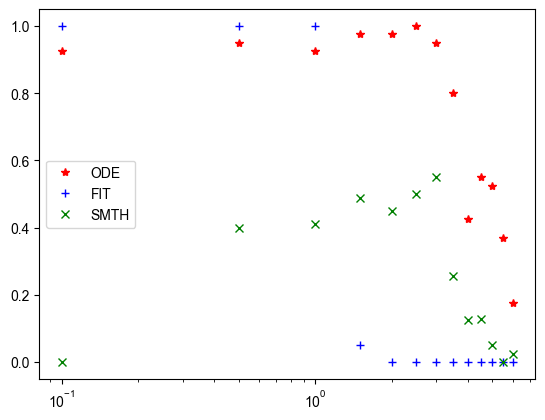

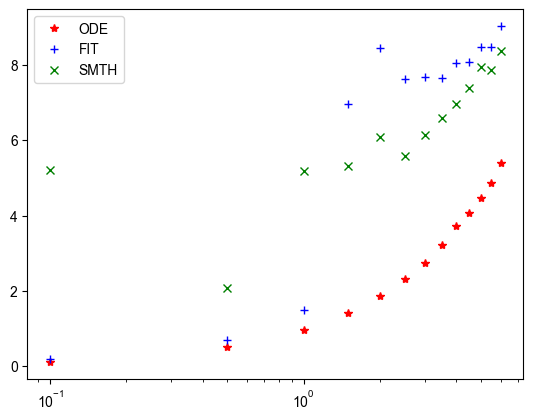

In [3]:
# Loop over data files

files=[f for f in os.listdir('noise_data/')]
#print(files)
sigmas=[0.1,0.5,1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5,6.]
#sigmas=[2.,2.5,3.,3.5,4.]

s_array=[]
ode_lernability=[]
ode_lernability_err=[]
fit_lernability=[]
fit_lernability_err=[]
smooth_lernability=[]
smooth_lernability_err=[]

#true_best_error_ode_final=[]
data_best_error_ode_final=[]
data_best_error_ode_final_err=[]

#true_best_error_fit_final=[]
data_best_error_fit_final=[]
data_best_error_fit_final_err=[]

#true_best_error_smth_final=[]
data_best_error_smth_final=[]
data_best_error_smth_final_err=[]

corpus_true=[('(x * (_a0_ + (_a1_ * y)))','(x * (_a0_ + (_a1_ * y)))'),
             ('(((_a7_ * y) + _a0_) * x)','(((y * (_a6_ + (_a0_ * x))) + _a1_) * x)'),
             ('((_a6_ * (y + _a0_)) * x)','(((_a2_ * (y + _a1_)) * x) + _a0_)'),
             ('(((y + _a6_) * (_a5_ * x)) + _a1_)','(x * (_a2_ + (_a7_ * y)))'),
             ('(((_a5_ + y) * _a2_) * x)','(((y * _a6_) + _a3_) * x)'),
             ('((_a3_ * (y + _a1_)) * x)','(x * ((y * _a2_) + _a3_))'),
             ('(_a4_ * (x * (_a7_ + y)))','(x * (_a2_ * ((_a2_ + y) / _a7_)))'),
             ('((y + _a2_) * (_a6_ * x))','((_a0_ + (y * _a1_)) * (x + _a4_))'),
             ('(((y * _a6_) + _a3_) * (x * _a3_))','(((_a3_ + y) / _a1_) * x)'),
             ('(((y + _a6_) * _a7_) * x)','((_a4_ + (y / _a1_)) * x)'),
             ('((x * _a1_) * (y + _a2_))','(((y / _a6_) + _a4_) * x)'),
             ('(((_a5_ + y) * _a7_) * x)','((((_a7_ ** 2) * y) + _a4_) * x)'),
             ('(((_a0_ * y) + _a3_) * x)','((x / _a6_) * (_a5_ + y))'),
            ]

corpus_true_fits=[ ('(x * (_a0_ + (_a1_ * y)))', '(y * (_a0_ + (_a1_ * x)))')
]

for sigma in sigmas:
    count_ode=0
    l_ode=0
    count_fit=0
    l_fit=0
    count_smth=0
    l_smth=0
    
    #true_best_error_ode=[]
    data_best_error_ode=[]
    
    #true_best_error_fit=[]
    data_best_error_fit=[]
    
    #true_best_error_smth=[]
    data_best_error_smth=[]
    
    print(sigma)
    
    for d in range(0,40):
        file=f'{sigma}_{d}.csv'
        #Lernability for ODE
        print(file)
        try:
            # True Model ODEint
            data=pd.read_csv('noise_data/'+file)
            x={}
            y={}
            
            x['A0']=deepcopy(data)
            y['A0']=deepcopy(data)
            y['A0'].x,y['A0'].y=y['A0'].y,y['A0'].x
            y['A0'].dx,y['A0'].dy=y['A0'].dy,y['A0'].dx
            XLABS = ['x','y']
            params = 8
            list_dl_trues=[]
            true_x=ms_ode.from_string_model(x,{'A0':10.},'((_a0_ * x) + (_a1_ * (x * y)))',2,8,['x','y'],silence=True)
            true_y=ms_ode.from_string_model(y,{'A0':5.},'((_a0_ * x) + (_a1_ * (x * y)))',2,8,['x','y'],silence=True)
            true_x.fy,true_y.fy=true_y,true_x
            true_x.x0_guess={'A0':10.}
            true_y.x0_guess={'A0':5.}
            true_x.par_values['A0']={'_a0_': 0.1, '_a1_': -0.02}
            true_y.par_values['A0']={'_a0_': -0.4, '_a1_': 0.02}
            true_x.x0={str(true_x):{str(true_x):{'A0':10.}}}
            true_y.x0={str(true_x):{str(true_x):{'A0':5.}}}
            true_x.fit_par={str(true_x):{}}
            true_y.fit_par={str(true_x):{}}
            #true_x.fit_par={str(true_x):{str(true_x):{'A0':{'_a0_': 0.1, '_a1_': -0.02}}}}
            #true_y.fit_par={str(true_x):{str(true_x):{'A0':{'_a0_': -0.4, '_a1_': 0.02}}}}
            true_x.get_bic(reset=True,fit=True)
            true_x.get_energy(reset=True)
            list_dl_trues.append((true_x,true_y,true_x.E+true_y.EP))
            for a,b in corpus_true:
                true_x=ms_ode.from_string_model(x,{'A0':10.},a,2,8,['x','y'],silence=True)
                true_y=ms_ode.from_string_model(y,{'A0':5.},b,2,8,['x','y'],silence=True)
                true_x.fy,true_y.fy=true_y,true_x
                print('Get bic corpus')
                true_x.get_bic(reset=True,fit=True)
                true_x.get_energy(reset=True)
                #print('------')
                #print(a,true_x.par_values)
                #print(b,true_y.par_values)
                #print(true_x.E+true_y.EP)
                #print('------')
                list_dl_trues.append((a,b,true_x.E+true_y.EP))
            
            true_model = min(list_dl_trues, key=lambda x: x[2])
            #print(true_model)
            #Load sampled model
            print(f'./noise_data_ode/llac_{file[:-3]}csv')
            with open(f'./noise_data_ode/llac_{file[:-3]}csv', 'rb') as f:
                # A new file will be created
                #print()
                best_model=pd.read_pickle(f)
                #print('x0',best_model['x'].x0)
            try:
                with open(f'/export/home/oriolca/BMS_ODE/Lotka_Volterra/cluster/exh_ode_mdl{file[:-4]}.pkl', 'rb') as f:
                    # A new file will be created
                    bms_exh=pickle.load(f)
                if best_model['x'].E+best_model['y'].EP>bms_exh['x'].E+bms_exh['y'].EP:
                    print('Updating mdl ode model with exhaustive model:',best_model,bms_exh)
                    del best_model
                    best_model = deepcopy(bms_exh)
                    del bms_exh
            except:
                pass
            
            deriv_ode_x= best_model['x'].predict(best_model['x'].x)['A0']
            deriv_ode_y= best_model['y'].predict(best_model['y'].x)['A0']
            
            #plt.scatter(best_model['x'].x['A0']['x'].to_numpy(),deriv_ode_x,c='red',marker='+',label='d ode x')
            #plt.scatter(best_model['y'].x['A0']['x'].to_numpy(),deriv_ode_y,c='red',marker='^',label='d ode y')
            
            h=(data.t.to_numpy()[1]-data.t.to_numpy()[0])
            sol=RK45([best_model['x'].x0[str(best_model['x'])][str(best_model['y'])]['A0'],
                      best_model['y'].x0[str(best_model['y'])][str(best_model['x'])]['A0']], h ,data.t.to_numpy(),best_model['x'],best_model['y'])

            int_best=np.concatenate(sol)
            int_data=np.concatenate([data['x'].to_numpy(),data['y'].to_numpy()])
            
            #true_best_err=np.sqrt(np.mean((int_true-int_best)**2))
            data_best_err=np.sqrt(np.mean((int_data-int_best)**2))
            
            if not np.isinf(int_best[-1]):
                #true_best_error_ode.append(true_best_err)
                data_best_error_ode.append(data_best_err)
            else:
                print('RMSE error in ODE:')
                print('ODE***********************')#,str(true_model),best_model)
                print('ODE',file)
                print('Best:',e_best,best_model['x'],best_model['y'])
                print('Best:',best_model['x'].par_values,best_model['y'].par_values)
                print('True:',e_true,true_x,true_y)
                print('True:',true_x.par_values,true_y.par_values)
                print('**************************')
            if data_best_err>10.:
                print('Check BMS model ODE:',file,str(best_model))
                print('ODE***********************')#,str(true_model),best_model)
                print('ODE',file)
                print('Best:',e_best,best_model['x'],best_model['y'])
                print('Best:',best_model['x'].par_values,best_model['y'].par_values)
                print('True:',e_true,true_x,true_y)
                print('True:',true_x.par_values,true_y.par_values)
                print('**************************')
            
            e_true=true_model[2]
            e_best=best_model['x'].E+best_model['y'].EP
            if e_best>=e_true:
                l_ode+=1
                #print('lernable')
            elif np.isclose(np.float64(e_best),np.float64(e_true), rtol=1e-05, atol=1e-08):
                l_ode+=1
            else:
                print('ODE***********************')#,str(true_model),best_model)
                print('ODE',file)
                print('Best:',e_best,best_model['x'],best_model['y'])
                print('Best:',best_model['x'].par_values,best_model['y'].par_values)
                print('True:',e_true,true_x,true_y)
                print('True:',true_x.par_values,true_y.par_values)
                print('**************************')
                """
                plt.show()
                plt.scatter(data.t.to_numpy(),data['x'].to_numpy(),c='red',marker='+',label='data x')
                plt.scatter(data.t.to_numpy(),data['y'].to_numpy(),c='red',marker='x',label='data y')
                plt.scatter(data.t.to_numpy(),sol[0],c='blue',marker='+',label='mdl x')
                plt.scatter(data.t.to_numpy(),sol[1],c='blue',marker='x',label='mdl y')
                # Integration of the true model
                true_x=ms_ode.from_string_model(x,{'A0':10.},'((_a0_ * x) + (_a1_ * (x * y)))',2,8,['x','y'],silence=True)
                true_y=ms_ode.from_string_model(y,{'A0':5.},'((_a0_ * x) + (_a1_ * (x * y)))',2,8,['x','y'],silence=True)
                true_x.fy,true_y.fy=true_y,true_x
                true_x.par_values['A0']={'_a0_': 0.1, '_a1_': -0.02}
                true_y.par_values['A0']={'_a0_': -0.4, '_a1_': 0.02}
                true_x.x0={str(true_x):{str(true_x):{'A0':10.}}}
                true_y.x0={str(true_x):{str(true_x):{'A0':5.}}}
                true_x.fit_par={str(true_x):{}}
                true_y.fit_par={str(true_x):{}}
                true_x.get_bic(reset=True,fit=True,verbose=True)
                true_x.get_energy(reset=True)
                sol=RK45([true_x.x0[str(true_x)][str(true_y)]['A0'],
                      true_y.x0[str(true_y)][str(true_x)]['A0']], h ,data.t.to_numpy(),true_x,true_y)
                plt.scatter(data.t.to_numpy(),sol[0],c='green',marker='+',label='true x')
                plt.scatter(data.t.to_numpy(),sol[1],c='green',marker='x',label='true y')
                plt.legend(loc='best')
                plt.show()
                plt.close()
                print('best x',best_model['x'],'E',best_model['x'].E,'bic',best_model['x'].bic,'Prior',best_model['x'].EP,
                      'sse',best_model['x'].sse)
                print('best y',best_model['y'],'E',best_model['y'].E,'bic',best_model['y'].bic,'Prior',best_model['y'].EP,
                      'sse',best_model['y'].sse)
                print('true x',true_x,'E',true_x.E,'bic',true_x.bic,'Prior',true_x.EP,
                      'sse',true_x.sse)
                print('true y',true_y,'E',true_y.E,'bic',true_y.bic,'Prior',true_y.EP,
                      'sse',true_y.sse)
                """
            count_ode+=1
            #print('ODE',file,'true',true_model.E,'mdl',best_model.E)
            del data,x,y,true_x,true_y,best_model,sol
        except Exception as e:
            print('Error in ODE:',e)
            print(traceback.format_exc())
            pass
            
        try:
            # True Model Fit deriv
            data=pd.read_csv('noise_data/'+file)
            x={}
            y={}
            with open(f'./noise_data_fit/{file[:-4]}.pkl', 'rb') as f:
                # A new file will be created
                best_model=pickle.load(f)

            try:
                with open(f'/export/home/oriolca/BMS_ODE/Lotka_Volterra/cluster/exh_fit_mdl_{file[:-4]}.pkl', 'rb') as f:
                    # A new file will be created
                    bms_exh=pickle.load(f)
                if best_model_x.E+best_model_y.E>bms_exh.E+bms_exh.E:
                    print('Updating mdl ode model with exhaustive model:',best_model,bms_exh)
                    del best_model
                    best_model = deepcopy(bms_exh)
                    del bms_exh
            except:
                pass
            
            #print(best_model)
            best_model_x=best_model['x']
            
            x=best_model_x.x
            y=best_model_x.y
            XLABS = ['x','y']
            params = 8
            
            list_dl_trues=[ms_fit.from_string_model(x,y,str_model[0],1,8,XLABS,silence=True) for str_model in corpus_true_fits]
            true_model_x = min(list_dl_trues, key=lambda x: x.E)

            best_model_y=best_model['y']
            
            x=best_model_y.x
            y=best_model_y.y
            XLABS = ['x','y']
            params = 8
            
            list_dl_trues=[ms_fit.from_string_model(x,y,str_model[1],1,8,XLABS,silence=True) for str_model in corpus_true_fits]
            true_model_y = min(list_dl_trues, key=lambda x: x.E)
            
            deriv_fit_x= best_model['x'].predict(best_model['x'].x)['A0']
            deriv_fit_y= best_model['y'].predict(best_model['y'].x)['A0']
            #plt.scatter(best_model['x'].x['A0']['x'].to_numpy(),deriv_fit_x,c='blue',marker='+',label='d fit x')
            #plt.scatter(best_model['y'].x['A0']['y'].to_numpy(),deriv_fit_y,c='blue',marker='^',label='d fit y')

            model_to_fit_x=best_model_x
            model_to_fit_y=best_model_y
            t_eval=data.t.to_numpy()
            h=(data.t.to_numpy()[1]-data.t.to_numpy()[0])
            int_data=np.concatenate([data['x'].to_numpy(),data['y'].to_numpy()])
            popt,pcov=curve_fit(func, [0.], int_data, p0=[5.,10.])

            sol=RK45_fit(popt, h ,data.t.to_numpy(),best_model_x,best_model_y)

            int_best=np.concatenate(sol)
            
            #true_best_err=np.sqrt(np.mean((int_true-int_best)**2))
            data_best_err=np.sqrt(np.mean((int_data-int_best)**2))
            
            if not np.isinf(int_best[-1]):
                
                #true_best_error_fit.append(true_best_err)
                data_best_error_fit.append(data_best_err)
            else:
                print('RMSE error in FIT:')
                print('FIT***************')#,true_model,best_model)
                print('Best:',e_best,best_model['x'],best_model['y'])
                print('Best:',best_model['x'].par_values,best_model['y'].par_values)
                print('True:',e_true,true_model_x,true_model_y)
                print('True:',true_model_x.par_values,true_model_y.par_values)
                print('***********************')
            if data_best_err>10.:
                print('Check BMS model FIT:',file,str(best_model))
                print('FIT***************')#,true_model,best_model)
                print('Best:',e_best,best_model['x'],best_model['y'])
                print('Best:',best_model['x'].par_values,best_model['y'].par_values)
                print('True:',e_true,true_model_x,true_model_y)
                print('True:',true_model_x.par_values,true_model_y.par_values)
                print('***********************')
                
            

            e_true=true_model_x.E+true_model_y.E
            e_best=best_model_x.E+best_model_y.E
            if e_best>=e_true:
                l_fit+=1
            elif np.isclose(np.float64(e_best),np.float64(e_true), rtol=1e-05, atol=1e-08):
                l_fit+=1
            else:
                print('FIT***************')#,true_model,best_model)
                print('Best:',e_best,best_model['x'],best_model['y'])
                print('Best:',best_model['x'].par_values,best_model['y'].par_values)
                print('True:',e_true,true_model_x,true_model_y)
                print('True:',true_model_x.par_values,true_model_y.par_values)
                print('***********************')
            count_fit+=1
            #print('FIT',file,'true',true_model.E,'mdl',best_model.E)
            del data,x,y,true_model_x,true_model_y,best_model,sol
        except Exception as e:
            print('Error in FIT:',e)
            print(traceback.format_exc())
            #print(true_best_err,type(true_best_err))
            #print(data_best_err,type(data_best_err))
            pass
            
            
        try:
            # True Model Fit deriv smooth
            data=pd.read_csv('noise_data/'+file)
            x={}
            y={}
            with open(f'./noise_data_fit_smooth/{file[:-4]}.pkl', 'rb') as f:
                # A new file will be created
                best_model=pickle.load(f)

            try:
                with open(f'/export/home/oriolca/BMS_ODE/Lotka_Volterra/cluster/exh_smooth_mdl_{file[:-4]}.pkl', 'rb') as f:
                    # A new file will be created
                    bms_exh=pickle.load(f)
                if best_model_x.E+best_model_y.E>bms_exh.E+bms_exh.E:
                    print('Updating mdl ode model with exhaustive model:',best_model,bms_exh)
                    del best_model
                    best_model = deepcopy(bms_exh)
                    del bms_exh
            except:
                pass
            
            best_model_x=best_model['x']
            x=best_model_x.x
            y=best_model_x.y
            XLABS = ['x','y']
            params = 8
            
            list_dl_trues=[ms_fit.from_string_model(x,y,str_model[0],1,8,XLABS,silence=True) for str_model in corpus_true_fits]
            true_model_x = min(list_dl_trues, key=lambda x: x.E)

            best_model_y=best_model['y']
            
            x=best_model_y.x
            y=best_model_y.y
            XLABS = ['x','y']
            params = 8
            
            list_dl_trues=[ms_fit.from_string_model(x,y,str_model[1],1,8,XLABS,silence=True) for str_model in corpus_true_fits]
            true_model_y = min(list_dl_trues, key=lambda x: x.E)
            
            deriv_smooth_x= best_model['x'].predict(best_model['x'].x)['A0']
            deriv_smooth_y= best_model['y'].predict(best_model['y'].x)['A0']
            deriv_smooth_x_true= true_model_x.predict(best_model['x'].x)['A0']
            deriv_smooth_y_true= true_model_y.predict(best_model['y'].x)['A0']
            #plt.scatter(best_model['x'].x['A0']['x'].to_numpy(),deriv_smooth_x,c='green',marker='+',label='d smo x')
            #plt.scatter(best_model['y'].x['A0']['y'].to_numpy(),deriv_smooth_y,c='green',marker='^',label='d smo y')
            
            #plt.scatter(best_model['x'].x['A0']['x'].to_numpy(),deriv_smooth_x_true,c='green',marker='1',label='smo x true')
            #plt.scatter(best_model['y'].x['A0']['y'].to_numpy(),deriv_smooth_y_true,c='green',marker='2',label='smo y true')
            
            model_to_fit_x=best_model_x
            model_to_fit_y=best_model_y
            t_eval=data.t.to_numpy()
            h=(data.t.to_numpy()[1]-data.t.to_numpy()[0])
            int_data=np.concatenate([data['x'].to_numpy(),data['y'].to_numpy()])
            popt,pcov=curve_fit(func, [0.], int_data, p0=[5.,10.])

            #print('initial fit values',popt)
            
            sol=RK45_fit(popt, h ,data.t.to_numpy(),best_model_x,best_model_y)

            int_best=np.concatenate(sol)
            #print(int_best)
            #true_best_err=np.sqrt(np.mean((int_true-int_best)**2))
            data_best_err=np.sqrt(np.mean((int_data-int_best)**2))
            #print('Data Best Err',data_best_err)
            
            if not np.isinf(int_best[-1]) and not np.isnan(int_best[-1]):
                
                #true_best_error_smth.append(true_best_err)
                data_best_error_smth.append(data_best_err)
            else:
                print('RMSE error in SMTH:')
                print('SMTH*******************')#,true_model,best_model)
                print('SMOOTH',sigma)
                print('Best:',e_best,best_model['x'],best_model['y'])
                print('Best:',best_model['x'].par_values,best_model['y'].par_values)
                print('True:',e_true,true_model_x,true_model_y)
                print('True:',true_model_x.par_values,true_model_y.par_values)
                print('***********************')
            if data_best_err>10.:
                print('Check BMS model SMTH:',file,str(best_model))
                print('SMTH*******************')#,true_model,best_model)
                print('SMOOTH',sigma)
                print('Best:',e_best,best_model['x'],best_model['y'])
                print('Best:',best_model['x'].par_values,best_model['y'].par_values)
                print('True:',e_true,true_model_x,true_model_y)
                print('True:',true_model_x.par_values,true_model_y.par_values)
                print('***********************')
            #Load sampled model
            
            """
            h=(data.t.to_numpy()[1]-data.t.to_numpy()[0])
            sol=RK45_fit(ode_fit,[9.833530 , 5.090359], h ,data.t.to_numpy(),best_model['x'],best_model['y'])
            plt.plot(sol[0])
            plt.plot(data.x.to_numpy())
            plt.plot(sol[1])
            plt.plot(data.y.to_numpy())
            plt.title('smooth')
            plt.show()
            plt.cla()
            plt.clf()
            plt.plot(best_model_x.y['A0'].to_numpy(),label='dx')
            plt.plot(best_model_y.y['A0'].to_numpy(),label='dy')
            plt.plot(best_model_x.predict(best_model_x.x)['A0'],label='mdx')
            plt.plot(best_model_y.predict(best_model_y.x)['A0'],label='mdy')
            plt.legend()
            plt.show()
            """
            e_true=true_model_x.E+true_model_y.E
            e_best=best_model_x.E+best_model_y.E
            if e_best>=e_true:
                l_smth+=1
            elif np.isclose(np.float64(e_best),np.float64(e_true), rtol=1e-05, atol=1e-08):
                l_smth+=1
            else:
                print('SMTH*******************')#,true_model,best_model)
                print('SMOOTH',sigma)
                print('Best:',e_best,best_model['x'],best_model['y'])
                print('Best:',best_model['x'].par_values,best_model['y'].par_values)
                print('True:',e_true,true_model_x,true_model_y)
                print('True:',true_model_x.par_values,true_model_y.par_values)
                print('***********************')
                
                #print(best_model.par_values)
            count_smth+=1
            #print('SMTH',file,'true',true_model.E,'mdl',best_model.E)
            del data,x,y,true_model_x,true_model_y,best_model_x,sol
            gc.collect()
            #print(best_model['x'])
            del best_model['x']
            #print(best_model)
        except Exception as e:
            print('Error in SMOOTH:',e)
            print(traceback.format_exc())
            #print(true_best_err,type(true_best_err))
            #print(data_best_err,type(data_best_err))
            
            pass
        #plt.legend(loc='best')
        #plt.show()
        
            
    # appending lernability fracction
    s_array.append(sigma)
    ode_lernability.append(np.divide(float(l_ode),float(count_ode)))
    ode_lernability_err.append(bootstrap(([1]*l_ode+[0]*(count_ode-l_ode),), np.mean, confidence_level=0.95, method='percentile').standard_error)
    fit_lernability.append(np.divide(float(l_fit),float(count_fit)))
    fit_lernability_err.append(bootstrap(([1]*l_fit+[0]*(count_fit-l_fit),), np.mean, confidence_level=0.95, method='percentile').standard_error)
    smooth_lernability.append(np.divide(float(l_smth),float(count_smth)))
    smooth_lernability_err.append(bootstrap(([1]*l_smth+[0]*(count_smth-l_smth),), np.mean, confidence_level=0.95, method='percentile').standard_error)
    
    #true_best_error_ode_final.append(np.mean(true_best_error_ode))
    data_best_error_ode_final.append(np.mean(data_best_error_ode))
    data_best_error_ode_final_err.append(np.std(data_best_error_ode,ddof=1)/np.sqrt(np.size(data_best_error_ode)))

    #true_best_error_fit_final.append(np.mean(true_best_error_fit))
    data_best_error_fit_final.append(np.mean(data_best_error_fit))
    data_best_error_fit_final_err.append(np.std(data_best_error_fit,ddof=1)/np.sqrt(np.size(data_best_error_fit)))

    #true_best_error_smth_final.append(np.mean(true_best_error_smth))
    data_best_error_smth_final.append(np.mean(data_best_error_smth))
    data_best_error_smth_final_err.append(np.std(data_best_error_smth,ddof=1)/np.sqrt(np.size(data_best_error_smth)))
    
    
print(ode_lernability)

plt.plot(s_array,ode_lernability,'r*',label='ODE')
plt.plot(s_array,fit_lernability,'b+',label='FIT')
plt.plot(s_array,smooth_lernability,'gx',label='SMTH')
plt.legend(loc='best')
plt.xscale('log')
plt.xlim(left=0.)
plt.show()

"""
plt.plot(s_array,true_best_error_ode_final,'r*',label='ODE')
plt.plot(s_array,true_best_error_fit_final,'b+',label='FIT')
plt.plot(s_array,true_best_error_smth_final,'gx',label='SMTH')
plt.legend(loc='best')
plt.xscale('log')
plt.xlim(left=0.)
plt.show()
"""

plt.plot(s_array,data_best_error_ode_final,'r*',label='ODE')
plt.plot(s_array,data_best_error_fit_final,'b+',label='FIT')
plt.plot(s_array,data_best_error_smth_final,'gx',label='SMTH')
plt.legend(loc='best')
plt.xscale('log')
plt.xlim(left=0.)
plt.show()

In [4]:
data_store={
    's_array':s_array,
    'ode_lernability':ode_lernability,
    'ode_lernability_err':ode_lernability_err,
    'fit_lernability':fit_lernability,
    'fit_lernability_err':fit_lernability_err,
    'smooth_lernability':smooth_lernability,
    'smooth_lernability_err':smooth_lernability_err,
    'data_best_error_ode_final':data_best_error_ode_final,
    'data_best_error_fit_final':data_best_error_fit_final,
    'data_best_error_smth_final':data_best_error_smth_final,
    'data_best_error_ode_final_err':data_best_error_ode_final_err,
    'data_best_error_fit_final_err':data_best_error_fit_final_err,
    'data_best_error_smth_final_err':data_best_error_smth_final_err,
}
with open('Plots/lernability.pkl','wb') as file:
    pickle.dump(data_store,file=file)

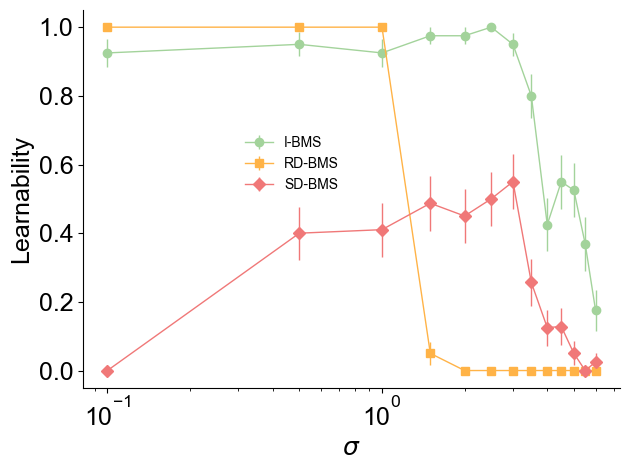

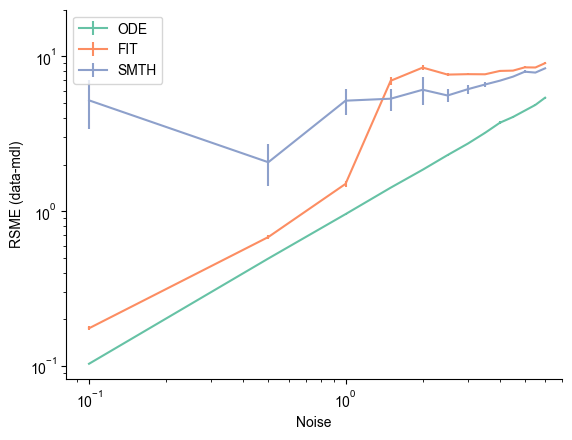

[5.197840388896933, 2.0709563072759267, 5.172408590268672, 5.327111004198648, 6.085428403594364, 5.587886721869856, 6.137452536863266, 6.5795917112726965, 6.965735574684748, 7.395861028541792, 7.958192514393344, 7.85588611555889, 8.367948421755193]


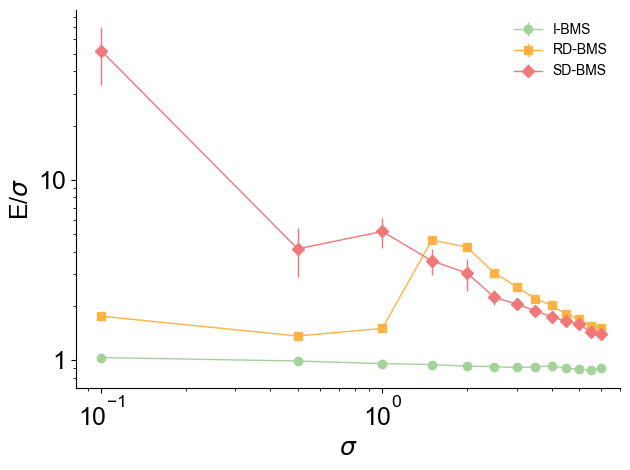

In [5]:
with open('Plots/lernability.pkl','rb') as file:
    data_store = pickle.load(file=file)
import colors
s_array=data_store['s_array']
ode_lernability=data_store['ode_lernability']
ode_lernability_err=data_store['ode_lernability_err']
fit_lernability=data_store['fit_lernability']
fit_lernability_err=data_store['fit_lernability_err']
smooth_lernability=data_store['smooth_lernability']
smooth_lernability_err=data_store['smooth_lernability_err']
data_best_error_ode_final=data_store['data_best_error_ode_final']
data_best_error_fit_final=data_store['data_best_error_fit_final']
data_best_error_smth_final=data_store['data_best_error_smth_final']
data_best_error_ode_final_err=data_store['data_best_error_ode_final_err']
data_best_error_fit_final_err=data_store['data_best_error_fit_final_err']
data_best_error_smth_final_err=data_store['data_best_error_smth_final_err']

plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

plt.Figure(figsize=(10,10))
plt.errorbar(s_array,ode_lernability,ode_lernability_err,c='#a3d39b',marker='o',label='I-BMS',lw=1)
plt.errorbar(s_array,fit_lernability,fit_lernability_err,c='#ffb347',marker='s',label='RD-BMS',lw=1)
plt.errorbar(s_array,smooth_lernability,smooth_lernability_err,c='#f07878',marker='D',label='SD-BMS',lw=1)

plt.legend(bbox_to_anchor=(0.5, 0.7),frameon=False)
plt.xscale('log')
plt.xlim(left=0.)
plt.xlabel('$\sigma$',fontsize=18)
plt.ylabel('Learnability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
"""
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())
#ax.yaxis.set_minor_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:g}"))
#ax.minorticks_off()
ax.tick_params(which='minor')
"""
plt.tight_layout()
plt.savefig('Plots/lotka_lernability.pdf',format='pdf',dpi=300)
plt.show()

"""
plt.plot(s_array,true_best_error_ode_final,'r*',label='ODE')
plt.plot(s_array,true_best_error_fit_final,'b+',label='FIT')
plt.plot(s_array,true_best_error_smth_final,'gx',label='SMTH')
plt.legend(loc='best')
plt.xscale('log')
plt.xlim(left=0.)
plt.xlabel('Noise')
plt.ylabel('RSME true-mdl')
plt.show()
plt.plot(s_array,true_best_error_ode_final,'r*',label='ODE')
plt.plot(s_array,true_best_error_fit_final,'b+',label='FIT')
plt.plot(s_array,true_best_error_smth_final,'gx',label='SMTH')
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')
plt.xlim(left=0.)
plt.xlabel('Noise')
plt.ylabel('RSME true-mdl')
plt.show()
"""

plt.errorbar(s_array,data_best_error_ode_final,data_best_error_ode_final_err,c='#66c2a5',label='ODE')
plt.errorbar(s_array,data_best_error_fit_final,data_best_error_fit_final_err,c='#fc8d62',label='FIT')
plt.errorbar(s_array,data_best_error_smth_final,data_best_error_smth_final_err,c='#8da0cb',label='SMTH')
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0,7.])
plt.ylim([0,20.])
plt.xlabel('Noise')
plt.ylabel('RSME (data-mdl)')
plt.show()

from matplotlib.ticker import ScalarFormatter,StrMethodFormatter

print(data_best_error_smth_final)
plt.errorbar(s_array,np.divide(data_best_error_ode_final,s_array),np.divide(data_best_error_ode_final_err,s_array),c='#a3d39b',marker='o',label='I-BMS',lw=1)
plt.errorbar(s_array,np.divide(data_best_error_fit_final,s_array),np.divide(data_best_error_fit_final_err,s_array),c='#ffb347',marker='s',label='RD-BMS',lw=1)
plt.errorbar(s_array,np.divide(data_best_error_smth_final,s_array),np.divide(data_best_error_smth_final_err,s_array),c='#f07878',marker='D',label='SD-BMS',lw=1)

plt.legend(loc='best',frameon=False)
plt.xscale('log')
plt.yscale('log')
plt.xlim([0,7.])
#plt.ylim([0,10])
plt.xlabel('$\sigma$',fontsize=18)
plt.ylabel('E/$\sigma$',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())
#ax.yaxis.set_minor_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:g}"))
#ax.minorticks_off()
ax.tick_params(which='minor')

plt.tight_layout()
plt.savefig('Plots/lotka_RMSE_SIG.pdf',format='pdf',dpi=300)
plt.show()